# Importações de Bibliotecas

In [1]:
import IPython
from IPython import display
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pandas as pd
import random
from random import seed
import seaborn as sns
import sklearn
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from subprocess import check_output
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

print("IPython version: {}". format(IPython.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("Keras version: {}". format(keras.__version__))
print("seaborn version: {}". format(sns.__version__))
print("Sklearn version: {}". format(sklearn.__version__))
print("Tensorfflow version: {}". format(tf.__version__))

IPython version: 7.9.0
matplotlib version: 3.1.1
NumPy version: 1.17.4
pandas version: 0.25.3
Keras version: 2.2.4-tf
seaborn version: 0.9.0
Sklearn version: 0.21.3
Tensorfflow version: 2.0.0


# Pré-processamento

In [2]:
print('Arquivos CSV:')
print(check_output(["ls", "/home/willian/Keras_Litologia/arquivos_csv"]).decode("utf8"))

Arquivos CSV:
test.csv
train.csv



In [3]:
def load_data():
    """
    Função para carregar os datasets pelo pandas.
    Retun: a variável passa a ser um dataframe do pandas, podendo ter acesso aos métodos da lib.
        dftrain = treinamento
        dftest = teste
    """
    dftrain = pd.read_csv('/home/willian/Keras_Litologia/arquivos_csv/train.csv')
    dftest = pd.read_csv('/home/willian/Keras_Litologia/arquivos_csv/test.csv')
    return dftrain, dftest

In [4]:
def data_encode(data_frame, classificador):
    """
    Função para transformar a coluna do classificado em multiclassificadores *litologia de 1 a 7.
    data_frame: dicionário a ser recebido.
    classificador: nome da coluna do classificador.
    Return: Um novo data frame com as linhas de classificação transformada em colunas.        
    """
    data_frame = pd.get_dummies(data_frame, columns=[classificador])
    return data_frame

In [5]:
def variables_x_y(data_frame, cabecalho, n):
    """
    Função para transforma as variáveis de características e classificadores.
    n  = as colunas que fazem parte do classificador.
    y = classificador.
    x = características.
    return: um data_frame de características e outro de classificador do dataset.
    """
    x = data_frame[cabecalho[:n]]
    y = data_frame[cabecalho[n:]]
    return x, y

In [6]:
def transfer_array_np(data_frame, vtype):
    """
    Função para transformar o data_frame em array numpy [ matriz numpy]
    df = data_frame a ser transformado
    vtype = nome da variavel do tipo a ser transformada
    Return: matriz numpy do dataset.
    """
    np_data_frame = np.array(data_frame, dtype=vtype)
    return np_data_frame

In [9]:
def pre_processamento():
    dftrain, dftest = load_data()
    train = data_encode(dftrain, 'Litologia')
    test = data_encode(dftest, 'Litologia')
    train = train.drop(['Poço'], axis = 1)
    test = test.drop(['Poço'], axis = 1)
    cabecalho_list = list(train.columns.values)
    
    # n = - 7 representa primeira coluna do classificado (decrescente).
    n = -7
    
    x_train, y_train = variables_x_y(train, cabecalho_list, n)
    x_test, y_test = variables_x_y(test, cabecalho_list, n)
    X_train = transfer_array_np(x_train, 'float32')
    y_train = transfer_array_np(y_train, 'int8')
    X_test = transfer_array_np(x_test, 'float32')
    y_test = transfer_array_np(y_test, 'int8')
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(X_train)
    x_test = scaler.fit_transform(X_test)
    return x_train, y_train, x_test, y_test, dftrain, dftest

In [10]:
x_train, y_train, x_test, y_test, dftrain, dftest = pre_processamento()

In [11]:
dftrain.head()

Poço  Profundidade (m)  Porosidade (%)  Densidade bulk rocha seca g/cm3  \
0     1              0.50            0.82                             2.70   
1     1              2.70            0.39                             2.69   
2     1              9.85            0.62                             2.68   
3     1             15.70            0.18                             2.69   
4     1             21.10            0.44                             2.69   

   VP m/s 70 MPa  VS1 m/s 70 MPa  VS2 m/s 70 MPa  K1 GPa 70 MPa  \
0           6238            3202            3188          68.15   
1           6494            3498            3400          69.47   
2           6344            3231            3258          70.54   
3           6172            3242            3268          64.87   
4           6375            3196            3209          72.58   

   K2 GPa 70 MPa  M1 GPa 70 MPa  ...  Fração carbonática de microporos  \
0          68.48          27.68  ...                             64.40   
1          71.89          32.87  ...                             70.00   
2          69.91          27.97  ...                             64.27   
3          64.27          28.32  ...                             69.43   
4          72.28          27.44  ...                             69.86   

   Calcita  Dolomita  Quartzo  Ortoclásio  Albita  Argilas  Pirita  α KT  \
0     92.1       0.0      7.9         0.0     0.0      0.0     0.0  0.70   
1     98.9       0.0      1.1         0.0     0.0      0.0     0.0  0.70   
2     98.9       0.0      1.1         0.0     0.0      0.0     0.0  0.65   
3     99.2       0.0      0.8         0.0     0.0      0.0     0.0  0.70   
4     99.8       0.0      0.2         0.0     0.0      0.0     0.0  0.70   

   Litologia  
0          3  
1          2  
2          2  
3          2  
4          1  

[5 rows x 22 columns]

In [12]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 22 columns):
Poço                                46 non-null int64
Profundidade (m)                    46 non-null float64
Porosidade (%)                      46 non-null float64
Densidade bulk rocha seca g/cm3     46 non-null float64
VP m/s 70 MPa                       46 non-null int64
VS1 m/s 70 MPa                      46 non-null int64
VS2 m/s 70 MPa                      46 non-null int64
K1 GPa 70 MPa                       46 non-null float64
K2 GPa 70 MPa                       46 non-null float64
M1 GPa 70 MPa                       46 non-null float64
M2 GPa 70 MPa                       46 non-null float64
Tamanho do grão                     46 non-null int64
Fração carbonática de microporos    46 non-null float64
Calcita                             46 non-null float64
Dolomita                            46 non-null float64
Quartzo                             46 non-null float64
Ortoclásio 

In [13]:
dftrain.describe()

Poço  Profundidade (m)  Porosidade (%)  \
count  46.000000         46.000000       46.000000   
mean    1.173913         74.984783        7.078696   
std     0.383223         45.281914        6.454653   
min     1.000000          0.500000        0.180000   
25%     1.000000         32.862500        1.800000   
50%     1.000000         77.425000        5.525000   
75%     1.000000        114.387500        9.135000   
max     2.000000        148.400000       23.900000   

       Densidade bulk rocha seca g/cm3  VP m/s 70 MPa  VS1 m/s 70 MPa  \
count                        46.000000      46.000000       46.000000   
mean                          2.487391    5041.847826     2837.130435   
std                           0.192313     999.847988      427.474631   
min                           2.020000    3307.000000     1980.000000   
25%                           2.407500    4077.250000     2522.000000   
50%                           2.535000    5077.500000     2924.500000   
75%                           2.647500    6044.000000     3213.250000   
max                           2.700000    6494.000000     3498.000000   

       VS2 m/s 70 MPa  K1 GPa 70 MPa  K2 GPa 70 MPa  M1 GPa 70 MPa  ...  \
count       46.000000      46.000000      46.000000      46.000000  ...   
mean      2834.869565      39.559348      39.678261      20.859783  ...   
std        403.269230      20.352860      20.619715       7.133628  ...   
min       1967.000000      11.210000      10.900000       8.240000  ...   
25%       2523.000000      18.870000      18.970000      15.590000  ...   
50%       2921.000000      36.595000      37.125000      21.450000  ...   
75%       3208.250000      59.242500      59.175000      27.755000  ...   
max       3400.000000      72.580000      72.280000      32.870000  ...   

       Fração carbonática de microporos     Calcita   Dolomita    Quartzo  \
count                         46.000000   46.000000  46.000000  46.000000   
mean                          47.582391   68.724783   0.026087  30.131304   
std                           20.333683   32.968886   0.176930  32.204482   
min                           13.330000   11.500000   0.000000   0.000000   
25%                           29.717500   40.425000   0.000000   1.875000   
50%                           47.345000   76.435000   0.000000  21.385000   
75%                           66.937500   98.125000   0.000000  57.475000   
max                           84.170000  100.000000   1.200000  87.600000   

       Ortoclásio     Albita    Argilas     Pirita       α KT  Litologia  
count   46.000000  46.000000  46.000000  46.000000  46.000000  46.000000  
mean     0.108261   0.123478   0.759348   0.138696   0.667174   3.847826  
std      0.370737   0.477141   1.213834   0.481833   0.198692   2.075973  
min      0.000000   0.000000   0.000000   0.000000   0.200000   1.000000  
25%      0.000000   0.000000   0.000000   0.000000   0.600000   2.000000  
50%      0.000000   0.000000   0.000000   0.000000   0.700000   4.000000  
75%      0.000000   0.000000   0.900000   0.000000   0.800000   6.000000  
max      1.700000   2.500000   4.500000   2.500000   0.950000   7.000000  

[8 rows x 22 columns]

# ANN - Tensorfflow/Keras Modelo

In [74]:
epoch = 2500
batch_s = 36
path_file_models = '/home/willian/Keras_Litologia/model_save/'

In [93]:
def create_model(n_input, n_hidden, n_output, func_input, func_hidden, func_output):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(n_input, input_dim = n_input, activation = func_input, 
                                kernel_initializer = 'uniform', bias_initializer = 'RandomNormal'))
    model.add(tf.keras.layers.Dense(n_hidden, activation = func_hidden))
    model.add(tf.keras.layers.Dense(n_output, activation = func_output))   
    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.8),
                  metrics = ['acc', 'mse'])
    return model

In [16]:
def load_model(path_file, num_model):
    json_file = open(path_file + 'model_' + num_model + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    print('Loaded model from disk')
    return model

In [17]:
def verific_load_or_create(n_input, n_hidden, n_output, func_input, func_hidden, func_output, num_model):
    arquivo = True
    f_path = path_file_models + num_model + '/'
    file = f_path + 'model_' + num_model + '.json'
    if os.path.isfile(file) == True:
        model = load_model(path_file_models, num_model)
        return model, arquivo
    else:
        model = create_model(n_input, n_hidden, n_output, 'relu', 'relu', 'softmax')
        model.summary()
        arquivo = False
        return model, arquivo 

In [18]:
class TerminateOnBaseline(tf.keras.callbacks.Callback):
    """Callback that terminates training when either acc or val_acc reaches a specified baseline
    """
    def __init__(self, monitor, baseline, patience, mode):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline
        self.patience = patience
        self.mode = mode

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

In [94]:
def history_model(model, arquivo, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, num_model):
    if arquivo == False:
        checkpoint = [
            TerminateOnBaseline(monitor='acc', baseline=0.99, patience=1, mode='max'), 
            tf.keras.callbacks.ModelCheckpoint(path_file_models + 'Teste' + num_model + '/' +
                                               'epoch{epoch:02d}_acc{acc:.2f}' + ".json", monitor = 'acc', verbose = 1,
                                               save_best_only = True, save_weights_only = False, mode = 'max', 
                                               save_freq = 'epoch')
        ]
        history = model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = checkpoint,
                            epochs = epoch, verbose = 1, batch_size=batch_s, shuffle=True)
        score_train, score_test = score_model(model, x_train, y_train, x_test, y_test)
        return history, score_train, score_test
    else:
        opt = SGD(lr = 0.01, momentum = 0.9)
        history = model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['acc', 'mse'])
        score_trapath_file_modelsin, score_test = score_model(model, x_train, y_train, x_test, y_test)
        return history, score_train, score_test 

In [20]:
def display_score(score_train, score_test):    
    print(" Baseline Error Train: %.2f%%" % (100-score_train[1]*100))
    print(' Train Accuracy:', score_train[1])
    print(" Baseline Error Test: %.2f%%" % (100-score_test[1]*100))
    print(' Test Accuracy:', score_test[1])

In [21]:
def score_model(model, x_train, y_train, x_test, y_test):
    score_train = model.evaluate(x_train, y_train, verbose = 0)
    score_test = model.evaluate(x_test, y_test, verbose = 0)
    return score_train, score_test

In [22]:
def create_graph(title, history, metric, label, num_model):
    fig_graph = plt.figure()
    plt.figure(figsize=(15,10))
    plt.subplot(212)
    plt.title(title)
    plt.plot(history.history[metric], label=label)
    plt.legend()
    path_img = '/home/willian/Keras_Litologia/img/'
    plt.savefig(path_img + 'Model' + num_model + '_' + title + '.png') 
    return fig_graph

In [23]:
def create_graph_validation(title, history, metric_p, label_p, metric_s, label_s, num_model):
    fig_graph = plt.figure()
    plt.figure(figsize=(15,10))
    plt.subplot(212)
    plt.title(title)
    plt.plot(history.history[metric_p], label=label_p)
    plt.plot(history.history[metric_s], label=label_s)
    plt.legend()
    path_img = '/home/willian/Keras_Litologia/img/'
    plt.savefig(path_img + 'Model' + num_model + '_' + title + '.png') 
    return fig_graph

In [24]:
def create_graph_curve_accuracy(history, num_model):
    fig = plt.figure()
    plt.figure(figsize=(30,20))
    plt.subplot(212)
    epochs = range(1, len(history.history['acc']) + 1)
    plt.plot(epochs, history.history['acc'], 'bo', label='Training acc')
    plt.plot(epochs, history.history['val_acc'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()  
    plt.savefig('acc' + num_model + '.png')

In [25]:
def create_graph_curve_loss(history, num_model):
    fig = plt.figure()
    plt.figure(figsize=(30,20))
    plt.subplot(212)
    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    
    plt.savefig('loss' + num_model + '.png')

## 1 - Camada Intermediária (Hidden-Layers) : quantidade de neurônio

### Obs: Manipulação apenas da quantidade de neurônios na camada de entrada, demais parâmetros fixos.

### 1.1 Teste da Camada Oculta (Hidden Layer) = 5

In [26]:
model11, arquivo11 = verific_load_or_create(20, 5, 7, 'relu', 'relu', 'softmax', '12')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 42        
Total params: 567
Trainable params: 567
Non-trainable params: 0
_________________________________________________________________


In [27]:
history11, score_train11, score_test11 = history_model(model11, arquivo11, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '11')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9455 - acc: 0.1667 - mse: 0.1224
Epoch 00001: acc improved from -inf to 0.15217, saving model to /home/willian/Keras_Litologia/model_save/Teste11/epoch01_acc0.15.json
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste11/epoch01_acc0.15.json/assets
46/46 [==============================] - 3s 65ms/sample - loss: 1.9588 - acc: 0.1522 - mse: 0.1230 - val_loss: 1.9377 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 2/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9634 - acc: 0.1000 - mse: 0.1232
Epoch 00002: acc did not improve from 0.15217
46/46 [==============================] - 0s 5ms/sample - loss: 1.9582 - acc: 0.1522 - mse: 0.1229 - val_loss: 1.9375 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 3/2500
30/46 [==================>...........] - ETA: 0s - los

Epoch 26/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9287 - acc: 0.1667 - mse: 0.1217
Epoch 00026: acc improved from 0.15217 to 0.17391, saving model to /home/willian/Keras_Litologia/model_save/Teste11/epoch26_acc0.17.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste11/epoch26_acc0.17.json/assets
46/46 [==============================] - 1s 24ms/sample - loss: 1.9394 - acc: 0.1739 - mse: 0.1221 - val_loss: 1.9321 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 27/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9445 - acc: 0.1000 - mse: 0.1224
Epoch 00027: acc did not improve from 0.17391
46/46 [==============================] - 0s 5ms/sample - loss: 1.9387 - acc: 0.1522 - mse: 0.1221 - val_loss: 1.9320 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 28/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9376 - acc: 0.0667 - mse: 0.1221
Epoch 00028: acc did not improve from 0.17391
46/46 [===========================

Epoch 52/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9229 - acc: 0.2000 - mse: 0.1214
Epoch 00052: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.9189 - acc: 0.1957 - mse: 0.1213 - val_loss: 1.9284 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 53/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9230 - acc: 0.2000 - mse: 0.1214
Epoch 00053: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.9182 - acc: 0.1957 - mse: 0.1212 - val_loss: 1.9283 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 54/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9111 - acc: 0.2667 - mse: 0.1209
Epoch 00054: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.9175 - acc: 0.1957 - mse: 0.1212 - val_loss: 1.9281 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 55/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9357 - acc: 

Epoch 79/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9003 - acc: 0.2333 - mse: 0.1204
Epoch 00079: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.9017 - acc: 0.2174 - mse: 0.1205 - val_loss: 1.9252 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 80/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8881 - acc: 0.2333 - mse: 0.1199
Epoch 00080: acc did not improve from 0.21739
46/46 [==============================] - 0s 6ms/sample - loss: 1.9012 - acc: 0.2174 - mse: 0.1205 - val_loss: 1.9252 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 81/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9222 - acc: 0.1667 - mse: 0.1213
Epoch 00081: acc improved from 0.21739 to 0.23913, saving model to /home/willian/Keras_Litologia/model_save/Teste11/epoch81_acc0.24.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste11/epoch81_acc0.24.json/assets
46/46 [============================

Epoch 105/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8837 - acc: 0.3000 - mse: 0.1196
Epoch 00105: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.8880 - acc: 0.2609 - mse: 0.1199 - val_loss: 1.9226 - val_acc: 0.2857 - val_mse: 0.1214
Epoch 106/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8741 - acc: 0.3000 - mse: 0.1192
Epoch 00106: acc did not improve from 0.26087
46/46 [==============================] - 0s 4ms/sample - loss: 1.8875 - acc: 0.2609 - mse: 0.1198 - val_loss: 1.9223 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 107/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8937 - acc: 0.2667 - mse: 0.1201
Epoch 00107: acc did not improve from 0.26087
46/46 [==============================] - 0s 4ms/sample - loss: 1.8870 - acc: 0.2609 - mse: 0.1198 - val_loss: 1.9222 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 108/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8937 - a

Epoch 132/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8815 - acc: 0.2333 - mse: 0.1195
Epoch 00132: acc did not improve from 0.26087
46/46 [==============================] - 0s 6ms/sample - loss: 1.8754 - acc: 0.2609 - mse: 0.1193 - val_loss: 1.9180 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 133/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8579 - acc: 0.2333 - mse: 0.1186
Epoch 00133: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.8749 - acc: 0.2609 - mse: 0.1192 - val_loss: 1.9177 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 134/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8632 - acc: 0.3000 - mse: 0.1187
Epoch 00134: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.8744 - acc: 0.2609 - mse: 0.1192 - val_loss: 1.9175 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 135/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8752 - a

Epoch 159/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8553 - acc: 0.2667 - mse: 0.1183
Epoch 00159: acc did not improve from 0.26087
46/46 [==============================] - 0s 3ms/sample - loss: 1.8637 - acc: 0.2609 - mse: 0.1187 - val_loss: 1.9136 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 160/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8457 - acc: 0.3333 - mse: 0.1178
Epoch 00160: acc did not improve from 0.26087
46/46 [==============================] - 0s 3ms/sample - loss: 1.8634 - acc: 0.2609 - mse: 0.1187 - val_loss: 1.9134 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 161/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8408 - acc: 0.2667 - mse: 0.1177
Epoch 00161: acc did not improve from 0.26087
46/46 [==============================] - 0s 4ms/sample - loss: 1.8630 - acc: 0.2609 - mse: 0.1187 - val_loss: 1.9133 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 162/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8447 - a

Epoch 186/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8884 - acc: 0.2000 - mse: 0.1197
Epoch 00186: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.8533 - acc: 0.2609 - mse: 0.1182 - val_loss: 1.9090 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 187/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8881 - acc: 0.1667 - mse: 0.1198
Epoch 00187: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.8529 - acc: 0.2609 - mse: 0.1182 - val_loss: 1.9088 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 188/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8144 - acc: 0.3333 - mse: 0.1166
Epoch 00188: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.8526 - acc: 0.2609 - mse: 0.1182 - val_loss: 1.9086 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 189/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8776 - a

Epoch 213/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8543 - acc: 0.3000 - mse: 0.1179
Epoch 00213: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.8429 - acc: 0.2609 - mse: 0.1177 - val_loss: 1.9054 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 214/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8346 - acc: 0.2667 - mse: 0.1173
Epoch 00214: acc did not improve from 0.26087
46/46 [==============================] - 0s 4ms/sample - loss: 1.8425 - acc: 0.2609 - mse: 0.1177 - val_loss: 1.9054 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 215/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8806 - acc: 0.2000 - mse: 0.1194
Epoch 00215: acc did not improve from 0.26087
46/46 [==============================] - 0s 4ms/sample - loss: 1.8421 - acc: 0.2609 - mse: 0.1177 - val_loss: 1.9053 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 216/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8555 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.8353 - acc: 0.2667 - mse: 0.1174
Epoch 00239: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.8333 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.9017 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 240/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8224 - acc: 0.3000 - mse: 0.1169
Epoch 00240: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.8330 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.9016 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 241/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8354 - acc: 0.3333 - mse: 0.1169
Epoch 00241: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.8327 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.9014 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 242/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8503 - acc: 0.2333 - ms

Epoch 266/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8647 - acc: 0.2333 - mse: 0.1185
Epoch 00266: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.8237 - acc: 0.2826 - mse: 0.1168 - val_loss: 1.8985 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 267/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8348 - acc: 0.2667 - mse: 0.1173
Epoch 00267: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.8234 - acc: 0.2826 - mse: 0.1167 - val_loss: 1.8984 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 268/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8071 - acc: 0.3667 - mse: 0.1158
Epoch 00268: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.8230 - acc: 0.2826 - mse: 0.1167 - val_loss: 1.8984 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 269/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7994 - a

Epoch 293/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7657 - acc: 0.3000 - mse: 0.1139
Epoch 00293: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.8143 - acc: 0.2826 - mse: 0.1163 - val_loss: 1.8937 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 294/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8209 - acc: 0.2333 - mse: 0.1170
Epoch 00294: acc did not improve from 0.28261
46/46 [==============================] - 0s 4ms/sample - loss: 1.8139 - acc: 0.2826 - mse: 0.1163 - val_loss: 1.8935 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 295/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8145 - acc: 0.3000 - mse: 0.1160
Epoch 00295: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.8136 - acc: 0.2826 - mse: 0.1163 - val_loss: 1.8933 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 296/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8213 - a

Epoch 320/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8235 - acc: 0.3000 - mse: 0.1163
Epoch 00320: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.8047 - acc: 0.2826 - mse: 0.1158 - val_loss: 1.8895 - val_acc: 0.2857 - val_mse: 0.1198
Epoch 321/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8174 - acc: 0.2667 - mse: 0.1167
Epoch 00321: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.8045 - acc: 0.2826 - mse: 0.1158 - val_loss: 1.8894 - val_acc: 0.2857 - val_mse: 0.1198
Epoch 322/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8025 - acc: 0.3000 - mse: 0.1154
Epoch 00322: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.8041 - acc: 0.2826 - mse: 0.1158 - val_loss: 1.8893 - val_acc: 0.2857 - val_mse: 0.1198
Epoch 323/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8176 - a

Epoch 347/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7791 - acc: 0.3333 - mse: 0.1143
Epoch 00347: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7952 - acc: 0.2826 - mse: 0.1154 - val_loss: 1.8855 - val_acc: 0.2857 - val_mse: 0.1196
Epoch 348/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8826 - acc: 0.1667 - mse: 0.1199
Epoch 00348: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.7949 - acc: 0.2826 - mse: 0.1154 - val_loss: 1.8853 - val_acc: 0.2857 - val_mse: 0.1196
Epoch 349/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8129 - acc: 0.3000 - mse: 0.1158
Epoch 00349: acc did not improve from 0.28261
46/46 [==============================] - 0s 4ms/sample - loss: 1.7945 - acc: 0.2826 - mse: 0.1153 - val_loss: 1.8852 - val_acc: 0.2857 - val_mse: 0.1196
Epoch 350/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8001 - a

Epoch 374/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7909 - acc: 0.3000 - mse: 0.1150
Epoch 00374: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.7858 - acc: 0.2826 - mse: 0.1149 - val_loss: 1.8807 - val_acc: 0.2857 - val_mse: 0.1194
Epoch 375/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7757 - acc: 0.2667 - mse: 0.1145
Epoch 00375: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.7855 - acc: 0.2826 - mse: 0.1149 - val_loss: 1.8806 - val_acc: 0.2857 - val_mse: 0.1194
Epoch 376/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7955 - acc: 0.2333 - mse: 0.1158
Epoch 00376: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7852 - acc: 0.2826 - mse: 0.1149 - val_loss: 1.8805 - val_acc: 0.2857 - val_mse: 0.1194
Epoch 377/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7850 - a

Epoch 401/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7769 - acc: 0.2667 - mse: 0.1149
Epoch 00401: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.7766 - acc: 0.2826 - mse: 0.1145 - val_loss: 1.8760 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 402/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7530 - acc: 0.3333 - mse: 0.1135
Epoch 00402: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.7762 - acc: 0.2826 - mse: 0.1145 - val_loss: 1.8757 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 403/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7459 - acc: 0.3000 - mse: 0.1133
Epoch 00403: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.7759 - acc: 0.2826 - mse: 0.1145 - val_loss: 1.8756 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 404/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8389 - a

Epoch 428/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7785 - acc: 0.3000 - mse: 0.1142
Epoch 00428: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.7670 - acc: 0.2826 - mse: 0.1140 - val_loss: 1.8715 - val_acc: 0.2857 - val_mse: 0.1190
Epoch 429/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7396 - acc: 0.3000 - mse: 0.1131
Epoch 00429: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.7667 - acc: 0.2826 - mse: 0.1140 - val_loss: 1.8714 - val_acc: 0.2857 - val_mse: 0.1190
Epoch 430/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7913 - acc: 0.2333 - mse: 0.1153
Epoch 00430: acc did not improve from 0.28261
46/46 [==============================] - 0s 4ms/sample - loss: 1.7663 - acc: 0.2826 - mse: 0.1140 - val_loss: 1.8713 - val_acc: 0.2857 - val_mse: 0.1190
Epoch 431/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7608 - a

Epoch 455/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7446 - acc: 0.2667 - mse: 0.1128
Epoch 00455: acc did not improve from 0.28261
46/46 [==============================] - 0s 6ms/sample - loss: 1.7575 - acc: 0.2826 - mse: 0.1136 - val_loss: 1.8667 - val_acc: 0.2857 - val_mse: 0.1188
Epoch 456/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7443 - acc: 0.3000 - mse: 0.1123
Epoch 00456: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7570 - acc: 0.2826 - mse: 0.1136 - val_loss: 1.8664 - val_acc: 0.2857 - val_mse: 0.1188
Epoch 457/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7919 - acc: 0.2333 - mse: 0.1156
Epoch 00457: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7567 - acc: 0.2826 - mse: 0.1135 - val_loss: 1.8661 - val_acc: 0.2857 - val_mse: 0.1188
Epoch 458/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6922 - a

Epoch 482/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8213 - acc: 0.2333 - mse: 0.1170
Epoch 00482: acc did not improve from 0.28261
46/46 [==============================] - 0s 4ms/sample - loss: 1.7478 - acc: 0.2826 - mse: 0.1131 - val_loss: 1.8628 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 483/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7459 - acc: 0.2333 - mse: 0.1136
Epoch 00483: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7475 - acc: 0.2826 - mse: 0.1131 - val_loss: 1.8625 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 484/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8408 - acc: 0.1667 - mse: 0.1183
Epoch 00484: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7471 - acc: 0.2826 - mse: 0.1131 - val_loss: 1.8623 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 485/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7713 - a

Epoch 509/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7878 - acc: 0.2667 - mse: 0.1147
Epoch 00509: acc did not improve from 0.28261
46/46 [==============================] - 0s 4ms/sample - loss: 1.7385 - acc: 0.2826 - mse: 0.1127 - val_loss: 1.8575 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 510/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7508 - acc: 0.2667 - mse: 0.1130
Epoch 00510: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7381 - acc: 0.2826 - mse: 0.1127 - val_loss: 1.8575 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 511/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7478 - acc: 0.3000 - mse: 0.1132
Epoch 00511: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7377 - acc: 0.2826 - mse: 0.1127 - val_loss: 1.8574 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 512/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8000 - a

Epoch 536/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7075 - acc: 0.3333 - mse: 0.1101
Epoch 00536: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7290 - acc: 0.2826 - mse: 0.1123 - val_loss: 1.8527 - val_acc: 0.2857 - val_mse: 0.1182
Epoch 537/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6701 - acc: 0.3333 - mse: 0.1092
Epoch 00537: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7286 - acc: 0.2826 - mse: 0.1122 - val_loss: 1.8528 - val_acc: 0.2857 - val_mse: 0.1182
Epoch 538/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7460 - acc: 0.2333 - mse: 0.1129
Epoch 00538: acc did not improve from 0.28261
46/46 [==============================] - 0s 5ms/sample - loss: 1.7283 - acc: 0.2826 - mse: 0.1122 - val_loss: 1.8528 - val_acc: 0.2857 - val_mse: 0.1182
Epoch 539/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7199 - a

Epoch 563/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7846 - acc: 0.2000 - mse: 0.1153
Epoch 00563: acc did not improve from 0.28261
46/46 [==============================] - 0s 9ms/sample - loss: 1.7194 - acc: 0.2826 - mse: 0.1118 - val_loss: 1.8474 - val_acc: 0.2857 - val_mse: 0.1180
Epoch 564/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7353 - acc: 0.2667 - mse: 0.1130
Epoch 00564: acc did not improve from 0.28261
46/46 [==============================] - 0s 7ms/sample - loss: 1.7191 - acc: 0.2826 - mse: 0.1118 - val_loss: 1.8472 - val_acc: 0.2857 - val_mse: 0.1180
Epoch 565/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7430 - acc: 0.3000 - mse: 0.1131
Epoch 00565: acc did not improve from 0.28261
46/46 [==============================] - 0s 8ms/sample - loss: 1.7187 - acc: 0.2826 - mse: 0.1118 - val_loss: 1.8469 - val_acc: 0.2857 - val_mse: 0.1180
Epoch 566/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7386 - a

Epoch 590/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7086 - acc: 0.2333 - mse: 0.1111
Epoch 00590: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.7098 - acc: 0.2826 - mse: 0.1114 - val_loss: 1.8429 - val_acc: 0.2857 - val_mse: 0.1178
Epoch 591/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6333 - acc: 0.3333 - mse: 0.1077
Epoch 00591: acc did not improve from 0.28261
46/46 [==============================] - 0s 4ms/sample - loss: 1.7096 - acc: 0.2826 - mse: 0.1114 - val_loss: 1.8426 - val_acc: 0.2857 - val_mse: 0.1178
Epoch 592/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7946 - acc: 0.2333 - mse: 0.1162
Epoch 00592: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.7092 - acc: 0.2826 - mse: 0.1113 - val_loss: 1.8424 - val_acc: 0.2857 - val_mse: 0.1178
Epoch 593/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7788 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.7283 - acc: 0.3000 - mse: 0.1130
Epoch 00616: acc did not improve from 0.30435
46/46 [==============================] - 0s 2ms/sample - loss: 1.7006 - acc: 0.3043 - mse: 0.1109 - val_loss: 1.8381 - val_acc: 0.2857 - val_mse: 0.1176
Epoch 617/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6626 - acc: 0.3667 - mse: 0.1088
Epoch 00617: acc did not improve from 0.30435
46/46 [==============================] - 0s 2ms/sample - loss: 1.7003 - acc: 0.3043 - mse: 0.1109 - val_loss: 1.8379 - val_acc: 0.2857 - val_mse: 0.1176
Epoch 618/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6980 - acc: 0.3333 - mse: 0.1112
Epoch 00618: acc did not improve from 0.30435
46/46 [==============================] - 0s 2ms/sample - loss: 1.6998 - acc: 0.3043 - mse: 0.1109 - val_loss: 1.8379 - val_acc: 0.2857 - val_mse: 0.1176
Epoch 619/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7198 - acc: 0.3000 - ms

Epoch 643/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6640 - acc: 0.3333 - mse: 0.1098
Epoch 00643: acc did not improve from 0.30435
46/46 [==============================] - 0s 4ms/sample - loss: 1.6910 - acc: 0.3043 - mse: 0.1105 - val_loss: 1.8335 - val_acc: 0.2857 - val_mse: 0.1174
Epoch 644/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6643 - acc: 0.3667 - mse: 0.1091
Epoch 00644: acc did not improve from 0.30435
46/46 [==============================] - 0s 4ms/sample - loss: 1.6906 - acc: 0.3043 - mse: 0.1105 - val_loss: 1.8334 - val_acc: 0.2857 - val_mse: 0.1174
Epoch 645/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7776 - acc: 0.2333 - mse: 0.1154
Epoch 00645: acc did not improve from 0.30435
46/46 [==============================] - 0s 6ms/sample - loss: 1.6903 - acc: 0.3043 - mse: 0.1105 - val_loss: 1.8331 - val_acc: 0.2857 - val_mse: 0.1174
Epoch 646/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6957 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.5865 - acc: 0.4000 - mse: 0.1044
Epoch 00669: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.6818 - acc: 0.3261 - mse: 0.1101 - val_loss: 1.8297 - val_acc: 0.2857 - val_mse: 0.1173
Epoch 670/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7228 - acc: 0.2667 - mse: 0.1122
Epoch 00670: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.6814 - acc: 0.3261 - mse: 0.1101 - val_loss: 1.8293 - val_acc: 0.2857 - val_mse: 0.1172
Epoch 671/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6314 - acc: 0.4000 - mse: 0.1074
Epoch 00671: acc did not improve from 0.32609
46/46 [==============================] - 0s 7ms/sample - loss: 1.6809 - acc: 0.3261 - mse: 0.1101 - val_loss: 1.8293 - val_acc: 0.2857 - val_mse: 0.1172
Epoch 672/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6110 - acc: 0.4333 - ms

Epoch 696/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6339 - acc: 0.4000 - mse: 0.1067
Epoch 00696: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.6723 - acc: 0.3261 - mse: 0.1097 - val_loss: 1.8231 - val_acc: 0.2857 - val_mse: 0.1170
Epoch 697/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6058 - acc: 0.4000 - mse: 0.1062
Epoch 00697: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.6720 - acc: 0.3261 - mse: 0.1097 - val_loss: 1.8230 - val_acc: 0.2857 - val_mse: 0.1170
Epoch 698/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6678 - acc: 0.3667 - mse: 0.1092
Epoch 00698: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.6716 - acc: 0.3261 - mse: 0.1097 - val_loss: 1.8231 - val_acc: 0.2857 - val_mse: 0.1170
Epoch 699/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6558 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.6561 - acc: 0.3000 - mse: 0.1097
Epoch 00722: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6634 - acc: 0.3478 - mse: 0.1093 - val_loss: 1.8169 - val_acc: 0.2857 - val_mse: 0.1167
Epoch 723/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5733 - acc: 0.4000 - mse: 0.1047
Epoch 00723: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.6631 - acc: 0.3478 - mse: 0.1093 - val_loss: 1.8166 - val_acc: 0.2857 - val_mse: 0.1167
Epoch 724/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6405 - acc: 0.3333 - mse: 0.1075
Epoch 00724: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.6627 - acc: 0.3478 - mse: 0.1093 - val_loss: 1.8163 - val_acc: 0.2857 - val_mse: 0.1167
Epoch 725/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6109 - acc: 0.3333 - ms

Epoch 749/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6714 - acc: 0.3667 - mse: 0.1087
Epoch 00749: acc did not improve from 0.34783
46/46 [==============================] - 0s 6ms/sample - loss: 1.6542 - acc: 0.3478 - mse: 0.1089 - val_loss: 1.8103 - val_acc: 0.2857 - val_mse: 0.1164
Epoch 750/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6374 - acc: 0.3667 - mse: 0.1083
Epoch 00750: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6538 - acc: 0.3478 - mse: 0.1089 - val_loss: 1.8102 - val_acc: 0.2857 - val_mse: 0.1164
Epoch 751/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5770 - acc: 0.4667 - mse: 0.1039
Epoch 00751: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6535 - acc: 0.3478 - mse: 0.1089 - val_loss: 1.8101 - val_acc: 0.2857 - val_mse: 0.1164
Epoch 752/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6000 - a

Epoch 776/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5419 - acc: 0.4333 - mse: 0.1030
Epoch 00776: acc did not improve from 0.34783
46/46 [==============================] - 0s 6ms/sample - loss: 1.6450 - acc: 0.3478 - mse: 0.1085 - val_loss: 1.8043 - val_acc: 0.2857 - val_mse: 0.1161
Epoch 777/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6782 - acc: 0.3333 - mse: 0.1115
Epoch 00777: acc did not improve from 0.34783
46/46 [==============================] - 0s 7ms/sample - loss: 1.6446 - acc: 0.3478 - mse: 0.1085 - val_loss: 1.8040 - val_acc: 0.2857 - val_mse: 0.1161
Epoch 778/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6715 - acc: 0.3333 - mse: 0.1084
Epoch 00778: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.6443 - acc: 0.3478 - mse: 0.1085 - val_loss: 1.8038 - val_acc: 0.2857 - val_mse: 0.1161
Epoch 779/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6053 - a

Epoch 803/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6561 - acc: 0.3667 - mse: 0.1080
Epoch 00803: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6356 - acc: 0.3478 - mse: 0.1081 - val_loss: 1.7981 - val_acc: 0.2857 - val_mse: 0.1159
Epoch 804/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6016 - acc: 0.3333 - mse: 0.1068
Epoch 00804: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6352 - acc: 0.3478 - mse: 0.1081 - val_loss: 1.7978 - val_acc: 0.2857 - val_mse: 0.1159
Epoch 805/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5810 - acc: 0.4000 - mse: 0.1054
Epoch 00805: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6349 - acc: 0.3478 - mse: 0.1081 - val_loss: 1.7975 - val_acc: 0.2857 - val_mse: 0.1158
Epoch 806/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6658 - a

Epoch 830/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5768 - acc: 0.3667 - mse: 0.1058
Epoch 00830: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.6264 - acc: 0.3478 - mse: 0.1077 - val_loss: 1.7921 - val_acc: 0.2857 - val_mse: 0.1156
Epoch 831/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6686 - acc: 0.2333 - mse: 0.1107
Epoch 00831: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.6260 - acc: 0.3478 - mse: 0.1077 - val_loss: 1.7918 - val_acc: 0.2857 - val_mse: 0.1156
Epoch 832/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6110 - acc: 0.4000 - mse: 0.1063
Epoch 00832: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.6257 - acc: 0.3478 - mse: 0.1077 - val_loss: 1.7917 - val_acc: 0.2857 - val_mse: 0.1156
Epoch 833/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5796 - a

Epoch 857/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6853 - acc: 0.3000 - mse: 0.1108
Epoch 00857: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6167 - acc: 0.3478 - mse: 0.1073 - val_loss: 1.7868 - val_acc: 0.2857 - val_mse: 0.1154
Epoch 858/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6090 - acc: 0.3333 - mse: 0.1069
Epoch 00858: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6164 - acc: 0.3478 - mse: 0.1073 - val_loss: 1.7868 - val_acc: 0.2857 - val_mse: 0.1154
Epoch 859/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6054 - acc: 0.3667 - mse: 0.1074
Epoch 00859: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6160 - acc: 0.3478 - mse: 0.1073 - val_loss: 1.7867 - val_acc: 0.2857 - val_mse: 0.1154
Epoch 860/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6522 - a

Epoch 884/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6520 - acc: 0.3333 - mse: 0.1098
Epoch 00884: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.6066 - acc: 0.3478 - mse: 0.1069 - val_loss: 1.7819 - val_acc: 0.2857 - val_mse: 0.1151
Epoch 885/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5857 - acc: 0.3333 - mse: 0.1060
Epoch 00885: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.6062 - acc: 0.3478 - mse: 0.1069 - val_loss: 1.7819 - val_acc: 0.2857 - val_mse: 0.1151
Epoch 886/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5774 - acc: 0.4000 - mse: 0.1037
Epoch 00886: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6059 - acc: 0.3478 - mse: 0.1069 - val_loss: 1.7816 - val_acc: 0.2857 - val_mse: 0.1151
Epoch 887/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5926 - a

Epoch 911/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6805 - acc: 0.3000 - mse: 0.1114
Epoch 00911: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.5959 - acc: 0.3478 - mse: 0.1064 - val_loss: 1.7748 - val_acc: 0.2857 - val_mse: 0.1148
Epoch 912/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5833 - acc: 0.3333 - mse: 0.1060
Epoch 00912: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.5955 - acc: 0.3478 - mse: 0.1064 - val_loss: 1.7746 - val_acc: 0.2857 - val_mse: 0.1148
Epoch 913/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5532 - acc: 0.4000 - mse: 0.1027
Epoch 00913: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.5951 - acc: 0.3478 - mse: 0.1064 - val_loss: 1.7745 - val_acc: 0.2857 - val_mse: 0.1148
Epoch 914/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6461 - a

Epoch 938/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5891 - acc: 0.3000 - mse: 0.1058
Epoch 00938: acc did not improve from 0.34783
46/46 [==============================] - 0s 6ms/sample - loss: 1.5851 - acc: 0.3478 - mse: 0.1059 - val_loss: 1.7687 - val_acc: 0.2857 - val_mse: 0.1145
Epoch 939/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5667 - acc: 0.4000 - mse: 0.1033
Epoch 00939: acc did not improve from 0.34783
46/46 [==============================] - 0s 7ms/sample - loss: 1.5848 - acc: 0.3478 - mse: 0.1059 - val_loss: 1.7687 - val_acc: 0.2857 - val_mse: 0.1145
Epoch 940/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6343 - acc: 0.3000 - mse: 0.1088
Epoch 00940: acc did not improve from 0.34783
46/46 [==============================] - 0s 6ms/sample - loss: 1.5842 - acc: 0.3478 - mse: 0.1059 - val_loss: 1.7690 - val_acc: 0.2857 - val_mse: 0.1145
Epoch 941/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6126 - a

Epoch 965/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6153 - acc: 0.3000 - mse: 0.1079
Epoch 00965: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5735 - acc: 0.3478 - mse: 0.1054 - val_loss: 1.7634 - val_acc: 0.2857 - val_mse: 0.1142
Epoch 966/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5414 - acc: 0.4333 - mse: 0.1036
Epoch 00966: acc did not improve from 0.34783
46/46 [==============================] - 0s 6ms/sample - loss: 1.5731 - acc: 0.3478 - mse: 0.1054 - val_loss: 1.7631 - val_acc: 0.2857 - val_mse: 0.1142
Epoch 967/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5654 - acc: 0.3000 - mse: 0.1069
Epoch 00967: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5727 - acc: 0.3478 - mse: 0.1054 - val_loss: 1.7628 - val_acc: 0.2857 - val_mse: 0.1142
Epoch 968/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5360 - a

Epoch 992/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5189 - acc: 0.3667 - mse: 0.1026
Epoch 00992: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.5622 - acc: 0.3478 - mse: 0.1049 - val_loss: 1.7543 - val_acc: 0.2857 - val_mse: 0.1138
Epoch 993/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6522 - acc: 0.2333 - mse: 0.1110
Epoch 00993: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.5618 - acc: 0.3478 - mse: 0.1049 - val_loss: 1.7541 - val_acc: 0.2857 - val_mse: 0.1138
Epoch 994/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4679 - acc: 0.4333 - mse: 0.0997
Epoch 00994: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.5613 - acc: 0.3478 - mse: 0.1049 - val_loss: 1.7538 - val_acc: 0.2857 - val_mse: 0.1138
Epoch 995/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4605 - a

Epoch 1019/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4824 - acc: 0.4333 - mse: 0.1003
Epoch 01019: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5510 - acc: 0.3478 - mse: 0.1044 - val_loss: 1.7458 - val_acc: 0.2857 - val_mse: 0.1134
Epoch 1020/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4421 - acc: 0.4333 - mse: 0.0987
Epoch 01020: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5506 - acc: 0.3478 - mse: 0.1044 - val_loss: 1.7455 - val_acc: 0.2857 - val_mse: 0.1134
Epoch 1021/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5132 - acc: 0.4000 - mse: 0.1030
Epoch 01021: acc did not improve from 0.34783
46/46 [==============================] - 0s 6ms/sample - loss: 1.5501 - acc: 0.3478 - mse: 0.1044 - val_loss: 1.7452 - val_acc: 0.2857 - val_mse: 0.1134
Epoch 1022/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5362

Epoch 1046/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5900 - acc: 0.3000 - mse: 0.1071
Epoch 01046: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5399 - acc: 0.3478 - mse: 0.1039 - val_loss: 1.7364 - val_acc: 0.2857 - val_mse: 0.1129
Epoch 1047/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4498 - acc: 0.4667 - mse: 0.0991
Epoch 01047: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.5395 - acc: 0.3478 - mse: 0.1039 - val_loss: 1.7362 - val_acc: 0.2857 - val_mse: 0.1129
Epoch 1048/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5215 - acc: 0.3333 - mse: 0.1022
Epoch 01048: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.5392 - acc: 0.3478 - mse: 0.1039 - val_loss: 1.7358 - val_acc: 0.2857 - val_mse: 0.1129
Epoch 1049/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4625

Epoch 1073/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4990 - acc: 0.3333 - mse: 0.1017
Epoch 01073: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5293 - acc: 0.3478 - mse: 0.1035 - val_loss: 1.7273 - val_acc: 0.2857 - val_mse: 0.1125
Epoch 1074/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5110 - acc: 0.3667 - mse: 0.1018
Epoch 01074: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5288 - acc: 0.3478 - mse: 0.1035 - val_loss: 1.7268 - val_acc: 0.2857 - val_mse: 0.1125
Epoch 1075/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5112 - acc: 0.4333 - mse: 0.1014
Epoch 01075: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5284 - acc: 0.3478 - mse: 0.1035 - val_loss: 1.7265 - val_acc: 0.2857 - val_mse: 0.1125
Epoch 1076/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4640

Epoch 1100/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5160 - acc: 0.3667 - mse: 0.1039
Epoch 01100: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.5187 - acc: 0.3478 - mse: 0.1031 - val_loss: 1.7199 - val_acc: 0.2857 - val_mse: 0.1121
Epoch 1101/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5141 - acc: 0.3333 - mse: 0.1030
Epoch 01101: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.5182 - acc: 0.3478 - mse: 0.1030 - val_loss: 1.7198 - val_acc: 0.2857 - val_mse: 0.1121
Epoch 1102/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4618 - acc: 0.3667 - mse: 0.1000
Epoch 01102: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.5180 - acc: 0.3478 - mse: 0.1030 - val_loss: 1.7197 - val_acc: 0.2857 - val_mse: 0.1121
Epoch 1103/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4943

30/46 [==================>...........] - ETA: 0s - loss: 1.4936 - acc: 0.4000 - mse: 0.1008
Epoch 01126: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.5084 - acc: 0.3696 - mse: 0.1026 - val_loss: 1.7137 - val_acc: 0.2857 - val_mse: 0.1118
Epoch 1127/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4919 - acc: 0.3667 - mse: 0.1017
Epoch 01127: acc did not improve from 0.36957
46/46 [==============================] - 0s 4ms/sample - loss: 1.5081 - acc: 0.3696 - mse: 0.1026 - val_loss: 1.7134 - val_acc: 0.2857 - val_mse: 0.1118
Epoch 1128/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4705 - acc: 0.4000 - mse: 0.1003
Epoch 01128: acc did not improve from 0.36957
46/46 [==============================] - 0s 4ms/sample - loss: 1.5077 - acc: 0.3696 - mse: 0.1026 - val_loss: 1.7130 - val_acc: 0.2857 - val_mse: 0.1117
Epoch 1129/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5556 - acc: 0.2667 -

Epoch 1153/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5239 - acc: 0.4000 - mse: 0.1026
Epoch 01153: acc did not improve from 0.36957
46/46 [==============================] - 0s 6ms/sample - loss: 1.4980 - acc: 0.3696 - mse: 0.1022 - val_loss: 1.7073 - val_acc: 0.2857 - val_mse: 0.1115
Epoch 1154/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4580 - acc: 0.4333 - mse: 0.1002
Epoch 01154: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4977 - acc: 0.3696 - mse: 0.1022 - val_loss: 1.7070 - val_acc: 0.2857 - val_mse: 0.1115
Epoch 1155/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4278 - acc: 0.4333 - mse: 0.0988
Epoch 01155: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4974 - acc: 0.3696 - mse: 0.1021 - val_loss: 1.7064 - val_acc: 0.2857 - val_mse: 0.1114
Epoch 1156/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4344

Epoch 1180/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5124 - acc: 0.2667 - mse: 0.1050
Epoch 01180: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4878 - acc: 0.3696 - mse: 0.1017 - val_loss: 1.7000 - val_acc: 0.2857 - val_mse: 0.1111
Epoch 1181/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5320 - acc: 0.2333 - mse: 0.1058
Epoch 01181: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4874 - acc: 0.3696 - mse: 0.1017 - val_loss: 1.7001 - val_acc: 0.2857 - val_mse: 0.1111
Epoch 1182/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5494 - acc: 0.3333 - mse: 0.1073
Epoch 01182: acc did not improve from 0.36957
46/46 [==============================] - 0s 4ms/sample - loss: 1.4872 - acc: 0.3696 - mse: 0.1017 - val_loss: 1.7001 - val_acc: 0.2857 - val_mse: 0.1111
Epoch 1183/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4117

Epoch 1207/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4118 - acc: 0.4333 - mse: 0.0974
Epoch 01207: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4776 - acc: 0.3696 - mse: 0.1013 - val_loss: 1.6942 - val_acc: 0.2857 - val_mse: 0.1108
Epoch 1208/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5039 - acc: 0.3333 - mse: 0.1041
Epoch 01208: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4773 - acc: 0.3696 - mse: 0.1013 - val_loss: 1.6939 - val_acc: 0.2857 - val_mse: 0.1108
Epoch 1209/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4511 - acc: 0.3667 - mse: 0.1009
Epoch 01209: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4769 - acc: 0.3696 - mse: 0.1013 - val_loss: 1.6939 - val_acc: 0.2857 - val_mse: 0.1108
Epoch 1210/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5458

Epoch 1234/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4531 - acc: 0.3667 - mse: 0.1000
Epoch 01234: acc did not improve from 0.36957
46/46 [==============================] - 0s 6ms/sample - loss: 1.4676 - acc: 0.3696 - mse: 0.1009 - val_loss: 1.6893 - val_acc: 0.2857 - val_mse: 0.1106
Epoch 1235/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4298 - acc: 0.4000 - mse: 0.1000
Epoch 01235: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4673 - acc: 0.3696 - mse: 0.1009 - val_loss: 1.6890 - val_acc: 0.2857 - val_mse: 0.1106
Epoch 1236/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3874 - acc: 0.3667 - mse: 0.0972
Epoch 01236: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.4669 - acc: 0.3696 - mse: 0.1009 - val_loss: 1.6887 - val_acc: 0.2857 - val_mse: 0.1106
Epoch 1237/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3752

30/46 [==================>...........] - ETA: 0s - loss: 1.4538 - acc: 0.4000 - mse: 0.1013
Epoch 01260: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.4581 - acc: 0.3913 - mse: 0.1005 - val_loss: 1.6840 - val_acc: 0.2857 - val_mse: 0.1103
Epoch 1261/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4916 - acc: 0.3667 - mse: 0.1014
Epoch 01261: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.4577 - acc: 0.3913 - mse: 0.1005 - val_loss: 1.6840 - val_acc: 0.2857 - val_mse: 0.1103
Epoch 1262/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3895 - acc: 0.4333 - mse: 0.0961
Epoch 01262: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.4574 - acc: 0.3913 - mse: 0.1004 - val_loss: 1.6839 - val_acc: 0.2857 - val_mse: 0.1103
Epoch 1263/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3599 - acc: 0.4333 -

Epoch 1287/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3908 - acc: 0.4000 - mse: 0.0970
Epoch 01287: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.4483 - acc: 0.3913 - mse: 0.1000 - val_loss: 1.6801 - val_acc: 0.2857 - val_mse: 0.1101
Epoch 1288/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4532 - acc: 0.3667 - mse: 0.1003
Epoch 01288: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.4479 - acc: 0.3913 - mse: 0.1000 - val_loss: 1.6800 - val_acc: 0.2857 - val_mse: 0.1101
Epoch 1289/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4505 - acc: 0.3333 - mse: 0.1023
Epoch 01289: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.4476 - acc: 0.3913 - mse: 0.1000 - val_loss: 1.6800 - val_acc: 0.2857 - val_mse: 0.1101
Epoch 1290/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3675

Epoch 1314/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4504 - acc: 0.4333 - mse: 0.1007
Epoch 01314: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.4385 - acc: 0.3913 - mse: 0.0996 - val_loss: 1.6728 - val_acc: 0.4286 - val_mse: 0.1097
Epoch 1315/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4751 - acc: 0.3667 - mse: 0.1030
Epoch 01315: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.4382 - acc: 0.3913 - mse: 0.0996 - val_loss: 1.6726 - val_acc: 0.4286 - val_mse: 0.1097
Epoch 1316/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4697 - acc: 0.4000 - mse: 0.1013
Epoch 01316: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.4379 - acc: 0.3913 - mse: 0.0996 - val_loss: 1.6725 - val_acc: 0.4286 - val_mse: 0.1097
Epoch 1317/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4429

Epoch 1341/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3964 - acc: 0.3667 - mse: 0.0968
Epoch 01341: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.4289 - acc: 0.3913 - mse: 0.0992 - val_loss: 1.6673 - val_acc: 0.4286 - val_mse: 0.1094
Epoch 1342/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3868 - acc: 0.5000 - mse: 0.0956
Epoch 01342: acc improved from 0.39130 to 0.41304, saving model to /home/willian/Keras_Litologia/model_save/Teste11/epoch1342_acc0.41.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste11/epoch1342_acc0.41.json/assets
46/46 [==============================] - 1s 22ms/sample - loss: 1.4287 - acc: 0.4130 - mse: 0.0992 - val_loss: 1.6670 - val_acc: 0.4286 - val_mse: 0.1094
Epoch 1343/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3918 - acc: 0.4667 - mse: 0.0969
Epoch 01343: acc did not improve from 0.41304
46/46 [=================

30/46 [==================>...........] - ETA: 0s - loss: 1.3583 - acc: 0.4333 - mse: 0.0975
Epoch 01367: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.4199 - acc: 0.4130 - mse: 0.0988 - val_loss: 1.6603 - val_acc: 0.4286 - val_mse: 0.1090
Epoch 1368/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4457 - acc: 0.4000 - mse: 0.1013
Epoch 01368: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4196 - acc: 0.4130 - mse: 0.0988 - val_loss: 1.6600 - val_acc: 0.4286 - val_mse: 0.1090
Epoch 1369/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3895 - acc: 0.4000 - mse: 0.0973
Epoch 01369: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.4192 - acc: 0.4130 - mse: 0.0988 - val_loss: 1.6595 - val_acc: 0.4286 - val_mse: 0.1090
Epoch 1370/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3907 - acc: 0.4000 -

Epoch 1394/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3756 - acc: 0.4667 - mse: 0.0956
Epoch 01394: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4106 - acc: 0.4130 - mse: 0.0985 - val_loss: 1.6555 - val_acc: 0.4286 - val_mse: 0.1088
Epoch 1395/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4898 - acc: 0.3667 - mse: 0.1035
Epoch 01395: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.4103 - acc: 0.4130 - mse: 0.0985 - val_loss: 1.6554 - val_acc: 0.4286 - val_mse: 0.1087
Epoch 1396/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5092 - acc: 0.3000 - mse: 0.1035
Epoch 01396: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4099 - acc: 0.4130 - mse: 0.0984 - val_loss: 1.6554 - val_acc: 0.4286 - val_mse: 0.1087
Epoch 1397/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5119

Epoch 1421/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4611 - acc: 0.3333 - mse: 0.1028
Epoch 01421: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.4014 - acc: 0.4130 - mse: 0.0981 - val_loss: 1.6512 - val_acc: 0.4286 - val_mse: 0.1085
Epoch 1422/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4579 - acc: 0.4000 - mse: 0.1009
Epoch 01422: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.4010 - acc: 0.4130 - mse: 0.0980 - val_loss: 1.6509 - val_acc: 0.4286 - val_mse: 0.1085
Epoch 1423/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4487 - acc: 0.4000 - mse: 0.1019
Epoch 01423: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.4008 - acc: 0.4130 - mse: 0.0980 - val_loss: 1.6506 - val_acc: 0.4286 - val_mse: 0.1085
Epoch 1424/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3932

Epoch 1448/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4055 - acc: 0.4000 - mse: 0.0974
Epoch 01448: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.3921 - acc: 0.4130 - mse: 0.0977 - val_loss: 1.6457 - val_acc: 0.4286 - val_mse: 0.1081
Epoch 1449/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4936 - acc: 0.3333 - mse: 0.1034
Epoch 01449: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.3917 - acc: 0.4130 - mse: 0.0976 - val_loss: 1.6454 - val_acc: 0.4286 - val_mse: 0.1081
Epoch 1450/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4589 - acc: 0.3333 - mse: 0.1032
Epoch 01450: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.3916 - acc: 0.4130 - mse: 0.0976 - val_loss: 1.6453 - val_acc: 0.4286 - val_mse: 0.1081
Epoch 1451/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4089

30/46 [==================>...........] - ETA: 0s - loss: 1.3836 - acc: 0.4333 - mse: 0.0979
Epoch 01474: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.3835 - acc: 0.4348 - mse: 0.0973 - val_loss: 1.6421 - val_acc: 0.4286 - val_mse: 0.1080
Epoch 1475/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4564 - acc: 0.4000 - mse: 0.1010
Epoch 01475: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.3832 - acc: 0.4348 - mse: 0.0973 - val_loss: 1.6417 - val_acc: 0.4286 - val_mse: 0.1080
Epoch 1476/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4018 - acc: 0.4000 - mse: 0.0987
Epoch 01476: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.3829 - acc: 0.4348 - mse: 0.0973 - val_loss: 1.6414 - val_acc: 0.4286 - val_mse: 0.1079
Epoch 1477/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4434 - acc: 0.3333 -

Epoch 1501/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2960 - acc: 0.4667 - mse: 0.0934
Epoch 01501: acc did not improve from 0.43478
46/46 [==============================] - 0s 4ms/sample - loss: 1.3747 - acc: 0.4348 - mse: 0.0969 - val_loss: 1.6365 - val_acc: 0.4286 - val_mse: 0.1076
Epoch 1502/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3068 - acc: 0.5000 - mse: 0.0938
Epoch 01502: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.3743 - acc: 0.4348 - mse: 0.0969 - val_loss: 1.6364 - val_acc: 0.4286 - val_mse: 0.1076
Epoch 1503/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3454 - acc: 0.4000 - mse: 0.0964
Epoch 01503: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.3741 - acc: 0.4348 - mse: 0.0969 - val_loss: 1.6362 - val_acc: 0.4286 - val_mse: 0.1076
Epoch 1504/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3672

30/46 [==================>...........] - ETA: 0s - loss: 1.3513 - acc: 0.4333 - mse: 0.0961
Epoch 01527: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.3663 - acc: 0.4565 - mse: 0.0965 - val_loss: 1.6322 - val_acc: 0.4286 - val_mse: 0.1074
Epoch 1528/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3632 - acc: 0.5000 - mse: 0.0960
Epoch 01528: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.3659 - acc: 0.4565 - mse: 0.0965 - val_loss: 1.6324 - val_acc: 0.4286 - val_mse: 0.1074
Epoch 1529/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3159 - acc: 0.5333 - mse: 0.0928
Epoch 01529: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.3656 - acc: 0.4565 - mse: 0.0965 - val_loss: 1.6321 - val_acc: 0.4286 - val_mse: 0.1074
Epoch 1530/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3936 - acc: 0.4000 -

Epoch 1554/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4106 - acc: 0.4333 - mse: 0.0988
Epoch 01554: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.3574 - acc: 0.4565 - mse: 0.0962 - val_loss: 1.6268 - val_acc: 0.4286 - val_mse: 0.1070
Epoch 1555/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4010 - acc: 0.4333 - mse: 0.0993
Epoch 01555: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.3573 - acc: 0.4565 - mse: 0.0962 - val_loss: 1.6264 - val_acc: 0.4286 - val_mse: 0.1070
Epoch 1556/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3381 - acc: 0.4333 - mse: 0.0959
Epoch 01556: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.3568 - acc: 0.4565 - mse: 0.0961 - val_loss: 1.6263 - val_acc: 0.4286 - val_mse: 0.1070
Epoch 1557/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3212

30/46 [==================>...........] - ETA: 0s - loss: 1.2962 - acc: 0.4667 - mse: 0.0940
Epoch 01580: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3493 - acc: 0.4783 - mse: 0.0958 - val_loss: 1.6211 - val_acc: 0.4286 - val_mse: 0.1067
Epoch 1581/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4245 - acc: 0.4333 - mse: 0.0986
Epoch 01581: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3489 - acc: 0.4783 - mse: 0.0958 - val_loss: 1.6208 - val_acc: 0.4286 - val_mse: 0.1067
Epoch 1582/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3428 - acc: 0.4333 - mse: 0.0959
Epoch 01582: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3487 - acc: 0.4783 - mse: 0.0958 - val_loss: 1.6206 - val_acc: 0.4286 - val_mse: 0.1066
Epoch 1583/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4639 - acc: 0.4000 -

Epoch 1607/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3457 - acc: 0.5000 - mse: 0.0954
Epoch 01607: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3409 - acc: 0.4783 - mse: 0.0955 - val_loss: 1.6143 - val_acc: 0.4286 - val_mse: 0.1062
Epoch 1608/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3642 - acc: 0.4333 - mse: 0.0980
Epoch 01608: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3407 - acc: 0.4783 - mse: 0.0955 - val_loss: 1.6141 - val_acc: 0.4286 - val_mse: 0.1062
Epoch 1609/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3544 - acc: 0.4333 - mse: 0.0981
Epoch 01609: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.3404 - acc: 0.4783 - mse: 0.0954 - val_loss: 1.6140 - val_acc: 0.4286 - val_mse: 0.1062
Epoch 1610/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3064

Epoch 1634/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2923 - acc: 0.5667 - mse: 0.0915
Epoch 01634: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3328 - acc: 0.4783 - mse: 0.0951 - val_loss: 1.6094 - val_acc: 0.4286 - val_mse: 0.1059
Epoch 1635/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2385 - acc: 0.5333 - mse: 0.0900
Epoch 01635: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3324 - acc: 0.4783 - mse: 0.0950 - val_loss: 1.6092 - val_acc: 0.4286 - val_mse: 0.1059
Epoch 1636/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1616 - acc: 0.6000 - mse: 0.0856
Epoch 01636: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3321 - acc: 0.4783 - mse: 0.0950 - val_loss: 1.6090 - val_acc: 0.4286 - val_mse: 0.1058
Epoch 1637/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3534

Epoch 1661/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2718 - acc: 0.5333 - mse: 0.0931
Epoch 01661: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3247 - acc: 0.4783 - mse: 0.0947 - val_loss: 1.6038 - val_acc: 0.4286 - val_mse: 0.1055
Epoch 1662/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2766 - acc: 0.4667 - mse: 0.0933
Epoch 01662: acc did not improve from 0.47826
46/46 [==============================] - 0s 6ms/sample - loss: 1.3244 - acc: 0.4783 - mse: 0.0947 - val_loss: 1.6033 - val_acc: 0.4286 - val_mse: 0.1055
Epoch 1663/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3391 - acc: 0.4667 - mse: 0.0949
Epoch 01663: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3240 - acc: 0.4783 - mse: 0.0947 - val_loss: 1.6030 - val_acc: 0.4286 - val_mse: 0.1055
Epoch 1664/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3917

Epoch 1688/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3495 - acc: 0.3667 - mse: 0.0991
Epoch 01688: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3165 - acc: 0.4783 - mse: 0.0943 - val_loss: 1.5991 - val_acc: 0.4286 - val_mse: 0.1052
Epoch 1689/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3187 - acc: 0.4333 - mse: 0.0955
Epoch 01689: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3164 - acc: 0.4783 - mse: 0.0943 - val_loss: 1.5992 - val_acc: 0.4286 - val_mse: 0.1052
Epoch 1690/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3550 - acc: 0.4333 - mse: 0.0963
Epoch 01690: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3160 - acc: 0.4783 - mse: 0.0943 - val_loss: 1.5990 - val_acc: 0.4286 - val_mse: 0.1052
Epoch 1691/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1866

Epoch 1715/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3956 - acc: 0.3667 - mse: 0.0990
Epoch 01715: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.3085 - acc: 0.4783 - mse: 0.0940 - val_loss: 1.5953 - val_acc: 0.4286 - val_mse: 0.1049
Epoch 1716/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4534 - acc: 0.3333 - mse: 0.1034
Epoch 01716: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.3083 - acc: 0.4783 - mse: 0.0940 - val_loss: 1.5954 - val_acc: 0.4286 - val_mse: 0.1049
Epoch 1717/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3402 - acc: 0.3667 - mse: 0.0983
Epoch 01717: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.3079 - acc: 0.4783 - mse: 0.0939 - val_loss: 1.5957 - val_acc: 0.4286 - val_mse: 0.1050
Epoch 1718/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3108

Epoch 1742/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3857 - acc: 0.4000 - mse: 0.0991
Epoch 01742: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3010 - acc: 0.4783 - mse: 0.0936 - val_loss: 1.5927 - val_acc: 0.4286 - val_mse: 0.1047
Epoch 1743/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2596 - acc: 0.5333 - mse: 0.0914
Epoch 01743: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.3006 - acc: 0.4783 - mse: 0.0936 - val_loss: 1.5923 - val_acc: 0.4286 - val_mse: 0.1047
Epoch 1744/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2876 - acc: 0.5333 - mse: 0.0939
Epoch 01744: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.3004 - acc: 0.4783 - mse: 0.0936 - val_loss: 1.5919 - val_acc: 0.4286 - val_mse: 0.1047
Epoch 1745/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2181

Epoch 1769/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2209 - acc: 0.5000 - mse: 0.0912
Epoch 01769: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.2932 - acc: 0.4783 - mse: 0.0933 - val_loss: 1.5867 - val_acc: 0.4286 - val_mse: 0.1043
Epoch 1770/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3330 - acc: 0.5000 - mse: 0.0951
Epoch 01770: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.2929 - acc: 0.4783 - mse: 0.0932 - val_loss: 1.5867 - val_acc: 0.4286 - val_mse: 0.1043
Epoch 1771/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2766 - acc: 0.5000 - mse: 0.0923
Epoch 01771: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.2926 - acc: 0.4783 - mse: 0.0932 - val_loss: 1.5864 - val_acc: 0.4286 - val_mse: 0.1043
Epoch 1772/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2933

Epoch 1796/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1708 - acc: 0.5000 - mse: 0.0873
Epoch 01796: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2856 - acc: 0.4783 - mse: 0.0929 - val_loss: 1.5781 - val_acc: 0.4286 - val_mse: 0.1037
Epoch 1797/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2939 - acc: 0.5000 - mse: 0.0937
Epoch 01797: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2853 - acc: 0.4783 - mse: 0.0929 - val_loss: 1.5778 - val_acc: 0.4286 - val_mse: 0.1037
Epoch 1798/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3625 - acc: 0.4000 - mse: 0.0970
Epoch 01798: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2851 - acc: 0.4783 - mse: 0.0929 - val_loss: 1.5773 - val_acc: 0.4286 - val_mse: 0.1036
Epoch 1799/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3344

Epoch 1823/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2814 - acc: 0.5000 - mse: 0.0930
Epoch 01823: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.2780 - acc: 0.4783 - mse: 0.0925 - val_loss: 1.5757 - val_acc: 0.4286 - val_mse: 0.1036
Epoch 1824/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3724 - acc: 0.4333 - mse: 0.0994
Epoch 01824: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2780 - acc: 0.4783 - mse: 0.0925 - val_loss: 1.5755 - val_acc: 0.4286 - val_mse: 0.1036
Epoch 1825/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2735 - acc: 0.5000 - mse: 0.0917
Epoch 01825: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2776 - acc: 0.4783 - mse: 0.0925 - val_loss: 1.5752 - val_acc: 0.4286 - val_mse: 0.1036
Epoch 1826/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2671

Epoch 1850/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3803 - acc: 0.5000 - mse: 0.0969
Epoch 01850: acc did not improve from 0.47826
46/46 [==============================] - 0s 6ms/sample - loss: 1.2709 - acc: 0.4783 - mse: 0.0922 - val_loss: 1.5719 - val_acc: 0.4286 - val_mse: 0.1034
Epoch 1851/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2596 - acc: 0.5000 - mse: 0.0914
Epoch 01851: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2706 - acc: 0.4783 - mse: 0.0922 - val_loss: 1.5719 - val_acc: 0.4286 - val_mse: 0.1034
Epoch 1852/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3071 - acc: 0.4333 - mse: 0.0944
Epoch 01852: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2703 - acc: 0.4783 - mse: 0.0922 - val_loss: 1.5718 - val_acc: 0.4286 - val_mse: 0.1034
Epoch 1853/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3204

Epoch 1877/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2702 - acc: 0.5000 - mse: 0.0909
Epoch 01877: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.2633 - acc: 0.4783 - mse: 0.0918 - val_loss: 1.5654 - val_acc: 0.4286 - val_mse: 0.1028
Epoch 1878/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1626 - acc: 0.5000 - mse: 0.0877
Epoch 01878: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2630 - acc: 0.4783 - mse: 0.0918 - val_loss: 1.5651 - val_acc: 0.4286 - val_mse: 0.1028
Epoch 1879/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2533 - acc: 0.5000 - mse: 0.0909
Epoch 01879: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2628 - acc: 0.4783 - mse: 0.0918 - val_loss: 1.5648 - val_acc: 0.4286 - val_mse: 0.1028
Epoch 1880/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1400

Epoch 1904/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2936 - acc: 0.5333 - mse: 0.0914
Epoch 01904: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2562 - acc: 0.4783 - mse: 0.0914 - val_loss: 1.5607 - val_acc: 0.4286 - val_mse: 0.1025
Epoch 1905/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3054 - acc: 0.4667 - mse: 0.0925
Epoch 01905: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2560 - acc: 0.4783 - mse: 0.0914 - val_loss: 1.5607 - val_acc: 0.4286 - val_mse: 0.1025
Epoch 1906/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2109 - acc: 0.4667 - mse: 0.0901
Epoch 01906: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.2557 - acc: 0.4783 - mse: 0.0914 - val_loss: 1.5601 - val_acc: 0.4286 - val_mse: 0.1025
Epoch 1907/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2781

Epoch 1931/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2234 - acc: 0.4667 - mse: 0.0912
Epoch 01931: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2491 - acc: 0.4783 - mse: 0.0911 - val_loss: 1.5563 - val_acc: 0.4286 - val_mse: 0.1022
Epoch 1932/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3597 - acc: 0.4000 - mse: 0.0990
Epoch 01932: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2489 - acc: 0.4783 - mse: 0.0911 - val_loss: 1.5563 - val_acc: 0.4286 - val_mse: 0.1022
Epoch 1933/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2894 - acc: 0.5000 - mse: 0.0934
Epoch 01933: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2486 - acc: 0.4783 - mse: 0.0911 - val_loss: 1.5563 - val_acc: 0.4286 - val_mse: 0.1022
Epoch 1934/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2897

Epoch 1958/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2847 - acc: 0.3667 - mse: 0.0948
Epoch 01958: acc did not improve from 0.47826
46/46 [==============================] - 0s 6ms/sample - loss: 1.2422 - acc: 0.4783 - mse: 0.0907 - val_loss: 1.5526 - val_acc: 0.4286 - val_mse: 0.1020
Epoch 1959/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2226 - acc: 0.4000 - mse: 0.0899
Epoch 01959: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.2418 - acc: 0.4783 - mse: 0.0907 - val_loss: 1.5524 - val_acc: 0.4286 - val_mse: 0.1020
Epoch 1960/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1967 - acc: 0.5333 - mse: 0.0888
Epoch 01960: acc did not improve from 0.47826
46/46 [==============================] - 0s 6ms/sample - loss: 1.2416 - acc: 0.4783 - mse: 0.0907 - val_loss: 1.5520 - val_acc: 0.4286 - val_mse: 0.1019
Epoch 1961/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0532

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste11/epoch1984_acc0.50.json/assets
46/46 [==============================] - 1s 22ms/sample - loss: 1.2354 - acc: 0.5000 - mse: 0.0904 - val_loss: 1.5469 - val_acc: 0.4286 - val_mse: 0.1014
Epoch 1985/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1467 - acc: 0.5667 - mse: 0.0855
Epoch 01985: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2353 - acc: 0.5000 - mse: 0.0904 - val_loss: 1.5465 - val_acc: 0.4286 - val_mse: 0.1014
Epoch 1986/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3237 - acc: 0.4667 - mse: 0.0963
Epoch 01986: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2349 - acc: 0.5000 - mse: 0.0903 - val_loss: 1.5460 - val_acc: 0.4286 - val_mse: 0.1014
Epoch 1987/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2925 - acc: 0.5333 - mse: 0.0922
Epoch 0198

Epoch 2011/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1748 - acc: 0.5000 - mse: 0.0872
Epoch 02011: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2287 - acc: 0.4783 - mse: 0.0900 - val_loss: 1.5401 - val_acc: 0.4286 - val_mse: 0.1010
Epoch 2012/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2191 - acc: 0.5667 - mse: 0.0872
Epoch 02012: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.2284 - acc: 0.4565 - mse: 0.0900 - val_loss: 1.5395 - val_acc: 0.4286 - val_mse: 0.1010
Epoch 2013/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2067 - acc: 0.4333 - mse: 0.0893
Epoch 02013: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2281 - acc: 0.4565 - mse: 0.0900 - val_loss: 1.5393 - val_acc: 0.4286 - val_mse: 0.1010
Epoch 2014/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1927

Epoch 2038/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3399 - acc: 0.4000 - mse: 0.0962
Epoch 02038: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.2214 - acc: 0.4565 - mse: 0.0896 - val_loss: 1.5314 - val_acc: 0.4286 - val_mse: 0.1004
Epoch 2039/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2001 - acc: 0.5000 - mse: 0.0881
Epoch 02039: acc did not improve from 0.50000
46/46 [==============================] - 0s 9ms/sample - loss: 1.2211 - acc: 0.4348 - mse: 0.0896 - val_loss: 1.5313 - val_acc: 0.4286 - val_mse: 0.1004
Epoch 2040/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3024 - acc: 0.3667 - mse: 0.0946
Epoch 02040: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.2210 - acc: 0.4348 - mse: 0.0896 - val_loss: 1.5312 - val_acc: 0.4286 - val_mse: 0.1004
Epoch 2041/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2239

Epoch 2065/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1844 - acc: 0.4667 - mse: 0.0865
Epoch 02065: acc did not improve from 0.50000
46/46 [==============================] - 0s 7ms/sample - loss: 1.2146 - acc: 0.4348 - mse: 0.0893 - val_loss: 1.5285 - val_acc: 0.4286 - val_mse: 0.1004
Epoch 2066/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2272 - acc: 0.4333 - mse: 0.0885
Epoch 02066: acc did not improve from 0.50000
46/46 [==============================] - 0s 7ms/sample - loss: 1.2143 - acc: 0.4565 - mse: 0.0892 - val_loss: 1.5284 - val_acc: 0.4286 - val_mse: 0.1003
Epoch 2067/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2484 - acc: 0.3333 - mse: 0.0941
Epoch 02067: acc did not improve from 0.50000
46/46 [==============================] - 0s 7ms/sample - loss: 1.2145 - acc: 0.4348 - mse: 0.0893 - val_loss: 1.5280 - val_acc: 0.4286 - val_mse: 0.1003
Epoch 2068/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2054

Epoch 2092/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1781 - acc: 0.4333 - mse: 0.0864
Epoch 02092: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.2076 - acc: 0.4348 - mse: 0.0889 - val_loss: 1.5209 - val_acc: 0.4286 - val_mse: 0.0998
Epoch 2093/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2244 - acc: 0.5333 - mse: 0.0878
Epoch 02093: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.2074 - acc: 0.4348 - mse: 0.0889 - val_loss: 1.5209 - val_acc: 0.4286 - val_mse: 0.0998
Epoch 2094/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2251 - acc: 0.4000 - mse: 0.0921
Epoch 02094: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2072 - acc: 0.4348 - mse: 0.0889 - val_loss: 1.5211 - val_acc: 0.4286 - val_mse: 0.0999
Epoch 2095/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1617

Epoch 2119/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1860 - acc: 0.4333 - mse: 0.0883
Epoch 02119: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.2010 - acc: 0.4565 - mse: 0.0885 - val_loss: 1.5146 - val_acc: 0.4286 - val_mse: 0.0994
Epoch 2120/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2091 - acc: 0.4000 - mse: 0.0898
Epoch 02120: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.2007 - acc: 0.4565 - mse: 0.0885 - val_loss: 1.5151 - val_acc: 0.4286 - val_mse: 0.0994
Epoch 2121/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2236 - acc: 0.4667 - mse: 0.0892
Epoch 02121: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.2006 - acc: 0.4565 - mse: 0.0885 - val_loss: 1.5155 - val_acc: 0.4286 - val_mse: 0.0994
Epoch 2122/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2423

Epoch 2146/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1242 - acc: 0.4333 - mse: 0.0859
Epoch 02146: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.1943 - acc: 0.4565 - mse: 0.0881 - val_loss: 1.5126 - val_acc: 0.4286 - val_mse: 0.0993
Epoch 2147/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2934 - acc: 0.4000 - mse: 0.0935
Epoch 02147: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.1940 - acc: 0.4565 - mse: 0.0881 - val_loss: 1.5118 - val_acc: 0.4286 - val_mse: 0.0992
Epoch 2148/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1770 - acc: 0.4333 - mse: 0.0866
Epoch 02148: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.1938 - acc: 0.4565 - mse: 0.0881 - val_loss: 1.5113 - val_acc: 0.4286 - val_mse: 0.0992
Epoch 2149/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1375

Epoch 2173/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2292 - acc: 0.4000 - mse: 0.0900
Epoch 02173: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.1877 - acc: 0.4565 - mse: 0.0878 - val_loss: 1.5080 - val_acc: 0.4286 - val_mse: 0.0990
Epoch 2174/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1653 - acc: 0.4667 - mse: 0.0848
Epoch 02174: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.1877 - acc: 0.4565 - mse: 0.0878 - val_loss: 1.5079 - val_acc: 0.4286 - val_mse: 0.0990
Epoch 2175/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1150 - acc: 0.4667 - mse: 0.0848
Epoch 02175: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.1872 - acc: 0.4565 - mse: 0.0877 - val_loss: 1.5071 - val_acc: 0.4286 - val_mse: 0.0989
Epoch 2176/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1255

Epoch 2200/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1558 - acc: 0.5000 - mse: 0.0850
Epoch 02200: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.1813 - acc: 0.4565 - mse: 0.0874 - val_loss: 1.5018 - val_acc: 0.4286 - val_mse: 0.0986
Epoch 2201/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1417 - acc: 0.4667 - mse: 0.0843
Epoch 02201: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.1813 - acc: 0.4565 - mse: 0.0874 - val_loss: 1.5010 - val_acc: 0.4286 - val_mse: 0.0985
Epoch 2202/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1800 - acc: 0.4000 - mse: 0.0888
Epoch 02202: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.1809 - acc: 0.4565 - mse: 0.0874 - val_loss: 1.5006 - val_acc: 0.4286 - val_mse: 0.0985
Epoch 2203/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1950

Epoch 2227/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1474 - acc: 0.4667 - mse: 0.0848
Epoch 02227: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.1748 - acc: 0.4565 - mse: 0.0870 - val_loss: 1.4927 - val_acc: 0.4286 - val_mse: 0.0978
Epoch 2228/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1548 - acc: 0.4667 - mse: 0.0842
Epoch 02228: acc did not improve from 0.50000
46/46 [==============================] - 0s 7ms/sample - loss: 1.1745 - acc: 0.4565 - mse: 0.0870 - val_loss: 1.4927 - val_acc: 0.4286 - val_mse: 0.0978
Epoch 2229/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1930 - acc: 0.4333 - mse: 0.0876
Epoch 02229: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.1742 - acc: 0.4565 - mse: 0.0870 - val_loss: 1.4925 - val_acc: 0.4286 - val_mse: 0.0978
Epoch 2230/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1553

Epoch 2254/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1671 - acc: 0.5000 - mse: 0.0861
Epoch 02254: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.1684 - acc: 0.4565 - mse: 0.0866 - val_loss: 1.4907 - val_acc: 0.4286 - val_mse: 0.0977
Epoch 2255/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2757 - acc: 0.4667 - mse: 0.0910
Epoch 02255: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1681 - acc: 0.4565 - mse: 0.0866 - val_loss: 1.4901 - val_acc: 0.4286 - val_mse: 0.0977
Epoch 2256/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0756 - acc: 0.5000 - mse: 0.0814
Epoch 02256: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.1678 - acc: 0.4565 - mse: 0.0866 - val_loss: 1.4895 - val_acc: 0.4286 - val_mse: 0.0976
Epoch 2257/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2166

Epoch 2281/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1417 - acc: 0.4333 - mse: 0.0851
Epoch 02281: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1619 - acc: 0.4565 - mse: 0.0863 - val_loss: 1.4834 - val_acc: 0.4286 - val_mse: 0.0971
Epoch 2282/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1996 - acc: 0.4333 - mse: 0.0880
Epoch 02282: acc did not improve from 0.50000
46/46 [==============================] - 0s 7ms/sample - loss: 1.1616 - acc: 0.4565 - mse: 0.0862 - val_loss: 1.4833 - val_acc: 0.4286 - val_mse: 0.0971
Epoch 2283/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1519 - acc: 0.4667 - mse: 0.0857
Epoch 02283: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1614 - acc: 0.4565 - mse: 0.0862 - val_loss: 1.4830 - val_acc: 0.4286 - val_mse: 0.0971
Epoch 2284/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0632

Epoch 2308/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1733 - acc: 0.5333 - mse: 0.0849
Epoch 02308: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.1556 - acc: 0.4565 - mse: 0.0859 - val_loss: 1.4771 - val_acc: 0.4286 - val_mse: 0.0968
Epoch 2309/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1090 - acc: 0.5000 - mse: 0.0820
Epoch 02309: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.1554 - acc: 0.4565 - mse: 0.0859 - val_loss: 1.4766 - val_acc: 0.4286 - val_mse: 0.0968
Epoch 2310/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1518 - acc: 0.4000 - mse: 0.0879
Epoch 02310: acc did not improve from 0.50000
46/46 [==============================] - 0s 7ms/sample - loss: 1.1551 - acc: 0.4565 - mse: 0.0859 - val_loss: 1.4764 - val_acc: 0.4286 - val_mse: 0.0968
Epoch 2311/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1655

Epoch 2335/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0437 - acc: 0.5333 - mse: 0.0788
Epoch 02335: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1491 - acc: 0.4565 - mse: 0.0855 - val_loss: 1.4706 - val_acc: 0.4286 - val_mse: 0.0963
Epoch 2336/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0749 - acc: 0.5000 - mse: 0.0818
Epoch 02336: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.1489 - acc: 0.4565 - mse: 0.0855 - val_loss: 1.4701 - val_acc: 0.4286 - val_mse: 0.0963
Epoch 2337/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1110 - acc: 0.5000 - mse: 0.0830
Epoch 02337: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1488 - acc: 0.4565 - mse: 0.0855 - val_loss: 1.4695 - val_acc: 0.4286 - val_mse: 0.0963
Epoch 2338/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1607

Epoch 2362/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2049 - acc: 0.4000 - mse: 0.0903
Epoch 02362: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.1433 - acc: 0.4783 - mse: 0.0851 - val_loss: 1.4605 - val_acc: 0.4286 - val_mse: 0.0957
Epoch 2363/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0505 - acc: 0.5667 - mse: 0.0780
Epoch 02363: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.1428 - acc: 0.4783 - mse: 0.0851 - val_loss: 1.4605 - val_acc: 0.4286 - val_mse: 0.0957
Epoch 2364/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1442 - acc: 0.4667 - mse: 0.0864
Epoch 02364: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.1428 - acc: 0.4783 - mse: 0.0851 - val_loss: 1.4608 - val_acc: 0.4286 - val_mse: 0.0957
Epoch 2365/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0899

Epoch 2389/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0928 - acc: 0.4667 - mse: 0.0828
Epoch 02389: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.1368 - acc: 0.4565 - mse: 0.0848 - val_loss: 1.4598 - val_acc: 0.4286 - val_mse: 0.0956
Epoch 2390/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0424 - acc: 0.4333 - mse: 0.0818
Epoch 02390: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.1366 - acc: 0.4565 - mse: 0.0848 - val_loss: 1.4596 - val_acc: 0.4286 - val_mse: 0.0956
Epoch 2391/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1792 - acc: 0.4000 - mse: 0.0872
Epoch 02391: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.1367 - acc: 0.4565 - mse: 0.0848 - val_loss: 1.4596 - val_acc: 0.4286 - val_mse: 0.0956
Epoch 2392/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1222

Epoch 2416/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1970 - acc: 0.4000 - mse: 0.0877
Epoch 02416: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1304 - acc: 0.4565 - mse: 0.0844 - val_loss: 1.4543 - val_acc: 0.4286 - val_mse: 0.0954
Epoch 2417/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1961 - acc: 0.3333 - mse: 0.0909
Epoch 02417: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1304 - acc: 0.4565 - mse: 0.0844 - val_loss: 1.4538 - val_acc: 0.4286 - val_mse: 0.0954
Epoch 2418/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1900 - acc: 0.4333 - mse: 0.0864
Epoch 02418: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1300 - acc: 0.4565 - mse: 0.0843 - val_loss: 1.4538 - val_acc: 0.4286 - val_mse: 0.0954
Epoch 2419/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1013

Epoch 2443/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1479 - acc: 0.3667 - mse: 0.0885
Epoch 02443: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1247 - acc: 0.4565 - mse: 0.0840 - val_loss: 1.4467 - val_acc: 0.5714 - val_mse: 0.0948
Epoch 2444/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1781 - acc: 0.5000 - mse: 0.0859
Epoch 02444: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.1243 - acc: 0.4783 - mse: 0.0840 - val_loss: 1.4460 - val_acc: 0.5714 - val_mse: 0.0948
Epoch 2445/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1589 - acc: 0.4667 - mse: 0.0847
Epoch 02445: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.1239 - acc: 0.4783 - mse: 0.0840 - val_loss: 1.4456 - val_acc: 0.5714 - val_mse: 0.0948
Epoch 2446/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2257

Epoch 2470/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1502 - acc: 0.4667 - mse: 0.0853
Epoch 02470: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.1181 - acc: 0.4783 - mse: 0.0836 - val_loss: 1.4390 - val_acc: 0.5714 - val_mse: 0.0944
Epoch 2471/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1873 - acc: 0.5333 - mse: 0.0868
Epoch 02471: acc improved from 0.50000 to 0.52174, saving model to /home/willian/Keras_Litologia/model_save/Teste11/epoch2471_acc0.52.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste11/epoch2471_acc0.52.json/assets
46/46 [==============================] - 1s 21ms/sample - loss: 1.1180 - acc: 0.5217 - mse: 0.0836 - val_loss: 1.4392 - val_acc: 0.5714 - val_mse: 0.0945
Epoch 2472/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1300 - acc: 0.4667 - mse: 0.0849
Epoch 02472: acc did not improve from 0.52174
46/46 [=================

30/46 [==================>...........] - ETA: 0s - loss: 0.9541 - acc: 0.7333 - mse: 0.0700
Epoch 02495: acc did not improve from 0.54348
46/46 [==============================] - 0s 7ms/sample - loss: 1.1127 - acc: 0.5435 - mse: 0.0833 - val_loss: 1.4390 - val_acc: 0.5714 - val_mse: 0.0946
Epoch 2496/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1206 - acc: 0.5667 - mse: 0.0814
Epoch 02496: acc did not improve from 0.54348
46/46 [==============================] - 0s 7ms/sample - loss: 1.1123 - acc: 0.5435 - mse: 0.0832 - val_loss: 1.4384 - val_acc: 0.5714 - val_mse: 0.0945
Epoch 2497/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1353 - acc: 0.6000 - mse: 0.0823
Epoch 02497: acc did not improve from 0.54348
46/46 [==============================] - 0s 6ms/sample - loss: 1.1120 - acc: 0.5435 - mse: 0.0832 - val_loss: 1.4381 - val_acc: 0.5714 - val_mse: 0.0945
Epoch 2498/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0788 - acc: 0.6000 -

### 1.2 Teste da Camada Oculta (Hidden Layer) = 10

In [36]:
model12, arquivo12 = verific_load_or_create(20, 10, 7, 'relu', 'relu', 'softmax', '12')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 77        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [37]:
history12, score_train12, score_test12 = history_model(model12, arquivo12, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '12')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9376 - acc: 0.1333 - mse: 0.1221
Epoch 00001: acc improved from -inf to 0.17391, saving model to /home/willian/Keras_Litologia/model_save/Teste12/epoch01_acc0.17.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste12/epoch01_acc0.17.json/assets
46/46 [==============================] - 3s 75ms/sample - loss: 1.9377 - acc: 0.1739 - mse: 0.1221 - val_loss: 1.9401 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 2/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9353 - acc: 0.1667 - mse: 0.1220
Epoch 00002: acc improved from 0.17391 to 0.19565, saving model to /home/willian/Keras_Litologia/model_save/Teste12/epoch02_acc0.20.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste12/epoch02_acc0.20.json/assets
46/46 [==============================] - 2s 33ms/sample - loss: 1.9342 - acc: 0.1957 - mse: 0.1220

Epoch 24/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8004 - acc: 0.3667 - mse: 0.1171
Epoch 00024: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8079 - acc: 0.3478 - mse: 0.1173 - val_loss: 1.9547 - val_acc: 0.2857 - val_mse: 0.1229
Epoch 25/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8350 - acc: 0.2667 - mse: 0.1186
Epoch 00025: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8039 - acc: 0.3478 - mse: 0.1172 - val_loss: 1.9556 - val_acc: 0.2857 - val_mse: 0.1229
Epoch 26/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8115 - acc: 0.3667 - mse: 0.1177
Epoch 00026: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7999 - acc: 0.3478 - mse: 0.1170 - val_loss: 1.9571 - val_acc: 0.2857 - val_mse: 0.1230
Epoch 27/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7774 - acc: 

Epoch 50/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7007 - acc: 0.6000 - mse: 0.1124
Epoch 00050: acc did not improve from 0.54348
46/46 [==============================] - 0s 4ms/sample - loss: 1.7063 - acc: 0.5435 - mse: 0.1131 - val_loss: 1.9521 - val_acc: 0.4286 - val_mse: 0.1219
Epoch 51/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7524 - acc: 0.4333 - mse: 0.1150
Epoch 00051: acc did not improve from 0.54348
46/46 [==============================] - 0s 5ms/sample - loss: 1.7019 - acc: 0.5435 - mse: 0.1129 - val_loss: 1.9508 - val_acc: 0.4286 - val_mse: 0.1218
Epoch 52/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6441 - acc: 0.5667 - mse: 0.1107
Epoch 00052: acc did not improve from 0.54348
46/46 [==============================] - 0s 6ms/sample - loss: 1.6976 - acc: 0.5435 - mse: 0.1127 - val_loss: 1.9502 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 53/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7126 - acc: 

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste12/epoch75_acc0.61.json/assets
46/46 [==============================] - 1s 21ms/sample - loss: 1.5822 - acc: 0.6087 - mse: 0.1069 - val_loss: 1.8719 - val_acc: 0.4286 - val_mse: 0.1177
Epoch 76/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6115 - acc: 0.5667 - mse: 0.1077
Epoch 00076: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.5764 - acc: 0.6087 - mse: 0.1066 - val_loss: 1.8661 - val_acc: 0.4286 - val_mse: 0.1174
Epoch 77/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6001 - acc: 0.5667 - mse: 0.1071
Epoch 00077: acc did not improve from 0.60870
46/46 [==============================] - 0s 6ms/sample - loss: 1.5708 - acc: 0.6087 - mse: 0.1063 - val_loss: 1.8620 - val_acc: 0.4286 - val_mse: 0.1172
Epoch 78/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5539 - acc: 0.5667 - mse: 0.1063
Epoch 00078: acc d

Epoch 102/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4296 - acc: 0.5667 - mse: 0.0987
Epoch 00102: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.3923 - acc: 0.6087 - mse: 0.0964 - val_loss: 1.7345 - val_acc: 0.4286 - val_mse: 0.1102
Epoch 103/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4082 - acc: 0.6333 - mse: 0.0959
Epoch 00103: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.3848 - acc: 0.6087 - mse: 0.0959 - val_loss: 1.7313 - val_acc: 0.4286 - val_mse: 0.1100
Epoch 104/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3823 - acc: 0.6000 - mse: 0.0938
Epoch 00104: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.3759 - acc: 0.6087 - mse: 0.0954 - val_loss: 1.7274 - val_acc: 0.4286 - val_mse: 0.1097
Epoch 105/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3971 - a

Epoch 127/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1333 - acc: 0.7333 - mse: 0.0825
Epoch 00127: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 1.2014 - acc: 0.6739 - mse: 0.0852 - val_loss: 1.6054 - val_acc: 0.4286 - val_mse: 0.1032
Epoch 128/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1844 - acc: 0.7333 - mse: 0.0820
Epoch 00128: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 1.1943 - acc: 0.6739 - mse: 0.0848 - val_loss: 1.6022 - val_acc: 0.4286 - val_mse: 0.1030
Epoch 129/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2733 - acc: 0.5667 - mse: 0.0896
Epoch 00129: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 1.1879 - acc: 0.6739 - mse: 0.0843 - val_loss: 1.5998 - val_acc: 0.5714 - val_mse: 0.1027
Epoch 130/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2046 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.0845 - acc: 0.7000 - mse: 0.0770
Epoch 00153: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0527 - acc: 0.6957 - mse: 0.0764 - val_loss: 1.4789 - val_acc: 0.5714 - val_mse: 0.0977
Epoch 154/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0227 - acc: 0.6667 - mse: 0.0736
Epoch 00154: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0507 - acc: 0.6739 - mse: 0.0764 - val_loss: 1.4732 - val_acc: 0.5714 - val_mse: 0.0973
Epoch 155/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0953 - acc: 0.6333 - mse: 0.0800
Epoch 00155: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 1.0439 - acc: 0.6957 - mse: 0.0760 - val_loss: 1.4683 - val_acc: 0.5714 - val_mse: 0.0970
Epoch 156/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0822 - acc: 0.7000 - ms

Epoch 180/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9729 - acc: 0.7333 - mse: 0.0693
Epoch 00180: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.9405 - acc: 0.6957 - mse: 0.0698 - val_loss: 1.3506 - val_acc: 0.5714 - val_mse: 0.0925
Epoch 181/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9310 - acc: 0.7000 - mse: 0.0714
Epoch 00181: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.9360 - acc: 0.6957 - mse: 0.0695 - val_loss: 1.3415 - val_acc: 0.5714 - val_mse: 0.0922
Epoch 182/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9658 - acc: 0.7000 - mse: 0.0695
Epoch 00182: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.9317 - acc: 0.6957 - mse: 0.0692 - val_loss: 1.3288 - val_acc: 0.5714 - val_mse: 0.0919
Epoch 183/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9738 - a

Epoch 207/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8616 - acc: 0.7000 - mse: 0.0627
Epoch 00207: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8542 - acc: 0.6957 - mse: 0.0648 - val_loss: 1.1861 - val_acc: 0.5714 - val_mse: 0.0850
Epoch 208/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8151 - acc: 0.7333 - mse: 0.0604
Epoch 00208: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8502 - acc: 0.6957 - mse: 0.0644 - val_loss: 1.1863 - val_acc: 0.5714 - val_mse: 0.0853
Epoch 209/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8363 - acc: 0.6333 - mse: 0.0670
Epoch 00209: acc did not improve from 0.69565
46/46 [==============================] - 0s 6ms/sample - loss: 0.8463 - acc: 0.6957 - mse: 0.0641 - val_loss: 1.1888 - val_acc: 0.5714 - val_mse: 0.0856
Epoch 210/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8521 - a

Epoch 234/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7553 - acc: 0.7000 - mse: 0.0585
Epoch 00234: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7821 - acc: 0.6957 - mse: 0.0601 - val_loss: 1.0945 - val_acc: 0.5714 - val_mse: 0.0836
Epoch 235/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6931 - acc: 0.7667 - mse: 0.0521
Epoch 00235: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7791 - acc: 0.6957 - mse: 0.0599 - val_loss: 1.0995 - val_acc: 0.5714 - val_mse: 0.0838
Epoch 236/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8263 - acc: 0.6667 - mse: 0.0614
Epoch 00236: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7804 - acc: 0.6739 - mse: 0.0600 - val_loss: 1.0977 - val_acc: 0.5714 - val_mse: 0.0834
Epoch 237/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8770 - a

Epoch 259/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6518 - acc: 0.7667 - mse: 0.0502
Epoch 00259: acc did not improve from 0.76087
46/46 [==============================] - 0s 6ms/sample - loss: 0.7282 - acc: 0.7174 - mse: 0.0567 - val_loss: 0.9818 - val_acc: 0.5714 - val_mse: 0.0790
Epoch 260/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7189 - acc: 0.6667 - mse: 0.0532
Epoch 00260: acc did not improve from 0.76087
46/46 [==============================] - 0s 6ms/sample - loss: 0.7283 - acc: 0.7174 - mse: 0.0567 - val_loss: 0.9764 - val_acc: 0.5714 - val_mse: 0.0784
Epoch 261/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7448 - acc: 0.6667 - mse: 0.0581
Epoch 00261: acc did not improve from 0.76087
46/46 [==============================] - 0s 7ms/sample - loss: 0.7231 - acc: 0.7174 - mse: 0.0562 - val_loss: 0.9663 - val_acc: 0.5714 - val_mse: 0.0780
Epoch 262/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6840 - a

Epoch 286/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6607 - acc: 0.6667 - mse: 0.0556
Epoch 00286: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.6790 - acc: 0.7174 - mse: 0.0535 - val_loss: 0.8817 - val_acc: 0.5714 - val_mse: 0.0746
Epoch 287/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7647 - acc: 0.6667 - mse: 0.0616
Epoch 00287: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.6749 - acc: 0.7174 - mse: 0.0531 - val_loss: 0.8835 - val_acc: 0.5714 - val_mse: 0.0750
Epoch 288/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6786 - acc: 0.7000 - mse: 0.0554
Epoch 00288: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.6743 - acc: 0.7174 - mse: 0.0531 - val_loss: 0.8894 - val_acc: 0.5714 - val_mse: 0.0757
Epoch 289/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6200 - a

Epoch 313/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6224 - acc: 0.7333 - mse: 0.0512
Epoch 00313: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.6384 - acc: 0.7174 - mse: 0.0507 - val_loss: 0.8205 - val_acc: 0.5714 - val_mse: 0.0726
Epoch 314/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5549 - acc: 0.7667 - mse: 0.0430
Epoch 00314: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.6333 - acc: 0.7174 - mse: 0.0503 - val_loss: 0.8220 - val_acc: 0.5714 - val_mse: 0.0726
Epoch 315/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5951 - acc: 0.7333 - mse: 0.0446
Epoch 00315: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.6330 - acc: 0.7174 - mse: 0.0502 - val_loss: 0.8185 - val_acc: 0.5714 - val_mse: 0.0722
Epoch 316/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6749 - a

Epoch 340/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5535 - acc: 0.7000 - mse: 0.0456
Epoch 00340: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.6022 - acc: 0.7391 - mse: 0.0478 - val_loss: 0.7394 - val_acc: 0.5714 - val_mse: 0.0669
Epoch 341/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5872 - acc: 0.7667 - mse: 0.0448
Epoch 00341: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5996 - acc: 0.7391 - mse: 0.0477 - val_loss: 0.7384 - val_acc: 0.5714 - val_mse: 0.0670
Epoch 342/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5982 - acc: 0.7333 - mse: 0.0489
Epoch 00342: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.5998 - acc: 0.7391 - mse: 0.0477 - val_loss: 0.7294 - val_acc: 0.5714 - val_mse: 0.0662
Epoch 343/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5500 - a

Epoch 367/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6040 - acc: 0.7667 - mse: 0.0463
Epoch 00367: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5691 - acc: 0.7609 - mse: 0.0451 - val_loss: 0.6815 - val_acc: 0.5714 - val_mse: 0.0629
Epoch 368/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5864 - acc: 0.7667 - mse: 0.0446
Epoch 00368: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.5676 - acc: 0.7609 - mse: 0.0450 - val_loss: 0.6811 - val_acc: 0.5714 - val_mse: 0.0629
Epoch 369/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6261 - acc: 0.8000 - mse: 0.0502
Epoch 00369: acc improved from 0.76087 to 0.78261, saving model to /home/willian/Keras_Litologia/model_save/Teste12/epoch369_acc0.78.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste12/epoch369_acc0.78.json/assets
46/46 [=======================

Epoch 393/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5974 - acc: 0.7333 - mse: 0.0484
Epoch 00393: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.5428 - acc: 0.7609 - mse: 0.0434 - val_loss: 0.6262 - val_acc: 0.5714 - val_mse: 0.0577
Epoch 394/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6021 - acc: 0.7000 - mse: 0.0489
Epoch 00394: acc did not improve from 0.80435
46/46 [==============================] - 0s 3ms/sample - loss: 0.5405 - acc: 0.7609 - mse: 0.0430 - val_loss: 0.6169 - val_acc: 0.5714 - val_mse: 0.0569
Epoch 395/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5232 - acc: 0.8000 - mse: 0.0397
Epoch 00395: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.5422 - acc: 0.7609 - mse: 0.0431 - val_loss: 0.6160 - val_acc: 0.5714 - val_mse: 0.0569
Epoch 396/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5346 - a

Epoch 420/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5342 - acc: 0.7667 - mse: 0.0419
Epoch 00420: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.5211 - acc: 0.7609 - mse: 0.0414 - val_loss: 0.5644 - val_acc: 0.5714 - val_mse: 0.0516
Epoch 421/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5547 - acc: 0.7000 - mse: 0.0448
Epoch 00421: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.5165 - acc: 0.7609 - mse: 0.0411 - val_loss: 0.5648 - val_acc: 0.5714 - val_mse: 0.0519
Epoch 422/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5144 - acc: 0.7667 - mse: 0.0401
Epoch 00422: acc did not improve from 0.80435
46/46 [==============================] - 0s 7ms/sample - loss: 0.5172 - acc: 0.7609 - mse: 0.0412 - val_loss: 0.5661 - val_acc: 0.7143 - val_mse: 0.0522
Epoch 423/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4406 - a

Epoch 447/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5276 - acc: 0.7333 - mse: 0.0421
Epoch 00447: acc did not improve from 0.80435
46/46 [==============================] - 0s 6ms/sample - loss: 0.4974 - acc: 0.7826 - mse: 0.0395 - val_loss: 0.5231 - val_acc: 0.7143 - val_mse: 0.0478
Epoch 448/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5812 - acc: 0.7333 - mse: 0.0466
Epoch 00448: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4956 - acc: 0.7826 - mse: 0.0395 - val_loss: 0.5302 - val_acc: 0.7143 - val_mse: 0.0488
Epoch 449/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4856 - acc: 0.8000 - mse: 0.0402
Epoch 00449: acc did not improve from 0.80435
46/46 [==============================] - 0s 6ms/sample - loss: 0.4991 - acc: 0.7826 - mse: 0.0397 - val_loss: 0.5275 - val_acc: 0.7143 - val_mse: 0.0486
Epoch 450/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4653 - a

Epoch 474/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3425 - acc: 0.8667 - mse: 0.0267
Epoch 00474: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4774 - acc: 0.8043 - mse: 0.0379 - val_loss: 0.4732 - val_acc: 0.7143 - val_mse: 0.0421
Epoch 475/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4247 - acc: 0.8000 - mse: 0.0349
Epoch 00475: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4773 - acc: 0.7826 - mse: 0.0380 - val_loss: 0.4721 - val_acc: 0.7143 - val_mse: 0.0419
Epoch 476/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4266 - acc: 0.7667 - mse: 0.0365
Epoch 00476: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4764 - acc: 0.7826 - mse: 0.0381 - val_loss: 0.4703 - val_acc: 0.7143 - val_mse: 0.0416
Epoch 477/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4255 - a

Epoch 501/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4533 - acc: 0.8667 - mse: 0.0341
Epoch 00501: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4624 - acc: 0.8043 - mse: 0.0368 - val_loss: 0.4322 - val_acc: 0.7143 - val_mse: 0.0379
Epoch 502/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3951 - acc: 0.8000 - mse: 0.0326
Epoch 00502: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4632 - acc: 0.8043 - mse: 0.0370 - val_loss: 0.4232 - val_acc: 0.7143 - val_mse: 0.0366
Epoch 503/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3956 - acc: 0.7667 - mse: 0.0327
Epoch 00503: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4679 - acc: 0.8043 - mse: 0.0375 - val_loss: 0.4282 - val_acc: 0.7143 - val_mse: 0.0372
Epoch 504/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3328 - a

Epoch 528/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5338 - acc: 0.7333 - mse: 0.0438
Epoch 00528: acc did not improve from 0.80435
46/46 [==============================] - 0s 3ms/sample - loss: 0.4483 - acc: 0.8043 - mse: 0.0360 - val_loss: 0.3820 - val_acc: 0.8571 - val_mse: 0.0310
Epoch 529/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5076 - acc: 0.7667 - mse: 0.0406
Epoch 00529: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4478 - acc: 0.8043 - mse: 0.0358 - val_loss: 0.3824 - val_acc: 0.8571 - val_mse: 0.0315
Epoch 530/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3944 - acc: 0.8000 - mse: 0.0329
Epoch 00530: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4468 - acc: 0.8043 - mse: 0.0355 - val_loss: 0.3865 - val_acc: 0.8571 - val_mse: 0.0320
Epoch 531/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4657 - a

Epoch 555/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4334 - acc: 0.8000 - mse: 0.0335
Epoch 00555: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4315 - acc: 0.8043 - mse: 0.0343 - val_loss: 0.3629 - val_acc: 0.8571 - val_mse: 0.0300
Epoch 556/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4487 - acc: 0.8000 - mse: 0.0341
Epoch 00556: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4299 - acc: 0.8043 - mse: 0.0342 - val_loss: 0.3664 - val_acc: 0.8571 - val_mse: 0.0304
Epoch 557/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3986 - acc: 0.8000 - mse: 0.0330
Epoch 00557: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4317 - acc: 0.8043 - mse: 0.0344 - val_loss: 0.3657 - val_acc: 0.8571 - val_mse: 0.0303
Epoch 558/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4159 - a

Epoch 582/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4554 - acc: 0.8000 - mse: 0.0351
Epoch 00582: acc did not improve from 0.80435
46/46 [==============================] - 0s 3ms/sample - loss: 0.4205 - acc: 0.8043 - mse: 0.0333 - val_loss: 0.3447 - val_acc: 0.8571 - val_mse: 0.0278
Epoch 583/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4929 - acc: 0.7333 - mse: 0.0404
Epoch 00583: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4217 - acc: 0.8043 - mse: 0.0335 - val_loss: 0.3479 - val_acc: 0.8571 - val_mse: 0.0281
Epoch 584/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4615 - acc: 0.7667 - mse: 0.0356
Epoch 00584: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4195 - acc: 0.8043 - mse: 0.0332 - val_loss: 0.3530 - val_acc: 0.8571 - val_mse: 0.0290
Epoch 585/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3248 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.4437 - acc: 0.7667 - mse: 0.0358
Epoch 00608: acc did not improve from 0.82609
46/46 [==============================] - 0s 3ms/sample - loss: 0.4090 - acc: 0.8043 - mse: 0.0327 - val_loss: 0.3268 - val_acc: 0.8571 - val_mse: 0.0262
Epoch 609/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3759 - acc: 0.7667 - mse: 0.0321
Epoch 00609: acc did not improve from 0.82609
46/46 [==============================] - 0s 4ms/sample - loss: 0.4076 - acc: 0.8043 - mse: 0.0327 - val_loss: 0.3254 - val_acc: 0.8571 - val_mse: 0.0263
Epoch 610/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4074 - acc: 0.7667 - mse: 0.0328
Epoch 00610: acc did not improve from 0.82609
46/46 [==============================] - 0s 4ms/sample - loss: 0.4077 - acc: 0.8043 - mse: 0.0328 - val_loss: 0.3290 - val_acc: 0.8571 - val_mse: 0.0269
Epoch 611/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4302 - acc: 0.8000 - ms

Epoch 635/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3928 - acc: 0.8667 - mse: 0.0290
Epoch 00635: acc did not improve from 0.82609
46/46 [==============================] - 0s 5ms/sample - loss: 0.3995 - acc: 0.8043 - mse: 0.0323 - val_loss: 0.2994 - val_acc: 0.8571 - val_mse: 0.0236
Epoch 636/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4330 - acc: 0.8000 - mse: 0.0336
Epoch 00636: acc did not improve from 0.82609
46/46 [==============================] - 0s 5ms/sample - loss: 0.3995 - acc: 0.8261 - mse: 0.0320 - val_loss: 0.2905 - val_acc: 0.8571 - val_mse: 0.0222
Epoch 637/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4421 - acc: 0.8000 - mse: 0.0350
Epoch 00637: acc did not improve from 0.82609
46/46 [==============================] - 0s 5ms/sample - loss: 0.3987 - acc: 0.8261 - mse: 0.0317 - val_loss: 0.2899 - val_acc: 0.8571 - val_mse: 0.0221
Epoch 638/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4305 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.3258 - acc: 0.8333 - mse: 0.0266
Epoch 00661: acc did not improve from 0.84783
46/46 [==============================] - 0s 4ms/sample - loss: 0.3920 - acc: 0.8261 - mse: 0.0317 - val_loss: 0.2796 - val_acc: 1.0000 - val_mse: 0.0206
Epoch 662/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3098 - acc: 0.8667 - mse: 0.0244
Epoch 00662: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.3909 - acc: 0.8261 - mse: 0.0315 - val_loss: 0.2841 - val_acc: 0.8571 - val_mse: 0.0212
Epoch 663/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3467 - acc: 0.8667 - mse: 0.0283
Epoch 00663: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.3939 - acc: 0.8261 - mse: 0.0320 - val_loss: 0.2848 - val_acc: 0.8571 - val_mse: 0.0213
Epoch 664/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3872 - acc: 0.8000 - ms

Epoch 688/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4402 - acc: 0.8333 - mse: 0.0344
Epoch 00688: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.3822 - acc: 0.8261 - mse: 0.0310 - val_loss: 0.2691 - val_acc: 0.8571 - val_mse: 0.0203
Epoch 689/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4466 - acc: 0.7667 - mse: 0.0371
Epoch 00689: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.3806 - acc: 0.8261 - mse: 0.0308 - val_loss: 0.2658 - val_acc: 0.8571 - val_mse: 0.0200
Epoch 690/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3698 - acc: 0.8333 - mse: 0.0308
Epoch 00690: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.3813 - acc: 0.8261 - mse: 0.0307 - val_loss: 0.2681 - val_acc: 0.8571 - val_mse: 0.0203
Epoch 691/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2690 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.4328 - acc: 0.8667 - mse: 0.0350
Epoch 00714: acc did not improve from 0.86957
46/46 [==============================] - 0s 4ms/sample - loss: 0.3770 - acc: 0.8696 - mse: 0.0307 - val_loss: 0.2480 - val_acc: 1.0000 - val_mse: 0.0176
Epoch 715/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3455 - acc: 0.8000 - mse: 0.0298
Epoch 00715: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3808 - acc: 0.8261 - mse: 0.0309 - val_loss: 0.2467 - val_acc: 0.8571 - val_mse: 0.0177
Epoch 716/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3429 - acc: 0.8000 - mse: 0.0297
Epoch 00716: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3725 - acc: 0.8261 - mse: 0.0300 - val_loss: 0.2582 - val_acc: 0.8571 - val_mse: 0.0194
Epoch 717/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3473 - acc: 0.8333 - ms

Epoch 741/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3479 - acc: 0.8667 - mse: 0.0277
Epoch 00741: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3657 - acc: 0.8261 - mse: 0.0296 - val_loss: 0.2441 - val_acc: 0.8571 - val_mse: 0.0182
Epoch 742/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3268 - acc: 0.8000 - mse: 0.0279
Epoch 00742: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.3706 - acc: 0.8261 - mse: 0.0298 - val_loss: 0.2407 - val_acc: 0.8571 - val_mse: 0.0178
Epoch 743/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4102 - acc: 0.8000 - mse: 0.0323
Epoch 00743: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3693 - acc: 0.8261 - mse: 0.0297 - val_loss: 0.2472 - val_acc: 0.8571 - val_mse: 0.0186
Epoch 744/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3457 - a

Epoch 768/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4097 - acc: 0.8000 - mse: 0.0330
Epoch 00768: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.3599 - acc: 0.8261 - mse: 0.0293 - val_loss: 0.2325 - val_acc: 1.0000 - val_mse: 0.0165
Epoch 769/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3162 - acc: 0.8667 - mse: 0.0258
Epoch 00769: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3611 - acc: 0.8478 - mse: 0.0292 - val_loss: 0.2339 - val_acc: 0.8571 - val_mse: 0.0169
Epoch 770/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3111 - acc: 0.8333 - mse: 0.0260
Epoch 00770: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3588 - acc: 0.8261 - mse: 0.0292 - val_loss: 0.2341 - val_acc: 0.8571 - val_mse: 0.0169
Epoch 771/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3428 - a

Epoch 795/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3170 - acc: 0.8333 - mse: 0.0270
Epoch 00795: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3526 - acc: 0.8261 - mse: 0.0288 - val_loss: 0.2367 - val_acc: 0.8571 - val_mse: 0.0181
Epoch 796/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3315 - acc: 0.8000 - mse: 0.0280
Epoch 00796: acc did not improve from 0.86957
46/46 [==============================] - 0s 3ms/sample - loss: 0.3541 - acc: 0.8261 - mse: 0.0290 - val_loss: 0.2347 - val_acc: 0.8571 - val_mse: 0.0178
Epoch 797/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4001 - acc: 0.8000 - mse: 0.0328
Epoch 00797: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3537 - acc: 0.8261 - mse: 0.0290 - val_loss: 0.2339 - val_acc: 0.8571 - val_mse: 0.0175
Epoch 798/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3732 - a

Epoch 822/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4198 - acc: 0.8000 - mse: 0.0342
Epoch 00822: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3461 - acc: 0.8261 - mse: 0.0285 - val_loss: 0.2287 - val_acc: 0.8571 - val_mse: 0.0172
Epoch 823/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4515 - acc: 0.7333 - mse: 0.0385
Epoch 00823: acc did not improve from 0.86957
46/46 [==============================] - 0s 4ms/sample - loss: 0.3504 - acc: 0.8261 - mse: 0.0290 - val_loss: 0.2193 - val_acc: 0.8571 - val_mse: 0.0159
Epoch 824/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2517 - acc: 0.9000 - mse: 0.0192
Epoch 00824: acc did not improve from 0.86957
46/46 [==============================] - 0s 4ms/sample - loss: 0.3497 - acc: 0.8261 - mse: 0.0287 - val_loss: 0.2183 - val_acc: 0.8571 - val_mse: 0.0160
Epoch 825/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3522 - a

Epoch 849/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3307 - acc: 0.8333 - mse: 0.0291
Epoch 00849: acc did not improve from 0.86957
46/46 [==============================] - 0s 3ms/sample - loss: 0.3379 - acc: 0.8478 - mse: 0.0274 - val_loss: 0.2121 - val_acc: 0.8571 - val_mse: 0.0160
Epoch 850/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3694 - acc: 0.8000 - mse: 0.0303
Epoch 00850: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3392 - acc: 0.8261 - mse: 0.0278 - val_loss: 0.2251 - val_acc: 0.8571 - val_mse: 0.0177
Epoch 851/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3523 - acc: 0.8333 - mse: 0.0288
Epoch 00851: acc did not improve from 0.86957
46/46 [==============================] - 0s 4ms/sample - loss: 0.3426 - acc: 0.8261 - mse: 0.0284 - val_loss: 0.2264 - val_acc: 0.8571 - val_mse: 0.0179
Epoch 852/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2999 - a

Epoch 876/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3340 - acc: 0.8667 - mse: 0.0267
Epoch 00876: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3349 - acc: 0.8696 - mse: 0.0273 - val_loss: 0.1947 - val_acc: 1.0000 - val_mse: 0.0133
Epoch 877/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3298 - acc: 0.8667 - mse: 0.0267
Epoch 00877: acc did not improve from 0.86957
46/46 [==============================] - 0s 3ms/sample - loss: 0.3367 - acc: 0.8478 - mse: 0.0277 - val_loss: 0.1945 - val_acc: 1.0000 - val_mse: 0.0135
Epoch 878/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3960 - acc: 0.8333 - mse: 0.0336
Epoch 00878: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3310 - acc: 0.8696 - mse: 0.0269 - val_loss: 0.1891 - val_acc: 1.0000 - val_mse: 0.0129
Epoch 879/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3460 - a

Epoch 903/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3014 - acc: 0.8000 - mse: 0.0267
Epoch 00903: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.3276 - acc: 0.8261 - mse: 0.0269 - val_loss: 0.2013 - val_acc: 0.8571 - val_mse: 0.0149
Epoch 904/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2955 - acc: 0.8333 - mse: 0.0237
Epoch 00904: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3250 - acc: 0.8261 - mse: 0.0265 - val_loss: 0.2033 - val_acc: 0.8571 - val_mse: 0.0152
Epoch 905/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2691 - acc: 0.8667 - mse: 0.0216
Epoch 00905: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3269 - acc: 0.8261 - mse: 0.0267 - val_loss: 0.2017 - val_acc: 0.8571 - val_mse: 0.0152
Epoch 906/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3937 - a

Epoch 930/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3355 - acc: 0.8333 - mse: 0.0269
Epoch 00930: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3227 - acc: 0.8478 - mse: 0.0263 - val_loss: 0.1703 - val_acc: 1.0000 - val_mse: 0.0110
Epoch 931/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3372 - acc: 0.8667 - mse: 0.0285
Epoch 00931: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3271 - acc: 0.8696 - mse: 0.0265 - val_loss: 0.1727 - val_acc: 1.0000 - val_mse: 0.0114
Epoch 932/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2851 - acc: 0.9333 - mse: 0.0221
Epoch 00932: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.3251 - acc: 0.8696 - mse: 0.0267 - val_loss: 0.1853 - val_acc: 0.8571 - val_mse: 0.0132
Epoch 933/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2937 - a

Epoch 957/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3390 - acc: 0.8667 - mse: 0.0286
Epoch 00957: acc improved from 0.86957 to 0.89130, saving model to /home/willian/Keras_Litologia/model_save/Teste12/epoch957_acc0.89.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste12/epoch957_acc0.89.json/assets
46/46 [==============================] - 1s 22ms/sample - loss: 0.3165 - acc: 0.8913 - mse: 0.0258 - val_loss: 0.1782 - val_acc: 1.0000 - val_mse: 0.0124
Epoch 958/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3692 - acc: 0.8333 - mse: 0.0303
Epoch 00958: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3158 - acc: 0.8696 - mse: 0.0258 - val_loss: 0.1902 - val_acc: 0.8571 - val_mse: 0.0145
Epoch 959/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3374 - acc: 0.8000 - mse: 0.0281
Epoch 00959: acc did not improve from 0.89130
46/46 [======================

30/46 [==================>...........] - ETA: 0s - loss: 0.2754 - acc: 0.8667 - mse: 0.0219
Epoch 00983: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3078 - acc: 0.8478 - mse: 0.0251 - val_loss: 0.1828 - val_acc: 0.8571 - val_mse: 0.0139
Epoch 984/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2651 - acc: 0.8667 - mse: 0.0215
Epoch 00984: acc did not improve from 0.89130
46/46 [==============================] - 0s 7ms/sample - loss: 0.3130 - acc: 0.8261 - mse: 0.0256 - val_loss: 0.1784 - val_acc: 0.8571 - val_mse: 0.0134
Epoch 985/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3215 - acc: 0.8000 - mse: 0.0262
Epoch 00985: acc did not improve from 0.89130
46/46 [==============================] - 0s 7ms/sample - loss: 0.3138 - acc: 0.8478 - mse: 0.0257 - val_loss: 0.1725 - val_acc: 0.8571 - val_mse: 0.0123
Epoch 986/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3167 - acc: 0.9000 - ms

Epoch 1010/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3322 - acc: 0.8333 - mse: 0.0272
Epoch 01010: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3051 - acc: 0.8696 - mse: 0.0249 - val_loss: 0.1802 - val_acc: 0.8571 - val_mse: 0.0141
Epoch 1011/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3211 - acc: 0.8667 - mse: 0.0255
Epoch 01011: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3066 - acc: 0.8261 - mse: 0.0252 - val_loss: 0.1868 - val_acc: 0.8571 - val_mse: 0.0151
Epoch 1012/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3092 - acc: 0.8000 - mse: 0.0261
Epoch 01012: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.3150 - acc: 0.8261 - mse: 0.0261 - val_loss: 0.1818 - val_acc: 0.8571 - val_mse: 0.0142
Epoch 1013/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2917

Epoch 1037/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3722 - acc: 0.7667 - mse: 0.0307
Epoch 01037: acc did not improve from 0.89130
46/46 [==============================] - 0s 3ms/sample - loss: 0.2983 - acc: 0.8261 - mse: 0.0246 - val_loss: 0.1842 - val_acc: 0.8571 - val_mse: 0.0144
Epoch 1038/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2675 - acc: 0.8667 - mse: 0.0220
Epoch 01038: acc did not improve from 0.89130
46/46 [==============================] - 0s 3ms/sample - loss: 0.2985 - acc: 0.8478 - mse: 0.0244 - val_loss: 0.1797 - val_acc: 0.8571 - val_mse: 0.0139
Epoch 1039/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3217 - acc: 0.8333 - mse: 0.0259
Epoch 01039: acc did not improve from 0.89130
46/46 [==============================] - 0s 4ms/sample - loss: 0.2966 - acc: 0.8478 - mse: 0.0242 - val_loss: 0.1760 - val_acc: 0.8571 - val_mse: 0.0132
Epoch 1040/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3008

30/46 [==================>...........] - ETA: 0s - loss: 0.3647 - acc: 0.8000 - mse: 0.0301
Epoch 01063: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.2910 - acc: 0.8478 - mse: 0.0239 - val_loss: 0.1723 - val_acc: 0.8571 - val_mse: 0.0128
Epoch 1064/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3011 - acc: 0.9000 - mse: 0.0242
Epoch 01064: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2920 - acc: 0.8696 - mse: 0.0237 - val_loss: 0.1621 - val_acc: 1.0000 - val_mse: 0.0111
Epoch 1065/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3392 - acc: 0.8667 - mse: 0.0275
Epoch 01065: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2947 - acc: 0.8913 - mse: 0.0239 - val_loss: 0.1619 - val_acc: 1.0000 - val_mse: 0.0110
Epoch 1066/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2310 - acc: 0.9333 -

Epoch 1090/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1869 - acc: 0.9667 - mse: 0.0139
Epoch 01090: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.2875 - acc: 0.8913 - mse: 0.0231 - val_loss: 0.1663 - val_acc: 1.0000 - val_mse: 0.0117
Epoch 1091/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2222 - acc: 0.9667 - mse: 0.0177
Epoch 01091: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2931 - acc: 0.8696 - mse: 0.0238 - val_loss: 0.1699 - val_acc: 0.8571 - val_mse: 0.0125
Epoch 1092/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2778 - acc: 0.9000 - mse: 0.0225
Epoch 01092: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.2869 - acc: 0.8913 - mse: 0.0231 - val_loss: 0.1691 - val_acc: 0.8571 - val_mse: 0.0125
Epoch 1093/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2856

Epoch 1117/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2738 - acc: 0.9000 - mse: 0.0224
Epoch 01117: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.2839 - acc: 0.9130 - mse: 0.0229 - val_loss: 0.1577 - val_acc: 1.0000 - val_mse: 0.0113
Epoch 1118/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2544 - acc: 0.9333 - mse: 0.0196
Epoch 01118: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2804 - acc: 0.8913 - mse: 0.0227 - val_loss: 0.1650 - val_acc: 0.8571 - val_mse: 0.0129
Epoch 1119/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2909 - acc: 0.8667 - mse: 0.0245
Epoch 01119: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.2841 - acc: 0.8913 - mse: 0.0229 - val_loss: 0.1722 - val_acc: 0.8571 - val_mse: 0.0142
Epoch 1120/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3100

Epoch 1144/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2355 - acc: 0.9333 - mse: 0.0190
Epoch 01144: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2753 - acc: 0.8913 - mse: 0.0222 - val_loss: 0.1836 - val_acc: 0.8571 - val_mse: 0.0153
Epoch 1145/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3304 - acc: 0.8000 - mse: 0.0281
Epoch 01145: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.2748 - acc: 0.8478 - mse: 0.0224 - val_loss: 0.1842 - val_acc: 0.8571 - val_mse: 0.0154
Epoch 1146/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3167 - acc: 0.8000 - mse: 0.0261
Epoch 01146: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2750 - acc: 0.8478 - mse: 0.0224 - val_loss: 0.1837 - val_acc: 0.8571 - val_mse: 0.0154
Epoch 1147/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2774

Epoch 1171/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2786 - acc: 0.8667 - mse: 0.0222
Epoch 01171: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.2667 - acc: 0.8913 - mse: 0.0215 - val_loss: 0.1646 - val_acc: 0.8571 - val_mse: 0.0130
Epoch 1172/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2176 - acc: 0.9333 - mse: 0.0173
Epoch 01172: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2705 - acc: 0.9130 - mse: 0.0217 - val_loss: 0.1561 - val_acc: 0.8571 - val_mse: 0.0119
Epoch 1173/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2982 - acc: 0.8667 - mse: 0.0238
Epoch 01173: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2741 - acc: 0.9130 - mse: 0.0223 - val_loss: 0.1604 - val_acc: 0.8571 - val_mse: 0.0123
Epoch 1174/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2777

30/46 [==================>...........] - ETA: 0s - loss: 0.2234 - acc: 0.8667 - mse: 0.0182
Epoch 01197: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2682 - acc: 0.8478 - mse: 0.0221 - val_loss: 0.1989 - val_acc: 0.8571 - val_mse: 0.0178
Epoch 1198/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3353 - acc: 0.8000 - mse: 0.0292
Epoch 01198: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2658 - acc: 0.8696 - mse: 0.0219 - val_loss: 0.1795 - val_acc: 0.8571 - val_mse: 0.0148
Epoch 1199/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2642 - acc: 0.9333 - mse: 0.0203
Epoch 01199: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2621 - acc: 0.8913 - mse: 0.0211 - val_loss: 0.1666 - val_acc: 0.8571 - val_mse: 0.0131
Epoch 1200/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2330 - acc: 0.9333 -

Epoch 1224/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2179 - acc: 0.9333 - mse: 0.0165
Epoch 01224: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2678 - acc: 0.8913 - mse: 0.0217 - val_loss: 0.1695 - val_acc: 0.8571 - val_mse: 0.0137
Epoch 1225/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2496 - acc: 0.9000 - mse: 0.0197
Epoch 01225: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2546 - acc: 0.9130 - mse: 0.0203 - val_loss: 0.1533 - val_acc: 0.8571 - val_mse: 0.0120
Epoch 1226/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2203 - acc: 0.9000 - mse: 0.0173
Epoch 01226: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2598 - acc: 0.9130 - mse: 0.0208 - val_loss: 0.1515 - val_acc: 0.8571 - val_mse: 0.0121
Epoch 1227/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3199

Epoch 1251/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2705 - acc: 0.8667 - mse: 0.0218
Epoch 01251: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2541 - acc: 0.8913 - mse: 0.0200 - val_loss: 0.1657 - val_acc: 0.8571 - val_mse: 0.0127
Epoch 1252/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2494 - acc: 0.9000 - mse: 0.0199
Epoch 01252: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2540 - acc: 0.9130 - mse: 0.0200 - val_loss: 0.1707 - val_acc: 0.8571 - val_mse: 0.0142
Epoch 1253/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3232 - acc: 0.8667 - mse: 0.0265
Epoch 01253: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2478 - acc: 0.8913 - mse: 0.0198 - val_loss: 0.1887 - val_acc: 0.8571 - val_mse: 0.0172
Epoch 1254/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2028

Epoch 1278/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2500 - acc: 0.9000 - mse: 0.0204
Epoch 01278: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2433 - acc: 0.8913 - mse: 0.0195 - val_loss: 0.1726 - val_acc: 0.8571 - val_mse: 0.0144
Epoch 1279/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2571 - acc: 0.9333 - mse: 0.0201
Epoch 01279: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2428 - acc: 0.9130 - mse: 0.0191 - val_loss: 0.1722 - val_acc: 0.8571 - val_mse: 0.0141
Epoch 1280/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2674 - acc: 0.9333 - mse: 0.0212
Epoch 01280: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2442 - acc: 0.9348 - mse: 0.0191 - val_loss: 0.1797 - val_acc: 0.8571 - val_mse: 0.0152
Epoch 1281/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3001

Epoch 1305/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2283 - acc: 0.9333 - mse: 0.0172
Epoch 01305: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2342 - acc: 0.9130 - mse: 0.0184 - val_loss: 0.1489 - val_acc: 0.8571 - val_mse: 0.0121
Epoch 1306/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2228 - acc: 0.9000 - mse: 0.0180
Epoch 01306: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2437 - acc: 0.9130 - mse: 0.0192 - val_loss: 0.1428 - val_acc: 0.8571 - val_mse: 0.0114
Epoch 1307/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2533 - acc: 0.9000 - mse: 0.0200
Epoch 01307: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2423 - acc: 0.9130 - mse: 0.0193 - val_loss: 0.1536 - val_acc: 0.8571 - val_mse: 0.0125
Epoch 1308/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2301

Epoch 1332/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2385 - acc: 0.9333 - mse: 0.0177
Epoch 01332: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2333 - acc: 0.9130 - mse: 0.0182 - val_loss: 0.1736 - val_acc: 0.8571 - val_mse: 0.0153
Epoch 1333/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2449 - acc: 0.9000 - mse: 0.0188
Epoch 01333: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2297 - acc: 0.9130 - mse: 0.0181 - val_loss: 0.1992 - val_acc: 0.8571 - val_mse: 0.0187
Epoch 1334/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1960 - acc: 0.9667 - mse: 0.0153
Epoch 01334: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2325 - acc: 0.9130 - mse: 0.0187 - val_loss: 0.1837 - val_acc: 0.8571 - val_mse: 0.0166
Epoch 1335/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1639

Epoch 1359/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1956 - acc: 0.9333 - mse: 0.0142
Epoch 01359: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2215 - acc: 0.9130 - mse: 0.0170 - val_loss: 0.2009 - val_acc: 0.8571 - val_mse: 0.0179
Epoch 1360/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2225 - acc: 0.9667 - mse: 0.0168
Epoch 01360: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2303 - acc: 0.9348 - mse: 0.0182 - val_loss: 0.2048 - val_acc: 0.8571 - val_mse: 0.0180
Epoch 1361/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2833 - acc: 0.9000 - mse: 0.0225
Epoch 01361: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2274 - acc: 0.9348 - mse: 0.0176 - val_loss: 0.1835 - val_acc: 0.8571 - val_mse: 0.0153
Epoch 1362/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2237

Epoch 1386/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1705 - acc: 0.9333 - mse: 0.0125
Epoch 01386: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2158 - acc: 0.9130 - mse: 0.0166 - val_loss: 0.1532 - val_acc: 0.8571 - val_mse: 0.0130
Epoch 1387/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2502 - acc: 0.8667 - mse: 0.0197
Epoch 01387: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2187 - acc: 0.9130 - mse: 0.0169 - val_loss: 0.1564 - val_acc: 0.8571 - val_mse: 0.0133
Epoch 1388/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1752 - acc: 0.9333 - mse: 0.0127
Epoch 01388: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2173 - acc: 0.9130 - mse: 0.0167 - val_loss: 0.1744 - val_acc: 0.8571 - val_mse: 0.0157
Epoch 1389/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1933

30/46 [==================>...........] - ETA: 0s - loss: 0.2029 - acc: 0.9667 - mse: 0.0149
Epoch 01412: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2116 - acc: 0.9565 - mse: 0.0163 - val_loss: 0.2146 - val_acc: 0.8571 - val_mse: 0.0202
Epoch 1413/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2319 - acc: 0.9333 - mse: 0.0179
Epoch 01413: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2099 - acc: 0.9348 - mse: 0.0163 - val_loss: 0.1815 - val_acc: 0.8571 - val_mse: 0.0166
Epoch 1414/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2178 - acc: 0.9667 - mse: 0.0160
Epoch 01414: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2065 - acc: 0.9348 - mse: 0.0156 - val_loss: 0.1529 - val_acc: 0.8571 - val_mse: 0.0131
Epoch 1415/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1708 - acc: 0.9667 -

Epoch 1439/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2540 - acc: 0.9000 - mse: 0.0208
Epoch 01439: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2081 - acc: 0.9130 - mse: 0.0166 - val_loss: 0.2052 - val_acc: 0.8571 - val_mse: 0.0196
Epoch 1440/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1530 - acc: 1.0000 - mse: 0.0107
Epoch 01440: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.2021 - acc: 0.9348 - mse: 0.0154 - val_loss: 0.1750 - val_acc: 0.8571 - val_mse: 0.0156
Epoch 1441/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2415 - acc: 0.8667 - mse: 0.0197
Epoch 01441: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2038 - acc: 0.9130 - mse: 0.0153 - val_loss: 0.1941 - val_acc: 0.8571 - val_mse: 0.0179
Epoch 1442/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1770

Epoch 1466/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1826 - acc: 0.9667 - mse: 0.0142
Epoch 01466: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1960 - acc: 0.9565 - mse: 0.0149 - val_loss: 0.2201 - val_acc: 0.8571 - val_mse: 0.0211
Epoch 1467/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2239 - acc: 0.9333 - mse: 0.0165
Epoch 01467: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1948 - acc: 0.9565 - mse: 0.0146 - val_loss: 0.2004 - val_acc: 0.8571 - val_mse: 0.0180
Epoch 1468/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1510 - acc: 0.9667 - mse: 0.0104
Epoch 01468: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.2057 - acc: 0.9130 - mse: 0.0154 - val_loss: 0.2090 - val_acc: 0.8571 - val_mse: 0.0195
Epoch 1469/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2481

Epoch 1493/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1613 - acc: 0.9667 - mse: 0.0117
Epoch 01493: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1884 - acc: 0.9565 - mse: 0.0137 - val_loss: 0.2415 - val_acc: 0.8571 - val_mse: 0.0231
Epoch 1494/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1750 - acc: 0.9000 - mse: 0.0146
Epoch 01494: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1882 - acc: 0.9348 - mse: 0.0142 - val_loss: 0.2437 - val_acc: 0.8571 - val_mse: 0.0238
Epoch 1495/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2015 - acc: 0.9333 - mse: 0.0161
Epoch 01495: acc did not improve from 0.95652
46/46 [==============================] - 0s 7ms/sample - loss: 0.1927 - acc: 0.9348 - mse: 0.0147 - val_loss: 0.2118 - val_acc: 0.8571 - val_mse: 0.0204
Epoch 1496/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1735

Epoch 1520/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1662 - acc: 0.9333 - mse: 0.0125
Epoch 01520: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1833 - acc: 0.9348 - mse: 0.0134 - val_loss: 0.2296 - val_acc: 0.8571 - val_mse: 0.0227
Epoch 1521/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1834 - acc: 0.9333 - mse: 0.0142
Epoch 01521: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1795 - acc: 0.9565 - mse: 0.0133 - val_loss: 0.2502 - val_acc: 0.8571 - val_mse: 0.0247
Epoch 1522/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1461 - acc: 0.9667 - mse: 0.0103
Epoch 01522: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1835 - acc: 0.9348 - mse: 0.0139 - val_loss: 0.2206 - val_acc: 0.8571 - val_mse: 0.0213
Epoch 1523/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2029

30/46 [==================>...........] - ETA: 0s - loss: 0.1946 - acc: 0.9333 - mse: 0.0150
Epoch 01546: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1799 - acc: 0.9565 - mse: 0.0131 - val_loss: 0.2289 - val_acc: 0.8571 - val_mse: 0.0221
Epoch 1547/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2360 - acc: 0.9333 - mse: 0.0179
Epoch 01547: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1722 - acc: 0.9565 - mse: 0.0124 - val_loss: 0.2589 - val_acc: 0.8571 - val_mse: 0.0254
Epoch 1548/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1419 - acc: 0.9667 - mse: 0.0096
Epoch 01548: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1754 - acc: 0.9565 - mse: 0.0129 - val_loss: 0.2355 - val_acc: 0.8571 - val_mse: 0.0231
Epoch 1549/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2068 - acc: 0.9333 -

Epoch 1573/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1228 - acc: 0.9667 - mse: 0.0080
Epoch 01573: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1685 - acc: 0.9348 - mse: 0.0116 - val_loss: 0.1908 - val_acc: 0.8571 - val_mse: 0.0174
Epoch 1574/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1113 - acc: 1.0000 - mse: 0.0068
Epoch 01574: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1920 - acc: 0.9348 - mse: 0.0145 - val_loss: 0.2569 - val_acc: 0.8571 - val_mse: 0.0252
Epoch 1575/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1551 - acc: 0.9667 - mse: 0.0110
Epoch 01575: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.2042 - acc: 0.9348 - mse: 0.0164 - val_loss: 0.3157 - val_acc: 0.8571 - val_mse: 0.0296
Epoch 1576/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2022

Epoch 1600/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1078 - acc: 1.0000 - mse: 0.0062
Epoch 01600: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1621 - acc: 0.9348 - mse: 0.0114 - val_loss: 0.2561 - val_acc: 0.8571 - val_mse: 0.0246
Epoch 1601/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1585 - acc: 0.9667 - mse: 0.0100
Epoch 01601: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1679 - acc: 0.9348 - mse: 0.0123 - val_loss: 0.2694 - val_acc: 0.8571 - val_mse: 0.0256
Epoch 1602/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1424 - acc: 0.9667 - mse: 0.0100
Epoch 01602: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1591 - acc: 0.9565 - mse: 0.0111 - val_loss: 0.2151 - val_acc: 0.8571 - val_mse: 0.0201
Epoch 1603/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0831

Epoch 1627/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1614 - acc: 0.9333 - mse: 0.0124
Epoch 01627: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1555 - acc: 0.9565 - mse: 0.0106 - val_loss: 0.2598 - val_acc: 0.8571 - val_mse: 0.0243
Epoch 1628/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2011 - acc: 0.9333 - mse: 0.0142
Epoch 01628: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1528 - acc: 0.9565 - mse: 0.0103 - val_loss: 0.2395 - val_acc: 0.8571 - val_mse: 0.0230
Epoch 1629/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1834 - acc: 0.9333 - mse: 0.0122
Epoch 01629: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1538 - acc: 0.9348 - mse: 0.0106 - val_loss: 0.2443 - val_acc: 0.8571 - val_mse: 0.0241
Epoch 1630/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2149

Epoch 1654/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1528 - acc: 0.9667 - mse: 0.0110
Epoch 01654: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1498 - acc: 0.9783 - mse: 0.0102 - val_loss: 0.3015 - val_acc: 0.8571 - val_mse: 0.0272
Epoch 1655/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1567 - acc: 0.9667 - mse: 0.0116
Epoch 01655: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1497 - acc: 0.9783 - mse: 0.0101 - val_loss: 0.3097 - val_acc: 0.8571 - val_mse: 0.0285
Epoch 1656/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1209 - acc: 0.9667 - mse: 0.0082
Epoch 01656: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1524 - acc: 0.9565 - mse: 0.0107 - val_loss: 0.2876 - val_acc: 0.8571 - val_mse: 0.0275
Epoch 1657/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1063

Epoch 1681/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1818 - acc: 0.9333 - mse: 0.0133
Epoch 01681: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1435 - acc: 0.9565 - mse: 0.0096 - val_loss: 0.2880 - val_acc: 0.8571 - val_mse: 0.0277
Epoch 1682/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1598 - acc: 0.9667 - mse: 0.0103
Epoch 01682: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1426 - acc: 0.9565 - mse: 0.0099 - val_loss: 0.3104 - val_acc: 0.8571 - val_mse: 0.0294
Epoch 1683/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1255 - acc: 0.9667 - mse: 0.0080
Epoch 01683: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1453 - acc: 0.9348 - mse: 0.0102 - val_loss: 0.2841 - val_acc: 0.8571 - val_mse: 0.0272
Epoch 1684/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1331

Epoch 1708/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1217 - acc: 0.9667 - mse: 0.0081
Epoch 01708: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1384 - acc: 0.9565 - mse: 0.0096 - val_loss: 0.2836 - val_acc: 0.8571 - val_mse: 0.0271
Epoch 1709/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1492 - acc: 0.9333 - mse: 0.0104
Epoch 01709: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1401 - acc: 0.9348 - mse: 0.0096 - val_loss: 0.2523 - val_acc: 0.8571 - val_mse: 0.0245
Epoch 1710/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1403 - acc: 0.9333 - mse: 0.0095
Epoch 01710: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1393 - acc: 0.9348 - mse: 0.0095 - val_loss: 0.2938 - val_acc: 0.8571 - val_mse: 0.0274
Epoch 1711/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1711

Epoch 1735/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1078 - acc: 1.0000 - mse: 0.0062
Epoch 01735: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1341 - acc: 0.9783 - mse: 0.0089 - val_loss: 0.3671 - val_acc: 0.8571 - val_mse: 0.0322
Epoch 1736/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1766 - acc: 0.9667 - mse: 0.0134
Epoch 01736: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1343 - acc: 0.9783 - mse: 0.0093 - val_loss: 0.3294 - val_acc: 0.8571 - val_mse: 0.0299
Epoch 1737/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1216 - acc: 0.9667 - mse: 0.0083
Epoch 01737: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1318 - acc: 0.9783 - mse: 0.0089 - val_loss: 0.2858 - val_acc: 0.8571 - val_mse: 0.0268
Epoch 1738/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1017

Epoch 1762/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1449 - acc: 0.9333 - mse: 0.0103
Epoch 01762: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1283 - acc: 0.9565 - mse: 0.0088 - val_loss: 0.3730 - val_acc: 0.8571 - val_mse: 0.0333
Epoch 1763/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0876 - acc: 1.0000 - mse: 0.0049
Epoch 01763: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1435 - acc: 0.9565 - mse: 0.0107 - val_loss: 0.3164 - val_acc: 0.8571 - val_mse: 0.0297
Epoch 1764/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1306 - acc: 0.9333 - mse: 0.0086
Epoch 01764: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1364 - acc: 0.9348 - mse: 0.0094 - val_loss: 0.2567 - val_acc: 0.8571 - val_mse: 0.0242
Epoch 1765/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1201

Epoch 1789/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1301 - acc: 0.9667 - mse: 0.0088
Epoch 01789: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1263 - acc: 0.9565 - mse: 0.0085 - val_loss: 0.3943 - val_acc: 0.8571 - val_mse: 0.0339
Epoch 1790/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1175 - acc: 1.0000 - mse: 0.0076
Epoch 01790: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1312 - acc: 0.9783 - mse: 0.0094 - val_loss: 0.3628 - val_acc: 0.8571 - val_mse: 0.0322
Epoch 1791/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1199 - acc: 0.9667 - mse: 0.0076
Epoch 01791: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1284 - acc: 0.9348 - mse: 0.0091 - val_loss: 0.2883 - val_acc: 0.8571 - val_mse: 0.0271
Epoch 1792/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1079

Epoch 1816/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1384 - acc: 0.9333 - mse: 0.0100
Epoch 01816: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1240 - acc: 0.9565 - mse: 0.0083 - val_loss: 0.2894 - val_acc: 0.8571 - val_mse: 0.0267
Epoch 1817/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0744 - acc: 1.0000 - mse: 0.0042
Epoch 01817: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1220 - acc: 0.9783 - mse: 0.0080 - val_loss: 0.4053 - val_acc: 0.8571 - val_mse: 0.0342
Epoch 1818/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1223 - acc: 0.9667 - mse: 0.0082
Epoch 01818: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1242 - acc: 0.9565 - mse: 0.0087 - val_loss: 0.4588 - val_acc: 0.8571 - val_mse: 0.0363
Epoch 1819/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1163

Epoch 1843/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1407 - acc: 0.9333 - mse: 0.0099
Epoch 01843: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1144 - acc: 0.9565 - mse: 0.0075 - val_loss: 0.3986 - val_acc: 0.8571 - val_mse: 0.0342
Epoch 1844/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1197 - acc: 0.9667 - mse: 0.0076
Epoch 01844: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1183 - acc: 0.9565 - mse: 0.0082 - val_loss: 0.3682 - val_acc: 0.8571 - val_mse: 0.0326
Epoch 1845/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1473 - acc: 0.9333 - mse: 0.0107
Epoch 01845: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1162 - acc: 0.9565 - mse: 0.0078 - val_loss: 0.3238 - val_acc: 0.8571 - val_mse: 0.0296
Epoch 1846/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0788

Epoch 1870/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0978 - acc: 0.9667 - mse: 0.0064
Epoch 01870: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1136 - acc: 0.9783 - mse: 0.0078 - val_loss: 0.4333 - val_acc: 0.8571 - val_mse: 0.0348
Epoch 1871/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1446 - acc: 0.9667 - mse: 0.0100
Epoch 01871: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1127 - acc: 0.9783 - mse: 0.0075 - val_loss: 0.4235 - val_acc: 0.8571 - val_mse: 0.0336
Epoch 1872/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1530 - acc: 0.9667 - mse: 0.0104
Epoch 01872: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1151 - acc: 0.9783 - mse: 0.0074 - val_loss: 0.3871 - val_acc: 0.8571 - val_mse: 0.0321
Epoch 1873/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1127

Epoch 1897/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1121 - acc: 0.9667 - mse: 0.0080
Epoch 01897: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1158 - acc: 0.9783 - mse: 0.0081 - val_loss: 0.4369 - val_acc: 0.8571 - val_mse: 0.0348
Epoch 1898/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1286 - acc: 0.9667 - mse: 0.0095
Epoch 01898: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1177 - acc: 0.9783 - mse: 0.0077 - val_loss: 0.4015 - val_acc: 0.8571 - val_mse: 0.0333
Epoch 1899/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1198 - acc: 0.9333 - mse: 0.0084
Epoch 01899: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1056 - acc: 0.9565 - mse: 0.0068 - val_loss: 0.4615 - val_acc: 0.8571 - val_mse: 0.0360
Epoch 1900/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1507

In [38]:
results12 = model12.evaluate(x_test, y_test, batch_size=batch_s)

7/1 [==================================================================================================================================================================================================================] - 0s 3ms/sample - loss: 0.5545 - acc: 0.8571 - mse: 0.0383


### 1.3 Teste da Camada Oculta (Hidden Layer) = 15

In [32]:
model13, arquivo13 = verific_load_or_create(20, 15, 7, 'relu', 'relu', 'softmax', '13')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


In [33]:
history13, score_train13, score_test13 = history_model(model13, arquivo13, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '13')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9366 - acc: 0.2667 - mse: 0.1220
Epoch 00001: acc improved from -inf to 0.21739, saving model to /home/willian/Keras_Litologia/model_save/Teste13/epoch01_acc0.22.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste13/epoch01_acc0.22.json/assets
46/46 [==============================] - 2s 44ms/sample - loss: 1.9400 - acc: 0.2174 - mse: 0.1222 - val_loss: 1.9463 - val_acc: 0.1429 - val_mse: 0.1225
Epoch 2/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9166 - acc: 0.3000 - mse: 0.1212
Epoch 00002: acc did not improve from 0.21739
46/46 [==============================] - 0s 7ms/sample - loss: 1.9321 - acc: 0.2174 - mse: 0.1219 - val_loss: 1.9373 - val_acc: 0.1429 - val_mse: 0.1221
Epoch 3/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9208 - acc: 0.2667 - mse: 0.1214
Epoch 00003: acc did not improve from 0.217

Epoch 22/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6131 - acc: 0.4000 - mse: 0.1075
Epoch 00022: acc improved from 0.45652 to 0.47826, saving model to /home/willian/Keras_Litologia/model_save/Teste13/epoch22_acc0.48.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste13/epoch22_acc0.48.json/assets
46/46 [==============================] - 1s 29ms/sample - loss: 1.5636 - acc: 0.4783 - mse: 0.1049 - val_loss: 1.7340 - val_acc: 0.4286 - val_mse: 0.1126
Epoch 23/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5511 - acc: 0.4667 - mse: 0.1048
Epoch 00023: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.5418 - acc: 0.4783 - mse: 0.1038 - val_loss: 1.7203 - val_acc: 0.4286 - val_mse: 0.1119
Epoch 24/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5643 - acc: 0.4333 - mse: 0.1052
Epoch 00024: acc improved from 0.47826 to 0.50000, saving model to /home/willian

30/46 [==================>...........] - ETA: 0s - loss: 1.1124 - acc: 0.6000 - mse: 0.0808
Epoch 00044: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.1067 - acc: 0.6087 - mse: 0.0804 - val_loss: 1.4597 - val_acc: 0.5714 - val_mse: 0.0980
Epoch 45/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9172 - acc: 0.7000 - mse: 0.0683
Epoch 00045: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.0913 - acc: 0.6087 - mse: 0.0796 - val_loss: 1.4452 - val_acc: 0.5714 - val_mse: 0.0972
Epoch 46/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0204 - acc: 0.6333 - mse: 0.0753
Epoch 00046: acc did not improve from 0.63043
46/46 [==============================] - 0s 6ms/sample - loss: 1.0760 - acc: 0.6087 - mse: 0.0786 - val_loss: 1.4310 - val_acc: 0.5714 - val_mse: 0.0964
Epoch 47/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0095 - acc: 0.6333 - mse: 

30/46 [==================>...........] - ETA: 0s - loss: 0.8454 - acc: 0.6333 - mse: 0.0633
Epoch 00070: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.8103 - acc: 0.6522 - mse: 0.0618 - val_loss: 1.0780 - val_acc: 0.5714 - val_mse: 0.0795
Epoch 71/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7492 - acc: 0.6667 - mse: 0.0584
Epoch 00071: acc did not improve from 0.65217
46/46 [==============================] - 0s 6ms/sample - loss: 0.8053 - acc: 0.6522 - mse: 0.0616 - val_loss: 1.0630 - val_acc: 0.5714 - val_mse: 0.0783
Epoch 72/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8549 - acc: 0.5667 - mse: 0.0677
Epoch 00072: acc did not improve from 0.65217
46/46 [==============================] - 0s 5ms/sample - loss: 0.7949 - acc: 0.6522 - mse: 0.0607 - val_loss: 1.0471 - val_acc: 0.5714 - val_mse: 0.0776
Epoch 73/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8198 - acc: 0.6667 - mse: 

Epoch 95/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6632 - acc: 0.7000 - mse: 0.0525
Epoch 00095: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6620 - acc: 0.6957 - mse: 0.0513 - val_loss: 0.8188 - val_acc: 0.5714 - val_mse: 0.0638
Epoch 96/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6526 - acc: 0.6333 - mse: 0.0531
Epoch 00096: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6580 - acc: 0.6739 - mse: 0.0509 - val_loss: 0.8056 - val_acc: 0.5714 - val_mse: 0.0630
Epoch 97/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5429 - acc: 0.8000 - mse: 0.0408
Epoch 00097: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6535 - acc: 0.6957 - mse: 0.0505 - val_loss: 0.7965 - val_acc: 0.5714 - val_mse: 0.0627
Epoch 98/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6376 - acc: 

Epoch 121/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5449 - acc: 0.7667 - mse: 0.0438
Epoch 00121: acc did not improve from 0.78261
46/46 [==============================] - 0s 5ms/sample - loss: 0.5696 - acc: 0.7826 - mse: 0.0450 - val_loss: 0.6236 - val_acc: 0.5714 - val_mse: 0.0504
Epoch 122/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5206 - acc: 0.8333 - mse: 0.0399
Epoch 00122: acc improved from 0.78261 to 0.80435, saving model to /home/willian/Keras_Litologia/model_save/Teste13/epoch122_acc0.80.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste13/epoch122_acc0.80.json/assets
46/46 [==============================] - 1s 23ms/sample - loss: 0.5694 - acc: 0.8043 - mse: 0.0449 - val_loss: 0.6146 - val_acc: 0.7143 - val_mse: 0.0493
Epoch 123/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5638 - acc: 0.7667 - mse: 0.0459
Epoch 00123: acc did not improve from 0.80435
46/46 [======================

30/46 [==================>...........] - ETA: 0s - loss: 0.5349 - acc: 0.7667 - mse: 0.0411
Epoch 00147: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4988 - acc: 0.8043 - mse: 0.0389 - val_loss: 0.4501 - val_acc: 0.8571 - val_mse: 0.0362
Epoch 148/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5236 - acc: 0.8333 - mse: 0.0397
Epoch 00148: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4974 - acc: 0.7826 - mse: 0.0389 - val_loss: 0.4474 - val_acc: 0.8571 - val_mse: 0.0360
Epoch 149/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4575 - acc: 0.8000 - mse: 0.0339
Epoch 00149: acc did not improve from 0.80435
46/46 [==============================] - 0s 7ms/sample - loss: 0.4981 - acc: 0.7826 - mse: 0.0391 - val_loss: 0.4476 - val_acc: 0.8571 - val_mse: 0.0359
Epoch 150/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5302 - acc: 0.7667 - ms

Epoch 172/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4732 - acc: 0.8333 - mse: 0.0372
Epoch 00172: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.4527 - acc: 0.8261 - mse: 0.0355 - val_loss: 0.3770 - val_acc: 0.8571 - val_mse: 0.0296
Epoch 173/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5230 - acc: 0.8333 - mse: 0.0409
Epoch 00173: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4513 - acc: 0.8478 - mse: 0.0353 - val_loss: 0.3728 - val_acc: 0.8571 - val_mse: 0.0293
Epoch 174/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4770 - acc: 0.8333 - mse: 0.0390
Epoch 00174: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4505 - acc: 0.8478 - mse: 0.0352 - val_loss: 0.3792 - val_acc: 0.8571 - val_mse: 0.0303
Epoch 175/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4990 - a

Epoch 199/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4219 - acc: 0.9000 - mse: 0.0312
Epoch 00199: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4128 - acc: 0.8696 - mse: 0.0323 - val_loss: 0.3231 - val_acc: 0.8571 - val_mse: 0.0254
Epoch 200/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3103 - acc: 0.9000 - mse: 0.0243
Epoch 00200: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4169 - acc: 0.8478 - mse: 0.0321 - val_loss: 0.3204 - val_acc: 0.8571 - val_mse: 0.0246
Epoch 201/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4210 - acc: 0.9000 - mse: 0.0320
Epoch 00201: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4184 - acc: 0.8696 - mse: 0.0323 - val_loss: 0.3124 - val_acc: 0.8571 - val_mse: 0.0236
Epoch 202/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4105 - a

Epoch 225/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4282 - acc: 0.8667 - mse: 0.0327
Epoch 00225: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3903 - acc: 0.8696 - mse: 0.0303 - val_loss: 0.2442 - val_acc: 0.8571 - val_mse: 0.0174
Epoch 226/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3374 - acc: 0.8667 - mse: 0.0274
Epoch 00226: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3886 - acc: 0.8696 - mse: 0.0300 - val_loss: 0.2495 - val_acc: 0.8571 - val_mse: 0.0184
Epoch 227/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4140 - acc: 0.8667 - mse: 0.0314
Epoch 00227: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3861 - acc: 0.8696 - mse: 0.0300 - val_loss: 0.2580 - val_acc: 0.8571 - val_mse: 0.0195
Epoch 228/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2483 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.3981 - acc: 0.9000 - mse: 0.0302
Epoch 00251: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.3631 - acc: 0.8913 - mse: 0.0281 - val_loss: 0.2330 - val_acc: 0.8571 - val_mse: 0.0173
Epoch 252/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3896 - acc: 0.9000 - mse: 0.0286
Epoch 00252: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.3605 - acc: 0.8913 - mse: 0.0277 - val_loss: 0.2419 - val_acc: 0.8571 - val_mse: 0.0188
Epoch 253/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4223 - acc: 0.8667 - mse: 0.0329
Epoch 00253: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.3600 - acc: 0.9130 - mse: 0.0276 - val_loss: 0.2434 - val_acc: 0.8571 - val_mse: 0.0192
Epoch 254/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3332 - acc: 0.9000 - ms

Epoch 278/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2453 - acc: 0.9000 - mse: 0.0190
Epoch 00278: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.3391 - acc: 0.8913 - mse: 0.0258 - val_loss: 0.2284 - val_acc: 0.8571 - val_mse: 0.0186
Epoch 279/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3237 - acc: 0.9333 - mse: 0.0254
Epoch 00279: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.3385 - acc: 0.9130 - mse: 0.0258 - val_loss: 0.2230 - val_acc: 0.8571 - val_mse: 0.0177
Epoch 280/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2943 - acc: 0.9000 - mse: 0.0234
Epoch 00280: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.3336 - acc: 0.9130 - mse: 0.0253 - val_loss: 0.2070 - val_acc: 0.8571 - val_mse: 0.0154
Epoch 281/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3019 - a

Epoch 305/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3121 - acc: 0.9000 - mse: 0.0224
Epoch 00305: acc did not improve from 0.93478
46/46 [==============================] - 0s 8ms/sample - loss: 0.3148 - acc: 0.9130 - mse: 0.0236 - val_loss: 0.2172 - val_acc: 0.8571 - val_mse: 0.0184
Epoch 306/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2565 - acc: 0.9333 - mse: 0.0185
Epoch 00306: acc did not improve from 0.93478
46/46 [==============================] - 0s 7ms/sample - loss: 0.3150 - acc: 0.9130 - mse: 0.0235 - val_loss: 0.2039 - val_acc: 0.8571 - val_mse: 0.0168
Epoch 307/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2317 - acc: 0.9667 - mse: 0.0162
Epoch 00307: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.3115 - acc: 0.9130 - mse: 0.0231 - val_loss: 0.1844 - val_acc: 0.8571 - val_mse: 0.0142
Epoch 308/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3969 - a

Epoch 332/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2778 - acc: 0.9333 - mse: 0.0193
Epoch 00332: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2956 - acc: 0.9130 - mse: 0.0216 - val_loss: 0.1760 - val_acc: 0.8571 - val_mse: 0.0136
Epoch 333/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2807 - acc: 0.9000 - mse: 0.0211
Epoch 00333: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.3039 - acc: 0.9130 - mse: 0.0222 - val_loss: 0.1753 - val_acc: 0.8571 - val_mse: 0.0137
Epoch 334/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3934 - acc: 0.8667 - mse: 0.0298
Epoch 00334: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.3005 - acc: 0.9130 - mse: 0.0220 - val_loss: 0.1808 - val_acc: 0.8571 - val_mse: 0.0146
Epoch 335/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2473 - a

Epoch 359/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3081 - acc: 0.9333 - mse: 0.0220
Epoch 00359: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2788 - acc: 0.9348 - mse: 0.0205 - val_loss: 0.2185 - val_acc: 0.8571 - val_mse: 0.0200
Epoch 360/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2987 - acc: 0.9333 - mse: 0.0214
Epoch 00360: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2801 - acc: 0.9348 - mse: 0.0206 - val_loss: 0.1993 - val_acc: 0.8571 - val_mse: 0.0178
Epoch 361/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3156 - acc: 0.9000 - mse: 0.0235
Epoch 00361: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2826 - acc: 0.9130 - mse: 0.0207 - val_loss: 0.1732 - val_acc: 0.8571 - val_mse: 0.0146
Epoch 362/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2578 - a

Epoch 386/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3061 - acc: 0.9333 - mse: 0.0217
Epoch 00386: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2625 - acc: 0.9348 - mse: 0.0193 - val_loss: 0.2225 - val_acc: 0.8571 - val_mse: 0.0209
Epoch 387/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2312 - acc: 0.9667 - mse: 0.0163
Epoch 00387: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2633 - acc: 0.9348 - mse: 0.0193 - val_loss: 0.2091 - val_acc: 0.8571 - val_mse: 0.0194
Epoch 388/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2997 - acc: 0.9333 - mse: 0.0213
Epoch 00388: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2658 - acc: 0.9348 - mse: 0.0194 - val_loss: 0.1860 - val_acc: 0.8571 - val_mse: 0.0169
Epoch 389/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2228 - a

Epoch 413/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2183 - acc: 0.9667 - mse: 0.0149
Epoch 00413: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2492 - acc: 0.9348 - mse: 0.0182 - val_loss: 0.2243 - val_acc: 0.8571 - val_mse: 0.0209
Epoch 414/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1770 - acc: 0.9667 - mse: 0.0118
Epoch 00414: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2422 - acc: 0.9130 - mse: 0.0173 - val_loss: 0.1975 - val_acc: 0.8571 - val_mse: 0.0179
Epoch 415/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2927 - acc: 0.9000 - mse: 0.0214
Epoch 00415: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2514 - acc: 0.9130 - mse: 0.0182 - val_loss: 0.2018 - val_acc: 0.8571 - val_mse: 0.0183
Epoch 416/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2073 - a

Epoch 440/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2757 - acc: 0.8667 - mse: 0.0203
Epoch 00440: acc did not improve from 0.93478
46/46 [==============================] - 0s 8ms/sample - loss: 0.2303 - acc: 0.9130 - mse: 0.0163 - val_loss: 0.2197 - val_acc: 0.8571 - val_mse: 0.0204
Epoch 441/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2725 - acc: 0.9000 - mse: 0.0200
Epoch 00441: acc did not improve from 0.93478
46/46 [==============================] - 0s 9ms/sample - loss: 0.2293 - acc: 0.9130 - mse: 0.0162 - val_loss: 0.2347 - val_acc: 0.8571 - val_mse: 0.0221
Epoch 442/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2468 - acc: 0.9000 - mse: 0.0178
Epoch 00442: acc did not improve from 0.93478
46/46 [==============================] - 0s 9ms/sample - loss: 0.2269 - acc: 0.9130 - mse: 0.0161 - val_loss: 0.2569 - val_acc: 0.8571 - val_mse: 0.0245
Epoch 443/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2488 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.2605 - acc: 0.9000 - mse: 0.0199
Epoch 00466: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.2393 - acc: 0.9130 - mse: 0.0174 - val_loss: 0.2834 - val_acc: 0.8571 - val_mse: 0.0264
Epoch 467/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1987 - acc: 0.9667 - mse: 0.0132
Epoch 00467: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.2383 - acc: 0.9348 - mse: 0.0178 - val_loss: 0.3144 - val_acc: 0.8571 - val_mse: 0.0285
Epoch 468/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2268 - acc: 0.9667 - mse: 0.0156
Epoch 00468: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.2245 - acc: 0.9348 - mse: 0.0163 - val_loss: 0.2612 - val_acc: 0.8571 - val_mse: 0.0247
Epoch 469/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2468 - acc: 0.9333 - ms

Epoch 493/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2224 - acc: 0.9333 - mse: 0.0161
Epoch 00493: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.2142 - acc: 0.9348 - mse: 0.0159 - val_loss: 0.3163 - val_acc: 0.8571 - val_mse: 0.0275
Epoch 494/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2285 - acc: 0.9000 - mse: 0.0170
Epoch 00494: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2009 - acc: 0.9130 - mse: 0.0143 - val_loss: 0.2294 - val_acc: 0.8571 - val_mse: 0.0205
Epoch 495/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2631 - acc: 0.9000 - mse: 0.0198
Epoch 00495: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2113 - acc: 0.9348 - mse: 0.0151 - val_loss: 0.2150 - val_acc: 0.8571 - val_mse: 0.0195
Epoch 496/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2318 - a

Epoch 520/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2249 - acc: 0.9333 - mse: 0.0160
Epoch 00520: acc did not improve from 0.95652
46/46 [==============================] - 0s 10ms/sample - loss: 0.1880 - acc: 0.9348 - mse: 0.0132 - val_loss: 0.3817 - val_acc: 0.8571 - val_mse: 0.0315
Epoch 521/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2054 - acc: 0.9333 - mse: 0.0159
Epoch 00521: acc did not improve from 0.95652
46/46 [==============================] - 0s 8ms/sample - loss: 0.1965 - acc: 0.9565 - mse: 0.0143 - val_loss: 0.3528 - val_acc: 0.8571 - val_mse: 0.0305
Epoch 522/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2046 - acc: 0.9333 - mse: 0.0152
Epoch 00522: acc did not improve from 0.95652
46/46 [==============================] - 0s 9ms/sample - loss: 0.1894 - acc: 0.9565 - mse: 0.0134 - val_loss: 0.2910 - val_acc: 0.8571 - val_mse: 0.0270
Epoch 523/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2511 - 

Epoch 547/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2313 - acc: 0.8667 - mse: 0.0172
Epoch 00547: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.1807 - acc: 0.9130 - mse: 0.0127 - val_loss: 0.3125 - val_acc: 0.8571 - val_mse: 0.0270
Epoch 548/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2141 - acc: 0.9000 - mse: 0.0151
Epoch 00548: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.1742 - acc: 0.9348 - mse: 0.0121 - val_loss: 0.2981 - val_acc: 0.8571 - val_mse: 0.0269
Epoch 549/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1774 - acc: 0.9333 - mse: 0.0119
Epoch 00549: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1763 - acc: 0.9348 - mse: 0.0123 - val_loss: 0.3262 - val_acc: 0.8571 - val_mse: 0.0294
Epoch 550/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2473 - a

Epoch 574/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2329 - acc: 0.9000 - mse: 0.0168
Epoch 00574: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1725 - acc: 0.9348 - mse: 0.0118 - val_loss: 0.2937 - val_acc: 0.8571 - val_mse: 0.0265
Epoch 575/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1997 - acc: 0.9667 - mse: 0.0138
Epoch 00575: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1678 - acc: 0.9565 - mse: 0.0115 - val_loss: 0.3642 - val_acc: 0.8571 - val_mse: 0.0301
Epoch 576/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1950 - acc: 0.9333 - mse: 0.0139
Epoch 00576: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1652 - acc: 0.9565 - mse: 0.0114 - val_loss: 0.4301 - val_acc: 0.8571 - val_mse: 0.0325
Epoch 577/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1876 - a

Epoch 601/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1571 - acc: 0.9333 - mse: 0.0112
Epoch 00601: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1573 - acc: 0.9348 - mse: 0.0109 - val_loss: 0.4351 - val_acc: 0.8571 - val_mse: 0.0330
Epoch 602/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1914 - acc: 0.9333 - mse: 0.0146
Epoch 00602: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1564 - acc: 0.9565 - mse: 0.0110 - val_loss: 0.5207 - val_acc: 0.8571 - val_mse: 0.0361
Epoch 603/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1592 - acc: 0.9667 - mse: 0.0112
Epoch 00603: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1762 - acc: 0.9565 - mse: 0.0132 - val_loss: 0.3974 - val_acc: 0.8571 - val_mse: 0.0324
Epoch 604/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1901 - a

Epoch 628/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1748 - acc: 0.9000 - mse: 0.0127
Epoch 00628: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1447 - acc: 0.9348 - mse: 0.0099 - val_loss: 0.5575 - val_acc: 0.8571 - val_mse: 0.0362
Epoch 629/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1222 - acc: 0.9667 - mse: 0.0084
Epoch 00629: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1870 - acc: 0.9565 - mse: 0.0145 - val_loss: 0.4325 - val_acc: 0.8571 - val_mse: 0.0327
Epoch 630/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0891 - acc: 0.9667 - mse: 0.0056
Epoch 00630: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1735 - acc: 0.9130 - mse: 0.0130 - val_loss: 0.2569 - val_acc: 0.8571 - val_mse: 0.0229
Epoch 631/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1820 - a

Epoch 655/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1857 - acc: 0.9000 - mse: 0.0140
Epoch 00655: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1380 - acc: 0.9348 - mse: 0.0096 - val_loss: 0.4529 - val_acc: 0.8571 - val_mse: 0.0332
Epoch 656/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1755 - acc: 0.9000 - mse: 0.0134
Epoch 00656: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1405 - acc: 0.9348 - mse: 0.0100 - val_loss: 0.4406 - val_acc: 0.8571 - val_mse: 0.0335
Epoch 657/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2044 - acc: 0.9000 - mse: 0.0149
Epoch 00657: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1431 - acc: 0.9348 - mse: 0.0102 - val_loss: 0.4317 - val_acc: 0.8571 - val_mse: 0.0335
Epoch 658/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1691 - a

Epoch 682/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1798 - acc: 0.9333 - mse: 0.0135
Epoch 00682: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1336 - acc: 0.9565 - mse: 0.0094 - val_loss: 0.5452 - val_acc: 0.8571 - val_mse: 0.0363
Epoch 683/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1760 - acc: 0.9333 - mse: 0.0134
Epoch 00683: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1370 - acc: 0.9565 - mse: 0.0096 - val_loss: 0.4437 - val_acc: 0.8571 - val_mse: 0.0338
Epoch 684/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1496 - acc: 0.9333 - mse: 0.0099
Epoch 00684: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1352 - acc: 0.9348 - mse: 0.0094 - val_loss: 0.4220 - val_acc: 0.8571 - val_mse: 0.0327
Epoch 685/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1807 - a

Epoch 709/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1542 - acc: 0.9333 - mse: 0.0120
Epoch 00709: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1293 - acc: 0.9565 - mse: 0.0090 - val_loss: 0.6293 - val_acc: 0.8571 - val_mse: 0.0353
Epoch 710/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1219 - acc: 0.9667 - mse: 0.0080
Epoch 00710: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1338 - acc: 0.9565 - mse: 0.0095 - val_loss: 0.4669 - val_acc: 0.8571 - val_mse: 0.0308
Epoch 711/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1464 - acc: 0.9333 - mse: 0.0104
Epoch 00711: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1198 - acc: 0.9565 - mse: 0.0080 - val_loss: 0.3219 - val_acc: 0.8571 - val_mse: 0.0252
Epoch 712/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1830 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.0892 - acc: 0.9667 - mse: 0.0057
Epoch 00735: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1481 - acc: 0.9348 - mse: 0.0112 - val_loss: 0.5896 - val_acc: 0.8571 - val_mse: 0.0338
Epoch 736/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1046 - acc: 0.9333 - mse: 0.0078
Epoch 00736: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1493 - acc: 0.9348 - mse: 0.0112 - val_loss: 0.4800 - val_acc: 0.8571 - val_mse: 0.0291
Epoch 737/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1570 - acc: 0.9333 - mse: 0.0114
Epoch 00737: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1401 - acc: 0.9348 - mse: 0.0100 - val_loss: 0.5816 - val_acc: 0.8571 - val_mse: 0.0317
Epoch 738/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0503 - acc: 1.0000 - ms

Epoch 762/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1060 - acc: 0.9667 - mse: 0.0072
Epoch 00762: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1169 - acc: 0.9565 - mse: 0.0080 - val_loss: 0.4895 - val_acc: 0.8571 - val_mse: 0.0322
Epoch 763/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1361 - acc: 0.9333 - mse: 0.0100
Epoch 00763: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1114 - acc: 0.9565 - mse: 0.0075 - val_loss: 0.5844 - val_acc: 0.8571 - val_mse: 0.0343
Epoch 764/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0767 - acc: 0.9667 - mse: 0.0047
Epoch 00764: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1122 - acc: 0.9565 - mse: 0.0076 - val_loss: 0.6477 - val_acc: 0.8571 - val_mse: 0.0357
Epoch 765/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1207 - a

Epoch 789/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0727 - acc: 1.0000 - mse: 0.0037
Epoch 00789: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1062 - acc: 0.9565 - mse: 0.0072 - val_loss: 0.5429 - val_acc: 0.8571 - val_mse: 0.0321
Epoch 790/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1118 - acc: 0.9667 - mse: 0.0076
Epoch 00790: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1204 - acc: 0.9565 - mse: 0.0085 - val_loss: 0.5078 - val_acc: 0.8571 - val_mse: 0.0312
Epoch 791/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1463 - acc: 0.9333 - mse: 0.0108
Epoch 00791: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1281 - acc: 0.9348 - mse: 0.0094 - val_loss: 0.6666 - val_acc: 0.8571 - val_mse: 0.0350
Epoch 792/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1106 - a

Epoch 816/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0763 - acc: 0.9667 - mse: 0.0045
Epoch 00816: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1044 - acc: 0.9565 - mse: 0.0070 - val_loss: 0.5835 - val_acc: 0.8571 - val_mse: 0.0315
Epoch 817/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1372 - acc: 0.9333 - mse: 0.0097
Epoch 00817: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1015 - acc: 0.9565 - mse: 0.0067 - val_loss: 0.5618 - val_acc: 0.8571 - val_mse: 0.0319
Epoch 818/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0883 - acc: 0.9667 - mse: 0.0056
Epoch 00818: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1054 - acc: 0.9565 - mse: 0.0073 - val_loss: 0.6555 - val_acc: 0.8571 - val_mse: 0.0348
Epoch 819/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0896 - a

Epoch 843/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1429 - acc: 0.9667 - mse: 0.0105
Epoch 00843: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.0992 - acc: 0.9783 - mse: 0.0070 - val_loss: 0.6392 - val_acc: 0.8571 - val_mse: 0.0356
Epoch 844/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1015 - acc: 0.9667 - mse: 0.0066
Epoch 00844: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1058 - acc: 0.9565 - mse: 0.0078 - val_loss: 0.6554 - val_acc: 0.8571 - val_mse: 0.0348
Epoch 845/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1025 - acc: 0.9667 - mse: 0.0069
Epoch 00845: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.0930 - acc: 0.9783 - mse: 0.0062 - val_loss: 0.7957 - val_acc: 0.8571 - val_mse: 0.0361
Epoch 846/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0941 - a

Epoch 870/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0684 - acc: 1.0000 - mse: 0.0042
Epoch 00870: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.0987 - acc: 0.9783 - mse: 0.0065 - val_loss: 0.7625 - val_acc: 0.8571 - val_mse: 0.0336
Epoch 871/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1273 - acc: 0.9333 - mse: 0.0092
Epoch 00871: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.0931 - acc: 0.9565 - mse: 0.0062 - val_loss: 0.9590 - val_acc: 0.8571 - val_mse: 0.0376
Epoch 872/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0949 - acc: 0.9667 - mse: 0.0066
Epoch 00872: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1305 - acc: 0.9565 - mse: 0.0099 - val_loss: 0.7532 - val_acc: 0.8571 - val_mse: 0.0352
Epoch 873/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0625 - a

Epoch 897/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1355 - acc: 0.9667 - mse: 0.0095
Epoch 00897: acc did not improve from 0.97826
46/46 [==============================] - 0s 8ms/sample - loss: 0.0927 - acc: 0.9783 - mse: 0.0062 - val_loss: 0.8035 - val_acc: 0.8571 - val_mse: 0.0334
Epoch 898/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0328 - acc: 1.0000 - mse: 7.7483e-04
Epoch 00898: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.0926 - acc: 0.9565 - mse: 0.0064 - val_loss: 0.8115 - val_acc: 0.8571 - val_mse: 0.0336
Epoch 899/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0813 - acc: 0.9667 - mse: 0.0054
Epoch 00899: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.0887 - acc: 0.9565 - mse: 0.0058 - val_loss: 0.6785 - val_acc: 0.8571 - val_mse: 0.0317
Epoch 900/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1105

Epoch 924/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0734 - acc: 0.9667 - mse: 0.0053
Epoch 00924: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.0886 - acc: 0.9565 - mse: 0.0061 - val_loss: 0.7234 - val_acc: 0.8571 - val_mse: 0.0332
Epoch 925/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1112 - acc: 0.9333 - mse: 0.0082
Epoch 00925: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.0838 - acc: 0.9565 - mse: 0.0056 - val_loss: 0.5841 - val_acc: 0.8571 - val_mse: 0.0318
Epoch 926/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0765 - acc: 0.9667 - mse: 0.0056
Epoch 00926: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1067 - acc: 0.9348 - mse: 0.0083 - val_loss: 0.7546 - val_acc: 0.8571 - val_mse: 0.0358
Epoch 927/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0989 - a

In [ ]:
results13 = model13.evaluate(x_test, y_test, batch_size=batch_s)

### 1.4 Teste da Camada Oculta (Hidden Layer) = 20

In [41]:
model14, arquivo14 = verific_load_or_create(20, 20, 7, 'relu', 'relu', 'softmax', '14')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 147       
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [42]:
history14, score_train14, score_test14 = history_model(model14, arquivo14, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '14')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9434 - acc: 0.2333 - mse: 0.1223
Epoch 00001: acc improved from -inf to 0.21739, saving model to /home/willian/Keras_Litologia/model_save/Teste14/epoch01_acc0.22.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste14/epoch01_acc0.22.json/assets
46/46 [==============================] - 2s 43ms/sample - loss: 1.9426 - acc: 0.2174 - mse: 0.1223 - val_loss: 1.9483 - val_acc: 0.1429 - val_mse: 0.1226
Epoch 2/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9422 - acc: 0.1667 - mse: 0.1223
Epoch 00002: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.9371 - acc: 0.2174 - mse: 0.1221 - val_loss: 1.9467 - val_acc: 0.1429 - val_mse: 0.1225
Epoch 3/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9272 - acc: 0.2333 - mse: 0.1217
Epoch 00003: acc did not improve from 0.217

46/46 [==============================] - 1s 26ms/sample - loss: 1.8448 - acc: 0.2391 - mse: 0.1184 - val_loss: 1.9504 - val_acc: 0.1429 - val_mse: 0.1226
Epoch 27/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8536 - acc: 0.2333 - mse: 0.1188
Epoch 00027: acc did not improve from 0.23913
46/46 [==============================] - 0s 5ms/sample - loss: 1.8419 - acc: 0.2391 - mse: 0.1183 - val_loss: 1.9506 - val_acc: 0.1429 - val_mse: 0.1226
Epoch 28/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8588 - acc: 0.2000 - mse: 0.1190
Epoch 00028: acc did not improve from 0.23913
46/46 [==============================] - 0s 5ms/sample - loss: 1.8392 - acc: 0.2391 - mse: 0.1182 - val_loss: 1.9509 - val_acc: 0.1429 - val_mse: 0.1226
Epoch 29/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8521 - acc: 0.2000 - mse: 0.1188
Epoch 00029: acc did not improve from 0.23913
46/46 [==============================] - 0s 5ms/sample - loss: 1.8364 - acc: 0.2391 

46/46 [==============================] - 2s 38ms/sample - loss: 1.7837 - acc: 0.3696 - mse: 0.1159 - val_loss: 1.9537 - val_acc: 0.1429 - val_mse: 0.1224
Epoch 52/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8150 - acc: 0.3000 - mse: 0.1173
Epoch 00052: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.7805 - acc: 0.3478 - mse: 0.1158 - val_loss: 1.9541 - val_acc: 0.1429 - val_mse: 0.1225
Epoch 53/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8076 - acc: 0.3000 - mse: 0.1169
Epoch 00053: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.7780 - acc: 0.3478 - mse: 0.1157 - val_loss: 1.9545 - val_acc: 0.1429 - val_mse: 0.1224
Epoch 54/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7557 - acc: 0.3333 - mse: 0.1150
Epoch 00054: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.7757 - acc: 0.3478 

Epoch 77/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6951 - acc: 0.5667 - mse: 0.1118
Epoch 00077: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.7206 - acc: 0.4348 - mse: 0.1131 - val_loss: 1.9350 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 78/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7599 - acc: 0.4000 - mse: 0.1148
Epoch 00078: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.7176 - acc: 0.4348 - mse: 0.1130 - val_loss: 1.9339 - val_acc: 0.2857 - val_mse: 0.1212
Epoch 79/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6986 - acc: 0.4333 - mse: 0.1118
Epoch 00079: acc did not improve from 0.45652
46/46 [==============================] - 0s 6ms/sample - loss: 1.7154 - acc: 0.4348 - mse: 0.1129 - val_loss: 1.9330 - val_acc: 0.2857 - val_mse: 0.1212
Epoch 80/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7049 - acc: 

Epoch 103/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6345 - acc: 0.5333 - mse: 0.1089
Epoch 00103: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.6357 - acc: 0.5217 - mse: 0.1089 - val_loss: 1.8794 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 104/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6452 - acc: 0.4333 - mse: 0.1097
Epoch 00104: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.6315 - acc: 0.5217 - mse: 0.1087 - val_loss: 1.8763 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 105/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6354 - acc: 0.5000 - mse: 0.1086
Epoch 00105: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.6271 - acc: 0.5217 - mse: 0.1084 - val_loss: 1.8733 - val_acc: 0.2857 - val_mse: 0.1183
Epoch 106/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6993 - a

Epoch 129/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4973 - acc: 0.5333 - mse: 0.1021
Epoch 00129: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.5175 - acc: 0.5652 - mse: 0.1025 - val_loss: 1.7949 - val_acc: 0.4286 - val_mse: 0.1143
Epoch 130/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4026 - acc: 0.6667 - mse: 0.0967
Epoch 00130: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.5127 - acc: 0.5435 - mse: 0.1023 - val_loss: 1.7907 - val_acc: 0.4286 - val_mse: 0.1141
Epoch 131/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4311 - acc: 0.6333 - mse: 0.0976
Epoch 00131: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.5091 - acc: 0.5435 - mse: 0.1021 - val_loss: 1.7858 - val_acc: 0.4286 - val_mse: 0.1139
Epoch 132/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5424 - a

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste14/epoch155_acc0.59.json/assets
46/46 [==============================] - 1s 21ms/sample - loss: 1.3829 - acc: 0.5870 - mse: 0.0947 - val_loss: 1.6948 - val_acc: 0.4286 - val_mse: 0.1092
Epoch 156/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3836 - acc: 0.6333 - mse: 0.0942
Epoch 00156: acc improved from 0.58696 to 0.60870, saving model to /home/willian/Keras_Litologia/model_save/Teste14/epoch156_acc0.61.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste14/epoch156_acc0.61.json/assets
46/46 [==============================] - 1s 26ms/sample - loss: 1.3765 - acc: 0.6087 - mse: 0.0942 - val_loss: 1.6918 - val_acc: 0.4286 - val_mse: 0.1089
Epoch 157/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4093 - acc: 0.5667 - mse: 0.0963
Epoch 00157: acc did not improve from 0.60870
46/46 [==============================] - 0s 6ms/sample - loss: 1.371

30/46 [==================>...........] - ETA: 0s - loss: 1.2471 - acc: 0.6000 - mse: 0.0856
Epoch 00181: acc did not improve from 0.60870
46/46 [==============================] - 0s 6ms/sample - loss: 1.2406 - acc: 0.5870 - mse: 0.0857 - val_loss: 1.5924 - val_acc: 0.4286 - val_mse: 0.1032
Epoch 182/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2211 - acc: 0.6000 - mse: 0.0845
Epoch 00182: acc did not improve from 0.60870
46/46 [==============================] - 0s 6ms/sample - loss: 1.2351 - acc: 0.5870 - mse: 0.0854 - val_loss: 1.5874 - val_acc: 0.4286 - val_mse: 0.1029
Epoch 183/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2577 - acc: 0.6333 - mse: 0.0858
Epoch 00183: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.2310 - acc: 0.6087 - mse: 0.0852 - val_loss: 1.5830 - val_acc: 0.4286 - val_mse: 0.1026
Epoch 184/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1970 - acc: 0.6333 - ms

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste14/epoch206_acc0.67.json/assets
46/46 [==============================] - 1s 22ms/sample - loss: 1.1198 - acc: 0.6739 - mse: 0.0783 - val_loss: 1.4999 - val_acc: 0.5714 - val_mse: 0.0983
Epoch 207/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2031 - acc: 0.6333 - mse: 0.0857
Epoch 00207: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 1.1159 - acc: 0.6739 - mse: 0.0781 - val_loss: 1.4963 - val_acc: 0.5714 - val_mse: 0.0981
Epoch 208/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0826 - acc: 0.7000 - mse: 0.0756
Epoch 00208: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 1.1125 - acc: 0.6739 - mse: 0.0779 - val_loss: 1.4934 - val_acc: 0.5714 - val_mse: 0.0979
Epoch 209/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1550 - acc: 0.6000 - mse: 0.0816
Epoch 00209: a

Epoch 233/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9211 - acc: 0.7333 - mse: 0.0674
Epoch 00233: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 1.0167 - acc: 0.6739 - mse: 0.0724 - val_loss: 1.4017 - val_acc: 0.5714 - val_mse: 0.0938
Epoch 234/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9718 - acc: 0.6667 - mse: 0.0717
Epoch 00234: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 1.0136 - acc: 0.6739 - mse: 0.0722 - val_loss: 1.3983 - val_acc: 0.5714 - val_mse: 0.0937
Epoch 235/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0409 - acc: 0.6000 - mse: 0.0734
Epoch 00235: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 1.0105 - acc: 0.6739 - mse: 0.0721 - val_loss: 1.3959 - val_acc: 0.5714 - val_mse: 0.0937
Epoch 236/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0495 - a

Epoch 260/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8824 - acc: 0.7000 - mse: 0.0645
Epoch 00260: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.9360 - acc: 0.6739 - mse: 0.0678 - val_loss: 1.3186 - val_acc: 0.5714 - val_mse: 0.0899
Epoch 261/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9809 - acc: 0.6333 - mse: 0.0700
Epoch 00261: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.9328 - acc: 0.6739 - mse: 0.0677 - val_loss: 1.3144 - val_acc: 0.5714 - val_mse: 0.0898
Epoch 262/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9565 - acc: 0.6667 - mse: 0.0686
Epoch 00262: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.9307 - acc: 0.6739 - mse: 0.0676 - val_loss: 1.3123 - val_acc: 0.5714 - val_mse: 0.0896
Epoch 263/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9702 - a

Epoch 287/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9211 - acc: 0.6333 - mse: 0.0703
Epoch 00287: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.8691 - acc: 0.6739 - mse: 0.0639 - val_loss: 1.2439 - val_acc: 0.5714 - val_mse: 0.0863
Epoch 288/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8505 - acc: 0.6667 - mse: 0.0647
Epoch 00288: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.8681 - acc: 0.6739 - mse: 0.0639 - val_loss: 1.2405 - val_acc: 0.5714 - val_mse: 0.0862
Epoch 289/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9765 - acc: 0.6333 - mse: 0.0719
Epoch 00289: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.8671 - acc: 0.6739 - mse: 0.0638 - val_loss: 1.2395 - val_acc: 0.5714 - val_mse: 0.0861
Epoch 290/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7123 - a

Epoch 314/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8186 - acc: 0.6667 - mse: 0.0609
Epoch 00314: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.8136 - acc: 0.6739 - mse: 0.0607 - val_loss: 1.1746 - val_acc: 0.5714 - val_mse: 0.0840
Epoch 315/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7692 - acc: 0.7000 - mse: 0.0570
Epoch 00315: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.8124 - acc: 0.6522 - mse: 0.0607 - val_loss: 1.1699 - val_acc: 0.5714 - val_mse: 0.0836
Epoch 316/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8120 - acc: 0.6667 - mse: 0.0588
Epoch 00316: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 0.8115 - acc: 0.6304 - mse: 0.0607 - val_loss: 1.1654 - val_acc: 0.5714 - val_mse: 0.0835
Epoch 317/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7622 - a

Epoch 341/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7892 - acc: 0.5667 - mse: 0.0584
Epoch 00341: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.7664 - acc: 0.6304 - mse: 0.0578 - val_loss: 1.0923 - val_acc: 0.5714 - val_mse: 0.0803
Epoch 342/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7301 - acc: 0.6000 - mse: 0.0579
Epoch 00342: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.7675 - acc: 0.6522 - mse: 0.0580 - val_loss: 1.0915 - val_acc: 0.5714 - val_mse: 0.0806
Epoch 343/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8227 - acc: 0.6333 - mse: 0.0619
Epoch 00343: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.7644 - acc: 0.6304 - mse: 0.0578 - val_loss: 1.0905 - val_acc: 0.5714 - val_mse: 0.0807
Epoch 344/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8411 - a

Epoch 368/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7830 - acc: 0.5667 - mse: 0.0614
Epoch 00368: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.7283 - acc: 0.6522 - mse: 0.0556 - val_loss: 1.0364 - val_acc: 0.5714 - val_mse: 0.0793
Epoch 369/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6521 - acc: 0.7333 - mse: 0.0489
Epoch 00369: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.7259 - acc: 0.6522 - mse: 0.0555 - val_loss: 1.0362 - val_acc: 0.5714 - val_mse: 0.0792
Epoch 370/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5895 - acc: 0.6667 - mse: 0.0459
Epoch 00370: acc did not improve from 0.67391
46/46 [==============================] - 0s 6ms/sample - loss: 0.7246 - acc: 0.6522 - mse: 0.0555 - val_loss: 1.0321 - val_acc: 0.5714 - val_mse: 0.0788
Epoch 371/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6810 - a

Epoch 395/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6488 - acc: 0.6667 - mse: 0.0476
Epoch 00395: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.6924 - acc: 0.6522 - mse: 0.0532 - val_loss: 0.9648 - val_acc: 0.5714 - val_mse: 0.0753
Epoch 396/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7576 - acc: 0.6000 - mse: 0.0609
Epoch 00396: acc improved from 0.67391 to 0.69565, saving model to /home/willian/Keras_Litologia/model_save/Teste14/epoch396_acc0.70.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste14/epoch396_acc0.70.json/assets
46/46 [==============================] - 1s 18ms/sample - loss: 0.6929 - acc: 0.6957 - mse: 0.0531 - val_loss: 0.9614 - val_acc: 0.5714 - val_mse: 0.0753
Epoch 397/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5867 - acc: 0.7333 - mse: 0.0462
Epoch 00397: acc did not improve from 0.69565
46/46 [======================

Epoch 421/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6083 - acc: 0.7000 - mse: 0.0477
Epoch 00421: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6622 - acc: 0.6957 - mse: 0.0513 - val_loss: 0.9134 - val_acc: 0.5714 - val_mse: 0.0732
Epoch 422/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6560 - acc: 0.7000 - mse: 0.0498
Epoch 00422: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6613 - acc: 0.7174 - mse: 0.0512 - val_loss: 0.9103 - val_acc: 0.5714 - val_mse: 0.0729
Epoch 423/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6848 - acc: 0.6667 - mse: 0.0541
Epoch 00423: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6601 - acc: 0.7174 - mse: 0.0511 - val_loss: 0.9067 - val_acc: 0.5714 - val_mse: 0.0728
Epoch 424/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5930 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.6381 - acc: 0.6667 - mse: 0.0520
Epoch 00447: acc did not improve from 0.73913
46/46 [==============================] - 0s 6ms/sample - loss: 0.6390 - acc: 0.7174 - mse: 0.0498 - val_loss: 0.8730 - val_acc: 0.5714 - val_mse: 0.0715
Epoch 448/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5522 - acc: 0.7667 - mse: 0.0414
Epoch 00448: acc did not improve from 0.73913
46/46 [==============================] - 0s 3ms/sample - loss: 0.6366 - acc: 0.7174 - mse: 0.0496 - val_loss: 0.8754 - val_acc: 0.5714 - val_mse: 0.0718
Epoch 449/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5750 - acc: 0.7667 - mse: 0.0455
Epoch 00449: acc did not improve from 0.73913
46/46 [==============================] - 0s 5ms/sample - loss: 0.6376 - acc: 0.7174 - mse: 0.0497 - val_loss: 0.8730 - val_acc: 0.5714 - val_mse: 0.0716
Epoch 450/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5580 - acc: 0.7667 - ms

Epoch 474/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7105 - acc: 0.6667 - mse: 0.0563
Epoch 00474: acc did not improve from 0.73913
46/46 [==============================] - 0s 3ms/sample - loss: 0.6132 - acc: 0.7174 - mse: 0.0477 - val_loss: 0.8213 - val_acc: 0.5714 - val_mse: 0.0683
Epoch 475/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5894 - acc: 0.7333 - mse: 0.0439
Epoch 00475: acc did not improve from 0.73913
46/46 [==============================] - 0s 3ms/sample - loss: 0.6141 - acc: 0.7174 - mse: 0.0479 - val_loss: 0.8210 - val_acc: 0.5714 - val_mse: 0.0685
Epoch 476/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6936 - acc: 0.6667 - mse: 0.0537
Epoch 00476: acc did not improve from 0.73913
46/46 [==============================] - 0s 4ms/sample - loss: 0.6111 - acc: 0.7174 - mse: 0.0476 - val_loss: 0.8152 - val_acc: 0.5714 - val_mse: 0.0681
Epoch 477/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6295 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.6130 - acc: 0.7333 - mse: 0.0472
Epoch 00500: acc did not improve from 0.76087
46/46 [==============================] - 0s 4ms/sample - loss: 0.5910 - acc: 0.7391 - mse: 0.0460 - val_loss: 0.7599 - val_acc: 0.5714 - val_mse: 0.0639
Epoch 501/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5919 - acc: 0.7667 - mse: 0.0455
Epoch 00501: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5925 - acc: 0.7609 - mse: 0.0462 - val_loss: 0.7595 - val_acc: 0.5714 - val_mse: 0.0640
Epoch 502/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5734 - acc: 0.8000 - mse: 0.0431
Epoch 00502: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5905 - acc: 0.7609 - mse: 0.0459 - val_loss: 0.7622 - val_acc: 0.5714 - val_mse: 0.0642
Epoch 503/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5770 - acc: 0.7333 - ms

Epoch 527/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5313 - acc: 0.7667 - mse: 0.0426
Epoch 00527: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5717 - acc: 0.7391 - mse: 0.0443 - val_loss: 0.7264 - val_acc: 0.5714 - val_mse: 0.0619
Epoch 528/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5763 - acc: 0.7333 - mse: 0.0435
Epoch 00528: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5709 - acc: 0.7391 - mse: 0.0444 - val_loss: 0.7229 - val_acc: 0.5714 - val_mse: 0.0615
Epoch 529/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6063 - acc: 0.7000 - mse: 0.0470
Epoch 00529: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5704 - acc: 0.7391 - mse: 0.0444 - val_loss: 0.7148 - val_acc: 0.5714 - val_mse: 0.0606
Epoch 530/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5805 - a

Epoch 554/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5778 - acc: 0.7000 - mse: 0.0468
Epoch 00554: acc did not improve from 0.76087
46/46 [==============================] - 0s 6ms/sample - loss: 0.5601 - acc: 0.7391 - mse: 0.0442 - val_loss: 0.6918 - val_acc: 0.5714 - val_mse: 0.0597
Epoch 555/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6487 - acc: 0.6667 - mse: 0.0515
Epoch 00555: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5524 - acc: 0.7391 - mse: 0.0434 - val_loss: 0.6859 - val_acc: 0.5714 - val_mse: 0.0594
Epoch 556/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5443 - acc: 0.7333 - mse: 0.0456
Epoch 00556: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5558 - acc: 0.7609 - mse: 0.0434 - val_loss: 0.6808 - val_acc: 0.5714 - val_mse: 0.0588
Epoch 557/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5977 - a

Epoch 581/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5547 - acc: 0.7667 - mse: 0.0422
Epoch 00581: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5392 - acc: 0.7609 - mse: 0.0421 - val_loss: 0.6435 - val_acc: 0.5714 - val_mse: 0.0559
Epoch 582/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6000 - acc: 0.7333 - mse: 0.0460
Epoch 00582: acc did not improve from 0.76087
46/46 [==============================] - 0s 6ms/sample - loss: 0.5380 - acc: 0.7609 - mse: 0.0419 - val_loss: 0.6374 - val_acc: 0.5714 - val_mse: 0.0552
Epoch 583/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5981 - acc: 0.7000 - mse: 0.0478
Epoch 00583: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5375 - acc: 0.7609 - mse: 0.0418 - val_loss: 0.6363 - val_acc: 0.5714 - val_mse: 0.0552
Epoch 584/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4119 - a

Epoch 608/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5977 - acc: 0.7000 - mse: 0.0457
Epoch 00608: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5222 - acc: 0.7391 - mse: 0.0406 - val_loss: 0.5931 - val_acc: 0.5714 - val_mse: 0.0504
Epoch 609/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4952 - acc: 0.8000 - mse: 0.0377
Epoch 00609: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.5222 - acc: 0.7391 - mse: 0.0407 - val_loss: 0.5891 - val_acc: 0.7143 - val_mse: 0.0499
Epoch 610/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4611 - acc: 0.7667 - mse: 0.0369
Epoch 00610: acc did not improve from 0.76087
46/46 [==============================] - 0s 6ms/sample - loss: 0.5220 - acc: 0.7391 - mse: 0.0404 - val_loss: 0.5829 - val_acc: 0.7143 - val_mse: 0.0493
Epoch 611/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5421 - a

Epoch 635/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4922 - acc: 0.7667 - mse: 0.0369
Epoch 00635: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5101 - acc: 0.7391 - mse: 0.0400 - val_loss: 0.5583 - val_acc: 0.7143 - val_mse: 0.0472
Epoch 636/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6063 - acc: 0.6333 - mse: 0.0481
Epoch 00636: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5089 - acc: 0.7391 - mse: 0.0398 - val_loss: 0.5534 - val_acc: 0.7143 - val_mse: 0.0468
Epoch 637/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4794 - acc: 0.7667 - mse: 0.0398
Epoch 00637: acc did not improve from 0.76087
46/46 [==============================] - 0s 3ms/sample - loss: 0.5097 - acc: 0.7609 - mse: 0.0395 - val_loss: 0.5548 - val_acc: 0.7143 - val_mse: 0.0472
Epoch 638/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4455 - a

Epoch 662/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3721 - acc: 0.8333 - mse: 0.0283
Epoch 00662: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.4961 - acc: 0.7609 - mse: 0.0385 - val_loss: 0.5230 - val_acc: 0.7143 - val_mse: 0.0442
Epoch 663/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5455 - acc: 0.7333 - mse: 0.0418
Epoch 00663: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.4967 - acc: 0.7609 - mse: 0.0386 - val_loss: 0.5260 - val_acc: 0.7143 - val_mse: 0.0445
Epoch 664/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4945 - acc: 0.7667 - mse: 0.0370
Epoch 00664: acc did not improve from 0.76087
46/46 [==============================] - 0s 5ms/sample - loss: 0.4942 - acc: 0.7609 - mse: 0.0385 - val_loss: 0.5276 - val_acc: 0.7143 - val_mse: 0.0449
Epoch 665/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5098 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.4345 - acc: 0.7333 - mse: 0.0356
Epoch 00688: acc did not improve from 0.78261
46/46 [==============================] - 0s 5ms/sample - loss: 0.4858 - acc: 0.7609 - mse: 0.0378 - val_loss: 0.4954 - val_acc: 0.7143 - val_mse: 0.0412
Epoch 689/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5219 - acc: 0.7667 - mse: 0.0403
Epoch 00689: acc did not improve from 0.78261
46/46 [==============================] - 0s 5ms/sample - loss: 0.4840 - acc: 0.7826 - mse: 0.0377 - val_loss: 0.4969 - val_acc: 0.7143 - val_mse: 0.0413
Epoch 690/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4549 - acc: 0.8000 - mse: 0.0342
Epoch 00690: acc did not improve from 0.78261
46/46 [==============================] - 0s 6ms/sample - loss: 0.4853 - acc: 0.7826 - mse: 0.0379 - val_loss: 0.4969 - val_acc: 0.7143 - val_mse: 0.0414
Epoch 691/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4855 - acc: 0.8000 - ms

Epoch 715/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4854 - acc: 0.8000 - mse: 0.0362
Epoch 00715: acc did not improve from 0.78261
46/46 [==============================] - 0s 7ms/sample - loss: 0.4737 - acc: 0.7826 - mse: 0.0371 - val_loss: 0.4765 - val_acc: 0.8571 - val_mse: 0.0396
Epoch 716/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5481 - acc: 0.6667 - mse: 0.0443
Epoch 00716: acc did not improve from 0.78261
46/46 [==============================] - 0s 7ms/sample - loss: 0.4831 - acc: 0.7826 - mse: 0.0382 - val_loss: 0.4721 - val_acc: 0.8571 - val_mse: 0.0392
Epoch 717/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4812 - acc: 0.8000 - mse: 0.0373
Epoch 00717: acc did not improve from 0.78261
46/46 [==============================] - 0s 7ms/sample - loss: 0.4770 - acc: 0.7826 - mse: 0.0374 - val_loss: 0.4739 - val_acc: 0.8571 - val_mse: 0.0398
Epoch 718/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4618 - a

Epoch 742/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3690 - acc: 0.8667 - mse: 0.0291
Epoch 00742: acc did not improve from 0.78261
46/46 [==============================] - 0s 4ms/sample - loss: 0.4669 - acc: 0.7826 - mse: 0.0366 - val_loss: 0.4539 - val_acc: 0.8571 - val_mse: 0.0375
Epoch 743/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3608 - acc: 0.8000 - mse: 0.0290
Epoch 00743: acc improved from 0.78261 to 0.80435, saving model to /home/willian/Keras_Litologia/model_save/Teste14/epoch743_acc0.80.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste14/epoch743_acc0.80.json/assets
46/46 [==============================] - 1s 19ms/sample - loss: 0.4667 - acc: 0.8043 - mse: 0.0366 - val_loss: 0.4556 - val_acc: 0.8571 - val_mse: 0.0376
Epoch 744/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3800 - acc: 0.9000 - mse: 0.0285
Epoch 00744: acc did not improve from 0.80435
46/46 [======================

30/46 [==================>...........] - ETA: 0s - loss: 0.4173 - acc: 0.8333 - mse: 0.0303
Epoch 00768: acc did not improve from 0.80435
46/46 [==============================] - 0s 6ms/sample - loss: 0.4576 - acc: 0.7826 - mse: 0.0359 - val_loss: 0.4332 - val_acc: 0.8571 - val_mse: 0.0358
Epoch 769/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5074 - acc: 0.8000 - mse: 0.0385
Epoch 00769: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4563 - acc: 0.7826 - mse: 0.0361 - val_loss: 0.4281 - val_acc: 0.8571 - val_mse: 0.0350
Epoch 770/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5380 - acc: 0.7667 - mse: 0.0429
Epoch 00770: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4540 - acc: 0.7826 - mse: 0.0357 - val_loss: 0.4260 - val_acc: 0.8571 - val_mse: 0.0345
Epoch 771/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4431 - acc: 0.8333 - ms

Epoch 795/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3908 - acc: 0.8000 - mse: 0.0323
Epoch 00795: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4461 - acc: 0.8043 - mse: 0.0353 - val_loss: 0.4215 - val_acc: 0.8571 - val_mse: 0.0344
Epoch 796/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5105 - acc: 0.7333 - mse: 0.0412
Epoch 00796: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4466 - acc: 0.7826 - mse: 0.0355 - val_loss: 0.4235 - val_acc: 0.8571 - val_mse: 0.0346
Epoch 797/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5018 - acc: 0.7333 - mse: 0.0398
Epoch 00797: acc did not improve from 0.80435
46/46 [==============================] - 0s 7ms/sample - loss: 0.4463 - acc: 0.7826 - mse: 0.0356 - val_loss: 0.4237 - val_acc: 0.8571 - val_mse: 0.0348
Epoch 798/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5207 - a

Epoch 822/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4363 - acc: 0.7667 - mse: 0.0373
Epoch 00822: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4417 - acc: 0.8043 - mse: 0.0346 - val_loss: 0.3890 - val_acc: 0.8571 - val_mse: 0.0307
Epoch 823/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5054 - acc: 0.7667 - mse: 0.0399
Epoch 00823: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4392 - acc: 0.7826 - mse: 0.0347 - val_loss: 0.3878 - val_acc: 0.8571 - val_mse: 0.0306
Epoch 824/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4338 - acc: 0.8667 - mse: 0.0334
Epoch 00824: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4404 - acc: 0.8043 - mse: 0.0349 - val_loss: 0.3849 - val_acc: 0.8571 - val_mse: 0.0303
Epoch 825/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3965 - a

Epoch 849/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3403 - acc: 0.8333 - mse: 0.0279
Epoch 00849: acc did not improve from 0.80435
46/46 [==============================] - 0s 6ms/sample - loss: 0.4339 - acc: 0.8043 - mse: 0.0343 - val_loss: 0.3825 - val_acc: 0.8571 - val_mse: 0.0306
Epoch 850/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4897 - acc: 0.8000 - mse: 0.0386
Epoch 00850: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4308 - acc: 0.8043 - mse: 0.0342 - val_loss: 0.3839 - val_acc: 0.8571 - val_mse: 0.0307
Epoch 851/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4522 - acc: 0.7333 - mse: 0.0367
Epoch 00851: acc did not improve from 0.80435
46/46 [==============================] - 0s 5ms/sample - loss: 0.4313 - acc: 0.7826 - mse: 0.0344 - val_loss: 0.3814 - val_acc: 0.8571 - val_mse: 0.0304
Epoch 852/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5138 - a

Epoch 875/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3044 - acc: 0.9000 - mse: 0.0231
Epoch 00875: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4248 - acc: 0.8043 - mse: 0.0336 - val_loss: 0.3604 - val_acc: 0.8571 - val_mse: 0.0281
Epoch 876/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4163 - acc: 0.8000 - mse: 0.0321
Epoch 00876: acc did not improve from 0.86957
46/46 [==============================] - 0s 3ms/sample - loss: 0.4279 - acc: 0.8043 - mse: 0.0338 - val_loss: 0.3553 - val_acc: 0.8571 - val_mse: 0.0274
Epoch 877/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3466 - acc: 0.8333 - mse: 0.0280
Epoch 00877: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4234 - acc: 0.8043 - mse: 0.0333 - val_loss: 0.3527 - val_acc: 0.8571 - val_mse: 0.0273
Epoch 878/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4641 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.3347 - acc: 0.8333 - mse: 0.0273
Epoch 00901: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.4176 - acc: 0.8043 - mse: 0.0331 - val_loss: 0.3451 - val_acc: 0.8571 - val_mse: 0.0265
Epoch 902/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3312 - acc: 0.8667 - mse: 0.0259
Epoch 00902: acc did not improve from 0.89130
46/46 [==============================] - 0s 7ms/sample - loss: 0.4163 - acc: 0.8043 - mse: 0.0333 - val_loss: 0.3503 - val_acc: 0.8571 - val_mse: 0.0270
Epoch 903/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3302 - acc: 0.8667 - mse: 0.0261
Epoch 00903: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.4170 - acc: 0.8043 - mse: 0.0334 - val_loss: 0.3458 - val_acc: 0.8571 - val_mse: 0.0264
Epoch 904/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4672 - acc: 0.7667 - ms

Epoch 928/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4173 - acc: 0.8667 - mse: 0.0331
Epoch 00928: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.4132 - acc: 0.8696 - mse: 0.0328 - val_loss: 0.3152 - val_acc: 1.0000 - val_mse: 0.0226
Epoch 929/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3296 - acc: 0.9000 - mse: 0.0258
Epoch 00929: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.4138 - acc: 0.8696 - mse: 0.0330 - val_loss: 0.3217 - val_acc: 0.8571 - val_mse: 0.0236
Epoch 930/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3920 - acc: 0.9000 - mse: 0.0297
Epoch 00930: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.4117 - acc: 0.8261 - mse: 0.0329 - val_loss: 0.3243 - val_acc: 0.8571 - val_mse: 0.0242
Epoch 931/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3835 - a

Epoch 955/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3181 - acc: 0.8333 - mse: 0.0250
Epoch 00955: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.4036 - acc: 0.8478 - mse: 0.0323 - val_loss: 0.3200 - val_acc: 0.8571 - val_mse: 0.0235
Epoch 956/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3823 - acc: 0.8000 - mse: 0.0333
Epoch 00956: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.4065 - acc: 0.8261 - mse: 0.0325 - val_loss: 0.3251 - val_acc: 0.8571 - val_mse: 0.0243
Epoch 957/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4070 - acc: 0.8000 - mse: 0.0327
Epoch 00957: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.4059 - acc: 0.8043 - mse: 0.0327 - val_loss: 0.3295 - val_acc: 0.8571 - val_mse: 0.0251
Epoch 958/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4551 - a

Epoch 982/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3259 - acc: 0.9000 - mse: 0.0245
Epoch 00982: acc did not improve from 0.89130
46/46 [==============================] - 0s 3ms/sample - loss: 0.3983 - acc: 0.8478 - mse: 0.0319 - val_loss: 0.3019 - val_acc: 0.8571 - val_mse: 0.0218
Epoch 983/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3868 - acc: 0.8333 - mse: 0.0318
Epoch 00983: acc did not improve from 0.89130
46/46 [==============================] - 0s 3ms/sample - loss: 0.4008 - acc: 0.8261 - mse: 0.0318 - val_loss: 0.3010 - val_acc: 0.8571 - val_mse: 0.0219
Epoch 984/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4359 - acc: 0.8000 - mse: 0.0345
Epoch 00984: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3978 - acc: 0.8261 - mse: 0.0318 - val_loss: 0.3047 - val_acc: 0.8571 - val_mse: 0.0224
Epoch 985/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4024 - a

Epoch 1009/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3373 - acc: 0.8667 - mse: 0.0282
Epoch 01009: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3928 - acc: 0.8478 - mse: 0.0313 - val_loss: 0.2943 - val_acc: 1.0000 - val_mse: 0.0210
Epoch 1010/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4552 - acc: 0.8333 - mse: 0.0365
Epoch 01010: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.3912 - acc: 0.8696 - mse: 0.0312 - val_loss: 0.2933 - val_acc: 1.0000 - val_mse: 0.0209
Epoch 1011/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3591 - acc: 0.9333 - mse: 0.0280
Epoch 01011: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3983 - acc: 0.8478 - mse: 0.0323 - val_loss: 0.2903 - val_acc: 0.8571 - val_mse: 0.0207
Epoch 1012/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4611

Epoch 1036/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3416 - acc: 0.8000 - mse: 0.0284
Epoch 01036: acc did not improve from 0.89130
46/46 [==============================] - 0s 4ms/sample - loss: 0.3863 - acc: 0.8043 - mse: 0.0310 - val_loss: 0.2945 - val_acc: 0.8571 - val_mse: 0.0219
Epoch 1037/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4320 - acc: 0.8000 - mse: 0.0343
Epoch 01037: acc did not improve from 0.89130
46/46 [==============================] - 0s 4ms/sample - loss: 0.3861 - acc: 0.8043 - mse: 0.0311 - val_loss: 0.2890 - val_acc: 0.8571 - val_mse: 0.0212
Epoch 1038/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4973 - acc: 0.7333 - mse: 0.0405
Epoch 01038: acc did not improve from 0.89130
46/46 [==============================] - 0s 4ms/sample - loss: 0.3844 - acc: 0.8043 - mse: 0.0309 - val_loss: 0.2819 - val_acc: 0.8571 - val_mse: 0.0203
Epoch 1039/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4132

Epoch 1063/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3223 - acc: 0.9333 - mse: 0.0246
Epoch 01063: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3834 - acc: 0.8696 - mse: 0.0307 - val_loss: 0.2698 - val_acc: 1.0000 - val_mse: 0.0186
Epoch 1064/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3720 - acc: 0.8667 - mse: 0.0287
Epoch 01064: acc did not improve from 0.89130
46/46 [==============================] - 0s 4ms/sample - loss: 0.3844 - acc: 0.8261 - mse: 0.0310 - val_loss: 0.2719 - val_acc: 0.8571 - val_mse: 0.0190
Epoch 1065/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3613 - acc: 0.9000 - mse: 0.0280
Epoch 01065: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3803 - acc: 0.8696 - mse: 0.0303 - val_loss: 0.2712 - val_acc: 1.0000 - val_mse: 0.0190
Epoch 1066/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4163

Epoch 1090/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4167 - acc: 0.8667 - mse: 0.0331
Epoch 01090: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3730 - acc: 0.8696 - mse: 0.0297 - val_loss: 0.2635 - val_acc: 0.8571 - val_mse: 0.0187
Epoch 1091/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3261 - acc: 0.8333 - mse: 0.0263
Epoch 01091: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3741 - acc: 0.8261 - mse: 0.0298 - val_loss: 0.2636 - val_acc: 0.8571 - val_mse: 0.0187
Epoch 1092/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4696 - acc: 0.8000 - mse: 0.0379
Epoch 01092: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3727 - acc: 0.8478 - mse: 0.0298 - val_loss: 0.2612 - val_acc: 0.8571 - val_mse: 0.0182
Epoch 1093/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4114

30/46 [==================>...........] - ETA: 0s - loss: 0.3286 - acc: 0.9000 - mse: 0.0256
Epoch 01116: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.3705 - acc: 0.8478 - mse: 0.0296 - val_loss: 0.2555 - val_acc: 0.8571 - val_mse: 0.0179
Epoch 1117/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4086 - acc: 0.8333 - mse: 0.0313
Epoch 01117: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3689 - acc: 0.8261 - mse: 0.0296 - val_loss: 0.2560 - val_acc: 0.8571 - val_mse: 0.0181
Epoch 1118/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4059 - acc: 0.8667 - mse: 0.0319
Epoch 01118: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.3669 - acc: 0.8478 - mse: 0.0292 - val_loss: 0.2514 - val_acc: 0.8571 - val_mse: 0.0175
Epoch 1119/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3254 - acc: 0.8667 -

Epoch 1143/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2612 - acc: 0.9333 - mse: 0.0207
Epoch 01143: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3633 - acc: 0.8478 - mse: 0.0293 - val_loss: 0.2621 - val_acc: 0.8571 - val_mse: 0.0188
Epoch 1144/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4202 - acc: 0.8000 - mse: 0.0345
Epoch 01144: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3683 - acc: 0.8043 - mse: 0.0300 - val_loss: 0.2567 - val_acc: 0.8571 - val_mse: 0.0180
Epoch 1145/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4117 - acc: 0.8667 - mse: 0.0330
Epoch 01145: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3620 - acc: 0.8696 - mse: 0.0291 - val_loss: 0.2451 - val_acc: 1.0000 - val_mse: 0.0164
Epoch 1146/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3103

Epoch 1170/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2964 - acc: 0.9000 - mse: 0.0241
Epoch 01170: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3593 - acc: 0.8696 - mse: 0.0286 - val_loss: 0.2379 - val_acc: 1.0000 - val_mse: 0.0161
Epoch 1171/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3216 - acc: 0.9667 - mse: 0.0253
Epoch 01171: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3657 - acc: 0.9130 - mse: 0.0295 - val_loss: 0.2438 - val_acc: 0.8571 - val_mse: 0.0168
Epoch 1172/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4205 - acc: 0.8667 - mse: 0.0345
Epoch 01172: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3592 - acc: 0.9130 - mse: 0.0288 - val_loss: 0.2415 - val_acc: 0.8571 - val_mse: 0.0165
Epoch 1173/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3900

Epoch 1197/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3780 - acc: 0.9000 - mse: 0.0298
Epoch 01197: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3515 - acc: 0.9130 - mse: 0.0280 - val_loss: 0.2370 - val_acc: 0.8571 - val_mse: 0.0166
Epoch 1198/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2849 - acc: 0.9000 - mse: 0.0238
Epoch 01198: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3558 - acc: 0.8478 - mse: 0.0285 - val_loss: 0.2370 - val_acc: 0.8571 - val_mse: 0.0164
Epoch 1199/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2947 - acc: 0.9333 - mse: 0.0217
Epoch 01199: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3593 - acc: 0.8913 - mse: 0.0289 - val_loss: 0.2411 - val_acc: 0.8571 - val_mse: 0.0168
Epoch 1200/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3008

Epoch 1224/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4232 - acc: 0.8000 - mse: 0.0346
Epoch 01224: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3467 - acc: 0.8478 - mse: 0.0278 - val_loss: 0.2521 - val_acc: 0.8571 - val_mse: 0.0190
Epoch 1225/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4047 - acc: 0.7667 - mse: 0.0337
Epoch 01225: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3538 - acc: 0.8261 - mse: 0.0287 - val_loss: 0.2551 - val_acc: 0.8571 - val_mse: 0.0196
Epoch 1226/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3597 - acc: 0.8000 - mse: 0.0310
Epoch 01226: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3531 - acc: 0.8261 - mse: 0.0285 - val_loss: 0.2554 - val_acc: 0.8571 - val_mse: 0.0196
Epoch 1227/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3716

Epoch 1251/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2723 - acc: 0.9000 - mse: 0.0216
Epoch 01251: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.3427 - acc: 0.8478 - mse: 0.0275 - val_loss: 0.2298 - val_acc: 0.8571 - val_mse: 0.0162
Epoch 1252/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3249 - acc: 0.9333 - mse: 0.0267
Epoch 01252: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3396 - acc: 0.9130 - mse: 0.0271 - val_loss: 0.2250 - val_acc: 1.0000 - val_mse: 0.0151
Epoch 1253/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2782 - acc: 0.9667 - mse: 0.0204
Epoch 01253: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3491 - acc: 0.9130 - mse: 0.0281 - val_loss: 0.2231 - val_acc: 1.0000 - val_mse: 0.0149
Epoch 1254/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3192

Epoch 1278/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3228 - acc: 0.8333 - mse: 0.0273
Epoch 01278: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3417 - acc: 0.8696 - mse: 0.0274 - val_loss: 0.2271 - val_acc: 0.8571 - val_mse: 0.0161
Epoch 1279/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2950 - acc: 0.9000 - mse: 0.0227
Epoch 01279: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3402 - acc: 0.9130 - mse: 0.0271 - val_loss: 0.2326 - val_acc: 0.8571 - val_mse: 0.0170
Epoch 1280/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2980 - acc: 0.9000 - mse: 0.0253
Epoch 01280: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3395 - acc: 0.8913 - mse: 0.0270 - val_loss: 0.2387 - val_acc: 0.8571 - val_mse: 0.0180
Epoch 1281/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3097

Epoch 1305/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3256 - acc: 0.9000 - mse: 0.0263
Epoch 01305: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3313 - acc: 0.8913 - mse: 0.0263 - val_loss: 0.2277 - val_acc: 0.8571 - val_mse: 0.0164
Epoch 1306/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2365 - acc: 0.9000 - mse: 0.0184
Epoch 01306: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3334 - acc: 0.8696 - mse: 0.0268 - val_loss: 0.2288 - val_acc: 0.8571 - val_mse: 0.0164
Epoch 1307/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3227 - acc: 0.9000 - mse: 0.0270
Epoch 01307: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3325 - acc: 0.9130 - mse: 0.0266 - val_loss: 0.2243 - val_acc: 0.8571 - val_mse: 0.0155
Epoch 1308/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4138

Epoch 1332/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3266 - acc: 0.8333 - mse: 0.0265
Epoch 01332: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3277 - acc: 0.8696 - mse: 0.0264 - val_loss: 0.2248 - val_acc: 0.8571 - val_mse: 0.0169
Epoch 1333/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2803 - acc: 0.9000 - mse: 0.0216
Epoch 01333: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3269 - acc: 0.9130 - mse: 0.0260 - val_loss: 0.2172 - val_acc: 0.8571 - val_mse: 0.0159
Epoch 1334/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3807 - acc: 0.9000 - mse: 0.0297
Epoch 01334: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3312 - acc: 0.8696 - mse: 0.0265 - val_loss: 0.2065 - val_acc: 0.8571 - val_mse: 0.0143
Epoch 1335/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2260

Epoch 1359/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3691 - acc: 0.9000 - mse: 0.0297
Epoch 01359: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3293 - acc: 0.9130 - mse: 0.0264 - val_loss: 0.2326 - val_acc: 0.8571 - val_mse: 0.0184
Epoch 1360/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2390 - acc: 0.8667 - mse: 0.0199
Epoch 01360: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.3293 - acc: 0.8261 - mse: 0.0265 - val_loss: 0.2295 - val_acc: 0.8571 - val_mse: 0.0181
Epoch 1361/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3453 - acc: 0.7667 - mse: 0.0301
Epoch 01361: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3249 - acc: 0.8261 - mse: 0.0262 - val_loss: 0.2128 - val_acc: 0.8571 - val_mse: 0.0153
Epoch 1362/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3185

Epoch 1386/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3187 - acc: 0.8667 - mse: 0.0251
Epoch 01386: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3155 - acc: 0.9130 - mse: 0.0251 - val_loss: 0.2241 - val_acc: 0.8571 - val_mse: 0.0171
Epoch 1387/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2828 - acc: 0.9000 - mse: 0.0235
Epoch 01387: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3179 - acc: 0.8913 - mse: 0.0253 - val_loss: 0.2204 - val_acc: 0.8571 - val_mse: 0.0165
Epoch 1388/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2774 - acc: 0.9333 - mse: 0.0207
Epoch 01388: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3180 - acc: 0.9130 - mse: 0.0254 - val_loss: 0.2145 - val_acc: 0.8571 - val_mse: 0.0155
Epoch 1389/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4069

Epoch 1413/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3583 - acc: 0.9000 - mse: 0.0286
Epoch 01413: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3095 - acc: 0.9130 - mse: 0.0246 - val_loss: 0.2040 - val_acc: 0.8571 - val_mse: 0.0148
Epoch 1414/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3039 - acc: 0.9333 - mse: 0.0229
Epoch 01414: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3115 - acc: 0.8913 - mse: 0.0246 - val_loss: 0.2019 - val_acc: 0.8571 - val_mse: 0.0147
Epoch 1415/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2562 - acc: 0.9333 - mse: 0.0199
Epoch 01415: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3112 - acc: 0.9130 - mse: 0.0245 - val_loss: 0.2017 - val_acc: 0.8571 - val_mse: 0.0148
Epoch 1416/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2762

Epoch 1440/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3913 - acc: 0.8667 - mse: 0.0320
Epoch 01440: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3067 - acc: 0.9130 - mse: 0.0243 - val_loss: 0.2055 - val_acc: 0.8571 - val_mse: 0.0152
Epoch 1441/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2351 - acc: 0.9333 - mse: 0.0171
Epoch 01441: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3176 - acc: 0.8696 - mse: 0.0257 - val_loss: 0.1986 - val_acc: 0.8571 - val_mse: 0.0139
Epoch 1442/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3532 - acc: 0.8333 - mse: 0.0284
Epoch 01442: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3079 - acc: 0.8913 - mse: 0.0244 - val_loss: 0.1939 - val_acc: 1.0000 - val_mse: 0.0130
Epoch 1443/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3396

Epoch 1467/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3361 - acc: 0.8667 - mse: 0.0273
Epoch 01467: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3020 - acc: 0.9130 - mse: 0.0242 - val_loss: 0.2180 - val_acc: 0.8571 - val_mse: 0.0172
Epoch 1468/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3166 - acc: 0.9333 - mse: 0.0252
Epoch 01468: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3012 - acc: 0.9130 - mse: 0.0240 - val_loss: 0.2057 - val_acc: 0.8571 - val_mse: 0.0157
Epoch 1469/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2846 - acc: 0.9333 - mse: 0.0223
Epoch 01469: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2989 - acc: 0.9130 - mse: 0.0235 - val_loss: 0.1950 - val_acc: 0.8571 - val_mse: 0.0143
Epoch 1470/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3138

Epoch 1494/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2182 - acc: 0.9333 - mse: 0.0160
Epoch 01494: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3061 - acc: 0.8696 - mse: 0.0246 - val_loss: 0.1916 - val_acc: 0.8571 - val_mse: 0.0139
Epoch 1495/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3006 - acc: 0.8667 - mse: 0.0243
Epoch 01495: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2974 - acc: 0.8913 - mse: 0.0233 - val_loss: 0.1866 - val_acc: 1.0000 - val_mse: 0.0129
Epoch 1496/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2686 - acc: 0.9333 - mse: 0.0212
Epoch 01496: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2991 - acc: 0.9130 - mse: 0.0234 - val_loss: 0.2060 - val_acc: 0.8571 - val_mse: 0.0157
Epoch 1497/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2867

Epoch 1521/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3058 - acc: 0.8667 - mse: 0.0246
Epoch 01521: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.2978 - acc: 0.8696 - mse: 0.0241 - val_loss: 0.2035 - val_acc: 0.8571 - val_mse: 0.0155
Epoch 1522/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2752 - acc: 0.9333 - mse: 0.0209
Epoch 01522: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.2875 - acc: 0.9130 - mse: 0.0225 - val_loss: 0.1801 - val_acc: 1.0000 - val_mse: 0.0122
Epoch 1523/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3077 - acc: 0.9000 - mse: 0.0242
Epoch 01523: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2922 - acc: 0.9130 - mse: 0.0228 - val_loss: 0.1835 - val_acc: 0.8571 - val_mse: 0.0129
Epoch 1524/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2603

Epoch 1548/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3219 - acc: 0.9000 - mse: 0.0247
Epoch 01548: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.2871 - acc: 0.9130 - mse: 0.0226 - val_loss: 0.2049 - val_acc: 0.8571 - val_mse: 0.0156
Epoch 1549/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2990 - acc: 0.9000 - mse: 0.0237
Epoch 01549: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2877 - acc: 0.8913 - mse: 0.0227 - val_loss: 0.2250 - val_acc: 0.8571 - val_mse: 0.0186
Epoch 1550/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3362 - acc: 0.8667 - mse: 0.0274
Epoch 01550: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.2894 - acc: 0.8913 - mse: 0.0234 - val_loss: 0.2177 - val_acc: 0.8571 - val_mse: 0.0179
Epoch 1551/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2772

Epoch 1575/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3074 - acc: 0.9000 - mse: 0.0235
Epoch 01575: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2863 - acc: 0.9130 - mse: 0.0226 - val_loss: 0.1831 - val_acc: 0.8571 - val_mse: 0.0128
Epoch 1576/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2638 - acc: 0.9000 - mse: 0.0214
Epoch 01576: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.2877 - acc: 0.9130 - mse: 0.0224 - val_loss: 0.1863 - val_acc: 0.8571 - val_mse: 0.0134
Epoch 1577/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3390 - acc: 0.8667 - mse: 0.0269
Epoch 01577: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2783 - acc: 0.9130 - mse: 0.0216 - val_loss: 0.2132 - val_acc: 0.8571 - val_mse: 0.0170
Epoch 1578/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2917

Epoch 1602/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3038 - acc: 0.8667 - mse: 0.0249
Epoch 01602: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2785 - acc: 0.8913 - mse: 0.0220 - val_loss: 0.2127 - val_acc: 0.8571 - val_mse: 0.0173
Epoch 1603/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2698 - acc: 0.9333 - mse: 0.0210
Epoch 01603: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2783 - acc: 0.9130 - mse: 0.0219 - val_loss: 0.2131 - val_acc: 0.8571 - val_mse: 0.0175
Epoch 1604/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2801 - acc: 0.8667 - mse: 0.0231
Epoch 01604: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2758 - acc: 0.9130 - mse: 0.0217 - val_loss: 0.2038 - val_acc: 0.8571 - val_mse: 0.0160
Epoch 1605/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2210

Epoch 1629/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2815 - acc: 0.8667 - mse: 0.0231
Epoch 01629: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2688 - acc: 0.8913 - mse: 0.0209 - val_loss: 0.2103 - val_acc: 0.8571 - val_mse: 0.0170
Epoch 1630/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1573 - acc: 1.0000 - mse: 0.0096
Epoch 01630: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.2721 - acc: 0.9130 - mse: 0.0215 - val_loss: 0.2015 - val_acc: 0.8571 - val_mse: 0.0158
Epoch 1631/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3025 - acc: 0.8333 - mse: 0.0245
Epoch 01631: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.2680 - acc: 0.8913 - mse: 0.0208 - val_loss: 0.1839 - val_acc: 0.8571 - val_mse: 0.0133
Epoch 1632/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2464

Epoch 1656/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2796 - acc: 0.8667 - mse: 0.0225
Epoch 01656: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.2657 - acc: 0.8913 - mse: 0.0206 - val_loss: 0.1875 - val_acc: 0.8571 - val_mse: 0.0144
Epoch 1657/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2531 - acc: 0.9333 - mse: 0.0183
Epoch 01657: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2661 - acc: 0.9130 - mse: 0.0205 - val_loss: 0.1876 - val_acc: 0.8571 - val_mse: 0.0144
Epoch 1658/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2989 - acc: 0.9333 - mse: 0.0219
Epoch 01658: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.2666 - acc: 0.9130 - mse: 0.0206 - val_loss: 0.1862 - val_acc: 0.8571 - val_mse: 0.0143
Epoch 1659/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1852

30/46 [==================>...........] - ETA: 0s - loss: 0.2816 - acc: 0.9000 - mse: 0.0218
Epoch 01682: acc did not improve from 0.93478
46/46 [==============================] - 0s 9ms/sample - loss: 0.2619 - acc: 0.9130 - mse: 0.0202 - val_loss: 0.1729 - val_acc: 0.8571 - val_mse: 0.0124
Epoch 1683/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2494 - acc: 0.9000 - mse: 0.0184
Epoch 01683: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2729 - acc: 0.8913 - mse: 0.0214 - val_loss: 0.2006 - val_acc: 0.8571 - val_mse: 0.0166
Epoch 1684/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2324 - acc: 0.9000 - mse: 0.0181
Epoch 01684: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2596 - acc: 0.8913 - mse: 0.0200 - val_loss: 0.2422 - val_acc: 0.8571 - val_mse: 0.0217
Epoch 1685/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2674 - acc: 0.9333 -

Epoch 1709/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2836 - acc: 0.8667 - mse: 0.0225
Epoch 01709: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2631 - acc: 0.8913 - mse: 0.0208 - val_loss: 0.1963 - val_acc: 0.8571 - val_mse: 0.0162
Epoch 1710/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2859 - acc: 0.8667 - mse: 0.0224
Epoch 01710: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2649 - acc: 0.8913 - mse: 0.0207 - val_loss: 0.1934 - val_acc: 0.8571 - val_mse: 0.0158
Epoch 1711/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2655 - acc: 0.8667 - mse: 0.0210
Epoch 01711: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2560 - acc: 0.9130 - mse: 0.0196 - val_loss: 0.2075 - val_acc: 0.8571 - val_mse: 0.0177
Epoch 1712/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2565

Epoch 1736/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2693 - acc: 0.9000 - mse: 0.0208
Epoch 01736: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2694 - acc: 0.8913 - mse: 0.0215 - val_loss: 0.2047 - val_acc: 0.8571 - val_mse: 0.0162
Epoch 1737/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3080 - acc: 0.8333 - mse: 0.0251
Epoch 01737: acc did not improve from 0.93478
46/46 [==============================] - 0s 7ms/sample - loss: 0.2515 - acc: 0.8913 - mse: 0.0193 - val_loss: 0.1827 - val_acc: 0.8571 - val_mse: 0.0131
Epoch 1738/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2665 - acc: 0.9000 - mse: 0.0209
Epoch 01738: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2615 - acc: 0.9130 - mse: 0.0201 - val_loss: 0.1840 - val_acc: 0.8571 - val_mse: 0.0134
Epoch 1739/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2963

Epoch 1763/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2741 - acc: 0.8667 - mse: 0.0211
Epoch 01763: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2466 - acc: 0.8913 - mse: 0.0189 - val_loss: 0.2167 - val_acc: 0.8571 - val_mse: 0.0183
Epoch 1764/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1782 - acc: 0.9667 - mse: 0.0120
Epoch 01764: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2455 - acc: 0.8913 - mse: 0.0189 - val_loss: 0.2166 - val_acc: 0.8571 - val_mse: 0.0185
Epoch 1765/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2623 - acc: 0.9000 - mse: 0.0201
Epoch 01765: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2476 - acc: 0.8913 - mse: 0.0192 - val_loss: 0.2164 - val_acc: 0.8571 - val_mse: 0.0185
Epoch 1766/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2835

Epoch 1790/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1656 - acc: 0.9333 - mse: 0.0122
Epoch 01790: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2441 - acc: 0.8913 - mse: 0.0190 - val_loss: 0.1952 - val_acc: 0.8571 - val_mse: 0.0152
Epoch 1791/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2138 - acc: 0.9333 - mse: 0.0161
Epoch 01791: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2454 - acc: 0.9130 - mse: 0.0186 - val_loss: 0.2003 - val_acc: 0.8571 - val_mse: 0.0159
Epoch 1792/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2623 - acc: 0.8667 - mse: 0.0209
Epoch 01792: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2431 - acc: 0.8913 - mse: 0.0187 - val_loss: 0.2139 - val_acc: 0.8571 - val_mse: 0.0180
Epoch 1793/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2507

Epoch 1817/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1835 - acc: 0.9333 - mse: 0.0128
Epoch 01817: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2501 - acc: 0.8913 - mse: 0.0197 - val_loss: 0.1745 - val_acc: 0.8571 - val_mse: 0.0127
Epoch 1818/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.3226 - acc: 0.8667 - mse: 0.0260
Epoch 01818: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2477 - acc: 0.9130 - mse: 0.0190 - val_loss: 0.1779 - val_acc: 0.8571 - val_mse: 0.0130
Epoch 1819/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2428 - acc: 0.9000 - mse: 0.0182
Epoch 01819: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2425 - acc: 0.9130 - mse: 0.0183 - val_loss: 0.2195 - val_acc: 0.8571 - val_mse: 0.0188
Epoch 1820/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2197

Epoch 1844/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2214 - acc: 0.9333 - mse: 0.0168
Epoch 01844: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2317 - acc: 0.9130 - mse: 0.0177 - val_loss: 0.2475 - val_acc: 0.8571 - val_mse: 0.0218
Epoch 1845/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2545 - acc: 0.9000 - mse: 0.0205
Epoch 01845: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2414 - acc: 0.8913 - mse: 0.0189 - val_loss: 0.2323 - val_acc: 0.8571 - val_mse: 0.0197
Epoch 1846/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2308 - acc: 0.9000 - mse: 0.0179
Epoch 01846: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2357 - acc: 0.9130 - mse: 0.0181 - val_loss: 0.2150 - val_acc: 0.8571 - val_mse: 0.0176
Epoch 1847/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2479

Epoch 1871/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2426 - acc: 0.9000 - mse: 0.0181
Epoch 01871: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2476 - acc: 0.9130 - mse: 0.0195 - val_loss: 0.2246 - val_acc: 0.8571 - val_mse: 0.0191
Epoch 1872/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2083 - acc: 0.9000 - mse: 0.0160
Epoch 01872: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2275 - acc: 0.8913 - mse: 0.0172 - val_loss: 0.2666 - val_acc: 0.8571 - val_mse: 0.0240
Epoch 1873/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2082 - acc: 0.9333 - mse: 0.0159
Epoch 01873: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2405 - acc: 0.9130 - mse: 0.0191 - val_loss: 0.2612 - val_acc: 0.8571 - val_mse: 0.0237
Epoch 1874/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2308

Epoch 1898/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2480 - acc: 0.9333 - mse: 0.0184
Epoch 01898: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2524 - acc: 0.9130 - mse: 0.0197 - val_loss: 0.1937 - val_acc: 0.8571 - val_mse: 0.0163
Epoch 1899/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2271 - acc: 0.9000 - mse: 0.0181
Epoch 01899: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.2225 - acc: 0.9348 - mse: 0.0166 - val_loss: 0.2584 - val_acc: 0.8571 - val_mse: 0.0241
Epoch 1900/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2897 - acc: 0.9000 - mse: 0.0238
Epoch 01900: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2339 - acc: 0.9348 - mse: 0.0184 - val_loss: 0.2444 - val_acc: 0.8571 - val_mse: 0.0227
Epoch 1901/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1991

Epoch 1925/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2261 - acc: 0.9000 - mse: 0.0177
Epoch 01925: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2215 - acc: 0.9130 - mse: 0.0167 - val_loss: 0.2263 - val_acc: 0.8571 - val_mse: 0.0197
Epoch 1926/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2280 - acc: 0.8667 - mse: 0.0177
Epoch 01926: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2219 - acc: 0.8913 - mse: 0.0168 - val_loss: 0.2608 - val_acc: 0.8571 - val_mse: 0.0239
Epoch 1927/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1253 - acc: 0.9667 - mse: 0.0086
Epoch 01927: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2341 - acc: 0.9348 - mse: 0.0186 - val_loss: 0.2163 - val_acc: 0.8571 - val_mse: 0.0189
Epoch 1928/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2692

Epoch 1952/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1608 - acc: 0.9667 - mse: 0.0105
Epoch 01952: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2213 - acc: 0.9348 - mse: 0.0169 - val_loss: 0.2100 - val_acc: 0.8571 - val_mse: 0.0184
Epoch 1953/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2233 - acc: 0.9000 - mse: 0.0173
Epoch 01953: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2131 - acc: 0.9130 - mse: 0.0158 - val_loss: 0.2031 - val_acc: 0.8571 - val_mse: 0.0168
Epoch 1954/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1473 - acc: 0.9333 - mse: 0.0109
Epoch 01954: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2175 - acc: 0.9130 - mse: 0.0162 - val_loss: 0.2491 - val_acc: 0.8571 - val_mse: 0.0220
Epoch 1955/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2103

Epoch 1979/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2497 - acc: 0.8667 - mse: 0.0202
Epoch 01979: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2080 - acc: 0.9130 - mse: 0.0154 - val_loss: 0.2301 - val_acc: 0.8571 - val_mse: 0.0206
Epoch 1980/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1673 - acc: 0.9667 - mse: 0.0111
Epoch 01980: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2216 - acc: 0.9130 - mse: 0.0173 - val_loss: 0.1965 - val_acc: 0.8571 - val_mse: 0.0161
Epoch 1981/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1219 - acc: 1.0000 - mse: 0.0072
Epoch 01981: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2165 - acc: 0.9348 - mse: 0.0162 - val_loss: 0.2085 - val_acc: 0.8571 - val_mse: 0.0174
Epoch 1982/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2135

Epoch 2006/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1433 - acc: 1.0000 - mse: 0.0082
Epoch 02006: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2066 - acc: 0.9130 - mse: 0.0155 - val_loss: 0.2096 - val_acc: 0.8571 - val_mse: 0.0184
Epoch 2007/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1840 - acc: 0.9667 - mse: 0.0135
Epoch 02007: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2058 - acc: 0.9348 - mse: 0.0153 - val_loss: 0.2114 - val_acc: 0.8571 - val_mse: 0.0178
Epoch 2008/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1978 - acc: 0.9333 - mse: 0.0141
Epoch 02008: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2156 - acc: 0.8913 - mse: 0.0166 - val_loss: 0.2143 - val_acc: 0.8571 - val_mse: 0.0174
Epoch 2009/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2156

Epoch 2033/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1700 - acc: 0.9667 - mse: 0.0108
Epoch 02033: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2021 - acc: 0.9130 - mse: 0.0150 - val_loss: 0.2166 - val_acc: 0.8571 - val_mse: 0.0188
Epoch 2034/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1726 - acc: 0.9333 - mse: 0.0121
Epoch 02034: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2015 - acc: 0.9130 - mse: 0.0150 - val_loss: 0.2231 - val_acc: 0.8571 - val_mse: 0.0190
Epoch 2035/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2599 - acc: 0.8667 - mse: 0.0203
Epoch 02035: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2007 - acc: 0.9130 - mse: 0.0147 - val_loss: 0.2397 - val_acc: 0.8571 - val_mse: 0.0208
Epoch 2036/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1961

Epoch 2060/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2280 - acc: 0.9000 - mse: 0.0173
Epoch 02060: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.1949 - acc: 0.9130 - mse: 0.0143 - val_loss: 0.2585 - val_acc: 0.8571 - val_mse: 0.0231
Epoch 2061/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2225 - acc: 0.9000 - mse: 0.0170
Epoch 02061: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.1991 - acc: 0.9130 - mse: 0.0149 - val_loss: 0.2835 - val_acc: 0.8571 - val_mse: 0.0257
Epoch 2062/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2032 - acc: 0.9333 - mse: 0.0150
Epoch 02062: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2040 - acc: 0.9348 - mse: 0.0157 - val_loss: 0.2444 - val_acc: 0.8571 - val_mse: 0.0219
Epoch 2063/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1746

Epoch 2087/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2296 - acc: 0.9000 - mse: 0.0177
Epoch 02087: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.1932 - acc: 0.9348 - mse: 0.0142 - val_loss: 0.2245 - val_acc: 0.8571 - val_mse: 0.0201
Epoch 2088/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2000 - acc: 0.9000 - mse: 0.0147
Epoch 02088: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.1947 - acc: 0.9130 - mse: 0.0143 - val_loss: 0.2430 - val_acc: 0.8571 - val_mse: 0.0222
Epoch 2089/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2270 - acc: 0.9333 - mse: 0.0167
Epoch 02089: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.1958 - acc: 0.9348 - mse: 0.0144 - val_loss: 0.2574 - val_acc: 0.8571 - val_mse: 0.0236
Epoch 2090/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1982

30/46 [==================>...........] - ETA: 0s - loss: 0.1605 - acc: 0.9000 - mse: 0.0116
Epoch 02113: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1877 - acc: 0.9130 - mse: 0.0139 - val_loss: 0.3018 - val_acc: 0.8571 - val_mse: 0.0273
Epoch 2114/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2152 - acc: 0.9333 - mse: 0.0166
Epoch 02114: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1911 - acc: 0.9348 - mse: 0.0145 - val_loss: 0.2363 - val_acc: 0.8571 - val_mse: 0.0210
Epoch 2115/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1629 - acc: 0.9667 - mse: 0.0109
Epoch 02115: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1997 - acc: 0.9348 - mse: 0.0150 - val_loss: 0.2618 - val_acc: 0.8571 - val_mse: 0.0231
Epoch 2116/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1757 - acc: 0.9000 -

Epoch 2140/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1875 - acc: 0.9333 - mse: 0.0131
Epoch 02140: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1970 - acc: 0.9130 - mse: 0.0147 - val_loss: 0.2769 - val_acc: 0.8571 - val_mse: 0.0249
Epoch 2141/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1720 - acc: 0.9333 - mse: 0.0128
Epoch 02141: acc did not improve from 0.95652
46/46 [==============================] - 0s 7ms/sample - loss: 0.1851 - acc: 0.9348 - mse: 0.0137 - val_loss: 0.2817 - val_acc: 0.8571 - val_mse: 0.0255
Epoch 2142/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2102 - acc: 0.8667 - mse: 0.0166
Epoch 02142: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1842 - acc: 0.8913 - mse: 0.0136 - val_loss: 0.2488 - val_acc: 0.8571 - val_mse: 0.0227
Epoch 2143/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2034

Epoch 2167/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2282 - acc: 0.8667 - mse: 0.0174
Epoch 02167: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1869 - acc: 0.8913 - mse: 0.0137 - val_loss: 0.2768 - val_acc: 0.8571 - val_mse: 0.0241
Epoch 2168/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1487 - acc: 0.9667 - mse: 0.0095
Epoch 02168: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1799 - acc: 0.9130 - mse: 0.0129 - val_loss: 0.2690 - val_acc: 0.8571 - val_mse: 0.0239
Epoch 2169/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1871 - acc: 0.9000 - mse: 0.0143
Epoch 02169: acc did not improve from 0.95652
46/46 [==============================] - 0s 7ms/sample - loss: 0.1808 - acc: 0.9348 - mse: 0.0131 - val_loss: 0.2924 - val_acc: 0.8571 - val_mse: 0.0267
Epoch 2170/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2065

Epoch 2194/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1148 - acc: 0.9667 - mse: 0.0078
Epoch 02194: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1963 - acc: 0.9348 - mse: 0.0148 - val_loss: 0.2944 - val_acc: 0.8571 - val_mse: 0.0272
Epoch 2195/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2178 - acc: 0.8667 - mse: 0.0174
Epoch 02195: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1765 - acc: 0.9130 - mse: 0.0130 - val_loss: 0.3471 - val_acc: 0.8571 - val_mse: 0.0306
Epoch 2196/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1843 - acc: 0.9333 - mse: 0.0146
Epoch 02196: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1837 - acc: 0.9348 - mse: 0.0140 - val_loss: 0.2782 - val_acc: 0.8571 - val_mse: 0.0244
Epoch 2197/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1338

Epoch 2221/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1226 - acc: 1.0000 - mse: 0.0067
Epoch 02221: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1754 - acc: 0.9348 - mse: 0.0127 - val_loss: 0.2387 - val_acc: 0.8571 - val_mse: 0.0210
Epoch 2222/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1729 - acc: 0.9667 - mse: 0.0127
Epoch 02222: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1808 - acc: 0.9565 - mse: 0.0132 - val_loss: 0.3049 - val_acc: 0.8571 - val_mse: 0.0267
Epoch 2223/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1684 - acc: 0.9333 - mse: 0.0115
Epoch 02223: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.1738 - acc: 0.9348 - mse: 0.0126 - val_loss: 0.3292 - val_acc: 0.8571 - val_mse: 0.0285
Epoch 2224/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1743

Epoch 2248/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1498 - acc: 0.9333 - mse: 0.0115
Epoch 02248: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1842 - acc: 0.9348 - mse: 0.0139 - val_loss: 0.3877 - val_acc: 0.8571 - val_mse: 0.0329
Epoch 2249/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1383 - acc: 0.9667 - mse: 0.0094
Epoch 02249: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2037 - acc: 0.9348 - mse: 0.0169 - val_loss: 0.2744 - val_acc: 0.8571 - val_mse: 0.0246
Epoch 2250/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1836 - acc: 0.9000 - mse: 0.0136
Epoch 02250: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.1952 - acc: 0.8913 - mse: 0.0149 - val_loss: 0.2750 - val_acc: 0.8571 - val_mse: 0.0240
Epoch 2251/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2139

Epoch 2275/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1317 - acc: 0.9333 - mse: 0.0089
Epoch 02275: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1766 - acc: 0.9348 - mse: 0.0132 - val_loss: 0.3469 - val_acc: 0.8571 - val_mse: 0.0295
Epoch 2276/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2330 - acc: 0.9000 - mse: 0.0177
Epoch 02276: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.1691 - acc: 0.9348 - mse: 0.0123 - val_loss: 0.2703 - val_acc: 0.8571 - val_mse: 0.0242
Epoch 2277/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1618 - acc: 0.9667 - mse: 0.0116
Epoch 02277: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1661 - acc: 0.9565 - mse: 0.0118 - val_loss: 0.3095 - val_acc: 0.8571 - val_mse: 0.0271
Epoch 2278/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1798

Epoch 2302/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2064 - acc: 0.8667 - mse: 0.0160
Epoch 02302: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1622 - acc: 0.9130 - mse: 0.0116 - val_loss: 0.3371 - val_acc: 0.8571 - val_mse: 0.0291
Epoch 2303/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2125 - acc: 0.8667 - mse: 0.0159
Epoch 02303: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.1646 - acc: 0.9130 - mse: 0.0120 - val_loss: 0.3073 - val_acc: 0.8571 - val_mse: 0.0270
Epoch 2304/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1461 - acc: 0.9667 - mse: 0.0100
Epoch 02304: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.1658 - acc: 0.9348 - mse: 0.0121 - val_loss: 0.2955 - val_acc: 0.8571 - val_mse: 0.0261
Epoch 2305/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2122

30/46 [==================>...........] - ETA: 0s - loss: 0.1617 - acc: 0.9000 - mse: 0.0119
Epoch 02328: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1711 - acc: 0.8913 - mse: 0.0126 - val_loss: 0.4114 - val_acc: 0.8571 - val_mse: 0.0324
Epoch 2329/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1916 - acc: 0.9000 - mse: 0.0158
Epoch 02329: acc did not improve from 0.97826
46/46 [==============================] - 0s 10ms/sample - loss: 0.1683 - acc: 0.9348 - mse: 0.0127 - val_loss: 0.3755 - val_acc: 0.8571 - val_mse: 0.0317
Epoch 2330/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1380 - acc: 0.9667 - mse: 0.0093
Epoch 02330: acc did not improve from 0.97826
46/46 [==============================] - 0s 9ms/sample - loss: 0.1703 - acc: 0.9348 - mse: 0.0129 - val_loss: 0.2713 - val_acc: 0.8571 - val_mse: 0.0240
Epoch 2331/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1155 - acc: 1.0000 

Epoch 2355/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1867 - acc: 0.9000 - mse: 0.0138
Epoch 02355: acc did not improve from 0.97826
46/46 [==============================] - 0s 9ms/sample - loss: 0.1559 - acc: 0.9348 - mse: 0.0110 - val_loss: 0.3136 - val_acc: 0.8571 - val_mse: 0.0277
Epoch 2356/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1601 - acc: 0.9333 - mse: 0.0109
Epoch 02356: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.1659 - acc: 0.9348 - mse: 0.0121 - val_loss: 0.3900 - val_acc: 0.8571 - val_mse: 0.0326
Epoch 2357/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1987 - acc: 0.9000 - mse: 0.0165
Epoch 02357: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.1628 - acc: 0.9348 - mse: 0.0123 - val_loss: 0.3738 - val_acc: 0.8571 - val_mse: 0.0317
Epoch 2358/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2068

Epoch 2382/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1740 - acc: 0.9000 - mse: 0.0145
Epoch 02382: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.1668 - acc: 0.9348 - mse: 0.0128 - val_loss: 0.4210 - val_acc: 0.8571 - val_mse: 0.0333
Epoch 2383/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1914 - acc: 0.9000 - mse: 0.0156
Epoch 02383: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1598 - acc: 0.9348 - mse: 0.0121 - val_loss: 0.3053 - val_acc: 0.8571 - val_mse: 0.0269
Epoch 2384/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1646 - acc: 0.9333 - mse: 0.0114
Epoch 02384: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1523 - acc: 0.9565 - mse: 0.0106 - val_loss: 0.2825 - val_acc: 0.8571 - val_mse: 0.0251
Epoch 2385/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1246

Epoch 2409/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1560 - acc: 0.9000 - mse: 0.0110
Epoch 02409: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1481 - acc: 0.9348 - mse: 0.0103 - val_loss: 0.3036 - val_acc: 0.8571 - val_mse: 0.0260
Epoch 2410/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1593 - acc: 0.9667 - mse: 0.0121
Epoch 02410: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1508 - acc: 0.9783 - mse: 0.0104 - val_loss: 0.3601 - val_acc: 0.8571 - val_mse: 0.0305
Epoch 2411/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.2060 - acc: 0.9000 - mse: 0.0153
Epoch 02411: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.1474 - acc: 0.9348 - mse: 0.0103 - val_loss: 0.3768 - val_acc: 0.8571 - val_mse: 0.0317
Epoch 2412/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1510

Epoch 2436/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1247 - acc: 0.9667 - mse: 0.0086
Epoch 02436: acc did not improve from 0.97826
46/46 [==============================] - 0s 8ms/sample - loss: 0.1553 - acc: 0.9348 - mse: 0.0111 - val_loss: 0.3248 - val_acc: 0.8571 - val_mse: 0.0273
Epoch 2437/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1627 - acc: 0.9667 - mse: 0.0119
Epoch 02437: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.1469 - acc: 0.9783 - mse: 0.0100 - val_loss: 0.3647 - val_acc: 0.8571 - val_mse: 0.0285
Epoch 2438/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.0903 - acc: 1.0000 - mse: 0.0042
Epoch 02438: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1474 - acc: 0.9348 - mse: 0.0102 - val_loss: 0.3780 - val_acc: 0.8571 - val_mse: 0.0293
Epoch 2439/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1414

Epoch 2463/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1414 - acc: 0.9667 - mse: 0.0096
Epoch 02463: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1547 - acc: 0.9565 - mse: 0.0112 - val_loss: 0.3851 - val_acc: 0.8571 - val_mse: 0.0315
Epoch 2464/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1616 - acc: 0.9000 - mse: 0.0117
Epoch 02464: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1445 - acc: 0.9130 - mse: 0.0103 - val_loss: 0.3929 - val_acc: 0.8571 - val_mse: 0.0324
Epoch 2465/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1519 - acc: 0.9000 - mse: 0.0109
Epoch 02465: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.1421 - acc: 0.9130 - mse: 0.0100 - val_loss: 0.3239 - val_acc: 0.8571 - val_mse: 0.0281
Epoch 2466/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1417

Epoch 2490/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1203 - acc: 1.0000 - mse: 0.0077
Epoch 02490: acc did not improve from 0.97826
46/46 [==============================] - 0s 9ms/sample - loss: 0.1456 - acc: 0.9783 - mse: 0.0101 - val_loss: 0.4029 - val_acc: 0.8571 - val_mse: 0.0321
Epoch 2491/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1109 - acc: 0.9333 - mse: 0.0070
Epoch 02491: acc did not improve from 0.97826
46/46 [==============================] - 0s 8ms/sample - loss: 0.1432 - acc: 0.9130 - mse: 0.0101 - val_loss: 0.4926 - val_acc: 0.8571 - val_mse: 0.0352
Epoch 2492/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1863 - acc: 0.9000 - mse: 0.0157
Epoch 02492: acc did not improve from 0.97826
46/46 [==============================] - 0s 9ms/sample - loss: 0.1532 - acc: 0.9348 - mse: 0.0117 - val_loss: 0.4438 - val_acc: 0.8571 - val_mse: 0.0332
Epoch 2493/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.1159

In [43]:
results14 = model14.evaluate(x_test, y_test, batch_size=batch_s)

7/1 [==================================================================================================================================================================================================================] - 0s 1ms/sample - loss: 0.3798 - acc: 0.8571 - mse: 0.0306


### 1.5 Teste da Camada Oculta (Hidden Layer) = 27

In [62]:
model15, arquivo15 = verific_load_or_create(20, 27, 7, 'relu', 'relu', 'softmax', '15')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 27)                567       
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 196       
Total params: 1,183
Trainable params: 1,183
Non-trainable params: 0
_________________________________________________________________


In [63]:
history15, score_train15, score_test15 = history_model(model15, arquivo15, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '15')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9690 - acc: 0.0333 - mse: 0.1234
Epoch 00001: acc improved from -inf to 0.04348, saving model to /home/willian/Keras_Litologia/model_save/Teste15/epoch01_acc0.04.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste15/epoch01_acc0.04.json/assets
46/46 [==============================] - 2s 40ms/sample - loss: 1.9650 - acc: 0.0435 - mse: 0.1232 - val_loss: 1.9514 - val_acc: 0.0000e+00 - val_mse: 0.1227
Epoch 2/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9597 - acc: 0.0667 - mse: 0.1230
Epoch 00002: acc did not improve from 0.04348
46/46 [==============================] - 0s 4ms/sample - loss: 1.9633 - acc: 0.0435 - mse: 0.1232 - val_loss: 1.9505 - val_acc: 0.0000e+00 - val_mse: 0.1227
Epoch 3/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9657 - acc: 0.0000e+00 - mse: 0.1233
Epoch 00003: acc did not improv

Epoch 25/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9365 - acc: 0.1667 - mse: 0.1221
Epoch 00025: acc did not improve from 0.17391
46/46 [==============================] - 0s 4ms/sample - loss: 1.9366 - acc: 0.1739 - mse: 0.1221 - val_loss: 1.9406 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 26/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9343 - acc: 0.1333 - mse: 0.1220
Epoch 00026: acc did not improve from 0.17391
46/46 [==============================] - 0s 3ms/sample - loss: 1.9356 - acc: 0.1739 - mse: 0.1220 - val_loss: 1.9401 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 27/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9348 - acc: 0.2000 - mse: 0.1220
Epoch 00027: acc did not improve from 0.17391
46/46 [==============================] - 0s 6ms/sample - loss: 1.9346 - acc: 0.1739 - mse: 0.1220 - val_loss: 1.9396 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 28/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9306 - acc: 

Epoch 49/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9141 - acc: 0.3667 - mse: 0.1211
Epoch 00049: acc improved from 0.30435 to 0.32609, saving model to /home/willian/Keras_Litologia/model_save/Teste15/epoch49_acc0.33.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste15/epoch49_acc0.33.json/assets
46/46 [==============================] - 2s 35ms/sample - loss: 1.9173 - acc: 0.3261 - mse: 0.1213 - val_loss: 1.9321 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 50/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9207 - acc: 0.2667 - mse: 0.1214
Epoch 00050: acc did not improve from 0.32609
46/46 [==============================] - 0s 7ms/sample - loss: 1.9166 - acc: 0.3261 - mse: 0.1212 - val_loss: 1.9318 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 51/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9159 - acc: 0.3333 - mse: 0.1212
Epoch 00051: acc did not improve from 0.32609
46/46 [===========================

30/46 [==================>...........] - ETA: 0s - loss: 1.9012 - acc: 0.2667 - mse: 0.1206
Epoch 00075: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.9012 - acc: 0.3261 - mse: 0.1206 - val_loss: 1.9243 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 76/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8962 - acc: 0.3333 - mse: 0.1204
Epoch 00076: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.9006 - acc: 0.3261 - mse: 0.1206 - val_loss: 1.9240 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 77/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9062 - acc: 0.3000 - mse: 0.1208
Epoch 00077: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.9001 - acc: 0.3261 - mse: 0.1206 - val_loss: 1.9237 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 78/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9096 - acc: 0.2667 - mse: 

Epoch 102/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8802 - acc: 0.4000 - mse: 0.1197
Epoch 00102: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8858 - acc: 0.3261 - mse: 0.1200 - val_loss: 1.9173 - val_acc: 0.2857 - val_mse: 0.1212
Epoch 103/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8934 - acc: 0.2667 - mse: 0.1203
Epoch 00103: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8852 - acc: 0.3261 - mse: 0.1199 - val_loss: 1.9171 - val_acc: 0.2857 - val_mse: 0.1212
Epoch 104/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8971 - acc: 0.2667 - mse: 0.1205
Epoch 00104: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8846 - acc: 0.3261 - mse: 0.1199 - val_loss: 1.9169 - val_acc: 0.2857 - val_mse: 0.1212
Epoch 105/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8817 - a

Epoch 129/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8605 - acc: 0.3667 - mse: 0.1189
Epoch 00129: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8710 - acc: 0.3261 - mse: 0.1193 - val_loss: 1.9110 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 130/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8720 - acc: 0.3000 - mse: 0.1194
Epoch 00130: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8705 - acc: 0.3261 - mse: 0.1193 - val_loss: 1.9108 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 131/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8737 - acc: 0.3333 - mse: 0.1195
Epoch 00131: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8701 - acc: 0.3261 - mse: 0.1193 - val_loss: 1.9107 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 132/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8655 - a

Epoch 156/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8621 - acc: 0.2667 - mse: 0.1189
Epoch 00156: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8560 - acc: 0.3261 - mse: 0.1187 - val_loss: 1.9044 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 157/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8572 - acc: 0.3333 - mse: 0.1187
Epoch 00157: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8554 - acc: 0.3261 - mse: 0.1187 - val_loss: 1.9041 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 158/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8469 - acc: 0.3000 - mse: 0.1183
Epoch 00158: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8549 - acc: 0.3261 - mse: 0.1186 - val_loss: 1.9037 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 159/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8499 - a

Epoch 183/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8351 - acc: 0.3667 - mse: 0.1177
Epoch 00183: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8409 - acc: 0.3261 - mse: 0.1180 - val_loss: 1.8969 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 184/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8518 - acc: 0.3333 - mse: 0.1185
Epoch 00184: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8404 - acc: 0.3261 - mse: 0.1180 - val_loss: 1.8967 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 185/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8339 - acc: 0.3000 - mse: 0.1178
Epoch 00185: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8397 - acc: 0.3261 - mse: 0.1180 - val_loss: 1.8964 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 186/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8483 - a

Epoch 210/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8599 - acc: 0.2000 - mse: 0.1189
Epoch 00210: acc did not improve from 0.32609
46/46 [==============================] - 0s 6ms/sample - loss: 1.8249 - acc: 0.3261 - mse: 0.1173 - val_loss: 1.8889 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 211/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8195 - acc: 0.3333 - mse: 0.1170
Epoch 00211: acc did not improve from 0.32609
46/46 [==============================] - 0s 6ms/sample - loss: 1.8242 - acc: 0.3261 - mse: 0.1173 - val_loss: 1.8886 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 212/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8316 - acc: 0.3333 - mse: 0.1176
Epoch 00212: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8235 - acc: 0.3261 - mse: 0.1173 - val_loss: 1.8882 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 213/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7988 - a

Epoch 237/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8147 - acc: 0.3667 - mse: 0.1167
Epoch 00237: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8069 - acc: 0.3261 - mse: 0.1165 - val_loss: 1.8792 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 238/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8112 - acc: 0.3000 - mse: 0.1166
Epoch 00238: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8062 - acc: 0.3261 - mse: 0.1165 - val_loss: 1.8789 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 239/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8025 - acc: 0.3667 - mse: 0.1163
Epoch 00239: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8054 - acc: 0.3261 - mse: 0.1165 - val_loss: 1.8785 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 240/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8051 - a

Epoch 264/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8073 - acc: 0.3333 - mse: 0.1164
Epoch 00264: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.7873 - acc: 0.3261 - mse: 0.1156 - val_loss: 1.8685 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 265/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8033 - acc: 0.2667 - mse: 0.1164
Epoch 00265: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.7865 - acc: 0.3261 - mse: 0.1156 - val_loss: 1.8680 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 266/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7747 - acc: 0.3667 - mse: 0.1150
Epoch 00266: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7857 - acc: 0.3261 - mse: 0.1155 - val_loss: 1.8677 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 267/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7939 - a

Epoch 291/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7551 - acc: 0.3667 - mse: 0.1140
Epoch 00291: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7659 - acc: 0.3261 - mse: 0.1146 - val_loss: 1.8567 - val_acc: 0.2857 - val_mse: 0.1180
Epoch 292/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7824 - acc: 0.3000 - mse: 0.1153
Epoch 00292: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7650 - acc: 0.3261 - mse: 0.1146 - val_loss: 1.8562 - val_acc: 0.2857 - val_mse: 0.1180
Epoch 293/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7709 - acc: 0.3333 - mse: 0.1147
Epoch 00293: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7643 - acc: 0.3261 - mse: 0.1145 - val_loss: 1.8557 - val_acc: 0.2857 - val_mse: 0.1179
Epoch 294/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7492 - a

Epoch 318/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7451 - acc: 0.3333 - mse: 0.1135
Epoch 00318: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7423 - acc: 0.3261 - mse: 0.1134 - val_loss: 1.8426 - val_acc: 0.2857 - val_mse: 0.1172
Epoch 319/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7411 - acc: 0.3333 - mse: 0.1134
Epoch 00319: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.7413 - acc: 0.3261 - mse: 0.1134 - val_loss: 1.8421 - val_acc: 0.2857 - val_mse: 0.1172
Epoch 320/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6945 - acc: 0.4000 - mse: 0.1113
Epoch 00320: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7406 - acc: 0.3261 - mse: 0.1134 - val_loss: 1.8417 - val_acc: 0.2857 - val_mse: 0.1172
Epoch 321/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7724 - a

Epoch 345/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6876 - acc: 0.4000 - mse: 0.1105
Epoch 00345: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.7169 - acc: 0.3261 - mse: 0.1122 - val_loss: 1.8276 - val_acc: 0.2857 - val_mse: 0.1163
Epoch 346/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7482 - acc: 0.2333 - mse: 0.1137
Epoch 00346: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7159 - acc: 0.3261 - mse: 0.1121 - val_loss: 1.8270 - val_acc: 0.2857 - val_mse: 0.1163
Epoch 347/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7006 - acc: 0.4000 - mse: 0.1110
Epoch 00347: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.7150 - acc: 0.3261 - mse: 0.1121 - val_loss: 1.8263 - val_acc: 0.2857 - val_mse: 0.1163
Epoch 348/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7557 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.7031 - acc: 0.4000 - mse: 0.1112
Epoch 00371: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.6907 - acc: 0.3261 - mse: 0.1109 - val_loss: 1.8127 - val_acc: 0.2857 - val_mse: 0.1155
Epoch 372/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6493 - acc: 0.4000 - mse: 0.1090
Epoch 00372: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.6896 - acc: 0.3478 - mse: 0.1108 - val_loss: 1.8121 - val_acc: 0.2857 - val_mse: 0.1154
Epoch 373/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6886 - acc: 0.4000 - mse: 0.1104
Epoch 00373: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.6886 - acc: 0.3478 - mse: 0.1107 - val_loss: 1.8113 - val_acc: 0.2857 - val_mse: 0.1154
Epoch 374/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6603 - acc: 0.3667 - ms

30/46 [==================>...........] - ETA: 0s - loss: 1.6777 - acc: 0.3000 - mse: 0.1101
Epoch 00397: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.6630 - acc: 0.3478 - mse: 0.1094 - val_loss: 1.7965 - val_acc: 0.2857 - val_mse: 0.1145
Epoch 398/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6348 - acc: 0.4000 - mse: 0.1077
Epoch 00398: acc did not improve from 0.36957
46/46 [==============================] - 0s 5ms/sample - loss: 1.6619 - acc: 0.3478 - mse: 0.1094 - val_loss: 1.7960 - val_acc: 0.2857 - val_mse: 0.1145
Epoch 399/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6501 - acc: 0.4000 - mse: 0.1087
Epoch 00399: acc did not improve from 0.36957
46/46 [==============================] - 0s 6ms/sample - loss: 1.6609 - acc: 0.3478 - mse: 0.1093 - val_loss: 1.7956 - val_acc: 0.2857 - val_mse: 0.1145
Epoch 400/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6560 - acc: 0.4000 - ms

30/46 [==================>...........] - ETA: 0s - loss: 1.6575 - acc: 0.4000 - mse: 0.1087
Epoch 00423: acc improved from 0.39130 to 0.41304, saving model to /home/willian/Keras_Litologia/model_save/Teste15/epoch423_acc0.41.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste15/epoch423_acc0.41.json/assets
46/46 [==============================] - 1s 24ms/sample - loss: 1.6339 - acc: 0.4130 - mse: 0.1079 - val_loss: 1.7792 - val_acc: 0.2857 - val_mse: 0.1135
Epoch 424/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5932 - acc: 0.4333 - mse: 0.1060
Epoch 00424: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6328 - acc: 0.4130 - mse: 0.1078 - val_loss: 1.7787 - val_acc: 0.2857 - val_mse: 0.1135
Epoch 425/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6274 - acc: 0.4000 - mse: 0.1074
Epoch 00425: acc did not improve from 0.41304
46/46 [==============================] - 0s 

30/46 [==================>...........] - ETA: 0s - loss: 1.6037 - acc: 0.4333 - mse: 0.1063
Epoch 00449: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6038 - acc: 0.4130 - mse: 0.1063 - val_loss: 1.7620 - val_acc: 0.2857 - val_mse: 0.1125
Epoch 450/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6032 - acc: 0.4333 - mse: 0.1061
Epoch 00450: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6024 - acc: 0.4130 - mse: 0.1062 - val_loss: 1.7612 - val_acc: 0.2857 - val_mse: 0.1124
Epoch 451/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5959 - acc: 0.4000 - mse: 0.1058
Epoch 00451: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.6011 - acc: 0.4130 - mse: 0.1061 - val_loss: 1.7609 - val_acc: 0.2857 - val_mse: 0.1124
Epoch 452/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5773 - acc: 0.3667 - ms

Epoch 476/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5074 - acc: 0.4333 - mse: 0.1013
Epoch 00476: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.5713 - acc: 0.3913 - mse: 0.1045 - val_loss: 1.7448 - val_acc: 0.2857 - val_mse: 0.1115
Epoch 477/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6527 - acc: 0.3000 - mse: 0.1087
Epoch 00477: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.5701 - acc: 0.3913 - mse: 0.1045 - val_loss: 1.7441 - val_acc: 0.2857 - val_mse: 0.1115
Epoch 478/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5959 - acc: 0.4000 - mse: 0.1054
Epoch 00478: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.5687 - acc: 0.3913 - mse: 0.1044 - val_loss: 1.7434 - val_acc: 0.2857 - val_mse: 0.1114
Epoch 479/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5726 - a

Epoch 503/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4918 - acc: 0.4000 - mse: 0.1008
Epoch 00503: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.5381 - acc: 0.3913 - mse: 0.1027 - val_loss: 1.7277 - val_acc: 0.2857 - val_mse: 0.1105
Epoch 504/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5254 - acc: 0.3667 - mse: 0.1028
Epoch 00504: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.5369 - acc: 0.3913 - mse: 0.1026 - val_loss: 1.7271 - val_acc: 0.2857 - val_mse: 0.1105
Epoch 505/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5789 - acc: 0.3333 - mse: 0.1048
Epoch 00505: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.5357 - acc: 0.3913 - mse: 0.1026 - val_loss: 1.7266 - val_acc: 0.2857 - val_mse: 0.1105
Epoch 506/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5771 - a

Epoch 530/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4448 - acc: 0.4333 - mse: 0.0981
Epoch 00530: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.5058 - acc: 0.3913 - mse: 0.1010 - val_loss: 1.7117 - val_acc: 0.2857 - val_mse: 0.1097
Epoch 531/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5597 - acc: 0.3667 - mse: 0.1044
Epoch 00531: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.5047 - acc: 0.3913 - mse: 0.1009 - val_loss: 1.7113 - val_acc: 0.2857 - val_mse: 0.1096
Epoch 532/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4816 - acc: 0.4667 - mse: 0.0991
Epoch 00532: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.5036 - acc: 0.3913 - mse: 0.1008 - val_loss: 1.7111 - val_acc: 0.2857 - val_mse: 0.1096
Epoch 533/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4890 - a

Epoch 557/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3840 - acc: 0.4667 - mse: 0.0946
Epoch 00557: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4738 - acc: 0.3913 - mse: 0.0993 - val_loss: 1.6956 - val_acc: 0.2857 - val_mse: 0.1089
Epoch 558/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5174 - acc: 0.3333 - mse: 0.1013
Epoch 00558: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.4725 - acc: 0.3913 - mse: 0.0992 - val_loss: 1.6949 - val_acc: 0.2857 - val_mse: 0.1088
Epoch 559/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4222 - acc: 0.4333 - mse: 0.0970
Epoch 00559: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4716 - acc: 0.3913 - mse: 0.0991 - val_loss: 1.6945 - val_acc: 0.2857 - val_mse: 0.1088
Epoch 560/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4666 - a

Epoch 584/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4548 - acc: 0.3333 - mse: 0.0979
Epoch 00584: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4428 - acc: 0.3913 - mse: 0.0977 - val_loss: 1.6823 - val_acc: 0.2857 - val_mse: 0.1082
Epoch 585/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4858 - acc: 0.3333 - mse: 0.1014
Epoch 00585: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.4416 - acc: 0.3913 - mse: 0.0976 - val_loss: 1.6816 - val_acc: 0.2857 - val_mse: 0.1082
Epoch 586/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4373 - acc: 0.4333 - mse: 0.0972
Epoch 00586: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.4405 - acc: 0.3913 - mse: 0.0975 - val_loss: 1.6811 - val_acc: 0.2857 - val_mse: 0.1082
Epoch 587/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3468 - a

Epoch 611/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3507 - acc: 0.4333 - mse: 0.0926
Epoch 00611: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4126 - acc: 0.3913 - mse: 0.0961 - val_loss: 1.6662 - val_acc: 0.2857 - val_mse: 0.1076
Epoch 612/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3916 - acc: 0.4000 - mse: 0.0946
Epoch 00612: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4115 - acc: 0.3913 - mse: 0.0960 - val_loss: 1.6657 - val_acc: 0.2857 - val_mse: 0.1076
Epoch 613/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3076 - acc: 0.4667 - mse: 0.0900
Epoch 00613: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.4105 - acc: 0.3913 - mse: 0.0960 - val_loss: 1.6654 - val_acc: 0.2857 - val_mse: 0.1076
Epoch 614/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4905 - a

Epoch 638/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2686 - acc: 0.5000 - mse: 0.0881
Epoch 00638: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.3844 - acc: 0.3913 - mse: 0.0947 - val_loss: 1.6551 - val_acc: 0.2857 - val_mse: 0.1072
Epoch 639/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3975 - acc: 0.3667 - mse: 0.0954
Epoch 00639: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.3834 - acc: 0.3913 - mse: 0.0947 - val_loss: 1.6543 - val_acc: 0.2857 - val_mse: 0.1072
Epoch 640/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3366 - acc: 0.3333 - mse: 0.0936
Epoch 00640: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.3822 - acc: 0.3913 - mse: 0.0946 - val_loss: 1.6537 - val_acc: 0.2857 - val_mse: 0.1072
Epoch 641/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3328 - a

Epoch 665/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2850 - acc: 0.4000 - mse: 0.0900
Epoch 00665: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.3567 - acc: 0.3913 - mse: 0.0934 - val_loss: 1.6432 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 666/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4738 - acc: 0.3000 - mse: 0.1013
Epoch 00666: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.3559 - acc: 0.3913 - mse: 0.0933 - val_loss: 1.6427 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 667/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3057 - acc: 0.4000 - mse: 0.0908
Epoch 00667: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.3549 - acc: 0.3913 - mse: 0.0933 - val_loss: 1.6421 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 668/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4522 - a

Epoch 692/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3398 - acc: 0.4667 - mse: 0.0909
Epoch 00692: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.3306 - acc: 0.4130 - mse: 0.0921 - val_loss: 1.6337 - val_acc: 0.2857 - val_mse: 0.1066
Epoch 693/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2948 - acc: 0.4333 - mse: 0.0899
Epoch 00693: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.3295 - acc: 0.4130 - mse: 0.0921 - val_loss: 1.6327 - val_acc: 0.2857 - val_mse: 0.1066
Epoch 694/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4510 - acc: 0.2667 - mse: 0.0990
Epoch 00694: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.3289 - acc: 0.4130 - mse: 0.0920 - val_loss: 1.6317 - val_acc: 0.2857 - val_mse: 0.1066
Epoch 695/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3681 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.2760 - acc: 0.5000 - mse: 0.0873
Epoch 00718: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.3066 - acc: 0.4348 - mse: 0.0910 - val_loss: 1.6232 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 719/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4009 - acc: 0.3667 - mse: 0.0976
Epoch 00719: acc did not improve from 0.43478
46/46 [==============================] - 0s 4ms/sample - loss: 1.3057 - acc: 0.4348 - mse: 0.0909 - val_loss: 1.6231 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 720/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2810 - acc: 0.4667 - mse: 0.0902
Epoch 00720: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.3048 - acc: 0.4348 - mse: 0.0909 - val_loss: 1.6229 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 721/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3905 - acc: 0.3333 - ms

30/46 [==================>...........] - ETA: 0s - loss: 1.2635 - acc: 0.5667 - mse: 0.0862
Epoch 00744: acc did not improve from 0.45652
46/46 [==============================] - 0s 3ms/sample - loss: 1.2835 - acc: 0.4565 - mse: 0.0899 - val_loss: 1.6153 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 745/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2016 - acc: 0.5000 - mse: 0.0852
Epoch 00745: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.2825 - acc: 0.4565 - mse: 0.0898 - val_loss: 1.6145 - val_acc: 0.2857 - val_mse: 0.1061
Epoch 746/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2299 - acc: 0.4667 - mse: 0.0860
Epoch 00746: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.2817 - acc: 0.4565 - mse: 0.0898 - val_loss: 1.6142 - val_acc: 0.2857 - val_mse: 0.1061
Epoch 747/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3200 - acc: 0.5333 - ms

Epoch 769/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2317 - acc: 0.5667 - mse: 0.0895
Epoch 00769: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.2621 - acc: 0.5217 - mse: 0.0889 - val_loss: 1.6060 - val_acc: 0.4286 - val_mse: 0.1059
Epoch 770/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3518 - acc: 0.4667 - mse: 0.0954
Epoch 00770: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.2614 - acc: 0.5217 - mse: 0.0888 - val_loss: 1.6060 - val_acc: 0.4286 - val_mse: 0.1059
Epoch 771/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3204 - acc: 0.5000 - mse: 0.0916
Epoch 00771: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.2604 - acc: 0.5217 - mse: 0.0888 - val_loss: 1.6058 - val_acc: 0.4286 - val_mse: 0.1059
Epoch 772/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3458 - a

Epoch 796/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2783 - acc: 0.5333 - mse: 0.0876
Epoch 00796: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.2401 - acc: 0.5217 - mse: 0.0878 - val_loss: 1.5981 - val_acc: 0.4286 - val_mse: 0.1057
Epoch 797/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3181 - acc: 0.4667 - mse: 0.0927
Epoch 00797: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.2392 - acc: 0.5217 - mse: 0.0878 - val_loss: 1.5975 - val_acc: 0.4286 - val_mse: 0.1056
Epoch 798/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1337 - acc: 0.6333 - mse: 0.0790
Epoch 00798: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.2383 - acc: 0.5217 - mse: 0.0877 - val_loss: 1.5970 - val_acc: 0.4286 - val_mse: 0.1056
Epoch 799/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2584 - a

Epoch 823/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1258 - acc: 0.4667 - mse: 0.0828
Epoch 00823: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.2185 - acc: 0.5217 - mse: 0.0867 - val_loss: 1.5917 - val_acc: 0.4286 - val_mse: 0.1054
Epoch 824/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2837 - acc: 0.4667 - mse: 0.0910
Epoch 00824: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2173 - acc: 0.5000 - mse: 0.0866 - val_loss: 1.5910 - val_acc: 0.4286 - val_mse: 0.1054
Epoch 825/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3118 - acc: 0.4000 - mse: 0.0930
Epoch 00825: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2167 - acc: 0.5000 - mse: 0.0866 - val_loss: 1.5906 - val_acc: 0.4286 - val_mse: 0.1054
Epoch 826/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2022 - a

Epoch 850/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2468 - acc: 0.4333 - mse: 0.0889
Epoch 00850: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.1983 - acc: 0.5000 - mse: 0.0857 - val_loss: 1.5823 - val_acc: 0.4286 - val_mse: 0.1051
Epoch 851/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1772 - acc: 0.5667 - mse: 0.0823
Epoch 00851: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1971 - acc: 0.5000 - mse: 0.0856 - val_loss: 1.5819 - val_acc: 0.4286 - val_mse: 0.1051
Epoch 852/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2131 - acc: 0.4000 - mse: 0.0892
Epoch 00852: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1961 - acc: 0.5000 - mse: 0.0856 - val_loss: 1.5809 - val_acc: 0.4286 - val_mse: 0.1051
Epoch 853/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2267 - a

Epoch 877/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1642 - acc: 0.4667 - mse: 0.0840
Epoch 00877: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.1777 - acc: 0.5000 - mse: 0.0846 - val_loss: 1.5696 - val_acc: 0.4286 - val_mse: 0.1045
Epoch 878/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1198 - acc: 0.5667 - mse: 0.0779
Epoch 00878: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.1772 - acc: 0.5000 - mse: 0.0846 - val_loss: 1.5699 - val_acc: 0.4286 - val_mse: 0.1045
Epoch 879/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0273 - acc: 0.6333 - mse: 0.0744
Epoch 00879: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.1761 - acc: 0.5217 - mse: 0.0845 - val_loss: 1.5694 - val_acc: 0.4286 - val_mse: 0.1045
Epoch 880/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2267 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.1049 - acc: 0.6333 - mse: 0.0784
Epoch 00903: acc did not improve from 0.54348
46/46 [==============================] - 0s 6ms/sample - loss: 1.1595 - acc: 0.5435 - mse: 0.0837 - val_loss: 1.5590 - val_acc: 0.4286 - val_mse: 0.1040
Epoch 904/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2582 - acc: 0.5333 - mse: 0.0905
Epoch 00904: acc did not improve from 0.54348
46/46 [==============================] - 0s 4ms/sample - loss: 1.1585 - acc: 0.5435 - mse: 0.0836 - val_loss: 1.5586 - val_acc: 0.4286 - val_mse: 0.1040
Epoch 905/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1977 - acc: 0.5667 - mse: 0.0849
Epoch 00905: acc did not improve from 0.54348
46/46 [==============================] - 0s 3ms/sample - loss: 1.1574 - acc: 0.5435 - mse: 0.0836 - val_loss: 1.5582 - val_acc: 0.4286 - val_mse: 0.1039
Epoch 906/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0272 - acc: 0.6667 - ms

Epoch 929/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0872 - acc: 0.6333 - mse: 0.0783
Epoch 00929: acc did not improve from 0.58696
46/46 [==============================] - 0s 4ms/sample - loss: 1.1414 - acc: 0.5870 - mse: 0.0827 - val_loss: 1.5490 - val_acc: 0.4286 - val_mse: 0.1035
Epoch 930/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1378 - acc: 0.6333 - mse: 0.0811
Epoch 00930: acc did not improve from 0.58696
46/46 [==============================] - 0s 4ms/sample - loss: 1.1403 - acc: 0.5870 - mse: 0.0826 - val_loss: 1.5489 - val_acc: 0.4286 - val_mse: 0.1035
Epoch 931/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2627 - acc: 0.5000 - mse: 0.0922
Epoch 00931: acc did not improve from 0.58696
46/46 [==============================] - 0s 5ms/sample - loss: 1.1397 - acc: 0.5870 - mse: 0.0826 - val_loss: 1.5480 - val_acc: 0.4286 - val_mse: 0.1034
Epoch 932/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1323 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.2062 - acc: 0.5667 - mse: 0.0881
Epoch 00955: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.1235 - acc: 0.6087 - mse: 0.0817 - val_loss: 1.5384 - val_acc: 0.4286 - val_mse: 0.1030
Epoch 956/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1468 - acc: 0.5667 - mse: 0.0832
Epoch 00956: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.1233 - acc: 0.6087 - mse: 0.0817 - val_loss: 1.5387 - val_acc: 0.4286 - val_mse: 0.1030
Epoch 957/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9728 - acc: 0.6667 - mse: 0.0724
Epoch 00957: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.1224 - acc: 0.6087 - mse: 0.0817 - val_loss: 1.5387 - val_acc: 0.4286 - val_mse: 0.1030
Epoch 958/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0938 - acc: 0.6333 - ms

Epoch 982/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0224 - acc: 0.6333 - mse: 0.0755
Epoch 00982: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.1062 - acc: 0.6087 - mse: 0.0807 - val_loss: 1.5311 - val_acc: 0.4286 - val_mse: 0.1026
Epoch 983/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1056 - acc: 0.6667 - mse: 0.0787
Epoch 00983: acc did not improve from 0.60870
46/46 [==============================] - 0s 6ms/sample - loss: 1.1057 - acc: 0.6087 - mse: 0.0807 - val_loss: 1.5307 - val_acc: 0.4286 - val_mse: 0.1026
Epoch 984/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1696 - acc: 0.5667 - mse: 0.0865
Epoch 00984: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.1049 - acc: 0.6087 - mse: 0.0806 - val_loss: 1.5310 - val_acc: 0.4286 - val_mse: 0.1026
Epoch 985/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1856 - a

30/46 [==================>...........] - ETA: 0s - loss: 0.9803 - acc: 0.7667 - mse: 0.0723
Epoch 01008: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0901 - acc: 0.6304 - mse: 0.0798 - val_loss: 1.5181 - val_acc: 0.4286 - val_mse: 0.1021
Epoch 1009/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1397 - acc: 0.6667 - mse: 0.0817
Epoch 01009: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0896 - acc: 0.6304 - mse: 0.0798 - val_loss: 1.5174 - val_acc: 0.4286 - val_mse: 0.1020
Epoch 1010/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0198 - acc: 0.6333 - mse: 0.0731
Epoch 01010: acc did not improve from 0.63043
46/46 [==============================] - 0s 3ms/sample - loss: 1.0891 - acc: 0.6304 - mse: 0.0797 - val_loss: 1.5174 - val_acc: 0.4286 - val_mse: 0.1020
Epoch 1011/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0164 - acc: 0.7000 -

30/46 [==================>...........] - ETA: 0s - loss: 1.0482 - acc: 0.6333 - mse: 0.0799
Epoch 01034: acc did not improve from 0.65217
46/46 [==============================] - 0s 5ms/sample - loss: 1.0743 - acc: 0.6522 - mse: 0.0789 - val_loss: 1.5075 - val_acc: 0.4286 - val_mse: 0.1016
Epoch 1035/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1176 - acc: 0.6667 - mse: 0.0813
Epoch 01035: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 1.0740 - acc: 0.6522 - mse: 0.0789 - val_loss: 1.5070 - val_acc: 0.4286 - val_mse: 0.1016
Epoch 1036/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0827 - acc: 0.6667 - mse: 0.0761
Epoch 01036: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 1.0732 - acc: 0.6522 - mse: 0.0788 - val_loss: 1.5064 - val_acc: 0.4286 - val_mse: 0.1015
Epoch 1037/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9738 - acc: 0.7333 -

Epoch 1061/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0365 - acc: 0.6333 - mse: 0.0756
Epoch 01061: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 1.0587 - acc: 0.6522 - mse: 0.0779 - val_loss: 1.4947 - val_acc: 0.4286 - val_mse: 0.1010
Epoch 1062/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1351 - acc: 0.6667 - mse: 0.0816
Epoch 01062: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 1.0581 - acc: 0.6522 - mse: 0.0779 - val_loss: 1.4949 - val_acc: 0.4286 - val_mse: 0.1010
Epoch 1063/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1277 - acc: 0.6667 - mse: 0.0802
Epoch 01063: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 1.0575 - acc: 0.6522 - mse: 0.0778 - val_loss: 1.4940 - val_acc: 0.4286 - val_mse: 0.1009
Epoch 1064/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1267

Epoch 1088/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0512 - acc: 0.7000 - mse: 0.0755
Epoch 01088: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 1.0433 - acc: 0.6522 - mse: 0.0770 - val_loss: 1.4835 - val_acc: 0.4286 - val_mse: 0.1003
Epoch 1089/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9786 - acc: 0.7333 - mse: 0.0712
Epoch 01089: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 1.0427 - acc: 0.6522 - mse: 0.0769 - val_loss: 1.4831 - val_acc: 0.4286 - val_mse: 0.1003
Epoch 1090/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0849 - acc: 0.7000 - mse: 0.0778
Epoch 01090: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 1.0424 - acc: 0.6522 - mse: 0.0769 - val_loss: 1.4827 - val_acc: 0.4286 - val_mse: 0.1002
Epoch 1091/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0461

Epoch 1115/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0526 - acc: 0.7000 - mse: 0.0747
Epoch 01115: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 1.0289 - acc: 0.6522 - mse: 0.0761 - val_loss: 1.4707 - val_acc: 0.4286 - val_mse: 0.0996
Epoch 1116/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0598 - acc: 0.6667 - mse: 0.0763
Epoch 01116: acc did not improve from 0.65217
46/46 [==============================] - 0s 5ms/sample - loss: 1.0278 - acc: 0.6522 - mse: 0.0760 - val_loss: 1.4706 - val_acc: 0.4286 - val_mse: 0.0996
Epoch 1117/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0405 - acc: 0.6667 - mse: 0.0752
Epoch 01117: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 1.0274 - acc: 0.6522 - mse: 0.0760 - val_loss: 1.4707 - val_acc: 0.4286 - val_mse: 0.0995
Epoch 1118/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0975

Epoch 1142/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1098 - acc: 0.6333 - mse: 0.0810
Epoch 01142: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 1.0139 - acc: 0.6522 - mse: 0.0751 - val_loss: 1.4556 - val_acc: 0.4286 - val_mse: 0.0989
Epoch 1143/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0421 - acc: 0.6000 - mse: 0.0760
Epoch 01143: acc did not improve from 0.65217
46/46 [==============================] - 0s 5ms/sample - loss: 1.0133 - acc: 0.6522 - mse: 0.0750 - val_loss: 1.4556 - val_acc: 0.4286 - val_mse: 0.0989
Epoch 1144/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9665 - acc: 0.6667 - mse: 0.0738
Epoch 01144: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 1.0128 - acc: 0.6522 - mse: 0.0750 - val_loss: 1.4550 - val_acc: 0.4286 - val_mse: 0.0989
Epoch 1145/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8756

Epoch 1169/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0065 - acc: 0.7333 - mse: 0.0717
Epoch 01169: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9997 - acc: 0.6522 - mse: 0.0742 - val_loss: 1.4456 - val_acc: 0.4286 - val_mse: 0.0987
Epoch 1170/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1205 - acc: 0.5667 - mse: 0.0819
Epoch 01170: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9991 - acc: 0.6304 - mse: 0.0742 - val_loss: 1.4450 - val_acc: 0.4286 - val_mse: 0.0986
Epoch 1171/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0447 - acc: 0.6000 - mse: 0.0765
Epoch 01171: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9984 - acc: 0.6304 - mse: 0.0741 - val_loss: 1.4442 - val_acc: 0.4286 - val_mse: 0.0986
Epoch 1172/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0456

Epoch 1196/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1015 - acc: 0.4667 - mse: 0.0829
Epoch 01196: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 0.9861 - acc: 0.6304 - mse: 0.0734 - val_loss: 1.4360 - val_acc: 0.4286 - val_mse: 0.0983
Epoch 1197/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0362 - acc: 0.5667 - mse: 0.0804
Epoch 01197: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 0.9856 - acc: 0.6304 - mse: 0.0733 - val_loss: 1.4355 - val_acc: 0.4286 - val_mse: 0.0983
Epoch 1198/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9068 - acc: 0.6667 - mse: 0.0684
Epoch 01198: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 0.9851 - acc: 0.6304 - mse: 0.0733 - val_loss: 1.4349 - val_acc: 0.4286 - val_mse: 0.0983
Epoch 1199/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8906

Epoch 1223/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8741 - acc: 0.6000 - mse: 0.0675
Epoch 01223: acc did not improve from 0.65217
46/46 [==============================] - 0s 2ms/sample - loss: 0.9727 - acc: 0.6304 - mse: 0.0724 - val_loss: 1.4259 - val_acc: 0.4286 - val_mse: 0.0979
Epoch 1224/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9661 - acc: 0.6000 - mse: 0.0753
Epoch 01224: acc did not improve from 0.65217
46/46 [==============================] - 0s 2ms/sample - loss: 0.9722 - acc: 0.6304 - mse: 0.0724 - val_loss: 1.4258 - val_acc: 0.4286 - val_mse: 0.0979
Epoch 1225/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0199 - acc: 0.6000 - mse: 0.0760
Epoch 01225: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9718 - acc: 0.6304 - mse: 0.0724 - val_loss: 1.4259 - val_acc: 0.4286 - val_mse: 0.0979
Epoch 1226/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9738

Epoch 1250/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8627 - acc: 0.6667 - mse: 0.0664
Epoch 01250: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9595 - acc: 0.6304 - mse: 0.0716 - val_loss: 1.4089 - val_acc: 0.4286 - val_mse: 0.0970
Epoch 1251/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0725 - acc: 0.5333 - mse: 0.0804
Epoch 01251: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9593 - acc: 0.6304 - mse: 0.0716 - val_loss: 1.4082 - val_acc: 0.4286 - val_mse: 0.0970
Epoch 1252/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0205 - acc: 0.6333 - mse: 0.0757
Epoch 01252: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9587 - acc: 0.6304 - mse: 0.0715 - val_loss: 1.4078 - val_acc: 0.4286 - val_mse: 0.0970
Epoch 1253/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9303

Epoch 1277/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0069 - acc: 0.5667 - mse: 0.0741
Epoch 01277: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9471 - acc: 0.6304 - mse: 0.0707 - val_loss: 1.3964 - val_acc: 0.4286 - val_mse: 0.0964
Epoch 1278/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8675 - acc: 0.6333 - mse: 0.0662
Epoch 01278: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9463 - acc: 0.6304 - mse: 0.0707 - val_loss: 1.3952 - val_acc: 0.4286 - val_mse: 0.0963
Epoch 1279/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9616 - acc: 0.6667 - mse: 0.0711
Epoch 01279: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9461 - acc: 0.6304 - mse: 0.0707 - val_loss: 1.3948 - val_acc: 0.4286 - val_mse: 0.0963
Epoch 1280/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9228

Epoch 1304/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9663 - acc: 0.6000 - mse: 0.0716
Epoch 01304: acc did not improve from 0.65217
46/46 [==============================] - 0s 5ms/sample - loss: 0.9347 - acc: 0.6522 - mse: 0.0698 - val_loss: 1.3797 - val_acc: 0.4286 - val_mse: 0.0953
Epoch 1305/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9380 - acc: 0.6333 - mse: 0.0695
Epoch 01305: acc did not improve from 0.65217
46/46 [==============================] - 0s 3ms/sample - loss: 0.9341 - acc: 0.6522 - mse: 0.0698 - val_loss: 1.3796 - val_acc: 0.4286 - val_mse: 0.0953
Epoch 1306/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9401 - acc: 0.6333 - mse: 0.0679
Epoch 01306: acc did not improve from 0.65217
46/46 [==============================] - 0s 4ms/sample - loss: 0.9337 - acc: 0.6522 - mse: 0.0698 - val_loss: 1.3784 - val_acc: 0.4286 - val_mse: 0.0952
Epoch 1307/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8337

30/46 [==================>...........] - ETA: 0s - loss: 1.0315 - acc: 0.6000 - mse: 0.0764
Epoch 01330: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.9224 - acc: 0.6739 - mse: 0.0690 - val_loss: 1.3648 - val_acc: 0.4286 - val_mse: 0.0947
Epoch 1331/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9907 - acc: 0.6333 - mse: 0.0725
Epoch 01331: acc did not improve from 0.67391
46/46 [==============================] - 0s 7ms/sample - loss: 0.9220 - acc: 0.6739 - mse: 0.0690 - val_loss: 1.3641 - val_acc: 0.4286 - val_mse: 0.0947
Epoch 1332/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8602 - acc: 0.6667 - mse: 0.0678
Epoch 01332: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 0.9219 - acc: 0.6739 - mse: 0.0689 - val_loss: 1.3639 - val_acc: 0.4286 - val_mse: 0.0947
Epoch 1333/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8362 - acc: 0.6667 -

Epoch 1357/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8741 - acc: 0.6667 - mse: 0.0681
Epoch 01357: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.9108 - acc: 0.6739 - mse: 0.0682 - val_loss: 1.3491 - val_acc: 0.4286 - val_mse: 0.0938
Epoch 1358/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8759 - acc: 0.7000 - mse: 0.0634
Epoch 01358: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 0.9106 - acc: 0.6739 - mse: 0.0682 - val_loss: 1.3485 - val_acc: 0.4286 - val_mse: 0.0937
Epoch 1359/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9156 - acc: 0.6667 - mse: 0.0716
Epoch 01359: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 0.9098 - acc: 0.6739 - mse: 0.0681 - val_loss: 1.3475 - val_acc: 0.4286 - val_mse: 0.0936
Epoch 1360/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7905

Epoch 1384/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9352 - acc: 0.7333 - mse: 0.0671
Epoch 01384: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 0.9000 - acc: 0.6739 - mse: 0.0675 - val_loss: 1.3352 - val_acc: 0.4286 - val_mse: 0.0930
Epoch 1385/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9069 - acc: 0.6667 - mse: 0.0662
Epoch 01385: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 0.8991 - acc: 0.6739 - mse: 0.0674 - val_loss: 1.3340 - val_acc: 0.4286 - val_mse: 0.0928
Epoch 1386/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0221 - acc: 0.5333 - mse: 0.0768
Epoch 01386: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 0.8990 - acc: 0.6739 - mse: 0.0674 - val_loss: 1.3329 - val_acc: 0.4286 - val_mse: 0.0928
Epoch 1387/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9707

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste15/epoch1410_acc0.70.json/assets
46/46 [==============================] - 1s 16ms/sample - loss: 0.8890 - acc: 0.6957 - mse: 0.0667 - val_loss: 1.3225 - val_acc: 0.4286 - val_mse: 0.0922
Epoch 1411/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9504 - acc: 0.6667 - mse: 0.0712
Epoch 01411: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8878 - acc: 0.6957 - mse: 0.0666 - val_loss: 1.3218 - val_acc: 0.4286 - val_mse: 0.0922
Epoch 1412/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8700 - acc: 0.6333 - mse: 0.0691
Epoch 01412: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8877 - acc: 0.6957 - mse: 0.0666 - val_loss: 1.3210 - val_acc: 0.4286 - val_mse: 0.0922
Epoch 1413/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8385 - acc: 0.6667 - mse: 0.0642
Epoch 0141

Epoch 1437/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9030 - acc: 0.6667 - mse: 0.0671
Epoch 01437: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8775 - acc: 0.6957 - mse: 0.0659 - val_loss: 1.3077 - val_acc: 0.4286 - val_mse: 0.0918
Epoch 1438/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9090 - acc: 0.6333 - mse: 0.0685
Epoch 01438: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8769 - acc: 0.6957 - mse: 0.0659 - val_loss: 1.3082 - val_acc: 0.4286 - val_mse: 0.0919
Epoch 1439/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8423 - acc: 0.7333 - mse: 0.0610
Epoch 01439: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8765 - acc: 0.6957 - mse: 0.0659 - val_loss: 1.3079 - val_acc: 0.4286 - val_mse: 0.0918
Epoch 1440/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8893

Epoch 1464/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8983 - acc: 0.7667 - mse: 0.0645
Epoch 01464: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.8673 - acc: 0.6957 - mse: 0.0652 - val_loss: 1.2908 - val_acc: 0.5714 - val_mse: 0.0908
Epoch 1465/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8719 - acc: 0.6667 - mse: 0.0653
Epoch 01465: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8665 - acc: 0.6957 - mse: 0.0651 - val_loss: 1.2903 - val_acc: 0.5714 - val_mse: 0.0908
Epoch 1466/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8736 - acc: 0.7000 - mse: 0.0640
Epoch 01466: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8667 - acc: 0.6957 - mse: 0.0652 - val_loss: 1.2896 - val_acc: 0.5714 - val_mse: 0.0907
Epoch 1467/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7664

Epoch 1491/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9356 - acc: 0.6667 - mse: 0.0685
Epoch 01491: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8564 - acc: 0.6957 - mse: 0.0644 - val_loss: 1.2766 - val_acc: 0.5714 - val_mse: 0.0898
Epoch 1492/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7753 - acc: 0.7000 - mse: 0.0605
Epoch 01492: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8561 - acc: 0.6957 - mse: 0.0644 - val_loss: 1.2761 - val_acc: 0.5714 - val_mse: 0.0898
Epoch 1493/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9173 - acc: 0.7000 - mse: 0.0660
Epoch 01493: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8559 - acc: 0.6957 - mse: 0.0643 - val_loss: 1.2756 - val_acc: 0.5714 - val_mse: 0.0897
Epoch 1494/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9532

Epoch 1518/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8214 - acc: 0.7667 - mse: 0.0605
Epoch 01518: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8469 - acc: 0.6957 - mse: 0.0637 - val_loss: 1.2584 - val_acc: 0.5714 - val_mse: 0.0888
Epoch 1519/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7395 - acc: 0.7667 - mse: 0.0581
Epoch 01519: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8459 - acc: 0.6957 - mse: 0.0636 - val_loss: 1.2580 - val_acc: 0.5714 - val_mse: 0.0888
Epoch 1520/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7993 - acc: 0.7333 - mse: 0.0591
Epoch 01520: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8454 - acc: 0.6957 - mse: 0.0636 - val_loss: 1.2569 - val_acc: 0.5714 - val_mse: 0.0887
Epoch 1521/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8863

Epoch 1545/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9430 - acc: 0.6667 - mse: 0.0700
Epoch 01545: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8369 - acc: 0.6957 - mse: 0.0630 - val_loss: 1.2429 - val_acc: 0.5714 - val_mse: 0.0878
Epoch 1546/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9124 - acc: 0.7000 - mse: 0.0673
Epoch 01546: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8358 - acc: 0.6957 - mse: 0.0629 - val_loss: 1.2416 - val_acc: 0.5714 - val_mse: 0.0877
Epoch 1547/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7352 - acc: 0.7000 - mse: 0.0575
Epoch 01547: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8356 - acc: 0.6957 - mse: 0.0629 - val_loss: 1.2404 - val_acc: 0.5714 - val_mse: 0.0876
Epoch 1548/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7047

Epoch 1572/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8951 - acc: 0.6333 - mse: 0.0673
Epoch 01572: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8267 - acc: 0.6957 - mse: 0.0623 - val_loss: 1.2280 - val_acc: 0.5714 - val_mse: 0.0870
Epoch 1573/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7571 - acc: 0.7667 - mse: 0.0581
Epoch 01573: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8264 - acc: 0.6957 - mse: 0.0622 - val_loss: 1.2266 - val_acc: 0.5714 - val_mse: 0.0869
Epoch 1574/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7074 - acc: 0.7667 - mse: 0.0535
Epoch 01574: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8259 - acc: 0.6957 - mse: 0.0622 - val_loss: 1.2249 - val_acc: 0.5714 - val_mse: 0.0868
Epoch 1575/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7902

Epoch 1599/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8135 - acc: 0.7000 - mse: 0.0641
Epoch 01599: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8170 - acc: 0.6957 - mse: 0.0616 - val_loss: 1.2096 - val_acc: 0.5714 - val_mse: 0.0860
Epoch 1600/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7760 - acc: 0.6667 - mse: 0.0609
Epoch 01600: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8169 - acc: 0.6957 - mse: 0.0616 - val_loss: 1.2092 - val_acc: 0.5714 - val_mse: 0.0861
Epoch 1601/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7280 - acc: 0.7000 - mse: 0.0559
Epoch 01601: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8167 - acc: 0.6957 - mse: 0.0616 - val_loss: 1.2083 - val_acc: 0.5714 - val_mse: 0.0860
Epoch 1602/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8483

Epoch 1626/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8762 - acc: 0.6333 - mse: 0.0664
Epoch 01626: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8087 - acc: 0.6957 - mse: 0.0610 - val_loss: 1.1966 - val_acc: 0.5714 - val_mse: 0.0851
Epoch 1627/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8106 - acc: 0.7000 - mse: 0.0590
Epoch 01627: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8079 - acc: 0.6957 - mse: 0.0610 - val_loss: 1.1965 - val_acc: 0.5714 - val_mse: 0.0851
Epoch 1628/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8635 - acc: 0.6333 - mse: 0.0644
Epoch 01628: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8076 - acc: 0.6957 - mse: 0.0609 - val_loss: 1.1956 - val_acc: 0.5714 - val_mse: 0.0850
Epoch 1629/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8580

Epoch 1653/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7966 - acc: 0.7000 - mse: 0.0604
Epoch 01653: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7994 - acc: 0.6957 - mse: 0.0603 - val_loss: 1.1816 - val_acc: 0.5714 - val_mse: 0.0843
Epoch 1654/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8240 - acc: 0.7333 - mse: 0.0601
Epoch 01654: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7994 - acc: 0.6957 - mse: 0.0603 - val_loss: 1.1811 - val_acc: 0.5714 - val_mse: 0.0843
Epoch 1655/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7709 - acc: 0.6667 - mse: 0.0605
Epoch 01655: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7987 - acc: 0.6957 - mse: 0.0603 - val_loss: 1.1800 - val_acc: 0.5714 - val_mse: 0.0842
Epoch 1656/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7940

Epoch 1680/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7874 - acc: 0.6667 - mse: 0.0619
Epoch 01680: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7907 - acc: 0.6957 - mse: 0.0597 - val_loss: 1.1658 - val_acc: 0.5714 - val_mse: 0.0836
Epoch 1681/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8269 - acc: 0.7000 - mse: 0.0622
Epoch 01681: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7902 - acc: 0.6957 - mse: 0.0597 - val_loss: 1.1652 - val_acc: 0.5714 - val_mse: 0.0836
Epoch 1682/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7415 - acc: 0.7333 - mse: 0.0575
Epoch 01682: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7901 - acc: 0.6957 - mse: 0.0597 - val_loss: 1.1651 - val_acc: 0.5714 - val_mse: 0.0836
Epoch 1683/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8733

Epoch 1707/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7512 - acc: 0.7667 - mse: 0.0573
Epoch 01707: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7825 - acc: 0.6957 - mse: 0.0592 - val_loss: 1.1493 - val_acc: 0.5714 - val_mse: 0.0828
Epoch 1708/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7677 - acc: 0.7333 - mse: 0.0592
Epoch 01708: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7821 - acc: 0.6957 - mse: 0.0592 - val_loss: 1.1475 - val_acc: 0.5714 - val_mse: 0.0827
Epoch 1709/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7332 - acc: 0.8000 - mse: 0.0511
Epoch 01709: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7822 - acc: 0.6957 - mse: 0.0592 - val_loss: 1.1450 - val_acc: 0.5714 - val_mse: 0.0825
Epoch 1710/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7474

Epoch 1734/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8120 - acc: 0.6333 - mse: 0.0624
Epoch 01734: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7747 - acc: 0.6957 - mse: 0.0586 - val_loss: 1.1276 - val_acc: 0.5714 - val_mse: 0.0813
Epoch 1735/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7615 - acc: 0.7333 - mse: 0.0560
Epoch 01735: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7737 - acc: 0.6957 - mse: 0.0585 - val_loss: 1.1272 - val_acc: 0.5714 - val_mse: 0.0813
Epoch 1736/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9432 - acc: 0.5333 - mse: 0.0731
Epoch 01736: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7744 - acc: 0.6957 - mse: 0.0586 - val_loss: 1.1269 - val_acc: 0.5714 - val_mse: 0.0813
Epoch 1737/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7938

Epoch 1761/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8061 - acc: 0.7000 - mse: 0.0607
Epoch 01761: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7661 - acc: 0.6957 - mse: 0.0580 - val_loss: 1.1123 - val_acc: 0.5714 - val_mse: 0.0803
Epoch 1762/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7344 - acc: 0.7000 - mse: 0.0567
Epoch 01762: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7658 - acc: 0.6957 - mse: 0.0580 - val_loss: 1.1113 - val_acc: 0.5714 - val_mse: 0.0802
Epoch 1763/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7584 - acc: 0.7333 - mse: 0.0553
Epoch 01763: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7653 - acc: 0.6957 - mse: 0.0579 - val_loss: 1.1093 - val_acc: 0.5714 - val_mse: 0.0801
Epoch 1764/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6482

Epoch 1788/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7668 - acc: 0.7333 - mse: 0.0567
Epoch 01788: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.7579 - acc: 0.6957 - mse: 0.0574 - val_loss: 1.0909 - val_acc: 0.5714 - val_mse: 0.0791
Epoch 1789/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7002 - acc: 0.7667 - mse: 0.0516
Epoch 01789: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7573 - acc: 0.6957 - mse: 0.0574 - val_loss: 1.0895 - val_acc: 0.5714 - val_mse: 0.0789
Epoch 1790/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7932 - acc: 0.6000 - mse: 0.0607
Epoch 01790: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7581 - acc: 0.6957 - mse: 0.0575 - val_loss: 1.0889 - val_acc: 0.5714 - val_mse: 0.0789
Epoch 1791/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7443

Epoch 1815/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6824 - acc: 0.7333 - mse: 0.0503
Epoch 01815: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7502 - acc: 0.6957 - mse: 0.0569 - val_loss: 1.0782 - val_acc: 0.5714 - val_mse: 0.0785
Epoch 1816/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7455 - acc: 0.7000 - mse: 0.0572
Epoch 01816: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7513 - acc: 0.6957 - mse: 0.0570 - val_loss: 1.0787 - val_acc: 0.5714 - val_mse: 0.0785
Epoch 1817/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7983 - acc: 0.7000 - mse: 0.0605
Epoch 01817: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7500 - acc: 0.6957 - mse: 0.0569 - val_loss: 1.0791 - val_acc: 0.5714 - val_mse: 0.0785
Epoch 1818/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8033

Epoch 1842/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7372 - acc: 0.7000 - mse: 0.0560
Epoch 01842: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7434 - acc: 0.6957 - mse: 0.0565 - val_loss: 1.0591 - val_acc: 0.5714 - val_mse: 0.0776
Epoch 1843/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7172 - acc: 0.7667 - mse: 0.0540
Epoch 01843: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7430 - acc: 0.6957 - mse: 0.0565 - val_loss: 1.0580 - val_acc: 0.7143 - val_mse: 0.0775
Epoch 1844/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7081 - acc: 0.7667 - mse: 0.0544
Epoch 01844: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7427 - acc: 0.6957 - mse: 0.0565 - val_loss: 1.0568 - val_acc: 0.7143 - val_mse: 0.0774
Epoch 1845/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7529

Epoch 1869/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6811 - acc: 0.7000 - mse: 0.0531
Epoch 01869: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.7372 - acc: 0.6739 - mse: 0.0561 - val_loss: 1.0437 - val_acc: 0.7143 - val_mse: 0.0763
Epoch 1870/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7401 - acc: 0.6667 - mse: 0.0577
Epoch 01870: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7353 - acc: 0.6957 - mse: 0.0559 - val_loss: 1.0422 - val_acc: 0.7143 - val_mse: 0.0763
Epoch 1871/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7241 - acc: 0.7000 - mse: 0.0558
Epoch 01871: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7357 - acc: 0.6957 - mse: 0.0559 - val_loss: 1.0409 - val_acc: 0.7143 - val_mse: 0.0762
Epoch 1872/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7590

Epoch 1896/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7767 - acc: 0.7000 - mse: 0.0595
Epoch 01896: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7287 - acc: 0.6957 - mse: 0.0555 - val_loss: 1.0279 - val_acc: 0.7143 - val_mse: 0.0757
Epoch 1897/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7904 - acc: 0.7000 - mse: 0.0585
Epoch 01897: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7284 - acc: 0.6957 - mse: 0.0555 - val_loss: 1.0278 - val_acc: 0.7143 - val_mse: 0.0756
Epoch 1898/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7870 - acc: 0.6333 - mse: 0.0599
Epoch 01898: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7283 - acc: 0.6957 - mse: 0.0554 - val_loss: 1.0270 - val_acc: 0.7143 - val_mse: 0.0756
Epoch 1899/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7768

Epoch 1923/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7271 - acc: 0.7000 - mse: 0.0534
Epoch 01923: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7225 - acc: 0.6957 - mse: 0.0551 - val_loss: 1.0132 - val_acc: 0.7143 - val_mse: 0.0746
Epoch 1924/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7963 - acc: 0.6333 - mse: 0.0601
Epoch 01924: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7224 - acc: 0.6957 - mse: 0.0551 - val_loss: 1.0118 - val_acc: 0.7143 - val_mse: 0.0745
Epoch 1925/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6290 - acc: 0.7667 - mse: 0.0464
Epoch 01925: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7223 - acc: 0.6957 - mse: 0.0550 - val_loss: 1.0119 - val_acc: 0.7143 - val_mse: 0.0745
Epoch 1926/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7353

Epoch 1950/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8091 - acc: 0.6667 - mse: 0.0621
Epoch 01950: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7153 - acc: 0.6957 - mse: 0.0545 - val_loss: 1.0042 - val_acc: 0.7143 - val_mse: 0.0740
Epoch 1951/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7370 - acc: 0.6667 - mse: 0.0559
Epoch 01951: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7156 - acc: 0.6957 - mse: 0.0545 - val_loss: 1.0035 - val_acc: 0.7143 - val_mse: 0.0739
Epoch 1952/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5433 - acc: 0.8000 - mse: 0.0416
Epoch 01952: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7154 - acc: 0.6957 - mse: 0.0546 - val_loss: 1.0029 - val_acc: 0.7143 - val_mse: 0.0738
Epoch 1953/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7306

Epoch 1977/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6937 - acc: 0.6333 - mse: 0.0565
Epoch 01977: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7091 - acc: 0.6957 - mse: 0.0540 - val_loss: 0.9830 - val_acc: 0.7143 - val_mse: 0.0725
Epoch 1978/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6835 - acc: 0.6667 - mse: 0.0533
Epoch 01978: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7089 - acc: 0.6957 - mse: 0.0541 - val_loss: 0.9833 - val_acc: 0.7143 - val_mse: 0.0726
Epoch 1979/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6899 - acc: 0.7000 - mse: 0.0519
Epoch 01979: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7087 - acc: 0.6957 - mse: 0.0541 - val_loss: 0.9823 - val_acc: 0.7143 - val_mse: 0.0725
Epoch 1980/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7884

Epoch 2004/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6918 - acc: 0.7000 - mse: 0.0528
Epoch 02004: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7027 - acc: 0.6957 - mse: 0.0536 - val_loss: 0.9659 - val_acc: 0.7143 - val_mse: 0.0712
Epoch 2005/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6739 - acc: 0.7333 - mse: 0.0522
Epoch 02005: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7024 - acc: 0.6957 - mse: 0.0535 - val_loss: 0.9652 - val_acc: 0.7143 - val_mse: 0.0712
Epoch 2006/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7134 - acc: 0.7000 - mse: 0.0557
Epoch 02006: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7019 - acc: 0.6957 - mse: 0.0535 - val_loss: 0.9640 - val_acc: 0.7143 - val_mse: 0.0711
Epoch 2007/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6551

Epoch 2031/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6328 - acc: 0.7667 - mse: 0.0475
Epoch 02031: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6966 - acc: 0.6957 - mse: 0.0532 - val_loss: 0.9520 - val_acc: 0.7143 - val_mse: 0.0704
Epoch 2032/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8268 - acc: 0.5667 - mse: 0.0647
Epoch 02032: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6960 - acc: 0.6957 - mse: 0.0531 - val_loss: 0.9517 - val_acc: 0.7143 - val_mse: 0.0704
Epoch 2033/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7566 - acc: 0.7000 - mse: 0.0564
Epoch 02033: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6958 - acc: 0.6957 - mse: 0.0531 - val_loss: 0.9518 - val_acc: 0.7143 - val_mse: 0.0705
Epoch 2034/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7760

Epoch 2058/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6701 - acc: 0.7000 - mse: 0.0510
Epoch 02058: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6902 - acc: 0.6957 - mse: 0.0528 - val_loss: 0.9437 - val_acc: 0.7143 - val_mse: 0.0701
Epoch 2059/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7117 - acc: 0.7333 - mse: 0.0519
Epoch 02059: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6898 - acc: 0.6957 - mse: 0.0528 - val_loss: 0.9428 - val_acc: 0.7143 - val_mse: 0.0701
Epoch 2060/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6419 - acc: 0.7333 - mse: 0.0483
Epoch 02060: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6897 - acc: 0.6957 - mse: 0.0527 - val_loss: 0.9425 - val_acc: 0.7143 - val_mse: 0.0700
Epoch 2061/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7503

Epoch 2085/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6448 - acc: 0.7333 - mse: 0.0503
Epoch 02085: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6843 - acc: 0.6957 - mse: 0.0524 - val_loss: 0.9332 - val_acc: 0.7143 - val_mse: 0.0696
Epoch 2086/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6122 - acc: 0.7000 - mse: 0.0483
Epoch 02086: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.6842 - acc: 0.6957 - mse: 0.0524 - val_loss: 0.9324 - val_acc: 0.7143 - val_mse: 0.0696
Epoch 2087/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6759 - acc: 0.7333 - mse: 0.0514
Epoch 02087: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6839 - acc: 0.6957 - mse: 0.0524 - val_loss: 0.9314 - val_acc: 0.7143 - val_mse: 0.0695
Epoch 2088/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7687

Epoch 2112/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7493 - acc: 0.7000 - mse: 0.0565
Epoch 02112: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6790 - acc: 0.6957 - mse: 0.0521 - val_loss: 0.9183 - val_acc: 0.7143 - val_mse: 0.0686
Epoch 2113/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6883 - acc: 0.7000 - mse: 0.0510
Epoch 02113: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6782 - acc: 0.6739 - mse: 0.0520 - val_loss: 0.9174 - val_acc: 0.7143 - val_mse: 0.0685
Epoch 2114/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6004 - acc: 0.8667 - mse: 0.0412
Epoch 02114: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6788 - acc: 0.6957 - mse: 0.0521 - val_loss: 0.9151 - val_acc: 0.7143 - val_mse: 0.0682
Epoch 2115/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6124

Epoch 2139/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6702 - acc: 0.7000 - mse: 0.0516
Epoch 02139: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6726 - acc: 0.6957 - mse: 0.0516 - val_loss: 0.9015 - val_acc: 0.7143 - val_mse: 0.0675
Epoch 2140/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6632 - acc: 0.7333 - mse: 0.0492
Epoch 02140: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6724 - acc: 0.6957 - mse: 0.0516 - val_loss: 0.9016 - val_acc: 0.7143 - val_mse: 0.0675
Epoch 2141/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6660 - acc: 0.7333 - mse: 0.0485
Epoch 02141: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6725 - acc: 0.6739 - mse: 0.0516 - val_loss: 0.9020 - val_acc: 0.7143 - val_mse: 0.0675
Epoch 2142/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6826

Epoch 2166/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4843 - acc: 0.8333 - mse: 0.0374
Epoch 02166: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6671 - acc: 0.6957 - mse: 0.0512 - val_loss: 0.8873 - val_acc: 0.7143 - val_mse: 0.0666
Epoch 2167/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5993 - acc: 0.7333 - mse: 0.0479
Epoch 02167: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6669 - acc: 0.6957 - mse: 0.0512 - val_loss: 0.8867 - val_acc: 0.7143 - val_mse: 0.0666
Epoch 2168/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6789 - acc: 0.6333 - mse: 0.0522
Epoch 02168: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6669 - acc: 0.6739 - mse: 0.0512 - val_loss: 0.8857 - val_acc: 0.7143 - val_mse: 0.0665
Epoch 2169/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6348

Epoch 2193/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6802 - acc: 0.6667 - mse: 0.0513
Epoch 02193: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6619 - acc: 0.6739 - mse: 0.0509 - val_loss: 0.8829 - val_acc: 0.7143 - val_mse: 0.0666
Epoch 2194/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7773 - acc: 0.6333 - mse: 0.0599
Epoch 02194: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6615 - acc: 0.6739 - mse: 0.0509 - val_loss: 0.8821 - val_acc: 0.7143 - val_mse: 0.0665
Epoch 2195/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6055 - acc: 0.6667 - mse: 0.0484
Epoch 02195: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6616 - acc: 0.6739 - mse: 0.0509 - val_loss: 0.8808 - val_acc: 0.7143 - val_mse: 0.0664
Epoch 2196/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7035

Epoch 2220/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6693 - acc: 0.7333 - mse: 0.0497
Epoch 02220: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6563 - acc: 0.6957 - mse: 0.0505 - val_loss: 0.8656 - val_acc: 0.7143 - val_mse: 0.0654
Epoch 2221/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6797 - acc: 0.7000 - mse: 0.0525
Epoch 02221: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6563 - acc: 0.6957 - mse: 0.0505 - val_loss: 0.8649 - val_acc: 0.7143 - val_mse: 0.0654
Epoch 2222/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7280 - acc: 0.6667 - mse: 0.0564
Epoch 02222: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6557 - acc: 0.6957 - mse: 0.0504 - val_loss: 0.8648 - val_acc: 0.7143 - val_mse: 0.0654
Epoch 2223/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5097

Epoch 2247/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6200 - acc: 0.7333 - mse: 0.0466
Epoch 02247: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6515 - acc: 0.6739 - mse: 0.0503 - val_loss: 0.8598 - val_acc: 0.7143 - val_mse: 0.0653
Epoch 2248/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6520 - acc: 0.6667 - mse: 0.0489
Epoch 02248: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6512 - acc: 0.6739 - mse: 0.0502 - val_loss: 0.8599 - val_acc: 0.7143 - val_mse: 0.0654
Epoch 2249/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5868 - acc: 0.7333 - mse: 0.0446
Epoch 02249: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6508 - acc: 0.6957 - mse: 0.0502 - val_loss: 0.8613 - val_acc: 0.7143 - val_mse: 0.0655
Epoch 2250/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7534

Epoch 2274/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7488 - acc: 0.6333 - mse: 0.0573
Epoch 02274: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6458 - acc: 0.6957 - mse: 0.0498 - val_loss: 0.8464 - val_acc: 0.7143 - val_mse: 0.0643
Epoch 2275/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6729 - acc: 0.7000 - mse: 0.0501
Epoch 02275: acc did not improve from 0.69565
46/46 [==============================] - 0s 6ms/sample - loss: 0.6461 - acc: 0.6957 - mse: 0.0498 - val_loss: 0.8465 - val_acc: 0.7143 - val_mse: 0.0643
Epoch 2276/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6751 - acc: 0.6667 - mse: 0.0532
Epoch 02276: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6459 - acc: 0.6957 - mse: 0.0498 - val_loss: 0.8472 - val_acc: 0.7143 - val_mse: 0.0643
Epoch 2277/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6033

Epoch 2301/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5881 - acc: 0.7333 - mse: 0.0449
Epoch 02301: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6411 - acc: 0.6739 - mse: 0.0495 - val_loss: 0.8321 - val_acc: 0.7143 - val_mse: 0.0631
Epoch 2302/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6480 - acc: 0.7000 - mse: 0.0483
Epoch 02302: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6406 - acc: 0.6739 - mse: 0.0495 - val_loss: 0.8321 - val_acc: 0.7143 - val_mse: 0.0631
Epoch 2303/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6233 - acc: 0.7000 - mse: 0.0482
Epoch 02303: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6414 - acc: 0.6739 - mse: 0.0495 - val_loss: 0.8303 - val_acc: 0.7143 - val_mse: 0.0630
Epoch 2304/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7334

Epoch 2328/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5265 - acc: 0.7333 - mse: 0.0418
Epoch 02328: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6360 - acc: 0.6739 - mse: 0.0491 - val_loss: 0.8227 - val_acc: 0.7143 - val_mse: 0.0624
Epoch 2329/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5966 - acc: 0.6333 - mse: 0.0464
Epoch 02329: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6358 - acc: 0.6739 - mse: 0.0491 - val_loss: 0.8223 - val_acc: 0.7143 - val_mse: 0.0624
Epoch 2330/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6123 - acc: 0.7333 - mse: 0.0456
Epoch 02330: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6361 - acc: 0.6739 - mse: 0.0491 - val_loss: 0.8212 - val_acc: 0.7143 - val_mse: 0.0623
Epoch 2331/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6245

Epoch 2355/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5815 - acc: 0.6000 - mse: 0.0470
Epoch 02355: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6314 - acc: 0.6522 - mse: 0.0488 - val_loss: 0.8111 - val_acc: 0.7143 - val_mse: 0.0616
Epoch 2356/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6929 - acc: 0.6333 - mse: 0.0522
Epoch 02356: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6313 - acc: 0.6522 - mse: 0.0488 - val_loss: 0.8107 - val_acc: 0.7143 - val_mse: 0.0616
Epoch 2357/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6419 - acc: 0.6667 - mse: 0.0504
Epoch 02357: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6308 - acc: 0.6522 - mse: 0.0487 - val_loss: 0.8105 - val_acc: 0.7143 - val_mse: 0.0616
Epoch 2358/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6197

Epoch 2382/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5779 - acc: 0.7000 - mse: 0.0469
Epoch 02382: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6268 - acc: 0.6739 - mse: 0.0485 - val_loss: 0.8010 - val_acc: 0.7143 - val_mse: 0.0610
Epoch 2383/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6291 - acc: 0.6333 - mse: 0.0513
Epoch 02383: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6269 - acc: 0.6739 - mse: 0.0485 - val_loss: 0.8008 - val_acc: 0.7143 - val_mse: 0.0610
Epoch 2384/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5978 - acc: 0.7333 - mse: 0.0460
Epoch 02384: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6262 - acc: 0.6739 - mse: 0.0485 - val_loss: 0.7998 - val_acc: 0.7143 - val_mse: 0.0610
Epoch 2385/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5976

Epoch 2409/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7059 - acc: 0.6333 - mse: 0.0538
Epoch 02409: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6216 - acc: 0.6739 - mse: 0.0482 - val_loss: 0.7925 - val_acc: 0.7143 - val_mse: 0.0608
Epoch 2410/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5475 - acc: 0.7000 - mse: 0.0414
Epoch 02410: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6212 - acc: 0.6739 - mse: 0.0481 - val_loss: 0.7921 - val_acc: 0.7143 - val_mse: 0.0608
Epoch 2411/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6438 - acc: 0.6667 - mse: 0.0492
Epoch 02411: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6211 - acc: 0.6739 - mse: 0.0481 - val_loss: 0.7914 - val_acc: 0.7143 - val_mse: 0.0607
Epoch 2412/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4686

30/46 [==================>...........] - ETA: 0s - loss: 0.5275 - acc: 0.7333 - mse: 0.0401
Epoch 02435: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6171 - acc: 0.6739 - mse: 0.0479 - val_loss: 0.7827 - val_acc: 0.7143 - val_mse: 0.0601
Epoch 2436/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6405 - acc: 0.7333 - mse: 0.0481
Epoch 02436: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6170 - acc: 0.6739 - mse: 0.0479 - val_loss: 0.7824 - val_acc: 0.7143 - val_mse: 0.0600
Epoch 2437/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6320 - acc: 0.7000 - mse: 0.0471
Epoch 02437: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6173 - acc: 0.6739 - mse: 0.0479 - val_loss: 0.7810 - val_acc: 0.7143 - val_mse: 0.0598
Epoch 2438/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4829 - acc: 0.7333 -

Epoch 2462/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6532 - acc: 0.7000 - mse: 0.0497
Epoch 02462: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6132 - acc: 0.6739 - mse: 0.0476 - val_loss: 0.7678 - val_acc: 0.7143 - val_mse: 0.0589
Epoch 2463/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4907 - acc: 0.8000 - mse: 0.0363
Epoch 02463: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6124 - acc: 0.6739 - mse: 0.0475 - val_loss: 0.7665 - val_acc: 0.7143 - val_mse: 0.0587
Epoch 2464/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5618 - acc: 0.6667 - mse: 0.0449
Epoch 02464: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6126 - acc: 0.6522 - mse: 0.0475 - val_loss: 0.7657 - val_acc: 0.7143 - val_mse: 0.0587
Epoch 2465/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5951

Epoch 2489/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6365 - acc: 0.6333 - mse: 0.0501
Epoch 02489: acc did not improve from 0.71739
46/46 [==============================] - 0s 6ms/sample - loss: 0.6085 - acc: 0.6739 - mse: 0.0473 - val_loss: 0.7632 - val_acc: 0.7143 - val_mse: 0.0589
Epoch 2490/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6845 - acc: 0.6333 - mse: 0.0532
Epoch 02490: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6079 - acc: 0.6739 - mse: 0.0472 - val_loss: 0.7623 - val_acc: 0.7143 - val_mse: 0.0589
Epoch 2491/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4869 - acc: 0.7667 - mse: 0.0354
Epoch 02491: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6078 - acc: 0.6739 - mse: 0.0472 - val_loss: 0.7619 - val_acc: 0.7143 - val_mse: 0.0588
Epoch 2492/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5437

### 1.6 Teste da Camada Oculta (Hidden Layer) = 30

In [64]:
model16, arquivo16 = verific_load_or_create(20, 30, 7, 'relu', 'relu', 'softmax', '16')

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_31 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_32 (Dense)             (None, 7)                 217       
Total params: 1,267
Trainable params: 1,267
Non-trainable params: 0
_________________________________________________________________


In [65]:
history16, score_train16, score_test16 = history_model(model16, arquivo16, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '16')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9455 - acc: 0.0667 - mse: 0.1224
Epoch 00001: acc improved from -inf to 0.04348, saving model to /home/willian/Keras_Litologia/model_save/Teste16/epoch01_acc0.04.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste16/epoch01_acc0.04.json/assets
46/46 [==============================] - 2s 42ms/sample - loss: 1.9501 - acc: 0.0435 - mse: 0.1226 - val_loss: 1.9508 - val_acc: 0.1429 - val_mse: 0.1227
Epoch 2/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9606 - acc: 0.0667 - mse: 0.1231
Epoch 00002: acc improved from 0.04348 to 0.06522, saving model to /home/willian/Keras_Litologia/model_save/Teste16/epoch02_acc0.07.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste16/epoch02_acc0.07.json/assets
46/46 [==============================] - 1s 18ms/sample - loss: 1.9489 - acc: 0.0652 - mse: 0.1226

Epoch 24/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9242 - acc: 0.2333 - mse: 0.1216
Epoch 00024: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.9277 - acc: 0.2174 - mse: 0.1217 - val_loss: 1.9413 - val_acc: 0.0000e+00 - val_mse: 0.1223
Epoch 25/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9219 - acc: 0.2000 - mse: 0.1215
Epoch 00025: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.9269 - acc: 0.2174 - mse: 0.1217 - val_loss: 1.9409 - val_acc: 0.0000e+00 - val_mse: 0.1223
Epoch 26/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9289 - acc: 0.3000 - mse: 0.1217
Epoch 00026: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.9263 - acc: 0.2174 - mse: 0.1217 - val_loss: 1.9406 - val_acc: 0.0000e+00 - val_mse: 0.1223
Epoch 27/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.

Epoch 51/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9172 - acc: 0.1667 - mse: 0.1213
Epoch 00051: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.9090 - acc: 0.2174 - mse: 0.1209 - val_loss: 1.9326 - val_acc: 0.0000e+00 - val_mse: 0.1220
Epoch 52/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9048 - acc: 0.2667 - mse: 0.1208
Epoch 00052: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.9084 - acc: 0.2174 - mse: 0.1209 - val_loss: 1.9323 - val_acc: 0.0000e+00 - val_mse: 0.1219
Epoch 53/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8952 - acc: 0.3000 - mse: 0.1204
Epoch 00053: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.9078 - acc: 0.2174 - mse: 0.1209 - val_loss: 1.9319 - val_acc: 0.0000e+00 - val_mse: 0.1219
Epoch 54/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.

Epoch 78/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9043 - acc: 0.1333 - mse: 0.1208
Epoch 00078: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.8929 - acc: 0.2174 - mse: 0.1203 - val_loss: 1.9259 - val_acc: 0.1429 - val_mse: 0.1217
Epoch 79/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8909 - acc: 0.2000 - mse: 0.1202
Epoch 00079: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.8923 - acc: 0.2174 - mse: 0.1203 - val_loss: 1.9257 - val_acc: 0.1429 - val_mse: 0.1217
Epoch 80/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8933 - acc: 0.2667 - mse: 0.1203
Epoch 00080: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.8917 - acc: 0.2174 - mse: 0.1202 - val_loss: 1.9254 - val_acc: 0.1429 - val_mse: 0.1217
Epoch 81/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.9091 - acc: 

Epoch 105/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8713 - acc: 0.1667 - mse: 0.1194
Epoch 00105: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.8778 - acc: 0.2174 - mse: 0.1197 - val_loss: 1.9188 - val_acc: 0.1429 - val_mse: 0.1214
Epoch 106/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8774 - acc: 0.2333 - mse: 0.1197
Epoch 00106: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.8771 - acc: 0.2174 - mse: 0.1196 - val_loss: 1.9186 - val_acc: 0.1429 - val_mse: 0.1214
Epoch 107/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8746 - acc: 0.2667 - mse: 0.1195
Epoch 00107: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.8766 - acc: 0.2174 - mse: 0.1196 - val_loss: 1.9183 - val_acc: 0.1429 - val_mse: 0.1214
Epoch 108/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8773 - a

Epoch 132/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8551 - acc: 0.2333 - mse: 0.1187
Epoch 00132: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.8630 - acc: 0.2174 - mse: 0.1191 - val_loss: 1.9127 - val_acc: 0.1429 - val_mse: 0.1212
Epoch 133/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8691 - acc: 0.2000 - mse: 0.1193
Epoch 00133: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.8624 - acc: 0.2174 - mse: 0.1190 - val_loss: 1.9125 - val_acc: 0.1429 - val_mse: 0.1212
Epoch 134/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8542 - acc: 0.2333 - mse: 0.1187
Epoch 00134: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.8618 - acc: 0.2174 - mse: 0.1190 - val_loss: 1.9123 - val_acc: 0.1429 - val_mse: 0.1212
Epoch 135/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8594 - a

Epoch 159/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8541 - acc: 0.2000 - mse: 0.1187
Epoch 00159: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.8482 - acc: 0.2174 - mse: 0.1185 - val_loss: 1.9068 - val_acc: 0.1429 - val_mse: 0.1210
Epoch 160/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8366 - acc: 0.2667 - mse: 0.1179
Epoch 00160: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.8477 - acc: 0.2174 - mse: 0.1184 - val_loss: 1.9065 - val_acc: 0.1429 - val_mse: 0.1210
Epoch 161/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8365 - acc: 0.2333 - mse: 0.1179
Epoch 00161: acc did not improve from 0.21739
46/46 [==============================] - 0s 3ms/sample - loss: 1.8471 - acc: 0.2174 - mse: 0.1184 - val_loss: 1.9062 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 162/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8638 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.8279 - acc: 0.2000 - mse: 0.1177
Epoch 00185: acc did not improve from 0.23913
46/46 [==============================] - 0s 3ms/sample - loss: 1.8337 - acc: 0.2391 - mse: 0.1179 - val_loss: 1.9000 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 186/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8352 - acc: 0.2000 - mse: 0.1180
Epoch 00186: acc did not improve from 0.23913
46/46 [==============================] - 0s 3ms/sample - loss: 1.8330 - acc: 0.2391 - mse: 0.1178 - val_loss: 1.8998 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 187/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8263 - acc: 0.3000 - mse: 0.1176
Epoch 00187: acc improved from 0.23913 to 0.28261, saving model to /home/willian/Keras_Litologia/model_save/Teste16/epoch187_acc0.28.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste16/epoch187_acc0.28.json/assets
46/46 [==============================] - 1s 1

30/46 [==================>...........] - ETA: 0s - loss: 1.8249 - acc: 0.2333 - mse: 0.1176
Epoch 00211: acc did not improve from 0.28261
46/46 [==============================] - 0s 2ms/sample - loss: 1.8185 - acc: 0.2826 - mse: 0.1173 - val_loss: 1.8929 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 212/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8255 - acc: 0.2667 - mse: 0.1176
Epoch 00212: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.8177 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.8926 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 213/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7968 - acc: 0.3333 - mse: 0.1163
Epoch 00213: acc did not improve from 0.28261
46/46 [==============================] - 0s 3ms/sample - loss: 1.8173 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.8923 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 214/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8163 - acc: 0.3000 - ms

Epoch 237/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8263 - acc: 0.2667 - mse: 0.1178
Epoch 00237: acc did not improve from 0.32609
46/46 [==============================] - 0s 3ms/sample - loss: 1.8027 - acc: 0.3261 - mse: 0.1166 - val_loss: 1.8850 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 238/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8075 - acc: 0.3667 - mse: 0.1167
Epoch 00238: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8021 - acc: 0.3261 - mse: 0.1166 - val_loss: 1.8847 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 239/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8195 - acc: 0.3667 - mse: 0.1173
Epoch 00239: acc did not improve from 0.32609
46/46 [==============================] - 0s 3ms/sample - loss: 1.8013 - acc: 0.3261 - mse: 0.1165 - val_loss: 1.8844 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 240/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7975 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.7789 - acc: 0.3333 - mse: 0.1158
Epoch 00263: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.7862 - acc: 0.3478 - mse: 0.1159 - val_loss: 1.8761 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 264/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.8017 - acc: 0.3333 - mse: 0.1166
Epoch 00264: acc did not improve from 0.34783
46/46 [==============================] - 0s 3ms/sample - loss: 1.7856 - acc: 0.3478 - mse: 0.1159 - val_loss: 1.8758 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 265/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7603 - acc: 0.4000 - mse: 0.1146
Epoch 00265: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.7850 - acc: 0.3478 - mse: 0.1159 - val_loss: 1.8753 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 266/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7598 - acc: 0.5000 - ms

Epoch 290/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7458 - acc: 0.4000 - mse: 0.1143
Epoch 00290: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.7684 - acc: 0.3478 - mse: 0.1152 - val_loss: 1.8664 - val_acc: 0.2857 - val_mse: 0.1193
Epoch 291/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7850 - acc: 0.3667 - mse: 0.1158
Epoch 00291: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.7676 - acc: 0.3478 - mse: 0.1151 - val_loss: 1.8661 - val_acc: 0.2857 - val_mse: 0.1193
Epoch 292/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7623 - acc: 0.3667 - mse: 0.1147
Epoch 00292: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.7671 - acc: 0.3478 - mse: 0.1151 - val_loss: 1.8657 - val_acc: 0.2857 - val_mse: 0.1193
Epoch 293/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7842 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.7369 - acc: 0.4000 - mse: 0.1138
Epoch 00316: acc did not improve from 0.36957
46/46 [==============================] - 0s 2ms/sample - loss: 1.7501 - acc: 0.3696 - mse: 0.1144 - val_loss: 1.8571 - val_acc: 0.2857 - val_mse: 0.1189
Epoch 317/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7484 - acc: 0.3667 - mse: 0.1144
Epoch 00317: acc did not improve from 0.36957
46/46 [==============================] - 0s 3ms/sample - loss: 1.7494 - acc: 0.3696 - mse: 0.1144 - val_loss: 1.8567 - val_acc: 0.2857 - val_mse: 0.1189
Epoch 318/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7389 - acc: 0.4000 - mse: 0.1140
Epoch 00318: acc did not improve from 0.36957
46/46 [==============================] - 0s 3ms/sample - loss: 1.7487 - acc: 0.3696 - mse: 0.1143 - val_loss: 1.8563 - val_acc: 0.2857 - val_mse: 0.1189
Epoch 319/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7838 - acc: 0.3000 - ms

30/46 [==================>...........] - ETA: 0s - loss: 1.6928 - acc: 0.4333 - mse: 0.1117
Epoch 00342: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7309 - acc: 0.3696 - mse: 0.1136 - val_loss: 1.8463 - val_acc: 0.2857 - val_mse: 0.1185
Epoch 343/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7417 - acc: 0.2667 - mse: 0.1141
Epoch 00343: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7303 - acc: 0.3696 - mse: 0.1136 - val_loss: 1.8458 - val_acc: 0.2857 - val_mse: 0.1185
Epoch 344/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6770 - acc: 0.4667 - mse: 0.1110
Epoch 00344: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7295 - acc: 0.3696 - mse: 0.1135 - val_loss: 1.8452 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 345/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7211 - acc: 0.2667 - ms

46/46 [==============================] - 1s 18ms/sample - loss: 1.7113 - acc: 0.4130 - mse: 0.1127 - val_loss: 1.8341 - val_acc: 0.2857 - val_mse: 0.1179
Epoch 369/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7137 - acc: 0.5000 - mse: 0.1126
Epoch 00369: acc improved from 0.41304 to 0.47826, saving model to /home/willian/Keras_Litologia/model_save/Teste16/epoch369_acc0.48.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste16/epoch369_acc0.48.json/assets
46/46 [==============================] - 1s 18ms/sample - loss: 1.7106 - acc: 0.4783 - mse: 0.1127 - val_loss: 1.8337 - val_acc: 0.2857 - val_mse: 0.1179
Epoch 370/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7074 - acc: 0.5000 - mse: 0.1124
Epoch 00370: acc improved from 0.47826 to 0.50000, saving model to /home/willian/Keras_Litologia/model_save/Teste16/epoch370_acc0.50.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste16/epoch

Epoch 394/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7508 - acc: 0.4000 - mse: 0.1148
Epoch 00394: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.6905 - acc: 0.5000 - mse: 0.1118 - val_loss: 1.8221 - val_acc: 0.2857 - val_mse: 0.1174
Epoch 395/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7165 - acc: 0.4333 - mse: 0.1130
Epoch 00395: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.6896 - acc: 0.5000 - mse: 0.1118 - val_loss: 1.8218 - val_acc: 0.2857 - val_mse: 0.1174
Epoch 396/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.7403 - acc: 0.4333 - mse: 0.1144
Epoch 00396: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.6891 - acc: 0.5000 - mse: 0.1118 - val_loss: 1.8214 - val_acc: 0.2857 - val_mse: 0.1174
Epoch 397/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6976 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.6651 - acc: 0.5333 - mse: 0.1108
Epoch 00420: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.6690 - acc: 0.5000 - mse: 0.1109 - val_loss: 1.8090 - val_acc: 0.2857 - val_mse: 0.1168
Epoch 421/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6440 - acc: 0.5667 - mse: 0.1096
Epoch 00421: acc did not improve from 0.52174
46/46 [==============================] - 0s 2ms/sample - loss: 1.6681 - acc: 0.5000 - mse: 0.1108 - val_loss: 1.8083 - val_acc: 0.2857 - val_mse: 0.1168
Epoch 422/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6879 - acc: 0.4333 - mse: 0.1119
Epoch 00422: acc did not improve from 0.52174
46/46 [==============================] - 0s 2ms/sample - loss: 1.6672 - acc: 0.5000 - mse: 0.1108 - val_loss: 1.8078 - val_acc: 0.2857 - val_mse: 0.1168
Epoch 423/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6308 - acc: 0.5667 - ms

Epoch 447/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6900 - acc: 0.4333 - mse: 0.1121
Epoch 00447: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.6456 - acc: 0.5217 - mse: 0.1098 - val_loss: 1.7927 - val_acc: 0.4286 - val_mse: 0.1160
Epoch 448/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6223 - acc: 0.6333 - mse: 0.1085
Epoch 00448: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.6445 - acc: 0.5217 - mse: 0.1097 - val_loss: 1.7922 - val_acc: 0.4286 - val_mse: 0.1160
Epoch 449/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6460 - acc: 0.5000 - mse: 0.1100
Epoch 00449: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.6437 - acc: 0.5217 - mse: 0.1097 - val_loss: 1.7915 - val_acc: 0.4286 - val_mse: 0.1160
Epoch 450/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5996 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.6195 - acc: 0.5333 - mse: 0.1092
Epoch 00473: acc did not improve from 0.54348
46/46 [==============================] - 0s 5ms/sample - loss: 1.6219 - acc: 0.5435 - mse: 0.1087 - val_loss: 1.7752 - val_acc: 0.4286 - val_mse: 0.1152
Epoch 474/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6112 - acc: 0.5333 - mse: 0.1083
Epoch 00474: acc did not improve from 0.54348
46/46 [==============================] - 0s 4ms/sample - loss: 1.6210 - acc: 0.5435 - mse: 0.1086 - val_loss: 1.7745 - val_acc: 0.4286 - val_mse: 0.1151
Epoch 475/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6253 - acc: 0.5333 - mse: 0.1087
Epoch 00475: acc did not improve from 0.54348
46/46 [==============================] - 0s 4ms/sample - loss: 1.6200 - acc: 0.5435 - mse: 0.1086 - val_loss: 1.7738 - val_acc: 0.4286 - val_mse: 0.1151
Epoch 476/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6105 - acc: 0.5667 - ms

30/46 [==================>...........] - ETA: 0s - loss: 1.5600 - acc: 0.6000 - mse: 0.1060
Epoch 00499: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.5972 - acc: 0.5652 - mse: 0.1075 - val_loss: 1.7570 - val_acc: 0.4286 - val_mse: 0.1143
Epoch 500/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5776 - acc: 0.5333 - mse: 0.1068
Epoch 00500: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.5961 - acc: 0.5652 - mse: 0.1074 - val_loss: 1.7561 - val_acc: 0.4286 - val_mse: 0.1142
Epoch 501/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5873 - acc: 0.5667 - mse: 0.1071
Epoch 00501: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.5952 - acc: 0.5652 - mse: 0.1074 - val_loss: 1.7552 - val_acc: 0.4286 - val_mse: 0.1142
Epoch 502/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5987 - acc: 0.6000 - ms

Epoch 526/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5806 - acc: 0.5667 - mse: 0.1063
Epoch 00526: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.5704 - acc: 0.5652 - mse: 0.1061 - val_loss: 1.7361 - val_acc: 0.4286 - val_mse: 0.1132
Epoch 527/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6013 - acc: 0.4667 - mse: 0.1082
Epoch 00527: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.5694 - acc: 0.5652 - mse: 0.1060 - val_loss: 1.7354 - val_acc: 0.4286 - val_mse: 0.1131
Epoch 528/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5537 - acc: 0.6333 - mse: 0.1049
Epoch 00528: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.5681 - acc: 0.5652 - mse: 0.1060 - val_loss: 1.7346 - val_acc: 0.4286 - val_mse: 0.1131
Epoch 529/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.6221 - a

Epoch 553/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5239 - acc: 0.6000 - mse: 0.1029
Epoch 00553: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.5426 - acc: 0.5652 - mse: 0.1047 - val_loss: 1.7149 - val_acc: 0.4286 - val_mse: 0.1121
Epoch 554/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4955 - acc: 0.6333 - mse: 0.1023
Epoch 00554: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.5415 - acc: 0.5652 - mse: 0.1046 - val_loss: 1.7139 - val_acc: 0.4286 - val_mse: 0.1120
Epoch 555/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5329 - acc: 0.6000 - mse: 0.1034
Epoch 00555: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.5403 - acc: 0.5652 - mse: 0.1046 - val_loss: 1.7128 - val_acc: 0.4286 - val_mse: 0.1120
Epoch 556/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5641 - a

Epoch 580/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5219 - acc: 0.5000 - mse: 0.1036
Epoch 00580: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.5136 - acc: 0.5435 - mse: 0.1032 - val_loss: 1.6907 - val_acc: 0.4286 - val_mse: 0.1108
Epoch 581/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5190 - acc: 0.5667 - mse: 0.1027
Epoch 00581: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.5126 - acc: 0.5435 - mse: 0.1031 - val_loss: 1.6898 - val_acc: 0.4286 - val_mse: 0.1107
Epoch 582/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5116 - acc: 0.6000 - mse: 0.1025
Epoch 00582: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.5115 - acc: 0.5435 - mse: 0.1030 - val_loss: 1.6889 - val_acc: 0.4286 - val_mse: 0.1107
Epoch 583/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5256 - a

Epoch 607/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5157 - acc: 0.5000 - mse: 0.1033
Epoch 00607: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.4842 - acc: 0.5435 - mse: 0.1016 - val_loss: 1.6672 - val_acc: 0.4286 - val_mse: 0.1095
Epoch 608/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4912 - acc: 0.5667 - mse: 0.1012
Epoch 00608: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.4833 - acc: 0.5435 - mse: 0.1015 - val_loss: 1.6663 - val_acc: 0.4286 - val_mse: 0.1094
Epoch 609/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5281 - acc: 0.5333 - mse: 0.1040
Epoch 00609: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.4820 - acc: 0.5435 - mse: 0.1015 - val_loss: 1.6655 - val_acc: 0.4286 - val_mse: 0.1094
Epoch 610/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5075 - a

Epoch 634/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4450 - acc: 0.5667 - mse: 0.0997
Epoch 00634: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.4545 - acc: 0.5652 - mse: 0.1000 - val_loss: 1.6429 - val_acc: 0.4286 - val_mse: 0.1082
Epoch 635/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.5311 - acc: 0.4333 - mse: 0.1046
Epoch 00635: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.4535 - acc: 0.5652 - mse: 0.0999 - val_loss: 1.6421 - val_acc: 0.4286 - val_mse: 0.1081
Epoch 636/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4543 - acc: 0.5000 - mse: 0.1001
Epoch 00636: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.4521 - acc: 0.5652 - mse: 0.0998 - val_loss: 1.6414 - val_acc: 0.4286 - val_mse: 0.1081
Epoch 637/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4846 - a

Epoch 660/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3817 - acc: 0.6667 - mse: 0.0968
Epoch 00660: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.4253 - acc: 0.6087 - mse: 0.0984 - val_loss: 1.6197 - val_acc: 0.5714 - val_mse: 0.1069
Epoch 661/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3266 - acc: 0.6667 - mse: 0.0930
Epoch 00661: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.4251 - acc: 0.6087 - mse: 0.0984 - val_loss: 1.6186 - val_acc: 0.5714 - val_mse: 0.1068
Epoch 662/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4481 - acc: 0.6333 - mse: 0.0993
Epoch 00662: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.4230 - acc: 0.6087 - mse: 0.0982 - val_loss: 1.6174 - val_acc: 0.5714 - val_mse: 0.1067
Epoch 663/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3926 - a

Epoch 687/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.4126 - acc: 0.5667 - mse: 0.0982
Epoch 00687: acc did not improve from 0.60870
46/46 [==============================] - 0s 6ms/sample - loss: 1.3950 - acc: 0.6087 - mse: 0.0966 - val_loss: 1.5960 - val_acc: 0.5714 - val_mse: 0.1056
Epoch 688/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3583 - acc: 0.6333 - mse: 0.0948
Epoch 00688: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.3938 - acc: 0.6087 - mse: 0.0966 - val_loss: 1.5952 - val_acc: 0.5714 - val_mse: 0.1055
Epoch 689/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3545 - acc: 0.6333 - mse: 0.0953
Epoch 00689: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.3928 - acc: 0.6087 - mse: 0.0965 - val_loss: 1.5941 - val_acc: 0.5714 - val_mse: 0.1054
Epoch 690/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3982 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.3862 - acc: 0.6333 - mse: 0.0957
Epoch 00713: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.3658 - acc: 0.6304 - mse: 0.0950 - val_loss: 1.5713 - val_acc: 0.5714 - val_mse: 0.1042
Epoch 714/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3635 - acc: 0.6333 - mse: 0.0957
Epoch 00714: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.3647 - acc: 0.6304 - mse: 0.0949 - val_loss: 1.5704 - val_acc: 0.5714 - val_mse: 0.1041
Epoch 715/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3058 - acc: 0.7000 - mse: 0.0916
Epoch 00715: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.3638 - acc: 0.6087 - mse: 0.0949 - val_loss: 1.5693 - val_acc: 0.5714 - val_mse: 0.1041
Epoch 716/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3904 - acc: 0.6333 - ms

Epoch 740/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2830 - acc: 0.6667 - mse: 0.0896
Epoch 00740: acc did not improve from 0.63043
46/46 [==============================] - 0s 3ms/sample - loss: 1.3358 - acc: 0.6304 - mse: 0.0933 - val_loss: 1.5445 - val_acc: 0.5714 - val_mse: 0.1027
Epoch 741/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3767 - acc: 0.6000 - mse: 0.0969
Epoch 00741: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.3345 - acc: 0.6304 - mse: 0.0932 - val_loss: 1.5435 - val_acc: 0.5714 - val_mse: 0.1026
Epoch 742/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3050 - acc: 0.6000 - mse: 0.0915
Epoch 00742: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.3340 - acc: 0.6304 - mse: 0.0932 - val_loss: 1.5424 - val_acc: 0.5714 - val_mse: 0.1026
Epoch 743/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3857 - a

Epoch 767/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3464 - acc: 0.6333 - mse: 0.0935
Epoch 00767: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.3052 - acc: 0.6304 - mse: 0.0915 - val_loss: 1.5204 - val_acc: 0.5714 - val_mse: 0.1013
Epoch 768/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3116 - acc: 0.6000 - mse: 0.0925
Epoch 00768: acc did not improve from 0.63043
46/46 [==============================] - 0s 3ms/sample - loss: 1.3041 - acc: 0.6304 - mse: 0.0914 - val_loss: 1.5195 - val_acc: 0.5714 - val_mse: 0.1013
Epoch 769/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2187 - acc: 0.6667 - mse: 0.0872
Epoch 00769: acc did not improve from 0.63043
46/46 [==============================] - 0s 3ms/sample - loss: 1.3030 - acc: 0.6304 - mse: 0.0913 - val_loss: 1.5186 - val_acc: 0.5714 - val_mse: 0.1012
Epoch 770/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3569 - a

Epoch 793/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3023 - acc: 0.6333 - mse: 0.0908
Epoch 00793: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 1.2758 - acc: 0.6739 - mse: 0.0897 - val_loss: 1.4980 - val_acc: 0.5714 - val_mse: 0.1001
Epoch 794/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3147 - acc: 0.6000 - mse: 0.0915
Epoch 00794: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 1.2747 - acc: 0.6739 - mse: 0.0896 - val_loss: 1.4972 - val_acc: 0.5714 - val_mse: 0.1000
Epoch 795/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.3547 - acc: 0.6333 - mse: 0.0970
Epoch 00795: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 1.2737 - acc: 0.6739 - mse: 0.0896 - val_loss: 1.4964 - val_acc: 0.5714 - val_mse: 0.1000
Epoch 796/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1464 - a

Epoch 820/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2971 - acc: 0.6000 - mse: 0.0913
Epoch 00820: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 1.2460 - acc: 0.6739 - mse: 0.0879 - val_loss: 1.4739 - val_acc: 0.5714 - val_mse: 0.0988
Epoch 821/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2285 - acc: 0.7000 - mse: 0.0855
Epoch 00821: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 1.2450 - acc: 0.6739 - mse: 0.0879 - val_loss: 1.4727 - val_acc: 0.5714 - val_mse: 0.0987
Epoch 822/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2971 - acc: 0.6333 - mse: 0.0914
Epoch 00822: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 1.2441 - acc: 0.6739 - mse: 0.0878 - val_loss: 1.4718 - val_acc: 0.5714 - val_mse: 0.0987
Epoch 823/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1980 - a

Epoch 847/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2880 - acc: 0.6333 - mse: 0.0915
Epoch 00847: acc did not improve from 0.67391
46/46 [==============================] - 0s 5ms/sample - loss: 1.2173 - acc: 0.6739 - mse: 0.0863 - val_loss: 1.4506 - val_acc: 0.5714 - val_mse: 0.0975
Epoch 848/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2513 - acc: 0.6667 - mse: 0.0879
Epoch 00848: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 1.2170 - acc: 0.6739 - mse: 0.0862 - val_loss: 1.4501 - val_acc: 0.5714 - val_mse: 0.0975
Epoch 849/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1139 - acc: 0.8000 - mse: 0.0791
Epoch 00849: acc did not improve from 0.67391
46/46 [==============================] - 0s 6ms/sample - loss: 1.2156 - acc: 0.6739 - mse: 0.0862 - val_loss: 1.4492 - val_acc: 0.5714 - val_mse: 0.0975
Epoch 850/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1744 - a

Epoch 874/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1397 - acc: 0.7000 - mse: 0.0821
Epoch 00874: acc did not improve from 0.67391
46/46 [==============================] - 0s 2ms/sample - loss: 1.1895 - acc: 0.6739 - mse: 0.0846 - val_loss: 1.4250 - val_acc: 0.5714 - val_mse: 0.0961
Epoch 875/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1643 - acc: 0.7000 - mse: 0.0824
Epoch 00875: acc did not improve from 0.67391
46/46 [==============================] - 0s 3ms/sample - loss: 1.1888 - acc: 0.6739 - mse: 0.0846 - val_loss: 1.4242 - val_acc: 0.5714 - val_mse: 0.0961
Epoch 876/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.2731 - acc: 0.6000 - mse: 0.0909
Epoch 00876: acc did not improve from 0.67391
46/46 [==============================] - 0s 4ms/sample - loss: 1.1873 - acc: 0.6739 - mse: 0.0845 - val_loss: 1.4234 - val_acc: 0.5714 - val_mse: 0.0960
Epoch 877/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1558 - a

30/46 [==================>...........] - ETA: 0s - loss: 1.1362 - acc: 0.6667 - mse: 0.0799
Epoch 00900: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.1631 - acc: 0.6739 - mse: 0.0831 - val_loss: 1.4037 - val_acc: 0.5714 - val_mse: 0.0950
Epoch 901/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1885 - acc: 0.7000 - mse: 0.0845
Epoch 00901: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.1620 - acc: 0.6739 - mse: 0.0830 - val_loss: 1.4027 - val_acc: 0.5714 - val_mse: 0.0949
Epoch 902/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1565 - acc: 0.7000 - mse: 0.0826
Epoch 00902: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.1613 - acc: 0.6957 - mse: 0.0830 - val_loss: 1.4017 - val_acc: 0.5714 - val_mse: 0.0948
Epoch 903/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1182 - acc: 0.7667 - ms

Epoch 927/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1155 - acc: 0.6667 - mse: 0.0816
Epoch 00927: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 1.1366 - acc: 0.6957 - mse: 0.0815 - val_loss: 1.3813 - val_acc: 0.5714 - val_mse: 0.0940
Epoch 928/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1701 - acc: 0.7000 - mse: 0.0837
Epoch 00928: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.1358 - acc: 0.6957 - mse: 0.0814 - val_loss: 1.3804 - val_acc: 0.5714 - val_mse: 0.0939
Epoch 929/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1568 - acc: 0.7000 - mse: 0.0831
Epoch 00929: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 1.1351 - acc: 0.6957 - mse: 0.0814 - val_loss: 1.3799 - val_acc: 0.5714 - val_mse: 0.0939
Epoch 930/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1141 - a

Epoch 954/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0477 - acc: 0.7000 - mse: 0.0772
Epoch 00954: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.1105 - acc: 0.6957 - mse: 0.0799 - val_loss: 1.3567 - val_acc: 0.5714 - val_mse: 0.0924
Epoch 955/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0819 - acc: 0.7000 - mse: 0.0759
Epoch 00955: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.1095 - acc: 0.6957 - mse: 0.0798 - val_loss: 1.3557 - val_acc: 0.5714 - val_mse: 0.0924
Epoch 956/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0583 - acc: 0.7333 - mse: 0.0765
Epoch 00956: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.1090 - acc: 0.6957 - mse: 0.0798 - val_loss: 1.3546 - val_acc: 0.5714 - val_mse: 0.0923
Epoch 957/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1444 - a

Epoch 981/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1168 - acc: 0.6667 - mse: 0.0798
Epoch 00981: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0853 - acc: 0.6957 - mse: 0.0783 - val_loss: 1.3345 - val_acc: 0.5714 - val_mse: 0.0912
Epoch 982/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0414 - acc: 0.7000 - mse: 0.0727
Epoch 00982: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.0842 - acc: 0.6957 - mse: 0.0782 - val_loss: 1.3339 - val_acc: 0.5714 - val_mse: 0.0912
Epoch 983/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0569 - acc: 0.7000 - mse: 0.0776
Epoch 00983: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.0831 - acc: 0.6957 - mse: 0.0781 - val_loss: 1.3333 - val_acc: 0.5714 - val_mse: 0.0912
Epoch 984/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0984 - a

Epoch 1008/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0612 - acc: 0.7333 - mse: 0.0760
Epoch 01008: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0605 - acc: 0.6957 - mse: 0.0768 - val_loss: 1.3124 - val_acc: 0.5714 - val_mse: 0.0901
Epoch 1009/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.1399 - acc: 0.6667 - mse: 0.0826
Epoch 01009: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0597 - acc: 0.6957 - mse: 0.0767 - val_loss: 1.3118 - val_acc: 0.5714 - val_mse: 0.0900
Epoch 1010/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0285 - acc: 0.7000 - mse: 0.0741
Epoch 01010: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 1.0588 - acc: 0.6957 - mse: 0.0766 - val_loss: 1.3109 - val_acc: 0.5714 - val_mse: 0.0899
Epoch 1011/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9746

Epoch 1035/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0530 - acc: 0.6333 - mse: 0.0783
Epoch 01035: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.0368 - acc: 0.6957 - mse: 0.0753 - val_loss: 1.2873 - val_acc: 0.5714 - val_mse: 0.0884
Epoch 1036/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0130 - acc: 0.7667 - mse: 0.0712
Epoch 01036: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.0361 - acc: 0.6957 - mse: 0.0752 - val_loss: 1.2870 - val_acc: 0.5714 - val_mse: 0.0884
Epoch 1037/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0692 - acc: 0.6667 - mse: 0.0798
Epoch 01037: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0352 - acc: 0.6957 - mse: 0.0752 - val_loss: 1.2864 - val_acc: 0.5714 - val_mse: 0.0884
Epoch 1038/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0686

Epoch 1062/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0565 - acc: 0.7000 - mse: 0.0766
Epoch 01062: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0139 - acc: 0.6957 - mse: 0.0739 - val_loss: 1.2641 - val_acc: 0.5714 - val_mse: 0.0871
Epoch 1063/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0369 - acc: 0.7333 - mse: 0.0740
Epoch 01063: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.0134 - acc: 0.6957 - mse: 0.0739 - val_loss: 1.2632 - val_acc: 0.5714 - val_mse: 0.0871
Epoch 1064/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0343 - acc: 0.7000 - mse: 0.0745
Epoch 01064: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 1.0123 - acc: 0.6957 - mse: 0.0738 - val_loss: 1.2624 - val_acc: 0.5714 - val_mse: 0.0870
Epoch 1065/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9846

Epoch 1089/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0077 - acc: 0.7000 - mse: 0.0718
Epoch 01089: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.9924 - acc: 0.6522 - mse: 0.0725 - val_loss: 1.2457 - val_acc: 0.5714 - val_mse: 0.0860
Epoch 1090/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0499 - acc: 0.6000 - mse: 0.0768
Epoch 01090: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.9932 - acc: 0.6739 - mse: 0.0726 - val_loss: 1.2456 - val_acc: 0.5714 - val_mse: 0.0861
Epoch 1091/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0330 - acc: 0.6667 - mse: 0.0758
Epoch 01091: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.9912 - acc: 0.6957 - mse: 0.0725 - val_loss: 1.2454 - val_acc: 0.5714 - val_mse: 0.0861
Epoch 1092/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0370

Epoch 1116/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9755 - acc: 0.6333 - mse: 0.0751
Epoch 01116: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.9725 - acc: 0.6957 - mse: 0.0713 - val_loss: 1.2299 - val_acc: 0.5714 - val_mse: 0.0852
Epoch 1117/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0044 - acc: 0.7000 - mse: 0.0738
Epoch 01117: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.9712 - acc: 0.6957 - mse: 0.0712 - val_loss: 1.2295 - val_acc: 0.5714 - val_mse: 0.0852
Epoch 1118/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0111 - acc: 0.7333 - mse: 0.0729
Epoch 01118: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.9707 - acc: 0.6957 - mse: 0.0712 - val_loss: 1.2288 - val_acc: 0.5714 - val_mse: 0.0852
Epoch 1119/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9891

Epoch 1143/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9820 - acc: 0.6333 - mse: 0.0725
Epoch 01143: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.9530 - acc: 0.6739 - mse: 0.0701 - val_loss: 1.2084 - val_acc: 0.5714 - val_mse: 0.0838
Epoch 1144/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9254 - acc: 0.6333 - mse: 0.0702
Epoch 01144: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.9521 - acc: 0.6522 - mse: 0.0700 - val_loss: 1.2080 - val_acc: 0.5714 - val_mse: 0.0837
Epoch 1145/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0024 - acc: 0.6000 - mse: 0.0746
Epoch 01145: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.9515 - acc: 0.6522 - mse: 0.0700 - val_loss: 1.2081 - val_acc: 0.5714 - val_mse: 0.0838
Epoch 1146/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9451

Epoch 1170/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8684 - acc: 0.6667 - mse: 0.0653
Epoch 01170: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.9346 - acc: 0.6522 - mse: 0.0689 - val_loss: 1.1903 - val_acc: 0.5714 - val_mse: 0.0826
Epoch 1171/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9898 - acc: 0.6333 - mse: 0.0723
Epoch 01171: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.9337 - acc: 0.6522 - mse: 0.0688 - val_loss: 1.1896 - val_acc: 0.5714 - val_mse: 0.0826
Epoch 1172/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9856 - acc: 0.6000 - mse: 0.0733
Epoch 01172: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.9336 - acc: 0.6522 - mse: 0.0688 - val_loss: 1.1887 - val_acc: 0.5714 - val_mse: 0.0825
Epoch 1173/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9675

Epoch 1197/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8766 - acc: 0.6667 - mse: 0.0632
Epoch 01197: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.9169 - acc: 0.6522 - mse: 0.0678 - val_loss: 1.1733 - val_acc: 0.5714 - val_mse: 0.0816
Epoch 1198/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9575 - acc: 0.6333 - mse: 0.0699
Epoch 01198: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.9165 - acc: 0.6522 - mse: 0.0678 - val_loss: 1.1732 - val_acc: 0.5714 - val_mse: 0.0816
Epoch 1199/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9905 - acc: 0.5667 - mse: 0.0730
Epoch 01199: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.9159 - acc: 0.6522 - mse: 0.0677 - val_loss: 1.1730 - val_acc: 0.5714 - val_mse: 0.0816
Epoch 1200/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0039

Epoch 1224/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9712 - acc: 0.5333 - mse: 0.0729
Epoch 01224: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.9008 - acc: 0.6522 - mse: 0.0668 - val_loss: 1.1557 - val_acc: 0.5714 - val_mse: 0.0805
Epoch 1225/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9293 - acc: 0.6333 - mse: 0.0700
Epoch 01225: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8998 - acc: 0.6522 - mse: 0.0668 - val_loss: 1.1556 - val_acc: 0.5714 - val_mse: 0.0805
Epoch 1226/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8452 - acc: 0.7333 - mse: 0.0603
Epoch 01226: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8995 - acc: 0.6522 - mse: 0.0667 - val_loss: 1.1547 - val_acc: 0.5714 - val_mse: 0.0804
Epoch 1227/2500
30/46 [==================>...........] - ETA: 0s - loss: 1.0191

Epoch 1251/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9083 - acc: 0.6333 - mse: 0.0702
Epoch 01251: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8847 - acc: 0.6522 - mse: 0.0658 - val_loss: 1.1356 - val_acc: 0.5714 - val_mse: 0.0791
Epoch 1252/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8758 - acc: 0.6333 - mse: 0.0662
Epoch 01252: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8842 - acc: 0.6522 - mse: 0.0658 - val_loss: 1.1349 - val_acc: 0.5714 - val_mse: 0.0791
Epoch 1253/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7801 - acc: 0.7667 - mse: 0.0542
Epoch 01253: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8839 - acc: 0.6522 - mse: 0.0658 - val_loss: 1.1341 - val_acc: 0.5714 - val_mse: 0.0790
Epoch 1254/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9763

Epoch 1278/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8326 - acc: 0.6667 - mse: 0.0620
Epoch 01278: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8699 - acc: 0.6522 - mse: 0.0648 - val_loss: 1.1192 - val_acc: 0.5714 - val_mse: 0.0779
Epoch 1279/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7774 - acc: 0.7333 - mse: 0.0575
Epoch 01279: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8696 - acc: 0.6522 - mse: 0.0648 - val_loss: 1.1186 - val_acc: 0.5714 - val_mse: 0.0779
Epoch 1280/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9056 - acc: 0.6000 - mse: 0.0667
Epoch 01280: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8694 - acc: 0.6522 - mse: 0.0648 - val_loss: 1.1178 - val_acc: 0.5714 - val_mse: 0.0778
Epoch 1281/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8411

Epoch 1305/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8557 - acc: 0.6333 - mse: 0.0628
Epoch 01305: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8561 - acc: 0.6522 - mse: 0.0640 - val_loss: 1.1033 - val_acc: 0.5714 - val_mse: 0.0768
Epoch 1306/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8884 - acc: 0.6667 - mse: 0.0661
Epoch 01306: acc did not improve from 0.69565
46/46 [==============================] - 0s 6ms/sample - loss: 0.8558 - acc: 0.6522 - mse: 0.0639 - val_loss: 1.1030 - val_acc: 0.5714 - val_mse: 0.0768
Epoch 1307/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8831 - acc: 0.5667 - mse: 0.0668
Epoch 01307: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8560 - acc: 0.6522 - mse: 0.0640 - val_loss: 1.1028 - val_acc: 0.5714 - val_mse: 0.0768
Epoch 1308/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8155

Epoch 1332/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9166 - acc: 0.6000 - mse: 0.0683
Epoch 01332: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8428 - acc: 0.6522 - mse: 0.0632 - val_loss: 1.0915 - val_acc: 0.5714 - val_mse: 0.0764
Epoch 1333/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8982 - acc: 0.6333 - mse: 0.0667
Epoch 01333: acc did not improve from 0.69565
46/46 [==============================] - 0s 6ms/sample - loss: 0.8423 - acc: 0.6522 - mse: 0.0632 - val_loss: 1.0908 - val_acc: 0.5714 - val_mse: 0.0763
Epoch 1334/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8384 - acc: 0.6333 - mse: 0.0639
Epoch 01334: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8430 - acc: 0.6522 - mse: 0.0632 - val_loss: 1.0896 - val_acc: 0.5714 - val_mse: 0.0762
Epoch 1335/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8702

Epoch 1359/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8611 - acc: 0.6000 - mse: 0.0646
Epoch 01359: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8308 - acc: 0.6522 - mse: 0.0625 - val_loss: 1.0781 - val_acc: 0.5714 - val_mse: 0.0756
Epoch 1360/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7370 - acc: 0.7000 - mse: 0.0549
Epoch 01360: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8300 - acc: 0.6522 - mse: 0.0624 - val_loss: 1.0775 - val_acc: 0.5714 - val_mse: 0.0755
Epoch 1361/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8426 - acc: 0.6667 - mse: 0.0616
Epoch 01361: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8295 - acc: 0.6522 - mse: 0.0624 - val_loss: 1.0772 - val_acc: 0.5714 - val_mse: 0.0755
Epoch 1362/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7294

Epoch 1386/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8502 - acc: 0.6333 - mse: 0.0638
Epoch 01386: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8199 - acc: 0.6522 - mse: 0.0619 - val_loss: 1.0654 - val_acc: 0.5714 - val_mse: 0.0750
Epoch 1387/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8013 - acc: 0.6333 - mse: 0.0618
Epoch 01387: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8192 - acc: 0.6522 - mse: 0.0618 - val_loss: 1.0650 - val_acc: 0.5714 - val_mse: 0.0750
Epoch 1388/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9359 - acc: 0.5667 - mse: 0.0710
Epoch 01388: acc did not improve from 0.69565
46/46 [==============================] - 0s 6ms/sample - loss: 0.8181 - acc: 0.6522 - mse: 0.0617 - val_loss: 1.0642 - val_acc: 0.5714 - val_mse: 0.0750
Epoch 1389/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8330

Epoch 1413/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9143 - acc: 0.6000 - mse: 0.0686
Epoch 01413: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.8083 - acc: 0.6522 - mse: 0.0611 - val_loss: 1.0514 - val_acc: 0.5714 - val_mse: 0.0741
Epoch 1414/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6849 - acc: 0.7333 - mse: 0.0509
Epoch 01414: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.8089 - acc: 0.6522 - mse: 0.0612 - val_loss: 1.0501 - val_acc: 0.5714 - val_mse: 0.0739
Epoch 1415/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8366 - acc: 0.6000 - mse: 0.0648
Epoch 01415: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.8072 - acc: 0.6522 - mse: 0.0610 - val_loss: 1.0483 - val_acc: 0.5714 - val_mse: 0.0738
Epoch 1416/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7929

Epoch 1440/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7548 - acc: 0.7333 - mse: 0.0523
Epoch 01440: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7983 - acc: 0.6522 - mse: 0.0605 - val_loss: 1.0378 - val_acc: 0.5714 - val_mse: 0.0733
Epoch 1441/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8223 - acc: 0.6333 - mse: 0.0627
Epoch 01441: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7971 - acc: 0.6522 - mse: 0.0604 - val_loss: 1.0366 - val_acc: 0.5714 - val_mse: 0.0732
Epoch 1442/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8150 - acc: 0.7000 - mse: 0.0600
Epoch 01442: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7966 - acc: 0.6522 - mse: 0.0604 - val_loss: 1.0358 - val_acc: 0.5714 - val_mse: 0.0731
Epoch 1443/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7550

Epoch 1467/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7979 - acc: 0.6333 - mse: 0.0607
Epoch 01467: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7881 - acc: 0.6522 - mse: 0.0599 - val_loss: 1.0194 - val_acc: 0.5714 - val_mse: 0.0721
Epoch 1468/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7862 - acc: 0.5667 - mse: 0.0641
Epoch 01468: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7874 - acc: 0.6522 - mse: 0.0598 - val_loss: 1.0187 - val_acc: 0.5714 - val_mse: 0.0721
Epoch 1469/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7100 - acc: 0.6333 - mse: 0.0542
Epoch 01469: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7873 - acc: 0.6522 - mse: 0.0598 - val_loss: 1.0176 - val_acc: 0.5714 - val_mse: 0.0720
Epoch 1470/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8210

Epoch 1494/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7330 - acc: 0.7000 - mse: 0.0547
Epoch 01494: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7784 - acc: 0.6522 - mse: 0.0593 - val_loss: 1.0064 - val_acc: 0.5714 - val_mse: 0.0713
Epoch 1495/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8258 - acc: 0.6333 - mse: 0.0612
Epoch 01495: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.7781 - acc: 0.6522 - mse: 0.0592 - val_loss: 1.0061 - val_acc: 0.5714 - val_mse: 0.0713
Epoch 1496/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7206 - acc: 0.6333 - mse: 0.0581
Epoch 01496: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7781 - acc: 0.6522 - mse: 0.0592 - val_loss: 1.0059 - val_acc: 0.5714 - val_mse: 0.0713
Epoch 1497/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8218

Epoch 1521/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6707 - acc: 0.7667 - mse: 0.0501
Epoch 01521: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7698 - acc: 0.6522 - mse: 0.0588 - val_loss: 0.9929 - val_acc: 0.5714 - val_mse: 0.0704
Epoch 1522/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7688 - acc: 0.6333 - mse: 0.0596
Epoch 01522: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7691 - acc: 0.6522 - mse: 0.0587 - val_loss: 0.9920 - val_acc: 0.5714 - val_mse: 0.0704
Epoch 1523/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7237 - acc: 0.7000 - mse: 0.0548
Epoch 01523: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7688 - acc: 0.6522 - mse: 0.0587 - val_loss: 0.9907 - val_acc: 0.5714 - val_mse: 0.0703
Epoch 1524/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7406

Epoch 1548/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7678 - acc: 0.6000 - mse: 0.0602
Epoch 01548: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7618 - acc: 0.6522 - mse: 0.0583 - val_loss: 0.9783 - val_acc: 0.5714 - val_mse: 0.0697
Epoch 1549/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9064 - acc: 0.5667 - mse: 0.0711
Epoch 01549: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7609 - acc: 0.6522 - mse: 0.0582 - val_loss: 0.9785 - val_acc: 0.5714 - val_mse: 0.0698
Epoch 1550/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.9290 - acc: 0.5000 - mse: 0.0740
Epoch 01550: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7605 - acc: 0.6522 - mse: 0.0582 - val_loss: 0.9784 - val_acc: 0.5714 - val_mse: 0.0698
Epoch 1551/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8176

Epoch 1575/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7999 - acc: 0.6333 - mse: 0.0595
Epoch 01575: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7528 - acc: 0.6522 - mse: 0.0577 - val_loss: 0.9700 - val_acc: 0.5714 - val_mse: 0.0695
Epoch 1576/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7842 - acc: 0.6333 - mse: 0.0583
Epoch 01576: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7529 - acc: 0.6522 - mse: 0.0578 - val_loss: 0.9695 - val_acc: 0.5714 - val_mse: 0.0694
Epoch 1577/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7223 - acc: 0.7000 - mse: 0.0543
Epoch 01577: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7527 - acc: 0.6522 - mse: 0.0577 - val_loss: 0.9686 - val_acc: 0.5714 - val_mse: 0.0694
Epoch 1578/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7755

Epoch 1602/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8583 - acc: 0.6000 - mse: 0.0662
Epoch 01602: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7449 - acc: 0.6522 - mse: 0.0573 - val_loss: 0.9571 - val_acc: 0.5714 - val_mse: 0.0689
Epoch 1603/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7165 - acc: 0.6667 - mse: 0.0559
Epoch 01603: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7448 - acc: 0.6522 - mse: 0.0573 - val_loss: 0.9570 - val_acc: 0.5714 - val_mse: 0.0689
Epoch 1604/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6557 - acc: 0.6667 - mse: 0.0518
Epoch 01604: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7446 - acc: 0.6522 - mse: 0.0572 - val_loss: 0.9563 - val_acc: 0.5714 - val_mse: 0.0688
Epoch 1605/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7256

Epoch 1629/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8369 - acc: 0.6000 - mse: 0.0658
Epoch 01629: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7379 - acc: 0.6522 - mse: 0.0568 - val_loss: 0.9450 - val_acc: 0.5714 - val_mse: 0.0681
Epoch 1630/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6884 - acc: 0.6667 - mse: 0.0523
Epoch 01630: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7376 - acc: 0.6522 - mse: 0.0568 - val_loss: 0.9450 - val_acc: 0.5714 - val_mse: 0.0681
Epoch 1631/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7710 - acc: 0.6000 - mse: 0.0615
Epoch 01631: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7371 - acc: 0.6522 - mse: 0.0567 - val_loss: 0.9440 - val_acc: 0.5714 - val_mse: 0.0681
Epoch 1632/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7666

Epoch 1656/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7295 - acc: 0.7000 - mse: 0.0537
Epoch 01656: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.7313 - acc: 0.6522 - mse: 0.0565 - val_loss: 0.9333 - val_acc: 0.5714 - val_mse: 0.0678
Epoch 1657/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7413 - acc: 0.6333 - mse: 0.0580
Epoch 01657: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7306 - acc: 0.6522 - mse: 0.0564 - val_loss: 0.9323 - val_acc: 0.5714 - val_mse: 0.0677
Epoch 1658/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7157 - acc: 0.6667 - mse: 0.0561
Epoch 01658: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7306 - acc: 0.6522 - mse: 0.0564 - val_loss: 0.9313 - val_acc: 0.5714 - val_mse: 0.0676
Epoch 1659/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8145

Epoch 1683/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7494 - acc: 0.6000 - mse: 0.0596
Epoch 01683: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7238 - acc: 0.6522 - mse: 0.0560 - val_loss: 0.9233 - val_acc: 0.5714 - val_mse: 0.0672
Epoch 1684/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5863 - acc: 0.7000 - mse: 0.0460
Epoch 01684: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7235 - acc: 0.6522 - mse: 0.0559 - val_loss: 0.9234 - val_acc: 0.5714 - val_mse: 0.0673
Epoch 1685/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7841 - acc: 0.6333 - mse: 0.0606
Epoch 01685: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7237 - acc: 0.6522 - mse: 0.0560 - val_loss: 0.9236 - val_acc: 0.5714 - val_mse: 0.0673
Epoch 1686/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7732

Epoch 1710/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.8229 - acc: 0.5667 - mse: 0.0648
Epoch 01710: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7179 - acc: 0.6522 - mse: 0.0557 - val_loss: 0.9157 - val_acc: 0.5714 - val_mse: 0.0670
Epoch 1711/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6917 - acc: 0.7000 - mse: 0.0536
Epoch 01711: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.7179 - acc: 0.6522 - mse: 0.0556 - val_loss: 0.9165 - val_acc: 0.5714 - val_mse: 0.0671
Epoch 1712/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7574 - acc: 0.6000 - mse: 0.0619
Epoch 01712: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7170 - acc: 0.6522 - mse: 0.0556 - val_loss: 0.9168 - val_acc: 0.5714 - val_mse: 0.0671
Epoch 1713/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5896

Epoch 1737/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6963 - acc: 0.7000 - mse: 0.0511
Epoch 01737: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7109 - acc: 0.6522 - mse: 0.0553 - val_loss: 0.8995 - val_acc: 0.5714 - val_mse: 0.0664
Epoch 1738/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6426 - acc: 0.7000 - mse: 0.0492
Epoch 01738: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7105 - acc: 0.6522 - mse: 0.0552 - val_loss: 0.8990 - val_acc: 0.5714 - val_mse: 0.0663
Epoch 1739/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6827 - acc: 0.6000 - mse: 0.0565
Epoch 01739: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7111 - acc: 0.6522 - mse: 0.0553 - val_loss: 0.8986 - val_acc: 0.5714 - val_mse: 0.0663
Epoch 1740/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7752

Epoch 1764/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7494 - acc: 0.6667 - mse: 0.0571
Epoch 01764: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7048 - acc: 0.6522 - mse: 0.0548 - val_loss: 0.8870 - val_acc: 0.5714 - val_mse: 0.0655
Epoch 1765/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7345 - acc: 0.6333 - mse: 0.0568
Epoch 01765: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7043 - acc: 0.6522 - mse: 0.0548 - val_loss: 0.8866 - val_acc: 0.5714 - val_mse: 0.0655
Epoch 1766/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6827 - acc: 0.6333 - mse: 0.0540
Epoch 01766: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.7044 - acc: 0.6522 - mse: 0.0548 - val_loss: 0.8859 - val_acc: 0.5714 - val_mse: 0.0655
Epoch 1767/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5983

Epoch 1791/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7220 - acc: 0.6667 - mse: 0.0534
Epoch 01791: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6989 - acc: 0.6522 - mse: 0.0545 - val_loss: 0.8774 - val_acc: 0.5714 - val_mse: 0.0652
Epoch 1792/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7196 - acc: 0.7000 - mse: 0.0539
Epoch 01792: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6985 - acc: 0.6522 - mse: 0.0544 - val_loss: 0.8759 - val_acc: 0.5714 - val_mse: 0.0651
Epoch 1793/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5775 - acc: 0.7000 - mse: 0.0456
Epoch 01793: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6981 - acc: 0.6522 - mse: 0.0544 - val_loss: 0.8751 - val_acc: 0.5714 - val_mse: 0.0650
Epoch 1794/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6356

Epoch 1818/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7325 - acc: 0.5667 - mse: 0.0592
Epoch 01818: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6936 - acc: 0.6522 - mse: 0.0541 - val_loss: 0.8618 - val_acc: 0.5714 - val_mse: 0.0641
Epoch 1819/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7796 - acc: 0.6333 - mse: 0.0606
Epoch 01819: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6932 - acc: 0.6522 - mse: 0.0541 - val_loss: 0.8611 - val_acc: 0.5714 - val_mse: 0.0640
Epoch 1820/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7690 - acc: 0.6000 - mse: 0.0594
Epoch 01820: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6924 - acc: 0.6522 - mse: 0.0540 - val_loss: 0.8607 - val_acc: 0.5714 - val_mse: 0.0640
Epoch 1821/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5592

Epoch 1845/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7320 - acc: 0.6667 - mse: 0.0552
Epoch 01845: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6873 - acc: 0.6522 - mse: 0.0538 - val_loss: 0.8574 - val_acc: 0.5714 - val_mse: 0.0644
Epoch 1846/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6449 - acc: 0.6667 - mse: 0.0513
Epoch 01846: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6874 - acc: 0.6522 - mse: 0.0538 - val_loss: 0.8564 - val_acc: 0.5714 - val_mse: 0.0643
Epoch 1847/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6914 - acc: 0.5667 - mse: 0.0557
Epoch 01847: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6870 - acc: 0.6522 - mse: 0.0538 - val_loss: 0.8562 - val_acc: 0.5714 - val_mse: 0.0643
Epoch 1848/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6419

Epoch 1872/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5803 - acc: 0.7000 - mse: 0.0466
Epoch 01872: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6820 - acc: 0.6522 - mse: 0.0534 - val_loss: 0.8434 - val_acc: 0.5714 - val_mse: 0.0634
Epoch 1873/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6764 - acc: 0.7000 - mse: 0.0496
Epoch 01873: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6819 - acc: 0.6522 - mse: 0.0534 - val_loss: 0.8428 - val_acc: 0.5714 - val_mse: 0.0634
Epoch 1874/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7211 - acc: 0.6333 - mse: 0.0570
Epoch 01874: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6814 - acc: 0.6522 - mse: 0.0534 - val_loss: 0.8431 - val_acc: 0.5714 - val_mse: 0.0634
Epoch 1875/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6200

Epoch 1899/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6088 - acc: 0.7667 - mse: 0.0447
Epoch 01899: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6769 - acc: 0.6522 - mse: 0.0531 - val_loss: 0.8368 - val_acc: 0.5714 - val_mse: 0.0635
Epoch 1900/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7142 - acc: 0.6667 - mse: 0.0543
Epoch 01900: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6760 - acc: 0.6522 - mse: 0.0530 - val_loss: 0.8364 - val_acc: 0.5714 - val_mse: 0.0635
Epoch 1901/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7588 - acc: 0.6000 - mse: 0.0598
Epoch 01901: acc did not improve from 0.69565
46/46 [==============================] - 0s 6ms/sample - loss: 0.6757 - acc: 0.6522 - mse: 0.0530 - val_loss: 0.8359 - val_acc: 0.5714 - val_mse: 0.0634
Epoch 1902/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7067

Epoch 1926/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7077 - acc: 0.6333 - mse: 0.0551
Epoch 01926: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6715 - acc: 0.6522 - mse: 0.0527 - val_loss: 0.8246 - val_acc: 0.5714 - val_mse: 0.0628
Epoch 1927/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7402 - acc: 0.6333 - mse: 0.0584
Epoch 01927: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6708 - acc: 0.6522 - mse: 0.0527 - val_loss: 0.8251 - val_acc: 0.5714 - val_mse: 0.0629
Epoch 1928/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6895 - acc: 0.7000 - mse: 0.0517
Epoch 01928: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6708 - acc: 0.6739 - mse: 0.0527 - val_loss: 0.8243 - val_acc: 0.5714 - val_mse: 0.0628
Epoch 1929/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6072

Epoch 1953/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6440 - acc: 0.6667 - mse: 0.0487
Epoch 01953: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6655 - acc: 0.6522 - mse: 0.0523 - val_loss: 0.8150 - val_acc: 0.5714 - val_mse: 0.0623
Epoch 1954/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7331 - acc: 0.5667 - mse: 0.0598
Epoch 01954: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6659 - acc: 0.6522 - mse: 0.0524 - val_loss: 0.8139 - val_acc: 0.5714 - val_mse: 0.0622
Epoch 1955/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6741 - acc: 0.7000 - mse: 0.0493
Epoch 01955: acc did not improve from 0.69565
46/46 [==============================] - 0s 3ms/sample - loss: 0.6661 - acc: 0.6522 - mse: 0.0524 - val_loss: 0.8128 - val_acc: 0.5714 - val_mse: 0.0622
Epoch 1956/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6095

Epoch 1980/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7373 - acc: 0.6333 - mse: 0.0577
Epoch 01980: acc did not improve from 0.69565
46/46 [==============================] - 0s 2ms/sample - loss: 0.6607 - acc: 0.6522 - mse: 0.0520 - val_loss: 0.8027 - val_acc: 0.5714 - val_mse: 0.0616
Epoch 1981/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7601 - acc: 0.6000 - mse: 0.0594
Epoch 01981: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6602 - acc: 0.6522 - mse: 0.0519 - val_loss: 0.8028 - val_acc: 0.5714 - val_mse: 0.0616
Epoch 1982/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5469 - acc: 0.7667 - mse: 0.0432
Epoch 01982: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6614 - acc: 0.6739 - mse: 0.0520 - val_loss: 0.8014 - val_acc: 0.5714 - val_mse: 0.0615
Epoch 1983/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6541

Epoch 2007/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6775 - acc: 0.6333 - mse: 0.0541
Epoch 02007: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6558 - acc: 0.6522 - mse: 0.0516 - val_loss: 0.7912 - val_acc: 0.5714 - val_mse: 0.0610
Epoch 2008/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6490 - acc: 0.6000 - mse: 0.0530
Epoch 02008: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6558 - acc: 0.6522 - mse: 0.0516 - val_loss: 0.7912 - val_acc: 0.5714 - val_mse: 0.0611
Epoch 2009/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6968 - acc: 0.5667 - mse: 0.0565
Epoch 02009: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6555 - acc: 0.6522 - mse: 0.0516 - val_loss: 0.7913 - val_acc: 0.5714 - val_mse: 0.0611
Epoch 2010/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7244

Epoch 2034/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6338 - acc: 0.6667 - mse: 0.0502
Epoch 02034: acc did not improve from 0.69565
46/46 [==============================] - 0s 5ms/sample - loss: 0.6509 - acc: 0.6739 - mse: 0.0513 - val_loss: 0.7844 - val_acc: 0.5714 - val_mse: 0.0609
Epoch 2035/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6662 - acc: 0.7000 - mse: 0.0516
Epoch 02035: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6506 - acc: 0.6739 - mse: 0.0513 - val_loss: 0.7830 - val_acc: 0.5714 - val_mse: 0.0608
Epoch 2036/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6565 - acc: 0.7000 - mse: 0.0509
Epoch 02036: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 0.6504 - acc: 0.6739 - mse: 0.0512 - val_loss: 0.7822 - val_acc: 0.5714 - val_mse: 0.0607
Epoch 2037/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7578

Epoch 2061/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6006 - acc: 0.7000 - mse: 0.0506
Epoch 02061: acc improved from 0.69565 to 0.71739, saving model to /home/willian/Keras_Litologia/model_save/Teste16/epoch2061_acc0.72.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste16/epoch2061_acc0.72.json/assets
46/46 [==============================] - 1s 15ms/sample - loss: 0.6461 - acc: 0.7174 - mse: 0.0509 - val_loss: 0.7718 - val_acc: 0.5714 - val_mse: 0.0600
Epoch 2062/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7066 - acc: 0.6333 - mse: 0.0555
Epoch 02062: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6462 - acc: 0.6957 - mse: 0.0510 - val_loss: 0.7721 - val_acc: 0.5714 - val_mse: 0.0601
Epoch 2063/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7778 - acc: 0.6000 - mse: 0.0641
Epoch 02063: acc did not improve from 0.71739
46/46 [=================

30/46 [==================>...........] - ETA: 0s - loss: 0.4981 - acc: 0.8000 - mse: 0.0382
Epoch 02087: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6423 - acc: 0.6957 - mse: 0.0507 - val_loss: 0.7575 - val_acc: 0.5714 - val_mse: 0.0592
Epoch 2088/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4790 - acc: 0.8000 - mse: 0.0375
Epoch 02088: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6411 - acc: 0.6957 - mse: 0.0506 - val_loss: 0.7567 - val_acc: 0.5714 - val_mse: 0.0591
Epoch 2089/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6637 - acc: 0.6667 - mse: 0.0523
Epoch 02089: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6410 - acc: 0.6957 - mse: 0.0505 - val_loss: 0.7561 - val_acc: 0.5714 - val_mse: 0.0591
Epoch 2090/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7087 - acc: 0.6667 -

Epoch 2114/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6023 - acc: 0.7667 - mse: 0.0450
Epoch 02114: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6376 - acc: 0.7174 - mse: 0.0503 - val_loss: 0.7517 - val_acc: 0.5714 - val_mse: 0.0591
Epoch 2115/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5873 - acc: 0.7333 - mse: 0.0458
Epoch 02115: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6368 - acc: 0.7174 - mse: 0.0502 - val_loss: 0.7518 - val_acc: 0.5714 - val_mse: 0.0590
Epoch 2116/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6756 - acc: 0.7000 - mse: 0.0516
Epoch 02116: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6365 - acc: 0.7174 - mse: 0.0502 - val_loss: 0.7506 - val_acc: 0.5714 - val_mse: 0.0589
Epoch 2117/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5789

Epoch 2141/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5485 - acc: 0.8000 - mse: 0.0419
Epoch 02141: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6323 - acc: 0.7174 - mse: 0.0499 - val_loss: 0.7472 - val_acc: 0.7143 - val_mse: 0.0589
Epoch 2142/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6679 - acc: 0.7333 - mse: 0.0508
Epoch 02142: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6323 - acc: 0.7174 - mse: 0.0499 - val_loss: 0.7460 - val_acc: 0.7143 - val_mse: 0.0588
Epoch 2143/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6168 - acc: 0.7667 - mse: 0.0486
Epoch 02143: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6320 - acc: 0.7174 - mse: 0.0499 - val_loss: 0.7449 - val_acc: 0.7143 - val_mse: 0.0587
Epoch 2144/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6616

Epoch 2168/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5585 - acc: 0.8000 - mse: 0.0435
Epoch 02168: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6283 - acc: 0.7174 - mse: 0.0496 - val_loss: 0.7297 - val_acc: 0.7143 - val_mse: 0.0578
Epoch 2169/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6140 - acc: 0.8000 - mse: 0.0455
Epoch 02169: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6286 - acc: 0.7174 - mse: 0.0496 - val_loss: 0.7290 - val_acc: 0.7143 - val_mse: 0.0577
Epoch 2170/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5754 - acc: 0.7667 - mse: 0.0463
Epoch 02170: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6277 - acc: 0.7174 - mse: 0.0494 - val_loss: 0.7288 - val_acc: 0.7143 - val_mse: 0.0576
Epoch 2171/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6211

Epoch 2195/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6804 - acc: 0.7333 - mse: 0.0530
Epoch 02195: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6248 - acc: 0.7174 - mse: 0.0493 - val_loss: 0.7262 - val_acc: 0.7143 - val_mse: 0.0577
Epoch 2196/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5622 - acc: 0.7333 - mse: 0.0460
Epoch 02196: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6235 - acc: 0.7174 - mse: 0.0491 - val_loss: 0.7253 - val_acc: 0.7143 - val_mse: 0.0576
Epoch 2197/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7100 - acc: 0.6667 - mse: 0.0555
Epoch 02197: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6234 - acc: 0.7174 - mse: 0.0492 - val_loss: 0.7246 - val_acc: 0.7143 - val_mse: 0.0576
Epoch 2198/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5190

Epoch 2222/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6786 - acc: 0.6667 - mse: 0.0534
Epoch 02222: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6198 - acc: 0.7174 - mse: 0.0489 - val_loss: 0.7107 - val_acc: 0.7143 - val_mse: 0.0566
Epoch 2223/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6281 - acc: 0.7333 - mse: 0.0482
Epoch 02223: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6192 - acc: 0.7174 - mse: 0.0489 - val_loss: 0.7107 - val_acc: 0.7143 - val_mse: 0.0566
Epoch 2224/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6721 - acc: 0.6667 - mse: 0.0534
Epoch 02224: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6195 - acc: 0.7174 - mse: 0.0489 - val_loss: 0.7105 - val_acc: 0.7143 - val_mse: 0.0566
Epoch 2225/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6769

Epoch 2249/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.4544 - acc: 0.7667 - mse: 0.0366
Epoch 02249: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6154 - acc: 0.7174 - mse: 0.0486 - val_loss: 0.7063 - val_acc: 0.7143 - val_mse: 0.0565
Epoch 2250/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5584 - acc: 0.6667 - mse: 0.0460
Epoch 02250: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6153 - acc: 0.7174 - mse: 0.0486 - val_loss: 0.7078 - val_acc: 0.7143 - val_mse: 0.0567
Epoch 2251/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6195 - acc: 0.7000 - mse: 0.0477
Epoch 02251: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6158 - acc: 0.7174 - mse: 0.0487 - val_loss: 0.7090 - val_acc: 0.7143 - val_mse: 0.0569
Epoch 2252/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5604

Epoch 2276/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5740 - acc: 0.7333 - mse: 0.0470
Epoch 02276: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6111 - acc: 0.7174 - mse: 0.0483 - val_loss: 0.7010 - val_acc: 0.7143 - val_mse: 0.0565
Epoch 2277/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5716 - acc: 0.8000 - mse: 0.0436
Epoch 02277: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6112 - acc: 0.7174 - mse: 0.0483 - val_loss: 0.6998 - val_acc: 0.7143 - val_mse: 0.0564
Epoch 2278/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6153 - acc: 0.7667 - mse: 0.0454
Epoch 02278: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6106 - acc: 0.7174 - mse: 0.0482 - val_loss: 0.6990 - val_acc: 0.7143 - val_mse: 0.0563
Epoch 2279/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6223

Epoch 2303/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6741 - acc: 0.6667 - mse: 0.0532
Epoch 02303: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6068 - acc: 0.7174 - mse: 0.0480 - val_loss: 0.6948 - val_acc: 0.7143 - val_mse: 0.0561
Epoch 2304/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5940 - acc: 0.6333 - mse: 0.0511
Epoch 02304: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6077 - acc: 0.7174 - mse: 0.0481 - val_loss: 0.6952 - val_acc: 0.7143 - val_mse: 0.0562
Epoch 2305/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7217 - acc: 0.6333 - mse: 0.0583
Epoch 02305: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.6065 - acc: 0.7174 - mse: 0.0480 - val_loss: 0.6954 - val_acc: 0.7143 - val_mse: 0.0562
Epoch 2306/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5156

Epoch 2330/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5136 - acc: 0.7667 - mse: 0.0409
Epoch 02330: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.6025 - acc: 0.7174 - mse: 0.0475 - val_loss: 0.6824 - val_acc: 0.7143 - val_mse: 0.0551
Epoch 2331/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.7298 - acc: 0.6000 - mse: 0.0597
Epoch 02331: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6034 - acc: 0.7174 - mse: 0.0477 - val_loss: 0.6822 - val_acc: 0.7143 - val_mse: 0.0551
Epoch 2332/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5195 - acc: 0.8000 - mse: 0.0397
Epoch 02332: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.6027 - acc: 0.7174 - mse: 0.0476 - val_loss: 0.6820 - val_acc: 0.7143 - val_mse: 0.0550
Epoch 2333/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5838

Epoch 2357/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5513 - acc: 0.7333 - mse: 0.0437
Epoch 02357: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5995 - acc: 0.7174 - mse: 0.0473 - val_loss: 0.6733 - val_acc: 0.7143 - val_mse: 0.0543
Epoch 2358/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5644 - acc: 0.7333 - mse: 0.0442
Epoch 02358: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5989 - acc: 0.7174 - mse: 0.0473 - val_loss: 0.6734 - val_acc: 0.7143 - val_mse: 0.0543
Epoch 2359/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6480 - acc: 0.6667 - mse: 0.0507
Epoch 02359: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5985 - acc: 0.7174 - mse: 0.0473 - val_loss: 0.6738 - val_acc: 0.7143 - val_mse: 0.0544
Epoch 2360/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6114

Epoch 2384/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5661 - acc: 0.7667 - mse: 0.0427
Epoch 02384: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.5949 - acc: 0.7174 - mse: 0.0469 - val_loss: 0.6642 - val_acc: 0.7143 - val_mse: 0.0538
Epoch 2385/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6545 - acc: 0.7000 - mse: 0.0509
Epoch 02385: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5945 - acc: 0.7174 - mse: 0.0468 - val_loss: 0.6644 - val_acc: 0.7143 - val_mse: 0.0538
Epoch 2386/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6073 - acc: 0.7333 - mse: 0.0468
Epoch 02386: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.5943 - acc: 0.7174 - mse: 0.0468 - val_loss: 0.6632 - val_acc: 0.7143 - val_mse: 0.0537
Epoch 2387/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5936

Epoch 2411/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5441 - acc: 0.7333 - mse: 0.0448
Epoch 02411: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.5911 - acc: 0.7174 - mse: 0.0467 - val_loss: 0.6560 - val_acc: 0.7143 - val_mse: 0.0533
Epoch 2412/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5526 - acc: 0.7333 - mse: 0.0445
Epoch 02412: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.5908 - acc: 0.7174 - mse: 0.0467 - val_loss: 0.6562 - val_acc: 0.7143 - val_mse: 0.0533
Epoch 2413/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6427 - acc: 0.7000 - mse: 0.0500
Epoch 02413: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.5906 - acc: 0.7174 - mse: 0.0467 - val_loss: 0.6563 - val_acc: 0.7143 - val_mse: 0.0533
Epoch 2414/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6559

Epoch 2438/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6702 - acc: 0.7000 - mse: 0.0520
Epoch 02438: acc did not improve from 0.71739
46/46 [==============================] - 0s 6ms/sample - loss: 0.5868 - acc: 0.7174 - mse: 0.0462 - val_loss: 0.6494 - val_acc: 0.7143 - val_mse: 0.0527
Epoch 2439/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5836 - acc: 0.7000 - mse: 0.0476
Epoch 02439: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5870 - acc: 0.7174 - mse: 0.0462 - val_loss: 0.6500 - val_acc: 0.7143 - val_mse: 0.0528
Epoch 2440/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5126 - acc: 0.7333 - mse: 0.0415
Epoch 02440: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5867 - acc: 0.7174 - mse: 0.0462 - val_loss: 0.6514 - val_acc: 0.7143 - val_mse: 0.0529
Epoch 2441/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5972

Epoch 2465/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6188 - acc: 0.6333 - mse: 0.0520
Epoch 02465: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.5835 - acc: 0.7174 - mse: 0.0459 - val_loss: 0.6455 - val_acc: 0.7143 - val_mse: 0.0527
Epoch 2466/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6564 - acc: 0.6667 - mse: 0.0517
Epoch 02466: acc did not improve from 0.71739
46/46 [==============================] - 0s 6ms/sample - loss: 0.5829 - acc: 0.7174 - mse: 0.0459 - val_loss: 0.6457 - val_acc: 0.7143 - val_mse: 0.0527
Epoch 2467/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5843 - acc: 0.8000 - mse: 0.0451
Epoch 02467: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5827 - acc: 0.7174 - mse: 0.0459 - val_loss: 0.6450 - val_acc: 0.7143 - val_mse: 0.0527
Epoch 2468/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5063

Epoch 2492/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5862 - acc: 0.7667 - mse: 0.0448
Epoch 02492: acc did not improve from 0.71739
46/46 [==============================] - 0s 6ms/sample - loss: 0.5801 - acc: 0.7174 - mse: 0.0458 - val_loss: 0.6398 - val_acc: 0.7143 - val_mse: 0.0523
Epoch 2493/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5132 - acc: 0.7000 - mse: 0.0417
Epoch 02493: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5794 - acc: 0.7174 - mse: 0.0456 - val_loss: 0.6391 - val_acc: 0.7143 - val_mse: 0.0522
Epoch 2494/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.6020 - acc: 0.8000 - mse: 0.0450
Epoch 02494: acc did not improve from 0.71739
46/46 [==============================] - 0s 5ms/sample - loss: 0.5804 - acc: 0.7174 - mse: 0.0458 - val_loss: 0.6387 - val_acc: 0.7143 - val_mse: 0.0522
Epoch 2495/2500
30/46 [==================>...........] - ETA: 0s - loss: 0.5519

In [66]:
results16 = model16.evaluate(x_test, y_test, batch_size=batch_s)

7/1 [==================================================================================================================================================================================================================] - 0s 2ms/sample - loss: 0.6364 - acc: 0.7143 - mse: 0.0521


## 2 - Camada Intermediária (Hidden-Layers) : função de ativação

### Obs: O modelo que apresentou o melhor resultado foi o 1.3, com 15 neurônios na camada oculta, todos os teste foram realizados usando a função Relu na camada oculta. Os próximos teste serão realizados alterando a função de ativação da camada oculta.

### 2.1 Teste da Camada Oculta (Hidden Layer) =  Função de Ativação 'Relu' ( 1.3 do teste anterior)

In [67]:
model13.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


### 2.2 Teste da Camada Oculta (Hidden Layer) =  Função de Ativação 'Softmax'

In [76]:
model22, arquivo22 = verific_load_or_create(20, 15, 7, 'relu', 'softmax', 'softmax', '22')

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_40 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_41 (Dense)             (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


In [77]:
history22, score_train22, score_test22 = history_model(model22, arquivo22, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '22')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9456 - acc: 0.2500 - mse: 0.1224
Epoch 00001: acc improved from -inf to 0.32609, saving model to /home/willian/Keras_Litologia/model_save/Teste22/epoch01_acc0.33.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste22/epoch01_acc0.33.json/assets
46/46 [==============================] - 2s 41ms/sample - loss: 1.9449 - acc: 0.3261 - mse: 0.1224 - val_loss: 1.9545 - val_acc: 0.1429 - val_mse: 0.1228
Epoch 2/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9478 - acc: 0.2778 - mse: 0.1225
Epoch 00002: acc did not improve from 0.32609
46/46 [==============================] - 0s 6ms/sample - loss: 1.9446 - acc: 0.3261 - mse: 0.1224 - val_loss: 1.9544 - val_acc: 0.1429 - val_mse: 0.1228
Epoch 3/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9456 - acc: 0.2778 - mse: 0.1224
Epoch 00003: acc did not improve from 0.326

Epoch 27/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9376 - acc: 0.3611 - mse: 0.1221
Epoch 00027: acc did not improve from 0.34783
46/46 [==============================] - 0s 2ms/sample - loss: 1.9366 - acc: 0.3478 - mse: 0.1221 - val_loss: 1.9507 - val_acc: 0.1429 - val_mse: 0.1227
Epoch 28/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9375 - acc: 0.3611 - mse: 0.1221
Epoch 00028: acc improved from 0.34783 to 0.36957, saving model to /home/willian/Keras_Litologia/model_save/Teste22/epoch28_acc0.37.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste22/epoch28_acc0.37.json/assets
46/46 [==============================] - 1s 17ms/sample - loss: 1.9362 - acc: 0.3696 - mse: 0.1220 - val_loss: 1.9507 - val_acc: 0.1429 - val_mse: 0.1227
Epoch 29/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9387 - acc: 0.3333 - mse: 0.1221
Epoch 00029: acc did not improve from 0.36957
46/46 [===========================

Epoch 53/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9310 - acc: 0.3889 - mse: 0.1218
Epoch 00053: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.9295 - acc: 0.3913 - mse: 0.1218 - val_loss: 1.9500 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 54/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9317 - acc: 0.3889 - mse: 0.1219
Epoch 00054: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.9292 - acc: 0.3913 - mse: 0.1218 - val_loss: 1.9501 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 55/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9232 - acc: 0.4444 - mse: 0.1215
Epoch 00055: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.9290 - acc: 0.3913 - mse: 0.1217 - val_loss: 1.9500 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 56/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9307 - acc: 

Epoch 80/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9233 - acc: 0.3611 - mse: 0.1215
Epoch 00080: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.9226 - acc: 0.3696 - mse: 0.1215 - val_loss: 1.9491 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 81/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9219 - acc: 0.3611 - mse: 0.1214
Epoch 00081: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.9223 - acc: 0.3696 - mse: 0.1215 - val_loss: 1.9490 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 82/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9251 - acc: 0.3333 - mse: 0.1216
Epoch 00082: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.9221 - acc: 0.3696 - mse: 0.1215 - val_loss: 1.9490 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 83/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9190 - acc: 

Epoch 107/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9163 - acc: 0.3333 - mse: 0.1212
Epoch 00107: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.9149 - acc: 0.3478 - mse: 0.1211 - val_loss: 1.9484 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 108/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9165 - acc: 0.3333 - mse: 0.1212
Epoch 00108: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.9146 - acc: 0.3478 - mse: 0.1211 - val_loss: 1.9483 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 109/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9198 - acc: 0.3611 - mse: 0.1214
Epoch 00109: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.9143 - acc: 0.3478 - mse: 0.1211 - val_loss: 1.9483 - val_acc: 0.2857 - val_mse: 0.1226
Epoch 110/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9116 - a

Epoch 134/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8958 - acc: 0.3611 - mse: 0.1203
Epoch 00134: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.9084 - acc: 0.3043 - mse: 0.1209 - val_loss: 1.9469 - val_acc: 0.2857 - val_mse: 0.1225
Epoch 135/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9101 - acc: 0.2778 - mse: 0.1209
Epoch 00135: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.9082 - acc: 0.3043 - mse: 0.1208 - val_loss: 1.9468 - val_acc: 0.2857 - val_mse: 0.1225
Epoch 136/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9102 - acc: 0.3056 - mse: 0.1209
Epoch 00136: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.9080 - acc: 0.3043 - mse: 0.1208 - val_loss: 1.9467 - val_acc: 0.2857 - val_mse: 0.1225
Epoch 137/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9010 - a

Epoch 161/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8935 - acc: 0.3333 - mse: 0.1202
Epoch 00161: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.9021 - acc: 0.3043 - mse: 0.1206 - val_loss: 1.9455 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 162/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8956 - acc: 0.3056 - mse: 0.1203
Epoch 00162: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.9019 - acc: 0.3043 - mse: 0.1206 - val_loss: 1.9455 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 163/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9028 - acc: 0.3056 - mse: 0.1206
Epoch 00163: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.9017 - acc: 0.3043 - mse: 0.1206 - val_loss: 1.9455 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 164/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9055 - a

Epoch 188/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8889 - acc: 0.3056 - mse: 0.1200
Epoch 00188: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8962 - acc: 0.3043 - mse: 0.1203 - val_loss: 1.9446 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 189/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9086 - acc: 0.3333 - mse: 0.1208
Epoch 00189: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8960 - acc: 0.3043 - mse: 0.1203 - val_loss: 1.9446 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 190/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8868 - acc: 0.3333 - mse: 0.1199
Epoch 00190: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8958 - acc: 0.3043 - mse: 0.1203 - val_loss: 1.9446 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 191/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8964 - a

Epoch 215/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9095 - acc: 0.2500 - mse: 0.1209
Epoch 00215: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8909 - acc: 0.3043 - mse: 0.1201 - val_loss: 1.9437 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 216/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8944 - acc: 0.3056 - mse: 0.1202
Epoch 00216: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8906 - acc: 0.3043 - mse: 0.1201 - val_loss: 1.9437 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 217/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8961 - acc: 0.2778 - mse: 0.1203
Epoch 00217: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8904 - acc: 0.3043 - mse: 0.1201 - val_loss: 1.9437 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 218/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8888 - a

Epoch 242/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8890 - acc: 0.2500 - mse: 0.1200
Epoch 00242: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8854 - acc: 0.3043 - mse: 0.1198 - val_loss: 1.9437 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 243/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8643 - acc: 0.3333 - mse: 0.1189
Epoch 00243: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8853 - acc: 0.3043 - mse: 0.1198 - val_loss: 1.9437 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 244/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8992 - acc: 0.2778 - mse: 0.1205
Epoch 00244: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8851 - acc: 0.3043 - mse: 0.1198 - val_loss: 1.9437 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 245/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8880 - a

Epoch 269/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8748 - acc: 0.3333 - mse: 0.1194
Epoch 00269: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8803 - acc: 0.3043 - mse: 0.1196 - val_loss: 1.9432 - val_acc: 0.2857 - val_mse: 0.1224
Epoch 270/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8796 - acc: 0.3333 - mse: 0.1196
Epoch 00270: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8801 - acc: 0.3043 - mse: 0.1196 - val_loss: 1.9432 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 271/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8771 - acc: 0.2778 - mse: 0.1194
Epoch 00271: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8799 - acc: 0.3043 - mse: 0.1196 - val_loss: 1.9431 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 272/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8815 - a

Epoch 296/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8596 - acc: 0.3611 - mse: 0.1187
Epoch 00296: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8755 - acc: 0.3043 - mse: 0.1194 - val_loss: 1.9429 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 297/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8603 - acc: 0.3333 - mse: 0.1187
Epoch 00297: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8753 - acc: 0.3043 - mse: 0.1194 - val_loss: 1.9428 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 298/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8520 - acc: 0.3611 - mse: 0.1183
Epoch 00298: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8752 - acc: 0.3043 - mse: 0.1194 - val_loss: 1.9428 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 299/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8697 - a

Epoch 323/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8796 - acc: 0.2778 - mse: 0.1196
Epoch 00323: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8709 - acc: 0.3043 - mse: 0.1192 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 324/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8536 - acc: 0.3611 - mse: 0.1184
Epoch 00324: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8708 - acc: 0.3043 - mse: 0.1192 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 325/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8304 - acc: 0.3889 - mse: 0.1174
Epoch 00325: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8707 - acc: 0.3043 - mse: 0.1192 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 326/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8703 - a

Epoch 350/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8747 - acc: 0.2500 - mse: 0.1194
Epoch 00350: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8659 - acc: 0.3043 - mse: 0.1190 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 351/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8650 - acc: 0.2778 - mse: 0.1189
Epoch 00351: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8657 - acc: 0.3043 - mse: 0.1190 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 352/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8720 - acc: 0.3056 - mse: 0.1193
Epoch 00352: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8655 - acc: 0.3043 - mse: 0.1189 - val_loss: 1.9423 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 353/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8553 - a

Epoch 377/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8391 - acc: 0.3056 - mse: 0.1177
Epoch 00377: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8608 - acc: 0.2826 - mse: 0.1187 - val_loss: 1.9425 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 378/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8646 - acc: 0.2778 - mse: 0.1189
Epoch 00378: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8605 - acc: 0.2826 - mse: 0.1187 - val_loss: 1.9425 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 379/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8615 - acc: 0.2778 - mse: 0.1188
Epoch 00379: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8604 - acc: 0.2826 - mse: 0.1187 - val_loss: 1.9425 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 380/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8557 - a

Epoch 404/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8768 - acc: 0.2222 - mse: 0.1195
Epoch 00404: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8559 - acc: 0.3043 - mse: 0.1185 - val_loss: 1.9426 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 405/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8528 - acc: 0.3056 - mse: 0.1183
Epoch 00405: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8557 - acc: 0.2826 - mse: 0.1185 - val_loss: 1.9425 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 406/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8641 - acc: 0.2500 - mse: 0.1189
Epoch 00406: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8554 - acc: 0.2826 - mse: 0.1185 - val_loss: 1.9425 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 407/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8437 - a

Epoch 431/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8742 - acc: 0.2222 - mse: 0.1194
Epoch 00431: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8509 - acc: 0.2826 - mse: 0.1183 - val_loss: 1.9426 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 432/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8524 - acc: 0.2778 - mse: 0.1183
Epoch 00432: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8507 - acc: 0.2826 - mse: 0.1183 - val_loss: 1.9426 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 433/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8295 - acc: 0.3333 - mse: 0.1172
Epoch 00433: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8505 - acc: 0.2826 - mse: 0.1183 - val_loss: 1.9426 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 434/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8716 - a

Epoch 458/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8602 - acc: 0.2222 - mse: 0.1188
Epoch 00458: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8459 - acc: 0.2826 - mse: 0.1180 - val_loss: 1.9431 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 459/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8247 - acc: 0.3333 - mse: 0.1170
Epoch 00459: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8458 - acc: 0.2826 - mse: 0.1180 - val_loss: 1.9430 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 460/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8430 - acc: 0.2778 - mse: 0.1179
Epoch 00460: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8456 - acc: 0.2826 - mse: 0.1180 - val_loss: 1.9429 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 461/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8618 - a

Epoch 485/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8581 - acc: 0.2500 - mse: 0.1187
Epoch 00485: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8412 - acc: 0.2826 - mse: 0.1178 - val_loss: 1.9429 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 486/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8351 - acc: 0.2500 - mse: 0.1176
Epoch 00486: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8410 - acc: 0.2826 - mse: 0.1178 - val_loss: 1.9429 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 487/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8608 - acc: 0.3056 - mse: 0.1186
Epoch 00487: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8408 - acc: 0.2826 - mse: 0.1178 - val_loss: 1.9430 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 488/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8418 - a

Epoch 512/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8455 - acc: 0.2500 - mse: 0.1179
Epoch 00512: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8367 - acc: 0.2826 - mse: 0.1176 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 513/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8598 - acc: 0.2500 - mse: 0.1188
Epoch 00513: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8365 - acc: 0.2826 - mse: 0.1176 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 514/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8273 - acc: 0.2778 - mse: 0.1172
Epoch 00514: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8363 - acc: 0.2826 - mse: 0.1176 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 515/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8110 - a

Epoch 539/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8536 - acc: 0.2500 - mse: 0.1184
Epoch 00539: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8321 - acc: 0.2826 - mse: 0.1174 - val_loss: 1.9422 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 540/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8028 - acc: 0.3333 - mse: 0.1161
Epoch 00540: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8319 - acc: 0.2826 - mse: 0.1174 - val_loss: 1.9422 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 541/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8288 - acc: 0.2500 - mse: 0.1173
Epoch 00541: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8317 - acc: 0.2826 - mse: 0.1174 - val_loss: 1.9422 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 542/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8229 - a

Epoch 566/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8476 - acc: 0.2222 - mse: 0.1181
Epoch 00566: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8277 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.9420 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 567/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8273 - acc: 0.2778 - mse: 0.1173
Epoch 00567: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8275 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.9421 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 568/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8383 - acc: 0.3056 - mse: 0.1176
Epoch 00568: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8274 - acc: 0.2826 - mse: 0.1172 - val_loss: 1.9422 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 569/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8314 - a

Epoch 593/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8267 - acc: 0.2778 - mse: 0.1172
Epoch 00593: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8230 - acc: 0.2826 - mse: 0.1170 - val_loss: 1.9423 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 594/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8252 - acc: 0.3056 - mse: 0.1170
Epoch 00594: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8228 - acc: 0.2826 - mse: 0.1170 - val_loss: 1.9424 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 595/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8287 - acc: 0.2222 - mse: 0.1173
Epoch 00595: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8227 - acc: 0.2826 - mse: 0.1170 - val_loss: 1.9423 - val_acc: 0.2857 - val_mse: 0.1223
Epoch 596/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8564 - a

Epoch 620/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8155 - acc: 0.2778 - mse: 0.1166
Epoch 00620: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8185 - acc: 0.2826 - mse: 0.1168 - val_loss: 1.9421 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 621/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8218 - acc: 0.2778 - mse: 0.1168
Epoch 00621: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8183 - acc: 0.2826 - mse: 0.1168 - val_loss: 1.9421 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 622/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8287 - acc: 0.2778 - mse: 0.1173
Epoch 00622: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8181 - acc: 0.2826 - mse: 0.1168 - val_loss: 1.9421 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 623/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8500 - a

Epoch 647/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8191 - acc: 0.3056 - mse: 0.1168
Epoch 00647: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8138 - acc: 0.2826 - mse: 0.1165 - val_loss: 1.9415 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 648/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8111 - acc: 0.2778 - mse: 0.1165
Epoch 00648: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8137 - acc: 0.2826 - mse: 0.1165 - val_loss: 1.9415 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 649/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7906 - acc: 0.3333 - mse: 0.1153
Epoch 00649: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8135 - acc: 0.2826 - mse: 0.1165 - val_loss: 1.9415 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 650/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8215 - a

Epoch 674/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7725 - acc: 0.3056 - mse: 0.1147
Epoch 00674: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8095 - acc: 0.2826 - mse: 0.1164 - val_loss: 1.9412 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 675/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7722 - acc: 0.3333 - mse: 0.1146
Epoch 00675: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8093 - acc: 0.2826 - mse: 0.1163 - val_loss: 1.9412 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 676/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8049 - acc: 0.3056 - mse: 0.1159
Epoch 00676: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8092 - acc: 0.2826 - mse: 0.1163 - val_loss: 1.9411 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 677/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7889 - a

Epoch 701/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7634 - acc: 0.3333 - mse: 0.1144
Epoch 00701: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8051 - acc: 0.3043 - mse: 0.1161 - val_loss: 1.9407 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 702/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8002 - acc: 0.3333 - mse: 0.1159
Epoch 00702: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8049 - acc: 0.3043 - mse: 0.1161 - val_loss: 1.9406 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 703/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7996 - acc: 0.3333 - mse: 0.1157
Epoch 00703: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8048 - acc: 0.3043 - mse: 0.1161 - val_loss: 1.9406 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 704/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8673 - a

Epoch 728/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8244 - acc: 0.2778 - mse: 0.1172
Epoch 00728: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8005 - acc: 0.3043 - mse: 0.1159 - val_loss: 1.9408 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 729/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7976 - acc: 0.3056 - mse: 0.1157
Epoch 00729: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8003 - acc: 0.3043 - mse: 0.1159 - val_loss: 1.9408 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 730/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8274 - acc: 0.2778 - mse: 0.1170
Epoch 00730: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8001 - acc: 0.3043 - mse: 0.1159 - val_loss: 1.9409 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 731/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7921 - a

Epoch 755/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7782 - acc: 0.2778 - mse: 0.1149
Epoch 00755: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7959 - acc: 0.3043 - mse: 0.1157 - val_loss: 1.9398 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 756/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7993 - acc: 0.3056 - mse: 0.1159
Epoch 00756: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7957 - acc: 0.3043 - mse: 0.1157 - val_loss: 1.9398 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 757/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7792 - acc: 0.3333 - mse: 0.1148
Epoch 00757: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7955 - acc: 0.3043 - mse: 0.1157 - val_loss: 1.9398 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 758/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8154 - a

Epoch 782/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7636 - acc: 0.3333 - mse: 0.1142
Epoch 00782: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7913 - acc: 0.3043 - mse: 0.1155 - val_loss: 1.9399 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 783/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7869 - acc: 0.2778 - mse: 0.1153
Epoch 00783: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7911 - acc: 0.3043 - mse: 0.1155 - val_loss: 1.9398 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 784/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7802 - acc: 0.3056 - mse: 0.1151
Epoch 00784: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7909 - acc: 0.3043 - mse: 0.1155 - val_loss: 1.9397 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 785/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7955 - a

Epoch 809/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7795 - acc: 0.2778 - mse: 0.1153
Epoch 00809: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7868 - acc: 0.3043 - mse: 0.1153 - val_loss: 1.9393 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 810/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7484 - acc: 0.3056 - mse: 0.1137
Epoch 00810: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7866 - acc: 0.3043 - mse: 0.1153 - val_loss: 1.9390 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 811/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7862 - acc: 0.3333 - mse: 0.1151
Epoch 00811: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7865 - acc: 0.3043 - mse: 0.1153 - val_loss: 1.9390 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 812/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7991 - a

Epoch 836/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7575 - acc: 0.3333 - mse: 0.1136
Epoch 00836: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7823 - acc: 0.3043 - mse: 0.1151 - val_loss: 1.9387 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 837/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8088 - acc: 0.3056 - mse: 0.1162
Epoch 00837: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7821 - acc: 0.3043 - mse: 0.1151 - val_loss: 1.9387 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 838/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8057 - acc: 0.2778 - mse: 0.1162
Epoch 00838: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7819 - acc: 0.3043 - mse: 0.1151 - val_loss: 1.9387 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 839/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7735 - a

Epoch 863/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7859 - acc: 0.3056 - mse: 0.1155
Epoch 00863: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7774 - acc: 0.3043 - mse: 0.1148 - val_loss: 1.9379 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 864/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7747 - acc: 0.2778 - mse: 0.1145
Epoch 00864: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7773 - acc: 0.3043 - mse: 0.1148 - val_loss: 1.9378 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 865/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7495 - acc: 0.3333 - mse: 0.1135
Epoch 00865: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.7771 - acc: 0.3043 - mse: 0.1148 - val_loss: 1.9378 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 866/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7447 - a

Epoch 890/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7656 - acc: 0.3333 - mse: 0.1140
Epoch 00890: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7728 - acc: 0.3043 - mse: 0.1146 - val_loss: 1.9368 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 891/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7602 - acc: 0.3333 - mse: 0.1139
Epoch 00891: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7726 - acc: 0.3043 - mse: 0.1146 - val_loss: 1.9368 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 892/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8166 - acc: 0.2500 - mse: 0.1168
Epoch 00892: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7724 - acc: 0.3043 - mse: 0.1146 - val_loss: 1.9369 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 893/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7613 - a

Epoch 917/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7272 - acc: 0.3333 - mse: 0.1124
Epoch 00917: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7681 - acc: 0.3043 - mse: 0.1144 - val_loss: 1.9363 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 918/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7529 - acc: 0.3333 - mse: 0.1134
Epoch 00918: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7679 - acc: 0.3043 - mse: 0.1144 - val_loss: 1.9362 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 919/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7753 - acc: 0.3056 - mse: 0.1146
Epoch 00919: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7678 - acc: 0.3043 - mse: 0.1144 - val_loss: 1.9361 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 920/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7843 - a

Epoch 944/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7397 - acc: 0.3056 - mse: 0.1129
Epoch 00944: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7632 - acc: 0.3043 - mse: 0.1142 - val_loss: 1.9336 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 945/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7719 - acc: 0.2778 - mse: 0.1150
Epoch 00945: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7631 - acc: 0.3043 - mse: 0.1142 - val_loss: 1.9336 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 946/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7887 - acc: 0.2500 - mse: 0.1155
Epoch 00946: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7629 - acc: 0.3043 - mse: 0.1142 - val_loss: 1.9336 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 947/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7719 - a

Epoch 971/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8058 - acc: 0.2500 - mse: 0.1163
Epoch 00971: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7586 - acc: 0.3043 - mse: 0.1140 - val_loss: 1.9314 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 972/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7895 - acc: 0.2500 - mse: 0.1157
Epoch 00972: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7583 - acc: 0.3043 - mse: 0.1140 - val_loss: 1.9314 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 973/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7342 - acc: 0.3056 - mse: 0.1131
Epoch 00973: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7581 - acc: 0.3043 - mse: 0.1139 - val_loss: 1.9313 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 974/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7256 - a

Epoch 998/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7677 - acc: 0.2778 - mse: 0.1145
Epoch 00998: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7535 - acc: 0.3043 - mse: 0.1137 - val_loss: 1.9295 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 999/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7869 - acc: 0.2500 - mse: 0.1151
Epoch 00999: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7533 - acc: 0.3043 - mse: 0.1137 - val_loss: 1.9295 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 1000/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7690 - acc: 0.2778 - mse: 0.1146
Epoch 01000: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7531 - acc: 0.3043 - mse: 0.1137 - val_loss: 1.9296 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 1001/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7313 -

Epoch 1025/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7458 - acc: 0.3056 - mse: 0.1136
Epoch 01025: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7484 - acc: 0.3043 - mse: 0.1135 - val_loss: 1.9284 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 1026/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7308 - acc: 0.3333 - mse: 0.1130
Epoch 01026: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7483 - acc: 0.3043 - mse: 0.1135 - val_loss: 1.9283 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 1027/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7573 - acc: 0.2778 - mse: 0.1139
Epoch 01027: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7481 - acc: 0.3043 - mse: 0.1135 - val_loss: 1.9283 - val_acc: 0.2857 - val_mse: 0.1215
Epoch 1028/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7447

Epoch 1052/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6911 - acc: 0.3333 - mse: 0.1107
Epoch 01052: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7434 - acc: 0.3043 - mse: 0.1132 - val_loss: 1.9270 - val_acc: 0.2857 - val_mse: 0.1214
Epoch 1053/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7197 - acc: 0.3333 - mse: 0.1119
Epoch 01053: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7431 - acc: 0.3043 - mse: 0.1132 - val_loss: 1.9269 - val_acc: 0.2857 - val_mse: 0.1214
Epoch 1054/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7692 - acc: 0.2778 - mse: 0.1145
Epoch 01054: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7430 - acc: 0.3043 - mse: 0.1132 - val_loss: 1.9268 - val_acc: 0.2857 - val_mse: 0.1214
Epoch 1055/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7825

Epoch 1079/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7254 - acc: 0.3056 - mse: 0.1123
Epoch 01079: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7381 - acc: 0.3043 - mse: 0.1130 - val_loss: 1.9249 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 1080/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7078 - acc: 0.3333 - mse: 0.1114
Epoch 01080: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7379 - acc: 0.3043 - mse: 0.1130 - val_loss: 1.9247 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 1081/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7281 - acc: 0.3333 - mse: 0.1122
Epoch 01081: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7377 - acc: 0.3043 - mse: 0.1130 - val_loss: 1.9246 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 1082/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7639

Epoch 1106/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7581 - acc: 0.2778 - mse: 0.1139
Epoch 01106: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7328 - acc: 0.3043 - mse: 0.1127 - val_loss: 1.9240 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 1107/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7465 - acc: 0.3056 - mse: 0.1134
Epoch 01107: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7326 - acc: 0.3043 - mse: 0.1127 - val_loss: 1.9240 - val_acc: 0.2857 - val_mse: 0.1213
Epoch 1108/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7132 - acc: 0.2778 - mse: 0.1118
Epoch 01108: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7324 - acc: 0.3043 - mse: 0.1127 - val_loss: 1.9239 - val_acc: 0.2857 - val_mse: 0.1212
Epoch 1109/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7404

Epoch 1133/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7440 - acc: 0.2778 - mse: 0.1132
Epoch 01133: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7274 - acc: 0.3043 - mse: 0.1125 - val_loss: 1.9216 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 1134/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7742 - acc: 0.3056 - mse: 0.1146
Epoch 01134: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7272 - acc: 0.3043 - mse: 0.1125 - val_loss: 1.9216 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 1135/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7580 - acc: 0.2778 - mse: 0.1140
Epoch 01135: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7269 - acc: 0.3043 - mse: 0.1125 - val_loss: 1.9217 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 1136/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7082

Epoch 1160/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7012 - acc: 0.3333 - mse: 0.1109
Epoch 01160: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7218 - acc: 0.3043 - mse: 0.1122 - val_loss: 1.9187 - val_acc: 0.2857 - val_mse: 0.1210
Epoch 1161/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6937 - acc: 0.3611 - mse: 0.1106
Epoch 01161: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7216 - acc: 0.3043 - mse: 0.1122 - val_loss: 1.9186 - val_acc: 0.2857 - val_mse: 0.1210
Epoch 1162/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7073 - acc: 0.2778 - mse: 0.1117
Epoch 01162: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7214 - acc: 0.3043 - mse: 0.1122 - val_loss: 1.9185 - val_acc: 0.2857 - val_mse: 0.1210
Epoch 1163/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7189

Epoch 1187/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7524 - acc: 0.3056 - mse: 0.1137
Epoch 01187: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7163 - acc: 0.3043 - mse: 0.1119 - val_loss: 1.9164 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 1188/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6898 - acc: 0.3333 - mse: 0.1108
Epoch 01188: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7161 - acc: 0.3043 - mse: 0.1119 - val_loss: 1.9164 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 1189/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7455 - acc: 0.2778 - mse: 0.1134
Epoch 01189: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7159 - acc: 0.3043 - mse: 0.1119 - val_loss: 1.9164 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 1190/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7387

Epoch 1214/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7230 - acc: 0.3056 - mse: 0.1123
Epoch 01214: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7106 - acc: 0.3043 - mse: 0.1117 - val_loss: 1.9145 - val_acc: 0.2857 - val_mse: 0.1208
Epoch 1215/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7372 - acc: 0.2500 - mse: 0.1128
Epoch 01215: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7104 - acc: 0.3043 - mse: 0.1117 - val_loss: 1.9144 - val_acc: 0.2857 - val_mse: 0.1208
Epoch 1216/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6499 - acc: 0.3889 - mse: 0.1084
Epoch 01216: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7102 - acc: 0.3043 - mse: 0.1117 - val_loss: 1.9141 - val_acc: 0.2857 - val_mse: 0.1208
Epoch 1217/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7442

Epoch 1241/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6944 - acc: 0.3056 - mse: 0.1103
Epoch 01241: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7048 - acc: 0.3043 - mse: 0.1114 - val_loss: 1.9117 - val_acc: 0.2857 - val_mse: 0.1206
Epoch 1242/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6845 - acc: 0.3333 - mse: 0.1104
Epoch 01242: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7046 - acc: 0.3043 - mse: 0.1114 - val_loss: 1.9116 - val_acc: 0.2857 - val_mse: 0.1206
Epoch 1243/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6783 - acc: 0.3056 - mse: 0.1098
Epoch 01243: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7044 - acc: 0.3043 - mse: 0.1114 - val_loss: 1.9115 - val_acc: 0.2857 - val_mse: 0.1206
Epoch 1244/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7218

Epoch 1268/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6861 - acc: 0.3333 - mse: 0.1102
Epoch 01268: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6990 - acc: 0.3043 - mse: 0.1111 - val_loss: 1.9089 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 1269/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6512 - acc: 0.3611 - mse: 0.1093
Epoch 01269: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6988 - acc: 0.3261 - mse: 0.1111 - val_loss: 1.9086 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 1270/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7180 - acc: 0.2500 - mse: 0.1125
Epoch 01270: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6986 - acc: 0.3261 - mse: 0.1111 - val_loss: 1.9083 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 1271/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7313

Epoch 1295/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6531 - acc: 0.4167 - mse: 0.1085
Epoch 01295: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6931 - acc: 0.3478 - mse: 0.1109 - val_loss: 1.9060 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 1296/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6933 - acc: 0.3333 - mse: 0.1110
Epoch 01296: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6928 - acc: 0.3478 - mse: 0.1108 - val_loss: 1.9059 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 1297/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7049 - acc: 0.3611 - mse: 0.1112
Epoch 01297: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6926 - acc: 0.3478 - mse: 0.1108 - val_loss: 1.9057 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 1298/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6942

Epoch 1322/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6834 - acc: 0.3333 - mse: 0.1100
Epoch 01322: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6870 - acc: 0.3478 - mse: 0.1106 - val_loss: 1.9024 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 1323/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7333 - acc: 0.2500 - mse: 0.1135
Epoch 01323: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6868 - acc: 0.3478 - mse: 0.1106 - val_loss: 1.9023 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 1324/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7156 - acc: 0.3333 - mse: 0.1123
Epoch 01324: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6865 - acc: 0.3478 - mse: 0.1106 - val_loss: 1.9021 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 1325/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6532

Epoch 1349/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7379 - acc: 0.2500 - mse: 0.1139
Epoch 01349: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6808 - acc: 0.3478 - mse: 0.1103 - val_loss: 1.8997 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1350/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6054 - acc: 0.4167 - mse: 0.1068
Epoch 01350: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6806 - acc: 0.3478 - mse: 0.1103 - val_loss: 1.8994 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1351/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5971 - acc: 0.4167 - mse: 0.1062
Epoch 01351: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6803 - acc: 0.3478 - mse: 0.1103 - val_loss: 1.8988 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1352/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6573

Epoch 1376/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7010 - acc: 0.3056 - mse: 0.1114
Epoch 01376: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6744 - acc: 0.3478 - mse: 0.1100 - val_loss: 1.8962 - val_acc: 0.2857 - val_mse: 0.1199
Epoch 1377/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6379 - acc: 0.3611 - mse: 0.1082
Epoch 01377: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6742 - acc: 0.3478 - mse: 0.1100 - val_loss: 1.8961 - val_acc: 0.2857 - val_mse: 0.1199
Epoch 1378/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6451 - acc: 0.3889 - mse: 0.1090
Epoch 01378: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6740 - acc: 0.3478 - mse: 0.1100 - val_loss: 1.8960 - val_acc: 0.2857 - val_mse: 0.1198
Epoch 1379/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6459

Epoch 1403/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5919 - acc: 0.4167 - mse: 0.1052
Epoch 01403: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6682 - acc: 0.3478 - mse: 0.1097 - val_loss: 1.8929 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 1404/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6449 - acc: 0.4167 - mse: 0.1084
Epoch 01404: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6679 - acc: 0.3478 - mse: 0.1097 - val_loss: 1.8927 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 1405/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6658 - acc: 0.3611 - mse: 0.1100
Epoch 01405: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6676 - acc: 0.3478 - mse: 0.1097 - val_loss: 1.8925 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 1406/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6926

Epoch 1430/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6693 - acc: 0.3333 - mse: 0.1104
Epoch 01430: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.6618 - acc: 0.3478 - mse: 0.1094 - val_loss: 1.8889 - val_acc: 0.2857 - val_mse: 0.1195
Epoch 1431/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6766 - acc: 0.3056 - mse: 0.1100
Epoch 01431: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6616 - acc: 0.3478 - mse: 0.1094 - val_loss: 1.8888 - val_acc: 0.2857 - val_mse: 0.1195
Epoch 1432/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6787 - acc: 0.3333 - mse: 0.1100
Epoch 01432: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6613 - acc: 0.3478 - mse: 0.1094 - val_loss: 1.8887 - val_acc: 0.2857 - val_mse: 0.1195
Epoch 1433/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6642

Epoch 1457/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6473 - acc: 0.3611 - mse: 0.1084
Epoch 01457: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.6551 - acc: 0.3478 - mse: 0.1091 - val_loss: 1.8845 - val_acc: 0.2857 - val_mse: 0.1193
Epoch 1458/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6819 - acc: 0.3056 - mse: 0.1106
Epoch 01458: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.6548 - acc: 0.3478 - mse: 0.1091 - val_loss: 1.8843 - val_acc: 0.2857 - val_mse: 0.1193
Epoch 1459/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7153 - acc: 0.2778 - mse: 0.1132
Epoch 01459: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6546 - acc: 0.3478 - mse: 0.1090 - val_loss: 1.8842 - val_acc: 0.2857 - val_mse: 0.1193
Epoch 1460/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6145

Epoch 1484/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6141 - acc: 0.3611 - mse: 0.1071
Epoch 01484: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6483 - acc: 0.3478 - mse: 0.1087 - val_loss: 1.8810 - val_acc: 0.2857 - val_mse: 0.1191
Epoch 1485/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5793 - acc: 0.4167 - mse: 0.1044
Epoch 01485: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6482 - acc: 0.3478 - mse: 0.1087 - val_loss: 1.8804 - val_acc: 0.2857 - val_mse: 0.1191
Epoch 1486/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6822 - acc: 0.3056 - mse: 0.1111
Epoch 01486: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6479 - acc: 0.3478 - mse: 0.1087 - val_loss: 1.8801 - val_acc: 0.2857 - val_mse: 0.1191
Epoch 1487/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6419

Epoch 1511/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6248 - acc: 0.3333 - mse: 0.1077
Epoch 01511: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6413 - acc: 0.3696 - mse: 0.1084 - val_loss: 1.8755 - val_acc: 0.2857 - val_mse: 0.1189
Epoch 1512/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6115 - acc: 0.4167 - mse: 0.1059
Epoch 01512: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6411 - acc: 0.3696 - mse: 0.1084 - val_loss: 1.8755 - val_acc: 0.2857 - val_mse: 0.1188
Epoch 1513/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6478 - acc: 0.3889 - mse: 0.1092
Epoch 01513: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6408 - acc: 0.3696 - mse: 0.1084 - val_loss: 1.8754 - val_acc: 0.2857 - val_mse: 0.1188
Epoch 1514/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6315

Epoch 1538/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6735 - acc: 0.3056 - mse: 0.1100
Epoch 01538: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6344 - acc: 0.3696 - mse: 0.1081 - val_loss: 1.8720 - val_acc: 0.2857 - val_mse: 0.1187
Epoch 1539/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6816 - acc: 0.3056 - mse: 0.1106
Epoch 01539: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6341 - acc: 0.3696 - mse: 0.1081 - val_loss: 1.8717 - val_acc: 0.2857 - val_mse: 0.1187
Epoch 1540/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5628 - acc: 0.4167 - mse: 0.1041
Epoch 01540: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6339 - acc: 0.3696 - mse: 0.1081 - val_loss: 1.8714 - val_acc: 0.2857 - val_mse: 0.1187
Epoch 1541/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6567

Epoch 1565/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6151 - acc: 0.4167 - mse: 0.1064
Epoch 01565: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.6274 - acc: 0.3696 - mse: 0.1078 - val_loss: 1.8671 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 1566/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5565 - acc: 0.4722 - mse: 0.1027
Epoch 01566: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.6272 - acc: 0.3696 - mse: 0.1078 - val_loss: 1.8666 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 1567/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6445 - acc: 0.3333 - mse: 0.1082
Epoch 01567: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.6268 - acc: 0.3696 - mse: 0.1077 - val_loss: 1.8661 - val_acc: 0.2857 - val_mse: 0.1184
Epoch 1568/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6015

Epoch 1592/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6844 - acc: 0.3333 - mse: 0.1110
Epoch 01592: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.6200 - acc: 0.3696 - mse: 0.1074 - val_loss: 1.8616 - val_acc: 0.2857 - val_mse: 0.1182
Epoch 1593/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6340 - acc: 0.3611 - mse: 0.1080
Epoch 01593: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6198 - acc: 0.3696 - mse: 0.1074 - val_loss: 1.8614 - val_acc: 0.2857 - val_mse: 0.1181
Epoch 1594/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6619 - acc: 0.3056 - mse: 0.1099
Epoch 01594: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6195 - acc: 0.3696 - mse: 0.1074 - val_loss: 1.8614 - val_acc: 0.2857 - val_mse: 0.1181
Epoch 1595/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5869

Epoch 1619/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6534 - acc: 0.3333 - mse: 0.1095
Epoch 01619: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6127 - acc: 0.3913 - mse: 0.1071 - val_loss: 1.8570 - val_acc: 0.4286 - val_mse: 0.1179
Epoch 1620/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6361 - acc: 0.3611 - mse: 0.1080
Epoch 01620: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6124 - acc: 0.3913 - mse: 0.1071 - val_loss: 1.8569 - val_acc: 0.4286 - val_mse: 0.1179
Epoch 1621/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5948 - acc: 0.3889 - mse: 0.1068
Epoch 01621: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6122 - acc: 0.3913 - mse: 0.1071 - val_loss: 1.8567 - val_acc: 0.4286 - val_mse: 0.1179
Epoch 1622/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5877

Epoch 1646/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5646 - acc: 0.4444 - mse: 0.1039
Epoch 01646: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6053 - acc: 0.3913 - mse: 0.1067 - val_loss: 1.8528 - val_acc: 0.4286 - val_mse: 0.1177
Epoch 1647/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5810 - acc: 0.3889 - mse: 0.1062
Epoch 01647: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6050 - acc: 0.3913 - mse: 0.1067 - val_loss: 1.8525 - val_acc: 0.4286 - val_mse: 0.1177
Epoch 1648/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5899 - acc: 0.3611 - mse: 0.1059
Epoch 01648: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6047 - acc: 0.3913 - mse: 0.1067 - val_loss: 1.8522 - val_acc: 0.4286 - val_mse: 0.1177
Epoch 1649/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6008

Epoch 1673/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5520 - acc: 0.4167 - mse: 0.1045
Epoch 01673: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.5977 - acc: 0.3913 - mse: 0.1064 - val_loss: 1.8469 - val_acc: 0.4286 - val_mse: 0.1174
Epoch 1674/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6077 - acc: 0.3611 - mse: 0.1065
Epoch 01674: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.5975 - acc: 0.3913 - mse: 0.1064 - val_loss: 1.8467 - val_acc: 0.4286 - val_mse: 0.1174
Epoch 1675/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6209 - acc: 0.3889 - mse: 0.1079
Epoch 01675: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.5972 - acc: 0.3913 - mse: 0.1063 - val_loss: 1.8465 - val_acc: 0.4286 - val_mse: 0.1174
Epoch 1676/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6191

Epoch 1700/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5831 - acc: 0.4167 - mse: 0.1054
Epoch 01700: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.5903 - acc: 0.3913 - mse: 0.1060 - val_loss: 1.8419 - val_acc: 0.4286 - val_mse: 0.1172
Epoch 1701/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5058 - acc: 0.4722 - mse: 0.1012
Epoch 01701: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.5900 - acc: 0.3913 - mse: 0.1060 - val_loss: 1.8413 - val_acc: 0.4286 - val_mse: 0.1171
Epoch 1702/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6080 - acc: 0.3333 - mse: 0.1068
Epoch 01702: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.5898 - acc: 0.3913 - mse: 0.1060 - val_loss: 1.8412 - val_acc: 0.4286 - val_mse: 0.1171
Epoch 1703/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5298

Epoch 1727/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6200 - acc: 0.3611 - mse: 0.1082
Epoch 01727: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.5830 - acc: 0.3913 - mse: 0.1057 - val_loss: 1.8356 - val_acc: 0.4286 - val_mse: 0.1169
Epoch 1728/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5783 - acc: 0.4444 - mse: 0.1048
Epoch 01728: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.5827 - acc: 0.3913 - mse: 0.1057 - val_loss: 1.8352 - val_acc: 0.4286 - val_mse: 0.1168
Epoch 1729/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5926 - acc: 0.3889 - mse: 0.1058
Epoch 01729: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.5824 - acc: 0.3913 - mse: 0.1056 - val_loss: 1.8349 - val_acc: 0.4286 - val_mse: 0.1168
Epoch 1730/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6463

Epoch 1754/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6104 - acc: 0.3611 - mse: 0.1075
Epoch 01754: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.5752 - acc: 0.3913 - mse: 0.1053 - val_loss: 1.8301 - val_acc: 0.4286 - val_mse: 0.1166
Epoch 1755/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6047 - acc: 0.3611 - mse: 0.1071
Epoch 01755: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.5749 - acc: 0.3913 - mse: 0.1053 - val_loss: 1.8301 - val_acc: 0.4286 - val_mse: 0.1166
Epoch 1756/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5841 - acc: 0.3889 - mse: 0.1059
Epoch 01756: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.5746 - acc: 0.3913 - mse: 0.1053 - val_loss: 1.8302 - val_acc: 0.4286 - val_mse: 0.1166
Epoch 1757/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5950

36/46 [======================>.......] - ETA: 0s - loss: 1.5783 - acc: 0.4444 - mse: 0.1051
Epoch 01780: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.5678 - acc: 0.4130 - mse: 0.1049 - val_loss: 1.8261 - val_acc: 0.4286 - val_mse: 0.1164
Epoch 1781/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5151 - acc: 0.4722 - mse: 0.1018
Epoch 01781: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.5675 - acc: 0.4130 - mse: 0.1049 - val_loss: 1.8259 - val_acc: 0.4286 - val_mse: 0.1164
Epoch 1782/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5720 - acc: 0.4167 - mse: 0.1050
Epoch 01782: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.5671 - acc: 0.4130 - mse: 0.1049 - val_loss: 1.8255 - val_acc: 0.4286 - val_mse: 0.1164
Epoch 1783/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5983 - acc: 0.3611 -

Epoch 1806/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5268 - acc: 0.5278 - mse: 0.1023
Epoch 01806: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.5604 - acc: 0.4783 - mse: 0.1046 - val_loss: 1.8221 - val_acc: 0.4286 - val_mse: 0.1162
Epoch 1807/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5658 - acc: 0.4444 - mse: 0.1045
Epoch 01807: acc did not improve from 0.47826
46/46 [==============================] - 0s 6ms/sample - loss: 1.5601 - acc: 0.4783 - mse: 0.1046 - val_loss: 1.8221 - val_acc: 0.4286 - val_mse: 0.1162
Epoch 1808/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5799 - acc: 0.4444 - mse: 0.1052
Epoch 01808: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.5598 - acc: 0.4783 - mse: 0.1046 - val_loss: 1.8222 - val_acc: 0.4286 - val_mse: 0.1162
Epoch 1809/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5824

Epoch 1833/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5564 - acc: 0.4444 - mse: 0.1043
Epoch 01833: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.5527 - acc: 0.4783 - mse: 0.1042 - val_loss: 1.8178 - val_acc: 0.4286 - val_mse: 0.1159
Epoch 1834/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5217 - acc: 0.5000 - mse: 0.1030
Epoch 01834: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.5524 - acc: 0.4783 - mse: 0.1042 - val_loss: 1.8175 - val_acc: 0.4286 - val_mse: 0.1159
Epoch 1835/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5556 - acc: 0.5000 - mse: 0.1039
Epoch 01835: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.5521 - acc: 0.4783 - mse: 0.1042 - val_loss: 1.8172 - val_acc: 0.4286 - val_mse: 0.1159
Epoch 1836/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5680

36/46 [======================>.......] - ETA: 0s - loss: 1.4977 - acc: 0.5278 - mse: 0.1010
Epoch 01859: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.5453 - acc: 0.4783 - mse: 0.1039 - val_loss: 1.8128 - val_acc: 0.4286 - val_mse: 0.1157
Epoch 1860/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4971 - acc: 0.5278 - mse: 0.1003
Epoch 01860: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.5450 - acc: 0.4783 - mse: 0.1039 - val_loss: 1.8123 - val_acc: 0.4286 - val_mse: 0.1157
Epoch 1861/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5172 - acc: 0.5278 - mse: 0.1029
Epoch 01861: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5447 - acc: 0.5000 - mse: 0.1038 - val_loss: 1.8120 - val_acc: 0.4286 - val_mse: 0.1156
Epoch 1862/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5579 - acc: 0.4444 -

Epoch 1886/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5281 - acc: 0.5278 - mse: 0.1034
Epoch 01886: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.5374 - acc: 0.5000 - mse: 0.1035 - val_loss: 1.8090 - val_acc: 0.4286 - val_mse: 0.1155
Epoch 1887/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5142 - acc: 0.5556 - mse: 0.1027
Epoch 01887: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.5371 - acc: 0.5000 - mse: 0.1035 - val_loss: 1.8086 - val_acc: 0.4286 - val_mse: 0.1155
Epoch 1888/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4921 - acc: 0.5000 - mse: 0.1021
Epoch 01888: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.5369 - acc: 0.5000 - mse: 0.1035 - val_loss: 1.8085 - val_acc: 0.4286 - val_mse: 0.1155
Epoch 1889/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5211

Epoch 1913/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4996 - acc: 0.5000 - mse: 0.1014
Epoch 01913: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.5297 - acc: 0.5000 - mse: 0.1031 - val_loss: 1.8028 - val_acc: 0.4286 - val_mse: 0.1152
Epoch 1914/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5807 - acc: 0.4444 - mse: 0.1062
Epoch 01914: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.5295 - acc: 0.5000 - mse: 0.1031 - val_loss: 1.8026 - val_acc: 0.4286 - val_mse: 0.1152
Epoch 1915/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5305 - acc: 0.5000 - mse: 0.1023
Epoch 01915: acc did not improve from 0.50000
46/46 [==============================] - 0s 9ms/sample - loss: 1.5291 - acc: 0.5000 - mse: 0.1031 - val_loss: 1.8022 - val_acc: 0.4286 - val_mse: 0.1152
Epoch 1916/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4755

Epoch 1940/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5181 - acc: 0.5278 - mse: 0.1015
Epoch 01940: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.5218 - acc: 0.5000 - mse: 0.1028 - val_loss: 1.7977 - val_acc: 0.4286 - val_mse: 0.1150
Epoch 1941/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5654 - acc: 0.4444 - mse: 0.1052
Epoch 01941: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5215 - acc: 0.5000 - mse: 0.1027 - val_loss: 1.7977 - val_acc: 0.4286 - val_mse: 0.1150
Epoch 1942/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5685 - acc: 0.4167 - mse: 0.1057
Epoch 01942: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5212 - acc: 0.5000 - mse: 0.1027 - val_loss: 1.7977 - val_acc: 0.4286 - val_mse: 0.1150
Epoch 1943/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5173

Epoch 1967/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5089 - acc: 0.5278 - mse: 0.1023
Epoch 01967: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.5135 - acc: 0.5000 - mse: 0.1023 - val_loss: 1.7938 - val_acc: 0.4286 - val_mse: 0.1147
Epoch 1968/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5448 - acc: 0.5000 - mse: 0.1031
Epoch 01968: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.5133 - acc: 0.5000 - mse: 0.1023 - val_loss: 1.7934 - val_acc: 0.4286 - val_mse: 0.1147
Epoch 1969/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5516 - acc: 0.4444 - mse: 0.1055
Epoch 01969: acc did not improve from 0.50000
46/46 [==============================] - 0s 8ms/sample - loss: 1.5130 - acc: 0.5000 - mse: 0.1023 - val_loss: 1.7932 - val_acc: 0.4286 - val_mse: 0.1147
Epoch 1970/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4768

Epoch 1994/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5431 - acc: 0.4444 - mse: 0.1051
Epoch 01994: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.5055 - acc: 0.5000 - mse: 0.1020 - val_loss: 1.7890 - val_acc: 0.4286 - val_mse: 0.1145
Epoch 1995/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4558 - acc: 0.5278 - mse: 0.0994
Epoch 01995: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5052 - acc: 0.5000 - mse: 0.1019 - val_loss: 1.7889 - val_acc: 0.4286 - val_mse: 0.1145
Epoch 1996/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5396 - acc: 0.4722 - mse: 0.1043
Epoch 01996: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5049 - acc: 0.5000 - mse: 0.1019 - val_loss: 1.7886 - val_acc: 0.4286 - val_mse: 0.1145
Epoch 1997/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5356

Epoch 2021/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5153 - acc: 0.4722 - mse: 0.1032
Epoch 02021: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4973 - acc: 0.5000 - mse: 0.1016 - val_loss: 1.7818 - val_acc: 0.4286 - val_mse: 0.1141
Epoch 2022/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4797 - acc: 0.5278 - mse: 0.1003
Epoch 02022: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.4970 - acc: 0.5000 - mse: 0.1015 - val_loss: 1.7814 - val_acc: 0.4286 - val_mse: 0.1140
Epoch 2023/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5233 - acc: 0.5000 - mse: 0.1024
Epoch 02023: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4967 - acc: 0.5000 - mse: 0.1015 - val_loss: 1.7811 - val_acc: 0.4286 - val_mse: 0.1140
Epoch 2024/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4917

Epoch 2048/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5435 - acc: 0.4167 - mse: 0.1043
Epoch 02048: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4891 - acc: 0.5000 - mse: 0.1012 - val_loss: 1.7766 - val_acc: 0.4286 - val_mse: 0.1138
Epoch 2049/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4903 - acc: 0.5000 - mse: 0.1008
Epoch 02049: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.4888 - acc: 0.5000 - mse: 0.1012 - val_loss: 1.7765 - val_acc: 0.4286 - val_mse: 0.1138
Epoch 2050/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4493 - acc: 0.5833 - mse: 0.0983
Epoch 02050: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4885 - acc: 0.5000 - mse: 0.1011 - val_loss: 1.7765 - val_acc: 0.4286 - val_mse: 0.1138
Epoch 2051/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5141

Epoch 2075/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3677 - acc: 0.5833 - mse: 0.0953
Epoch 02075: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.4804 - acc: 0.5000 - mse: 0.1007 - val_loss: 1.7723 - val_acc: 0.4286 - val_mse: 0.1135
Epoch 2076/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5125 - acc: 0.4722 - mse: 0.1028
Epoch 02076: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4801 - acc: 0.5000 - mse: 0.1007 - val_loss: 1.7723 - val_acc: 0.4286 - val_mse: 0.1135
Epoch 2077/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4884 - acc: 0.5000 - mse: 0.1013
Epoch 02077: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.4798 - acc: 0.5000 - mse: 0.1007 - val_loss: 1.7721 - val_acc: 0.4286 - val_mse: 0.1135
Epoch 2078/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4617

Epoch 2102/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4287 - acc: 0.5278 - mse: 0.0982
Epoch 02102: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.4719 - acc: 0.5000 - mse: 0.1003 - val_loss: 1.7668 - val_acc: 0.4286 - val_mse: 0.1132
Epoch 2103/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4837 - acc: 0.4444 - mse: 0.1013
Epoch 02103: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.4715 - acc: 0.5000 - mse: 0.1003 - val_loss: 1.7665 - val_acc: 0.4286 - val_mse: 0.1132
Epoch 2104/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4757 - acc: 0.4722 - mse: 0.1017
Epoch 02104: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4712 - acc: 0.5000 - mse: 0.1003 - val_loss: 1.7664 - val_acc: 0.4286 - val_mse: 0.1132
Epoch 2105/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4972

36/46 [======================>.......] - ETA: 0s - loss: 1.5105 - acc: 0.5278 - mse: 0.1020
Epoch 02128: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4637 - acc: 0.5217 - mse: 0.0999 - val_loss: 1.7614 - val_acc: 0.4286 - val_mse: 0.1129
Epoch 2129/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4592 - acc: 0.5000 - mse: 0.0998
Epoch 02129: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.4634 - acc: 0.5217 - mse: 0.0999 - val_loss: 1.7611 - val_acc: 0.4286 - val_mse: 0.1129
Epoch 2130/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3983 - acc: 0.5556 - mse: 0.0963
Epoch 02130: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4631 - acc: 0.5217 - mse: 0.0999 - val_loss: 1.7608 - val_acc: 0.4286 - val_mse: 0.1129
Epoch 2131/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4708 - acc: 0.5278 -

Epoch 2155/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4326 - acc: 0.5278 - mse: 0.1001
Epoch 02155: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.4552 - acc: 0.5217 - mse: 0.0995 - val_loss: 1.7557 - val_acc: 0.4286 - val_mse: 0.1126
Epoch 2156/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4177 - acc: 0.5833 - mse: 0.0965
Epoch 02156: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.4550 - acc: 0.5217 - mse: 0.0995 - val_loss: 1.7555 - val_acc: 0.4286 - val_mse: 0.1126
Epoch 2157/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4385 - acc: 0.5556 - mse: 0.0974
Epoch 02157: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.4546 - acc: 0.5217 - mse: 0.0995 - val_loss: 1.7554 - val_acc: 0.4286 - val_mse: 0.1126
Epoch 2158/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3883

Epoch 2182/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4826 - acc: 0.5278 - mse: 0.1011
Epoch 02182: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.4469 - acc: 0.5217 - mse: 0.0991 - val_loss: 1.7501 - val_acc: 0.4286 - val_mse: 0.1123
Epoch 2183/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4663 - acc: 0.5000 - mse: 0.0994
Epoch 02183: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.4466 - acc: 0.5217 - mse: 0.0991 - val_loss: 1.7500 - val_acc: 0.4286 - val_mse: 0.1123
Epoch 2184/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4621 - acc: 0.5278 - mse: 0.1001
Epoch 02184: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4462 - acc: 0.5217 - mse: 0.0991 - val_loss: 1.7500 - val_acc: 0.4286 - val_mse: 0.1123
Epoch 2185/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4097

Epoch 2209/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4202 - acc: 0.5278 - mse: 0.0970
Epoch 02209: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4384 - acc: 0.5217 - mse: 0.0987 - val_loss: 1.7465 - val_acc: 0.4286 - val_mse: 0.1121
Epoch 2210/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4744 - acc: 0.4722 - mse: 0.1011
Epoch 02210: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.4381 - acc: 0.5217 - mse: 0.0987 - val_loss: 1.7464 - val_acc: 0.4286 - val_mse: 0.1121
Epoch 2211/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4121 - acc: 0.5556 - mse: 0.0973
Epoch 02211: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.4377 - acc: 0.5217 - mse: 0.0987 - val_loss: 1.7461 - val_acc: 0.4286 - val_mse: 0.1121
Epoch 2212/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4686

Epoch 2236/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4545 - acc: 0.5556 - mse: 0.0993
Epoch 02236: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4297 - acc: 0.5217 - mse: 0.0983 - val_loss: 1.7436 - val_acc: 0.4286 - val_mse: 0.1119
Epoch 2237/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4295 - acc: 0.5833 - mse: 0.0977
Epoch 02237: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.4294 - acc: 0.5217 - mse: 0.0982 - val_loss: 1.7436 - val_acc: 0.4286 - val_mse: 0.1119
Epoch 2238/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4091 - acc: 0.5000 - mse: 0.0974
Epoch 02238: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.4291 - acc: 0.5217 - mse: 0.0982 - val_loss: 1.7434 - val_acc: 0.4286 - val_mse: 0.1119
Epoch 2239/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4832

Epoch 2263/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3885 - acc: 0.5556 - mse: 0.0971
Epoch 02263: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.4213 - acc: 0.5217 - mse: 0.0978 - val_loss: 1.7388 - val_acc: 0.4286 - val_mse: 0.1116
Epoch 2264/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3851 - acc: 0.5278 - mse: 0.0969
Epoch 02264: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4210 - acc: 0.5217 - mse: 0.0978 - val_loss: 1.7386 - val_acc: 0.4286 - val_mse: 0.1116
Epoch 2265/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4266 - acc: 0.5278 - mse: 0.0973
Epoch 02265: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4207 - acc: 0.5217 - mse: 0.0978 - val_loss: 1.7382 - val_acc: 0.4286 - val_mse: 0.1116
Epoch 2266/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3104

Epoch 2290/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4192 - acc: 0.5278 - mse: 0.0965
Epoch 02290: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.4129 - acc: 0.5217 - mse: 0.0974 - val_loss: 1.7337 - val_acc: 0.4286 - val_mse: 0.1114
Epoch 2291/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3784 - acc: 0.5833 - mse: 0.0952
Epoch 02291: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.4125 - acc: 0.5217 - mse: 0.0974 - val_loss: 1.7331 - val_acc: 0.4286 - val_mse: 0.1113
Epoch 2292/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4137 - acc: 0.5556 - mse: 0.0968
Epoch 02292: acc did not improve from 0.52174
46/46 [==============================] - 0s 8ms/sample - loss: 1.4122 - acc: 0.5217 - mse: 0.0974 - val_loss: 1.7327 - val_acc: 0.4286 - val_mse: 0.1113
Epoch 2293/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4199

Epoch 2317/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4318 - acc: 0.5556 - mse: 0.0974
Epoch 02317: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4043 - acc: 0.5217 - mse: 0.0970 - val_loss: 1.7284 - val_acc: 0.4286 - val_mse: 0.1111
Epoch 2318/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3526 - acc: 0.5833 - mse: 0.0940
Epoch 02318: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.4040 - acc: 0.5217 - mse: 0.0970 - val_loss: 1.7280 - val_acc: 0.4286 - val_mse: 0.1110
Epoch 2319/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4044 - acc: 0.5000 - mse: 0.0973
Epoch 02319: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4037 - acc: 0.5217 - mse: 0.0970 - val_loss: 1.7282 - val_acc: 0.4286 - val_mse: 0.1111
Epoch 2320/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3815

Epoch 2344/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3493 - acc: 0.5833 - mse: 0.0943
Epoch 02344: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.3960 - acc: 0.5217 - mse: 0.0966 - val_loss: 1.7232 - val_acc: 0.4286 - val_mse: 0.1108
Epoch 2345/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3577 - acc: 0.5278 - mse: 0.0950
Epoch 02345: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.3957 - acc: 0.5217 - mse: 0.0966 - val_loss: 1.7227 - val_acc: 0.4286 - val_mse: 0.1107
Epoch 2346/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3131 - acc: 0.5833 - mse: 0.0921
Epoch 02346: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.3954 - acc: 0.5217 - mse: 0.0966 - val_loss: 1.7223 - val_acc: 0.4286 - val_mse: 0.1107
Epoch 2347/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4260

Epoch 2371/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4204 - acc: 0.5000 - mse: 0.0986
Epoch 02371: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.3877 - acc: 0.5217 - mse: 0.0962 - val_loss: 1.7184 - val_acc: 0.4286 - val_mse: 0.1105
Epoch 2372/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4962 - acc: 0.4167 - mse: 0.1031
Epoch 02372: acc did not improve from 0.52174
46/46 [==============================] - 0s 2ms/sample - loss: 1.3874 - acc: 0.5217 - mse: 0.0961 - val_loss: 1.7186 - val_acc: 0.4286 - val_mse: 0.1105
Epoch 2373/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3643 - acc: 0.5278 - mse: 0.0943
Epoch 02373: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.3871 - acc: 0.5217 - mse: 0.0961 - val_loss: 1.7185 - val_acc: 0.4286 - val_mse: 0.1105
Epoch 2374/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4147

Epoch 2398/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3774 - acc: 0.5556 - mse: 0.0940
Epoch 02398: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.3796 - acc: 0.5217 - mse: 0.0957 - val_loss: 1.7131 - val_acc: 0.4286 - val_mse: 0.1101
Epoch 2399/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3348 - acc: 0.5556 - mse: 0.0921
Epoch 02399: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.3792 - acc: 0.5217 - mse: 0.0957 - val_loss: 1.7125 - val_acc: 0.4286 - val_mse: 0.1101
Epoch 2400/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3617 - acc: 0.5000 - mse: 0.0947
Epoch 02400: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.3789 - acc: 0.5217 - mse: 0.0957 - val_loss: 1.7122 - val_acc: 0.4286 - val_mse: 0.1101
Epoch 2401/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4103

Epoch 2425/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3942 - acc: 0.5000 - mse: 0.0962
Epoch 02425: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.3711 - acc: 0.5217 - mse: 0.0953 - val_loss: 1.7083 - val_acc: 0.4286 - val_mse: 0.1098
Epoch 2426/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3416 - acc: 0.5556 - mse: 0.0924
Epoch 02426: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.3708 - acc: 0.5217 - mse: 0.0953 - val_loss: 1.7079 - val_acc: 0.4286 - val_mse: 0.1097
Epoch 2427/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3806 - acc: 0.5556 - mse: 0.0947
Epoch 02427: acc did not improve from 0.52174
46/46 [==============================] - 0s 7ms/sample - loss: 1.3704 - acc: 0.5217 - mse: 0.0953 - val_loss: 1.7073 - val_acc: 0.4286 - val_mse: 0.1097
Epoch 2428/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4413

Epoch 2452/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3375 - acc: 0.5556 - mse: 0.0928
Epoch 02452: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.3625 - acc: 0.5217 - mse: 0.0948 - val_loss: 1.7028 - val_acc: 0.4286 - val_mse: 0.1094
Epoch 2453/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4210 - acc: 0.5000 - mse: 0.0968
Epoch 02453: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.3623 - acc: 0.5217 - mse: 0.0948 - val_loss: 1.7024 - val_acc: 0.4286 - val_mse: 0.1093
Epoch 2454/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3525 - acc: 0.5556 - mse: 0.0935
Epoch 02454: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.3619 - acc: 0.5217 - mse: 0.0948 - val_loss: 1.7020 - val_acc: 0.4286 - val_mse: 0.1093
Epoch 2455/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3407

Epoch 2479/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3366 - acc: 0.5556 - mse: 0.0920
Epoch 02479: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.3545 - acc: 0.5217 - mse: 0.0944 - val_loss: 1.6967 - val_acc: 0.4286 - val_mse: 0.1090
Epoch 2480/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3585 - acc: 0.5000 - mse: 0.0944
Epoch 02480: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.3540 - acc: 0.5217 - mse: 0.0944 - val_loss: 1.6964 - val_acc: 0.4286 - val_mse: 0.1089
Epoch 2481/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3664 - acc: 0.5278 - mse: 0.0942
Epoch 02481: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.3537 - acc: 0.5217 - mse: 0.0944 - val_loss: 1.6962 - val_acc: 0.4286 - val_mse: 0.1089
Epoch 2482/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3244

### 2.3 Teste da Camada Oculta (Hidden Layer) =  Função de Ativação 'Tangente' 

In [80]:
model23, arquivo23 = verific_load_or_create(20, 15, 7, 'relu', 'tanh', 'softmax', '23')

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_43 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_44 (Dense)             (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


In [81]:
history23, score_train23, score_test23 = history_model(model23, arquivo23, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '23')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9515 - acc: 0.0278 - mse: 0.1227
Epoch 00001: acc improved from -inf to 0.02174, saving model to /home/willian/Keras_Litologia/model_save/Teste23/epoch01_acc0.02.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste23/epoch01_acc0.02.json/assets
46/46 [==============================] - 4s 77ms/sample - loss: 1.9513 - acc: 0.0217 - mse: 0.1227 - val_loss: 1.9500 - val_acc: 0.1429 - val_mse: 0.1226
Epoch 2/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9494 - acc: 0.0278 - mse: 0.1226
Epoch 00002: acc did not improve from 0.02174
46/46 [==============================] - 0s 4ms/sample - loss: 1.9510 - acc: 0.0217 - mse: 0.1227 - val_loss: 1.9498 - val_acc: 0.1429 - val_mse: 0.1226
Epoch 3/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9539 - acc: 0.0000e+00 - mse: 0.1228
Epoch 00003: acc did not improve from 0

36/46 [======================>.......] - ETA: 0s - loss: 1.9416 - acc: 0.0278 - mse: 0.1223
Epoch 00026: acc did not improve from 0.04348
46/46 [==============================] - 0s 7ms/sample - loss: 1.9419 - acc: 0.0435 - mse: 0.1223 - val_loss: 1.9444 - val_acc: 0.1429 - val_mse: 0.1224
Epoch 27/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9420 - acc: 0.0278 - mse: 0.1223
Epoch 00027: acc did not improve from 0.04348
46/46 [==============================] - 0s 6ms/sample - loss: 1.9416 - acc: 0.0435 - mse: 0.1223 - val_loss: 1.9442 - val_acc: 0.1429 - val_mse: 0.1224
Epoch 28/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9403 - acc: 0.0278 - mse: 0.1222
Epoch 00028: acc did not improve from 0.04348
46/46 [==============================] - 0s 7ms/sample - loss: 1.9413 - acc: 0.0435 - mse: 0.1223 - val_loss: 1.9441 - val_acc: 0.1429 - val_mse: 0.1224
Epoch 29/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9386 - acc: 0.0278 - mse: 

46/46 [==============================] - 1s 20ms/sample - loss: 1.9362 - acc: 0.1304 - mse: 0.1221 - val_loss: 1.9419 - val_acc: 0.1429 - val_mse: 0.1223
Epoch 51/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9352 - acc: 0.1667 - mse: 0.1220
Epoch 00051: acc improved from 0.13043 to 0.15217, saving model to /home/willian/Keras_Litologia/model_save/Teste23/epoch51_acc0.15.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste23/epoch51_acc0.15.json/assets
46/46 [==============================] - 1s 22ms/sample - loss: 1.9360 - acc: 0.1522 - mse: 0.1221 - val_loss: 1.9418 - val_acc: 0.1429 - val_mse: 0.1223
Epoch 52/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9349 - acc: 0.1944 - mse: 0.1220
Epoch 00052: acc improved from 0.15217 to 0.17391, saving model to /home/willian/Keras_Litologia/model_save/Teste23/epoch52_acc0.17.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste23/epoch52_ac

Epoch 76/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9358 - acc: 0.1667 - mse: 0.1220
Epoch 00076: acc did not improve from 0.21739
46/46 [==============================] - 0s 5ms/sample - loss: 1.9316 - acc: 0.1957 - mse: 0.1219 - val_loss: 1.9397 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 77/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9318 - acc: 0.1944 - mse: 0.1219
Epoch 00077: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.9314 - acc: 0.1957 - mse: 0.1219 - val_loss: 1.9396 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 78/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9279 - acc: 0.2500 - mse: 0.1217
Epoch 00078: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.9312 - acc: 0.1957 - mse: 0.1219 - val_loss: 1.9396 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 79/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9330 - acc: 

Epoch 103/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9283 - acc: 0.2222 - mse: 0.1217
Epoch 00103: acc did not improve from 0.21739
46/46 [==============================] - 0s 2ms/sample - loss: 1.9273 - acc: 0.2174 - mse: 0.1217 - val_loss: 1.9374 - val_acc: 0.1429 - val_mse: 0.1221
Epoch 104/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9269 - acc: 0.2222 - mse: 0.1217
Epoch 00104: acc did not improve from 0.21739
46/46 [==============================] - 0s 4ms/sample - loss: 1.9271 - acc: 0.2174 - mse: 0.1217 - val_loss: 1.9374 - val_acc: 0.1429 - val_mse: 0.1221
Epoch 105/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9270 - acc: 0.2222 - mse: 0.1217
Epoch 00105: acc did not improve from 0.21739
46/46 [==============================] - 0s 2ms/sample - loss: 1.9270 - acc: 0.2174 - mse: 0.1217 - val_loss: 1.9373 - val_acc: 0.1429 - val_mse: 0.1221
Epoch 106/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9298 - a

36/46 [======================>.......] - ETA: 0s - loss: 1.9234 - acc: 0.2500 - mse: 0.1215
Epoch 00129: acc did not improve from 0.23913
46/46 [==============================] - 0s 8ms/sample - loss: 1.9235 - acc: 0.2391 - mse: 0.1215 - val_loss: 1.9354 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 130/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9234 - acc: 0.2500 - mse: 0.1215
Epoch 00130: acc did not improve from 0.23913
46/46 [==============================] - 0s 8ms/sample - loss: 1.9233 - acc: 0.2391 - mse: 0.1215 - val_loss: 1.9353 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 131/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9298 - acc: 0.1944 - mse: 0.1218
Epoch 00131: acc did not improve from 0.23913
46/46 [==============================] - 0s 7ms/sample - loss: 1.9231 - acc: 0.2391 - mse: 0.1215 - val_loss: 1.9353 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 132/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9194 - acc: 0.2778 - ms

Epoch 156/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9256 - acc: 0.1944 - mse: 0.1216
Epoch 00156: acc did not improve from 0.23913
46/46 [==============================] - 0s 2ms/sample - loss: 1.9196 - acc: 0.2391 - mse: 0.1214 - val_loss: 1.9339 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 157/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9188 - acc: 0.2500 - mse: 0.1213
Epoch 00157: acc did not improve from 0.23913
46/46 [==============================] - 0s 3ms/sample - loss: 1.9194 - acc: 0.2391 - mse: 0.1214 - val_loss: 1.9338 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 158/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9208 - acc: 0.1944 - mse: 0.1214
Epoch 00158: acc did not improve from 0.23913
46/46 [==============================] - 0s 2ms/sample - loss: 1.9193 - acc: 0.2174 - mse: 0.1214 - val_loss: 1.9338 - val_acc: 0.2857 - val_mse: 0.1220
Epoch 159/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9203 - a

Epoch 183/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9195 - acc: 0.2222 - mse: 0.1214
Epoch 00183: acc did not improve from 0.23913
46/46 [==============================] - 0s 6ms/sample - loss: 1.9157 - acc: 0.2391 - mse: 0.1212 - val_loss: 1.9328 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 184/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9113 - acc: 0.2500 - mse: 0.1210
Epoch 00184: acc did not improve from 0.23913
46/46 [==============================] - 0s 8ms/sample - loss: 1.9156 - acc: 0.2391 - mse: 0.1212 - val_loss: 1.9328 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 185/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9201 - acc: 0.1944 - mse: 0.1214
Epoch 00185: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9155 - acc: 0.2391 - mse: 0.1212 - val_loss: 1.9328 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 186/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9098 - a

Epoch 210/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9179 - acc: 0.1667 - mse: 0.1213
Epoch 00210: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9120 - acc: 0.2391 - mse: 0.1211 - val_loss: 1.9318 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 211/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9184 - acc: 0.2222 - mse: 0.1213
Epoch 00211: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9119 - acc: 0.2391 - mse: 0.1211 - val_loss: 1.9318 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 212/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9089 - acc: 0.2778 - mse: 0.1209
Epoch 00212: acc did not improve from 0.23913
46/46 [==============================] - 0s 5ms/sample - loss: 1.9117 - acc: 0.2391 - mse: 0.1211 - val_loss: 1.9318 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 213/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9162 - a

Epoch 237/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9032 - acc: 0.2778 - mse: 0.1207
Epoch 00237: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9083 - acc: 0.2391 - mse: 0.1209 - val_loss: 1.9308 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 238/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9065 - acc: 0.2778 - mse: 0.1208
Epoch 00238: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9082 - acc: 0.2391 - mse: 0.1209 - val_loss: 1.9308 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 239/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9068 - acc: 0.2500 - mse: 0.1209
Epoch 00239: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9081 - acc: 0.2391 - mse: 0.1209 - val_loss: 1.9307 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 240/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9086 - a

Epoch 264/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9112 - acc: 0.2222 - mse: 0.1210
Epoch 00264: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9048 - acc: 0.2391 - mse: 0.1208 - val_loss: 1.9298 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 265/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9037 - acc: 0.2778 - mse: 0.1207
Epoch 00265: acc did not improve from 0.23913
46/46 [==============================] - 0s 3ms/sample - loss: 1.9047 - acc: 0.2391 - mse: 0.1208 - val_loss: 1.9298 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 266/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9034 - acc: 0.2500 - mse: 0.1207
Epoch 00266: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9045 - acc: 0.2391 - mse: 0.1208 - val_loss: 1.9297 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 267/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9039 - a

36/46 [======================>.......] - ETA: 0s - loss: 1.9032 - acc: 0.2778 - mse: 0.1207
Epoch 00290: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.9014 - acc: 0.2609 - mse: 0.1206 - val_loss: 1.9285 - val_acc: 0.2857 - val_mse: 0.1218
Epoch 291/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8986 - acc: 0.3056 - mse: 0.1205
Epoch 00291: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.9013 - acc: 0.2609 - mse: 0.1206 - val_loss: 1.9285 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 292/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9014 - acc: 0.2778 - mse: 0.1206
Epoch 00292: acc did not improve from 0.26087
46/46 [==============================] - 0s 5ms/sample - loss: 1.9011 - acc: 0.2609 - mse: 0.1206 - val_loss: 1.9284 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 293/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8980 - acc: 0.2778 - ms

36/46 [======================>.......] - ETA: 0s - loss: 1.8983 - acc: 0.2778 - mse: 0.1205
Epoch 00316: acc did not improve from 0.30435
46/46 [==============================] - 0s 3ms/sample - loss: 1.8982 - acc: 0.3043 - mse: 0.1205 - val_loss: 1.9275 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 317/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8977 - acc: 0.3056 - mse: 0.1205
Epoch 00317: acc did not improve from 0.30435
46/46 [==============================] - 0s 3ms/sample - loss: 1.8981 - acc: 0.3043 - mse: 0.1205 - val_loss: 1.9275 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 318/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9039 - acc: 0.2778 - mse: 0.1207
Epoch 00318: acc did not improve from 0.30435
46/46 [==============================] - 0s 5ms/sample - loss: 1.8980 - acc: 0.3043 - mse: 0.1205 - val_loss: 1.9275 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 319/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8973 - acc: 0.3333 - ms

Epoch 343/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9045 - acc: 0.2222 - mse: 0.1208
Epoch 00343: acc did not improve from 0.30435
46/46 [==============================] - 0s 3ms/sample - loss: 1.8949 - acc: 0.3043 - mse: 0.1204 - val_loss: 1.9266 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 344/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9017 - acc: 0.2500 - mse: 0.1207
Epoch 00344: acc did not improve from 0.30435
46/46 [==============================] - 0s 4ms/sample - loss: 1.8948 - acc: 0.3043 - mse: 0.1204 - val_loss: 1.9266 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 345/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8957 - acc: 0.3333 - mse: 0.1204
Epoch 00345: acc did not improve from 0.30435
46/46 [==============================] - 0s 3ms/sample - loss: 1.8947 - acc: 0.3043 - mse: 0.1204 - val_loss: 1.9265 - val_acc: 0.2857 - val_mse: 0.1217
Epoch 346/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8984 - a

Epoch 370/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8870 - acc: 0.3056 - mse: 0.1200
Epoch 00370: acc did not improve from 0.30435
46/46 [==============================] - 0s 8ms/sample - loss: 1.8917 - acc: 0.2826 - mse: 0.1202 - val_loss: 1.9257 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 371/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8968 - acc: 0.2778 - mse: 0.1204
Epoch 00371: acc did not improve from 0.30435
46/46 [==============================] - 0s 7ms/sample - loss: 1.8915 - acc: 0.2826 - mse: 0.1202 - val_loss: 1.9256 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 372/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8829 - acc: 0.3333 - mse: 0.1198
Epoch 00372: acc did not improve from 0.30435
46/46 [==============================] - 0s 7ms/sample - loss: 1.8914 - acc: 0.2826 - mse: 0.1202 - val_loss: 1.9256 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 373/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8943 - a

36/46 [======================>.......] - ETA: 0s - loss: 1.8835 - acc: 0.3611 - mse: 0.1199
Epoch 00396: acc did not improve from 0.32609
46/46 [==============================] - 0s 3ms/sample - loss: 1.8886 - acc: 0.3261 - mse: 0.1201 - val_loss: 1.9248 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 397/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8964 - acc: 0.3056 - mse: 0.1205
Epoch 00397: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8885 - acc: 0.3261 - mse: 0.1201 - val_loss: 1.9247 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 398/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8923 - acc: 0.3056 - mse: 0.1203
Epoch 00398: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8884 - acc: 0.3261 - mse: 0.1201 - val_loss: 1.9247 - val_acc: 0.2857 - val_mse: 0.1216
Epoch 399/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8955 - acc: 0.3056 - ms

Epoch 422/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8906 - acc: 0.3611 - mse: 0.1202
Epoch 00422: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8854 - acc: 0.3478 - mse: 0.1200 - val_loss: 1.9236 - val_acc: 0.4286 - val_mse: 0.1215
Epoch 423/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8854 - acc: 0.3056 - mse: 0.1200
Epoch 00423: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8853 - acc: 0.3478 - mse: 0.1200 - val_loss: 1.9235 - val_acc: 0.4286 - val_mse: 0.1215
Epoch 424/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8946 - acc: 0.3056 - mse: 0.1204
Epoch 00424: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8852 - acc: 0.3478 - mse: 0.1200 - val_loss: 1.9235 - val_acc: 0.4286 - val_mse: 0.1215
Epoch 425/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8780 - a

Epoch 449/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8829 - acc: 0.3611 - mse: 0.1199
Epoch 00449: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8822 - acc: 0.3696 - mse: 0.1198 - val_loss: 1.9225 - val_acc: 0.4286 - val_mse: 0.1215
Epoch 450/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8881 - acc: 0.3333 - mse: 0.1201
Epoch 00450: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8821 - acc: 0.3696 - mse: 0.1198 - val_loss: 1.9225 - val_acc: 0.4286 - val_mse: 0.1215
Epoch 451/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8730 - acc: 0.3889 - mse: 0.1195
Epoch 00451: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8819 - acc: 0.3696 - mse: 0.1198 - val_loss: 1.9224 - val_acc: 0.4286 - val_mse: 0.1215
Epoch 452/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8903 - a

Epoch 476/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8652 - acc: 0.4167 - mse: 0.1191
Epoch 00476: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8788 - acc: 0.3478 - mse: 0.1197 - val_loss: 1.9216 - val_acc: 0.4286 - val_mse: 0.1215
Epoch 477/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8749 - acc: 0.3333 - mse: 0.1196
Epoch 00477: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8787 - acc: 0.3478 - mse: 0.1197 - val_loss: 1.9215 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 478/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8774 - acc: 0.3333 - mse: 0.1196
Epoch 00478: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8786 - acc: 0.3478 - mse: 0.1197 - val_loss: 1.9214 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 479/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8835 - a

Epoch 503/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8772 - acc: 0.4167 - mse: 0.1196
Epoch 00503: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8756 - acc: 0.3696 - mse: 0.1196 - val_loss: 1.9205 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 504/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8885 - acc: 0.3056 - mse: 0.1201
Epoch 00504: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8754 - acc: 0.3696 - mse: 0.1196 - val_loss: 1.9205 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 505/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8789 - acc: 0.3889 - mse: 0.1197
Epoch 00505: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8753 - acc: 0.3696 - mse: 0.1196 - val_loss: 1.9204 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 506/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8834 - a

Epoch 530/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8775 - acc: 0.3056 - mse: 0.1196
Epoch 00530: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8723 - acc: 0.3261 - mse: 0.1194 - val_loss: 1.9192 - val_acc: 0.4286 - val_mse: 0.1213
Epoch 531/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8804 - acc: 0.2500 - mse: 0.1198
Epoch 00531: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8722 - acc: 0.3261 - mse: 0.1194 - val_loss: 1.9192 - val_acc: 0.4286 - val_mse: 0.1213
Epoch 532/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8712 - acc: 0.3056 - mse: 0.1194
Epoch 00532: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8721 - acc: 0.3261 - mse: 0.1194 - val_loss: 1.9192 - val_acc: 0.4286 - val_mse: 0.1213
Epoch 533/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8619 - a

Epoch 557/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8810 - acc: 0.3333 - mse: 0.1198
Epoch 00557: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8692 - acc: 0.3696 - mse: 0.1193 - val_loss: 1.9182 - val_acc: 0.4286 - val_mse: 0.1213
Epoch 558/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8662 - acc: 0.3333 - mse: 0.1192
Epoch 00558: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8690 - acc: 0.3478 - mse: 0.1193 - val_loss: 1.9182 - val_acc: 0.4286 - val_mse: 0.1213
Epoch 559/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8707 - acc: 0.3611 - mse: 0.1193
Epoch 00559: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8689 - acc: 0.3478 - mse: 0.1193 - val_loss: 1.9181 - val_acc: 0.4286 - val_mse: 0.1213
Epoch 560/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8613 - a

Epoch 584/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8633 - acc: 0.2778 - mse: 0.1191
Epoch 00584: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8659 - acc: 0.3261 - mse: 0.1192 - val_loss: 1.9169 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 585/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8825 - acc: 0.2500 - mse: 0.1199
Epoch 00585: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8658 - acc: 0.3261 - mse: 0.1192 - val_loss: 1.9168 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 586/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8705 - acc: 0.3056 - mse: 0.1194
Epoch 00586: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8657 - acc: 0.3261 - mse: 0.1192 - val_loss: 1.9168 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 587/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8754 - a

Epoch 611/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8525 - acc: 0.4167 - mse: 0.1186
Epoch 00611: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8629 - acc: 0.3478 - mse: 0.1190 - val_loss: 1.9154 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 612/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8764 - acc: 0.3333 - mse: 0.1196
Epoch 00612: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8627 - acc: 0.3478 - mse: 0.1190 - val_loss: 1.9154 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 613/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8512 - acc: 0.3889 - mse: 0.1185
Epoch 00613: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8626 - acc: 0.3478 - mse: 0.1190 - val_loss: 1.9153 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 614/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8699 - a

Epoch 638/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8568 - acc: 0.3889 - mse: 0.1187
Epoch 00638: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8596 - acc: 0.3696 - mse: 0.1189 - val_loss: 1.9143 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 639/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8433 - acc: 0.3611 - mse: 0.1182
Epoch 00639: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8595 - acc: 0.3696 - mse: 0.1189 - val_loss: 1.9143 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 640/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8542 - acc: 0.3611 - mse: 0.1187
Epoch 00640: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8594 - acc: 0.3696 - mse: 0.1189 - val_loss: 1.9142 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 641/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8626 - a

Epoch 665/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8594 - acc: 0.3611 - mse: 0.1189
Epoch 00665: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8565 - acc: 0.3696 - mse: 0.1188 - val_loss: 1.9129 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 666/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8390 - acc: 0.4444 - mse: 0.1180
Epoch 00666: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8564 - acc: 0.3696 - mse: 0.1188 - val_loss: 1.9128 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 667/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8586 - acc: 0.3889 - mse: 0.1188
Epoch 00667: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8562 - acc: 0.3696 - mse: 0.1188 - val_loss: 1.9127 - val_acc: 0.2857 - val_mse: 0.1211
Epoch 668/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8580 - a

Epoch 692/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8452 - acc: 0.3889 - mse: 0.1183
Epoch 00692: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8533 - acc: 0.3696 - mse: 0.1186 - val_loss: 1.9113 - val_acc: 0.2857 - val_mse: 0.1210
Epoch 693/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8468 - acc: 0.3889 - mse: 0.1184
Epoch 00693: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8532 - acc: 0.3696 - mse: 0.1186 - val_loss: 1.9113 - val_acc: 0.2857 - val_mse: 0.1210
Epoch 694/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8433 - acc: 0.4167 - mse: 0.1182
Epoch 00694: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8531 - acc: 0.3696 - mse: 0.1186 - val_loss: 1.9112 - val_acc: 0.2857 - val_mse: 0.1210
Epoch 695/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8432 - a

Epoch 719/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8480 - acc: 0.3889 - mse: 0.1184
Epoch 00719: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8501 - acc: 0.3696 - mse: 0.1185 - val_loss: 1.9099 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 720/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8462 - acc: 0.3889 - mse: 0.1183
Epoch 00720: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8500 - acc: 0.3696 - mse: 0.1185 - val_loss: 1.9099 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 721/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8226 - acc: 0.4167 - mse: 0.1173
Epoch 00721: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8499 - acc: 0.3696 - mse: 0.1185 - val_loss: 1.9099 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 722/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8518 - a

Epoch 746/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8428 - acc: 0.3889 - mse: 0.1182
Epoch 00746: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8468 - acc: 0.3696 - mse: 0.1184 - val_loss: 1.9084 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 747/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8566 - acc: 0.3333 - mse: 0.1188
Epoch 00747: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8468 - acc: 0.3696 - mse: 0.1184 - val_loss: 1.9084 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 748/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8534 - acc: 0.3333 - mse: 0.1187
Epoch 00748: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8466 - acc: 0.3696 - mse: 0.1184 - val_loss: 1.9084 - val_acc: 0.2857 - val_mse: 0.1209
Epoch 749/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8343 - a

Epoch 773/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8306 - acc: 0.4167 - mse: 0.1176
Epoch 00773: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8434 - acc: 0.3696 - mse: 0.1182 - val_loss: 1.9074 - val_acc: 0.2857 - val_mse: 0.1208
Epoch 774/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8687 - acc: 0.3056 - mse: 0.1194
Epoch 00774: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8433 - acc: 0.3696 - mse: 0.1182 - val_loss: 1.9074 - val_acc: 0.2857 - val_mse: 0.1208
Epoch 775/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8560 - acc: 0.3333 - mse: 0.1188
Epoch 00775: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8431 - acc: 0.3696 - mse: 0.1182 - val_loss: 1.9073 - val_acc: 0.2857 - val_mse: 0.1208
Epoch 776/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8479 - a

Epoch 800/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8348 - acc: 0.4444 - mse: 0.1178
Epoch 00800: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8400 - acc: 0.3696 - mse: 0.1181 - val_loss: 1.9060 - val_acc: 0.2857 - val_mse: 0.1208
Epoch 801/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8442 - acc: 0.3611 - mse: 0.1182
Epoch 00801: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8398 - acc: 0.3696 - mse: 0.1181 - val_loss: 1.9059 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 802/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8506 - acc: 0.3611 - mse: 0.1185
Epoch 00802: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8397 - acc: 0.3696 - mse: 0.1181 - val_loss: 1.9058 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 803/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8397 - a

Epoch 827/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8252 - acc: 0.4167 - mse: 0.1174
Epoch 00827: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8365 - acc: 0.3696 - mse: 0.1179 - val_loss: 1.9043 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 828/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8069 - acc: 0.4444 - mse: 0.1167
Epoch 00828: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8364 - acc: 0.3696 - mse: 0.1179 - val_loss: 1.9042 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 829/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8318 - acc: 0.4167 - mse: 0.1177
Epoch 00829: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8363 - acc: 0.3696 - mse: 0.1179 - val_loss: 1.9042 - val_acc: 0.2857 - val_mse: 0.1207
Epoch 830/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8396 - a

Epoch 854/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8216 - acc: 0.4167 - mse: 0.1172
Epoch 00854: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8332 - acc: 0.3696 - mse: 0.1178 - val_loss: 1.9031 - val_acc: 0.2857 - val_mse: 0.1206
Epoch 855/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8480 - acc: 0.3611 - mse: 0.1184
Epoch 00855: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8331 - acc: 0.3696 - mse: 0.1178 - val_loss: 1.9030 - val_acc: 0.2857 - val_mse: 0.1206
Epoch 856/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8142 - acc: 0.4167 - mse: 0.1169
Epoch 00856: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8330 - acc: 0.3696 - mse: 0.1178 - val_loss: 1.9030 - val_acc: 0.2857 - val_mse: 0.1206
Epoch 857/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8381 - a

Epoch 881/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8596 - acc: 0.3056 - mse: 0.1189
Epoch 00881: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8298 - acc: 0.3696 - mse: 0.1176 - val_loss: 1.9015 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 882/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8493 - acc: 0.3611 - mse: 0.1184
Epoch 00882: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8296 - acc: 0.3696 - mse: 0.1176 - val_loss: 1.9014 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 883/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8431 - acc: 0.2778 - mse: 0.1183
Epoch 00883: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8295 - acc: 0.3696 - mse: 0.1176 - val_loss: 1.9014 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 884/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8329 - a

Epoch 908/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8432 - acc: 0.3611 - mse: 0.1182
Epoch 00908: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8260 - acc: 0.3696 - mse: 0.1175 - val_loss: 1.8999 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 909/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8052 - acc: 0.3333 - mse: 0.1166
Epoch 00909: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8259 - acc: 0.3696 - mse: 0.1174 - val_loss: 1.8998 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 910/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8284 - acc: 0.3889 - mse: 0.1176
Epoch 00910: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8258 - acc: 0.3696 - mse: 0.1174 - val_loss: 1.8999 - val_acc: 0.2857 - val_mse: 0.1205
Epoch 911/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8126 - a

Epoch 935/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8290 - acc: 0.4167 - mse: 0.1175
Epoch 00935: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8226 - acc: 0.3696 - mse: 0.1173 - val_loss: 1.8989 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 936/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8064 - acc: 0.3889 - mse: 0.1166
Epoch 00936: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8224 - acc: 0.3696 - mse: 0.1173 - val_loss: 1.8988 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 937/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8174 - acc: 0.4167 - mse: 0.1170
Epoch 00937: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8223 - acc: 0.3696 - mse: 0.1173 - val_loss: 1.8987 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 938/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8278 - a

Epoch 962/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8246 - acc: 0.3889 - mse: 0.1173
Epoch 00962: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8189 - acc: 0.3478 - mse: 0.1171 - val_loss: 1.8972 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 963/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8155 - acc: 0.3056 - mse: 0.1171
Epoch 00963: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8188 - acc: 0.3478 - mse: 0.1171 - val_loss: 1.8971 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 964/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7990 - acc: 0.3611 - mse: 0.1163
Epoch 00964: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8186 - acc: 0.3478 - mse: 0.1171 - val_loss: 1.8970 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 965/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8403 - a

Epoch 989/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8211 - acc: 0.3333 - mse: 0.1172
Epoch 00989: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8154 - acc: 0.3478 - mse: 0.1170 - val_loss: 1.8954 - val_acc: 0.2857 - val_mse: 0.1203
Epoch 990/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8299 - acc: 0.2778 - mse: 0.1177
Epoch 00990: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8152 - acc: 0.3478 - mse: 0.1170 - val_loss: 1.8953 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 991/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8181 - acc: 0.3611 - mse: 0.1171
Epoch 00991: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.8151 - acc: 0.3478 - mse: 0.1170 - val_loss: 1.8952 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 992/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8255 - a

Epoch 1016/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8260 - acc: 0.3611 - mse: 0.1175
Epoch 01016: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8113 - acc: 0.3696 - mse: 0.1168 - val_loss: 1.8933 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 1017/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8045 - acc: 0.4167 - mse: 0.1165
Epoch 01017: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8112 - acc: 0.3696 - mse: 0.1168 - val_loss: 1.8932 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 1018/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8031 - acc: 0.3611 - mse: 0.1163
Epoch 01018: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8110 - acc: 0.3478 - mse: 0.1168 - val_loss: 1.8931 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 1019/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8012

Epoch 1043/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8397 - acc: 0.3333 - mse: 0.1180
Epoch 01043: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8073 - acc: 0.3478 - mse: 0.1166 - val_loss: 1.8913 - val_acc: 0.2857 - val_mse: 0.1201
Epoch 1044/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8033 - acc: 0.3611 - mse: 0.1164
Epoch 01044: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8072 - acc: 0.3478 - mse: 0.1166 - val_loss: 1.8912 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1045/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8069 - acc: 0.3889 - mse: 0.1165
Epoch 01045: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8070 - acc: 0.3478 - mse: 0.1166 - val_loss: 1.8912 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1046/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8057

Epoch 1070/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8345 - acc: 0.1944 - mse: 0.1179
Epoch 01070: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8034 - acc: 0.3043 - mse: 0.1164 - val_loss: 1.8899 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1071/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8199 - acc: 0.3333 - mse: 0.1171
Epoch 01071: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.8032 - acc: 0.3043 - mse: 0.1164 - val_loss: 1.8898 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1072/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7871 - acc: 0.3333 - mse: 0.1157
Epoch 01072: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.8031 - acc: 0.3043 - mse: 0.1164 - val_loss: 1.8897 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 1073/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7980

Epoch 1097/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8004 - acc: 0.3056 - mse: 0.1163
Epoch 01097: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.7992 - acc: 0.3043 - mse: 0.1162 - val_loss: 1.8877 - val_acc: 0.2857 - val_mse: 0.1199
Epoch 1098/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7956 - acc: 0.3333 - mse: 0.1159
Epoch 01098: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7991 - acc: 0.3043 - mse: 0.1162 - val_loss: 1.8876 - val_acc: 0.2857 - val_mse: 0.1199
Epoch 1099/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7772 - acc: 0.3611 - mse: 0.1152
Epoch 01099: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7989 - acc: 0.3043 - mse: 0.1162 - val_loss: 1.8875 - val_acc: 0.2857 - val_mse: 0.1199
Epoch 1100/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8040

Epoch 1124/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7690 - acc: 0.4167 - mse: 0.1148
Epoch 01124: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7950 - acc: 0.3261 - mse: 0.1160 - val_loss: 1.8857 - val_acc: 0.2857 - val_mse: 0.1198
Epoch 1125/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8098 - acc: 0.3056 - mse: 0.1167
Epoch 01125: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7949 - acc: 0.3261 - mse: 0.1160 - val_loss: 1.8856 - val_acc: 0.2857 - val_mse: 0.1198
Epoch 1126/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7927 - acc: 0.3333 - mse: 0.1159
Epoch 01126: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7947 - acc: 0.3261 - mse: 0.1160 - val_loss: 1.8856 - val_acc: 0.2857 - val_mse: 0.1198
Epoch 1127/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8166

Epoch 1151/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7733 - acc: 0.3611 - mse: 0.1150
Epoch 01151: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7909 - acc: 0.3261 - mse: 0.1158 - val_loss: 1.8835 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 1152/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7967 - acc: 0.3333 - mse: 0.1160
Epoch 01152: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7907 - acc: 0.3261 - mse: 0.1158 - val_loss: 1.8834 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 1153/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7741 - acc: 0.3333 - mse: 0.1152
Epoch 01153: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7905 - acc: 0.3261 - mse: 0.1158 - val_loss: 1.8833 - val_acc: 0.2857 - val_mse: 0.1197
Epoch 1154/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7829

Epoch 1178/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7803 - acc: 0.3889 - mse: 0.1153
Epoch 01178: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7868 - acc: 0.3261 - mse: 0.1157 - val_loss: 1.8813 - val_acc: 0.2857 - val_mse: 0.1196
Epoch 1179/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7552 - acc: 0.3333 - mse: 0.1144
Epoch 01179: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7867 - acc: 0.3261 - mse: 0.1157 - val_loss: 1.8812 - val_acc: 0.2857 - val_mse: 0.1196
Epoch 1180/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7744 - acc: 0.3611 - mse: 0.1151
Epoch 01180: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7865 - acc: 0.3261 - mse: 0.1156 - val_loss: 1.8811 - val_acc: 0.2857 - val_mse: 0.1196
Epoch 1181/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8013

Epoch 1205/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7676 - acc: 0.2778 - mse: 0.1149
Epoch 01205: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7826 - acc: 0.3261 - mse: 0.1155 - val_loss: 1.8791 - val_acc: 0.2857 - val_mse: 0.1195
Epoch 1206/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7716 - acc: 0.3889 - mse: 0.1149
Epoch 01206: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.7824 - acc: 0.3261 - mse: 0.1155 - val_loss: 1.8790 - val_acc: 0.2857 - val_mse: 0.1195
Epoch 1207/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7953 - acc: 0.3056 - mse: 0.1160
Epoch 01207: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7822 - acc: 0.3261 - mse: 0.1154 - val_loss: 1.8790 - val_acc: 0.2857 - val_mse: 0.1195
Epoch 1208/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7739

Epoch 1232/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8007 - acc: 0.3056 - mse: 0.1162
Epoch 01232: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7780 - acc: 0.3261 - mse: 0.1152 - val_loss: 1.8769 - val_acc: 0.2857 - val_mse: 0.1194
Epoch 1233/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7790 - acc: 0.3333 - mse: 0.1152
Epoch 01233: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7779 - acc: 0.3261 - mse: 0.1152 - val_loss: 1.8768 - val_acc: 0.2857 - val_mse: 0.1194
Epoch 1234/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8230 - acc: 0.2500 - mse: 0.1174
Epoch 01234: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7777 - acc: 0.3261 - mse: 0.1152 - val_loss: 1.8768 - val_acc: 0.2857 - val_mse: 0.1193
Epoch 1235/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7824

Epoch 1259/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7543 - acc: 0.3611 - mse: 0.1142
Epoch 01259: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7735 - acc: 0.3261 - mse: 0.1150 - val_loss: 1.8745 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 1260/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7640 - acc: 0.3056 - mse: 0.1148
Epoch 01260: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7734 - acc: 0.3261 - mse: 0.1150 - val_loss: 1.8744 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 1261/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7744 - acc: 0.3333 - mse: 0.1150
Epoch 01261: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7732 - acc: 0.3261 - mse: 0.1150 - val_loss: 1.8743 - val_acc: 0.2857 - val_mse: 0.1192
Epoch 1262/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7976

Epoch 1286/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7780 - acc: 0.3333 - mse: 0.1153
Epoch 01286: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.7688 - acc: 0.3261 - mse: 0.1148 - val_loss: 1.8721 - val_acc: 0.2857 - val_mse: 0.1191
Epoch 1287/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7503 - acc: 0.3611 - mse: 0.1140
Epoch 01287: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.7687 - acc: 0.3261 - mse: 0.1148 - val_loss: 1.8719 - val_acc: 0.2857 - val_mse: 0.1191
Epoch 1288/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7716 - acc: 0.3333 - mse: 0.1148
Epoch 01288: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.7685 - acc: 0.3261 - mse: 0.1148 - val_loss: 1.8718 - val_acc: 0.2857 - val_mse: 0.1191
Epoch 1289/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7725

Epoch 1313/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7514 - acc: 0.3611 - mse: 0.1140
Epoch 01313: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7640 - acc: 0.3261 - mse: 0.1146 - val_loss: 1.8691 - val_acc: 0.2857 - val_mse: 0.1190
Epoch 1314/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7770 - acc: 0.3333 - mse: 0.1151
Epoch 01314: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7638 - acc: 0.3261 - mse: 0.1146 - val_loss: 1.8689 - val_acc: 0.2857 - val_mse: 0.1190
Epoch 1315/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7810 - acc: 0.3056 - mse: 0.1154
Epoch 01315: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7636 - acc: 0.3261 - mse: 0.1146 - val_loss: 1.8688 - val_acc: 0.2857 - val_mse: 0.1190
Epoch 1316/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7810

Epoch 1340/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7537 - acc: 0.3056 - mse: 0.1142
Epoch 01340: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.7590 - acc: 0.3261 - mse: 0.1144 - val_loss: 1.8660 - val_acc: 0.2857 - val_mse: 0.1189
Epoch 1341/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7550 - acc: 0.3333 - mse: 0.1141
Epoch 01341: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.7588 - acc: 0.3261 - mse: 0.1143 - val_loss: 1.8659 - val_acc: 0.2857 - val_mse: 0.1188
Epoch 1342/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7419 - acc: 0.3889 - mse: 0.1135
Epoch 01342: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7587 - acc: 0.3261 - mse: 0.1143 - val_loss: 1.8657 - val_acc: 0.2857 - val_mse: 0.1188
Epoch 1343/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7530

Epoch 1367/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7529 - acc: 0.3333 - mse: 0.1140
Epoch 01367: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7539 - acc: 0.3261 - mse: 0.1141 - val_loss: 1.8618 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 1368/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7225 - acc: 0.4167 - mse: 0.1125
Epoch 01368: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7537 - acc: 0.3261 - mse: 0.1141 - val_loss: 1.8617 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 1369/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7634 - acc: 0.3056 - mse: 0.1144
Epoch 01369: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7535 - acc: 0.3261 - mse: 0.1141 - val_loss: 1.8617 - val_acc: 0.2857 - val_mse: 0.1186
Epoch 1370/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7571

Epoch 1394/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7379 - acc: 0.3056 - mse: 0.1134
Epoch 01394: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7487 - acc: 0.3261 - mse: 0.1139 - val_loss: 1.8581 - val_acc: 0.2857 - val_mse: 0.1185
Epoch 1395/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7203 - acc: 0.3333 - mse: 0.1125
Epoch 01395: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7485 - acc: 0.3261 - mse: 0.1139 - val_loss: 1.8579 - val_acc: 0.2857 - val_mse: 0.1185
Epoch 1396/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7137 - acc: 0.3333 - mse: 0.1124
Epoch 01396: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7483 - acc: 0.3261 - mse: 0.1138 - val_loss: 1.8577 - val_acc: 0.2857 - val_mse: 0.1185
Epoch 1397/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7660

Epoch 1421/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7698 - acc: 0.3056 - mse: 0.1149
Epoch 01421: acc did not improve from 0.39130
46/46 [==============================] - 0s 7ms/sample - loss: 1.7430 - acc: 0.3261 - mse: 0.1136 - val_loss: 1.8538 - val_acc: 0.2857 - val_mse: 0.1183
Epoch 1422/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7645 - acc: 0.3056 - mse: 0.1146
Epoch 01422: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7428 - acc: 0.3261 - mse: 0.1136 - val_loss: 1.8536 - val_acc: 0.2857 - val_mse: 0.1183
Epoch 1423/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7556 - acc: 0.3611 - mse: 0.1139
Epoch 01423: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7426 - acc: 0.3261 - mse: 0.1136 - val_loss: 1.8535 - val_acc: 0.2857 - val_mse: 0.1183
Epoch 1424/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7223

Epoch 1448/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7578 - acc: 0.2778 - mse: 0.1143
Epoch 01448: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7371 - acc: 0.3261 - mse: 0.1133 - val_loss: 1.8494 - val_acc: 0.2857 - val_mse: 0.1181
Epoch 1449/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7208 - acc: 0.3611 - mse: 0.1125
Epoch 01449: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7369 - acc: 0.3261 - mse: 0.1133 - val_loss: 1.8493 - val_acc: 0.2857 - val_mse: 0.1181
Epoch 1450/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7430 - acc: 0.3333 - mse: 0.1138
Epoch 01450: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7367 - acc: 0.3478 - mse: 0.1133 - val_loss: 1.8492 - val_acc: 0.2857 - val_mse: 0.1181
Epoch 1451/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7452

Epoch 1475/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6970 - acc: 0.3889 - mse: 0.1114
Epoch 01475: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7312 - acc: 0.3478 - mse: 0.1130 - val_loss: 1.8460 - val_acc: 0.2857 - val_mse: 0.1179
Epoch 1476/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7315 - acc: 0.3333 - mse: 0.1130
Epoch 01476: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7310 - acc: 0.3478 - mse: 0.1130 - val_loss: 1.8458 - val_acc: 0.2857 - val_mse: 0.1179
Epoch 1477/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7179 - acc: 0.3611 - mse: 0.1124
Epoch 01477: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7308 - acc: 0.3478 - mse: 0.1130 - val_loss: 1.8456 - val_acc: 0.2857 - val_mse: 0.1179
Epoch 1478/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7175

Epoch 1502/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7088 - acc: 0.4167 - mse: 0.1117
Epoch 01502: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7254 - acc: 0.3478 - mse: 0.1128 - val_loss: 1.8412 - val_acc: 0.2857 - val_mse: 0.1177
Epoch 1503/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7296 - acc: 0.3333 - mse: 0.1129
Epoch 01503: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7252 - acc: 0.3478 - mse: 0.1127 - val_loss: 1.8410 - val_acc: 0.2857 - val_mse: 0.1177
Epoch 1504/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7207 - acc: 0.3889 - mse: 0.1125
Epoch 01504: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7250 - acc: 0.3478 - mse: 0.1127 - val_loss: 1.8409 - val_acc: 0.2857 - val_mse: 0.1177
Epoch 1505/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7187

Epoch 1529/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7231 - acc: 0.3611 - mse: 0.1125
Epoch 01529: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7194 - acc: 0.3478 - mse: 0.1125 - val_loss: 1.8364 - val_acc: 0.2857 - val_mse: 0.1175
Epoch 1530/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7446 - acc: 0.2778 - mse: 0.1137
Epoch 01530: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7192 - acc: 0.3478 - mse: 0.1125 - val_loss: 1.8362 - val_acc: 0.2857 - val_mse: 0.1175
Epoch 1531/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6716 - acc: 0.4167 - mse: 0.1102
Epoch 01531: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7190 - acc: 0.3478 - mse: 0.1124 - val_loss: 1.8360 - val_acc: 0.2857 - val_mse: 0.1175
Epoch 1532/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7049

Epoch 1556/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7225 - acc: 0.3333 - mse: 0.1125
Epoch 01556: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7135 - acc: 0.3478 - mse: 0.1122 - val_loss: 1.8317 - val_acc: 0.2857 - val_mse: 0.1173
Epoch 1557/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7670 - acc: 0.2778 - mse: 0.1149
Epoch 01557: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7133 - acc: 0.3478 - mse: 0.1122 - val_loss: 1.8316 - val_acc: 0.2857 - val_mse: 0.1173
Epoch 1558/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6904 - acc: 0.3889 - mse: 0.1110
Epoch 01558: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7131 - acc: 0.3478 - mse: 0.1122 - val_loss: 1.8315 - val_acc: 0.2857 - val_mse: 0.1173
Epoch 1559/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7481

Epoch 1583/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7097 - acc: 0.3333 - mse: 0.1121
Epoch 01583: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7075 - acc: 0.3478 - mse: 0.1119 - val_loss: 1.8277 - val_acc: 0.2857 - val_mse: 0.1171
Epoch 1584/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7122 - acc: 0.3889 - mse: 0.1119
Epoch 01584: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7073 - acc: 0.3478 - mse: 0.1119 - val_loss: 1.8276 - val_acc: 0.2857 - val_mse: 0.1171
Epoch 1585/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7077 - acc: 0.3889 - mse: 0.1116
Epoch 01585: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7071 - acc: 0.3478 - mse: 0.1119 - val_loss: 1.8274 - val_acc: 0.2857 - val_mse: 0.1171
Epoch 1586/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7118

Epoch 1610/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7111 - acc: 0.3056 - mse: 0.1123
Epoch 01610: acc did not improve from 0.39130
46/46 [==============================] - 0s 6ms/sample - loss: 1.7015 - acc: 0.3478 - mse: 0.1116 - val_loss: 1.8230 - val_acc: 0.2857 - val_mse: 0.1169
Epoch 1611/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7126 - acc: 0.3056 - mse: 0.1122
Epoch 01611: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.7013 - acc: 0.3478 - mse: 0.1116 - val_loss: 1.8228 - val_acc: 0.2857 - val_mse: 0.1169
Epoch 1612/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6746 - acc: 0.3889 - mse: 0.1105
Epoch 01612: acc did not improve from 0.39130
46/46 [==============================] - 0s 8ms/sample - loss: 1.7011 - acc: 0.3478 - mse: 0.1116 - val_loss: 1.8226 - val_acc: 0.2857 - val_mse: 0.1169
Epoch 1613/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7025

Epoch 1637/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7065 - acc: 0.3611 - mse: 0.1116
Epoch 01637: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6955 - acc: 0.3696 - mse: 0.1113 - val_loss: 1.8182 - val_acc: 0.2857 - val_mse: 0.1167
Epoch 1638/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6939 - acc: 0.4167 - mse: 0.1113
Epoch 01638: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6952 - acc: 0.3696 - mse: 0.1113 - val_loss: 1.8181 - val_acc: 0.2857 - val_mse: 0.1167
Epoch 1639/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7195 - acc: 0.3333 - mse: 0.1123
Epoch 01639: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6950 - acc: 0.3696 - mse: 0.1113 - val_loss: 1.8179 - val_acc: 0.2857 - val_mse: 0.1167
Epoch 1640/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6917

Epoch 1664/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7196 - acc: 0.3889 - mse: 0.1124
Epoch 01664: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6892 - acc: 0.3913 - mse: 0.1110 - val_loss: 1.8132 - val_acc: 0.2857 - val_mse: 0.1164
Epoch 1665/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6831 - acc: 0.4167 - mse: 0.1106
Epoch 01665: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6890 - acc: 0.3913 - mse: 0.1110 - val_loss: 1.8130 - val_acc: 0.2857 - val_mse: 0.1164
Epoch 1666/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7032 - acc: 0.4167 - mse: 0.1115
Epoch 01666: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6887 - acc: 0.3913 - mse: 0.1110 - val_loss: 1.8129 - val_acc: 0.2857 - val_mse: 0.1164
Epoch 1667/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6656

Epoch 1691/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6685 - acc: 0.4167 - mse: 0.1099
Epoch 01691: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6828 - acc: 0.3696 - mse: 0.1107 - val_loss: 1.8082 - val_acc: 0.2857 - val_mse: 0.1162
Epoch 1692/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7036 - acc: 0.3611 - mse: 0.1118
Epoch 01692: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6826 - acc: 0.3696 - mse: 0.1107 - val_loss: 1.8080 - val_acc: 0.2857 - val_mse: 0.1162
Epoch 1693/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6573 - acc: 0.4167 - mse: 0.1094
Epoch 01693: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6824 - acc: 0.3696 - mse: 0.1107 - val_loss: 1.8078 - val_acc: 0.2857 - val_mse: 0.1162
Epoch 1694/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6789

Epoch 1718/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6857 - acc: 0.3889 - mse: 0.1109
Epoch 01718: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6768 - acc: 0.3913 - mse: 0.1104 - val_loss: 1.8033 - val_acc: 0.2857 - val_mse: 0.1160
Epoch 1719/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6670 - acc: 0.3889 - mse: 0.1100
Epoch 01719: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6765 - acc: 0.3913 - mse: 0.1104 - val_loss: 1.8030 - val_acc: 0.2857 - val_mse: 0.1160
Epoch 1720/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6799 - acc: 0.3611 - mse: 0.1104
Epoch 01720: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6763 - acc: 0.3913 - mse: 0.1104 - val_loss: 1.8029 - val_acc: 0.2857 - val_mse: 0.1160
Epoch 1721/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6637

Epoch 1745/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6684 - acc: 0.4444 - mse: 0.1097
Epoch 01745: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6704 - acc: 0.3913 - mse: 0.1101 - val_loss: 1.7986 - val_acc: 0.2857 - val_mse: 0.1158
Epoch 1746/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6528 - acc: 0.4167 - mse: 0.1092
Epoch 01746: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6702 - acc: 0.3913 - mse: 0.1101 - val_loss: 1.7985 - val_acc: 0.2857 - val_mse: 0.1157
Epoch 1747/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6765 - acc: 0.3611 - mse: 0.1106
Epoch 01747: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6700 - acc: 0.3913 - mse: 0.1101 - val_loss: 1.7984 - val_acc: 0.2857 - val_mse: 0.1157
Epoch 1748/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6581

Epoch 1772/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6488 - acc: 0.4722 - mse: 0.1088
Epoch 01772: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6642 - acc: 0.3913 - mse: 0.1098 - val_loss: 1.7937 - val_acc: 0.2857 - val_mse: 0.1155
Epoch 1773/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6681 - acc: 0.4444 - mse: 0.1094
Epoch 01773: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6639 - acc: 0.3913 - mse: 0.1098 - val_loss: 1.7935 - val_acc: 0.2857 - val_mse: 0.1155
Epoch 1774/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7119 - acc: 0.3611 - mse: 0.1123
Epoch 01774: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6637 - acc: 0.3913 - mse: 0.1098 - val_loss: 1.7933 - val_acc: 0.2857 - val_mse: 0.1155
Epoch 1775/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6303

Epoch 1799/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6961 - acc: 0.3611 - mse: 0.1115
Epoch 01799: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6577 - acc: 0.3913 - mse: 0.1095 - val_loss: 1.7884 - val_acc: 0.2857 - val_mse: 0.1153
Epoch 1800/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6008 - acc: 0.4722 - mse: 0.1068
Epoch 01800: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6575 - acc: 0.3913 - mse: 0.1095 - val_loss: 1.7883 - val_acc: 0.2857 - val_mse: 0.1153
Epoch 1801/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6273 - acc: 0.4167 - mse: 0.1083
Epoch 01801: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6572 - acc: 0.3913 - mse: 0.1095 - val_loss: 1.7881 - val_acc: 0.2857 - val_mse: 0.1153
Epoch 1802/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6412

Epoch 1826/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6451 - acc: 0.4444 - mse: 0.1084
Epoch 01826: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6513 - acc: 0.3696 - mse: 0.1092 - val_loss: 1.7831 - val_acc: 0.2857 - val_mse: 0.1151
Epoch 1827/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6297 - acc: 0.4167 - mse: 0.1080
Epoch 01827: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6511 - acc: 0.3696 - mse: 0.1092 - val_loss: 1.7828 - val_acc: 0.2857 - val_mse: 0.1150
Epoch 1828/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6441 - acc: 0.3889 - mse: 0.1087
Epoch 01828: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6508 - acc: 0.3696 - mse: 0.1092 - val_loss: 1.7824 - val_acc: 0.2857 - val_mse: 0.1150
Epoch 1829/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5935

Epoch 1853/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6141 - acc: 0.3889 - mse: 0.1075
Epoch 01853: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6447 - acc: 0.3696 - mse: 0.1089 - val_loss: 1.7776 - val_acc: 0.2857 - val_mse: 0.1148
Epoch 1854/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6328 - acc: 0.3333 - mse: 0.1084
Epoch 01854: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6444 - acc: 0.3696 - mse: 0.1089 - val_loss: 1.7774 - val_acc: 0.2857 - val_mse: 0.1148
Epoch 1855/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6056 - acc: 0.3889 - mse: 0.1073
Epoch 01855: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6442 - acc: 0.3696 - mse: 0.1088 - val_loss: 1.7772 - val_acc: 0.2857 - val_mse: 0.1148
Epoch 1856/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6572

Epoch 1880/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6156 - acc: 0.4444 - mse: 0.1075
Epoch 01880: acc improved from 0.39130 to 0.41304, saving model to /home/willian/Keras_Litologia/model_save/Teste23/epoch1880_acc0.41.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste23/epoch1880_acc0.41.json/assets
46/46 [==============================] - 1s 15ms/sample - loss: 1.6381 - acc: 0.4130 - mse: 0.1085 - val_loss: 1.7721 - val_acc: 0.2857 - val_mse: 0.1146
Epoch 1881/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6079 - acc: 0.4444 - mse: 0.1071
Epoch 01881: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.6379 - acc: 0.4130 - mse: 0.1085 - val_loss: 1.7719 - val_acc: 0.2857 - val_mse: 0.1146
Epoch 1882/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6249 - acc: 0.4444 - mse: 0.1077
Epoch 01882: acc did not improve from 0.41304
46/46 [=================

36/46 [======================>.......] - ETA: 0s - loss: 1.6175 - acc: 0.3889 - mse: 0.1073
Epoch 01906: acc did not improve from 0.41304
46/46 [==============================] - 0s 2ms/sample - loss: 1.6314 - acc: 0.4130 - mse: 0.1082 - val_loss: 1.7666 - val_acc: 0.2857 - val_mse: 0.1144
Epoch 1907/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5979 - acc: 0.4722 - mse: 0.1067
Epoch 01907: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.6312 - acc: 0.4130 - mse: 0.1082 - val_loss: 1.7663 - val_acc: 0.2857 - val_mse: 0.1144
Epoch 1908/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6357 - acc: 0.4167 - mse: 0.1081
Epoch 01908: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6309 - acc: 0.4130 - mse: 0.1082 - val_loss: 1.7660 - val_acc: 0.2857 - val_mse: 0.1144
Epoch 1909/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6405 - acc: 0.3611 -

Epoch 1933/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5956 - acc: 0.4167 - mse: 0.1063
Epoch 01933: acc did not improve from 0.41304
46/46 [==============================] - 0s 2ms/sample - loss: 1.6246 - acc: 0.4130 - mse: 0.1079 - val_loss: 1.7607 - val_acc: 0.2857 - val_mse: 0.1141
Epoch 1934/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6669 - acc: 0.3889 - mse: 0.1096
Epoch 01934: acc did not improve from 0.41304
46/46 [==============================] - 0s 2ms/sample - loss: 1.6243 - acc: 0.4130 - mse: 0.1079 - val_loss: 1.7605 - val_acc: 0.2857 - val_mse: 0.1141
Epoch 1935/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6220 - acc: 0.3889 - mse: 0.1079
Epoch 01935: acc did not improve from 0.41304
46/46 [==============================] - 0s 2ms/sample - loss: 1.6241 - acc: 0.4130 - mse: 0.1079 - val_loss: 1.7602 - val_acc: 0.2857 - val_mse: 0.1141
Epoch 1936/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6269

Epoch 1960/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5746 - acc: 0.4167 - mse: 0.1056
Epoch 01960: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.6177 - acc: 0.4130 - mse: 0.1076 - val_loss: 1.7548 - val_acc: 0.2857 - val_mse: 0.1139
Epoch 1961/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6318 - acc: 0.4167 - mse: 0.1084
Epoch 01961: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.6175 - acc: 0.4130 - mse: 0.1076 - val_loss: 1.7546 - val_acc: 0.2857 - val_mse: 0.1139
Epoch 1962/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6507 - acc: 0.3333 - mse: 0.1093
Epoch 01962: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.6172 - acc: 0.4130 - mse: 0.1075 - val_loss: 1.7544 - val_acc: 0.2857 - val_mse: 0.1139
Epoch 1963/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6144

Epoch 1987/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6188 - acc: 0.3611 - mse: 0.1078
Epoch 01987: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.6108 - acc: 0.4130 - mse: 0.1072 - val_loss: 1.7490 - val_acc: 0.2857 - val_mse: 0.1137
Epoch 1988/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6368 - acc: 0.3889 - mse: 0.1083
Epoch 01988: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6106 - acc: 0.4130 - mse: 0.1072 - val_loss: 1.7488 - val_acc: 0.2857 - val_mse: 0.1137
Epoch 1989/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6342 - acc: 0.4167 - mse: 0.1082
Epoch 01989: acc did not improve from 0.41304
46/46 [==============================] - 0s 4ms/sample - loss: 1.6103 - acc: 0.4130 - mse: 0.1072 - val_loss: 1.7486 - val_acc: 0.2857 - val_mse: 0.1136
Epoch 1990/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6140

36/46 [======================>.......] - ETA: 0s - loss: 1.6163 - acc: 0.4722 - mse: 0.1070
Epoch 02013: acc did not improve from 0.43478
46/46 [==============================] - 0s 3ms/sample - loss: 1.6041 - acc: 0.4348 - mse: 0.1069 - val_loss: 1.7424 - val_acc: 0.2857 - val_mse: 0.1134
Epoch 2014/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6015 - acc: 0.4722 - mse: 0.1066
Epoch 02014: acc did not improve from 0.43478
46/46 [==============================] - 0s 4ms/sample - loss: 1.6038 - acc: 0.4348 - mse: 0.1069 - val_loss: 1.7421 - val_acc: 0.2857 - val_mse: 0.1134
Epoch 2015/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6289 - acc: 0.4444 - mse: 0.1080
Epoch 02015: acc did not improve from 0.43478
46/46 [==============================] - 0s 6ms/sample - loss: 1.6036 - acc: 0.4348 - mse: 0.1069 - val_loss: 1.7417 - val_acc: 0.2857 - val_mse: 0.1133
Epoch 2016/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6331 - acc: 0.4722 -

Epoch 2040/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6220 - acc: 0.4167 - mse: 0.1081
Epoch 02040: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5970 - acc: 0.4348 - mse: 0.1066 - val_loss: 1.7364 - val_acc: 0.2857 - val_mse: 0.1131
Epoch 2041/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6105 - acc: 0.4444 - mse: 0.1067
Epoch 02041: acc did not improve from 0.43478
46/46 [==============================] - 0s 4ms/sample - loss: 1.5968 - acc: 0.4348 - mse: 0.1066 - val_loss: 1.7362 - val_acc: 0.2857 - val_mse: 0.1131
Epoch 2042/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5368 - acc: 0.5556 - mse: 0.1031
Epoch 02042: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5966 - acc: 0.4348 - mse: 0.1066 - val_loss: 1.7360 - val_acc: 0.2857 - val_mse: 0.1131
Epoch 2043/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5397

Epoch 2067/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6033 - acc: 0.5000 - mse: 0.1065
Epoch 02067: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5901 - acc: 0.4348 - mse: 0.1063 - val_loss: 1.7301 - val_acc: 0.2857 - val_mse: 0.1129
Epoch 2068/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6184 - acc: 0.3889 - mse: 0.1078
Epoch 02068: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5899 - acc: 0.4348 - mse: 0.1063 - val_loss: 1.7298 - val_acc: 0.2857 - val_mse: 0.1128
Epoch 2069/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5883 - acc: 0.4444 - mse: 0.1058
Epoch 02069: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5896 - acc: 0.4348 - mse: 0.1063 - val_loss: 1.7296 - val_acc: 0.2857 - val_mse: 0.1128
Epoch 2070/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5665

Epoch 2094/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5855 - acc: 0.4167 - mse: 0.1061
Epoch 02094: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5830 - acc: 0.4348 - mse: 0.1060 - val_loss: 1.7244 - val_acc: 0.2857 - val_mse: 0.1126
Epoch 2095/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6099 - acc: 0.4444 - mse: 0.1068
Epoch 02095: acc did not improve from 0.43478
46/46 [==============================] - 0s 3ms/sample - loss: 1.5827 - acc: 0.4348 - mse: 0.1059 - val_loss: 1.7242 - val_acc: 0.2857 - val_mse: 0.1126
Epoch 2096/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5460 - acc: 0.4722 - mse: 0.1039
Epoch 02096: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5825 - acc: 0.4348 - mse: 0.1059 - val_loss: 1.7238 - val_acc: 0.2857 - val_mse: 0.1126
Epoch 2097/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5955

36/46 [======================>.......] - ETA: 0s - loss: 1.5991 - acc: 0.4167 - mse: 0.1068
Epoch 02120: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5762 - acc: 0.4565 - mse: 0.1056 - val_loss: 1.7183 - val_acc: 0.4286 - val_mse: 0.1124
Epoch 2121/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5719 - acc: 0.4444 - mse: 0.1055
Epoch 02121: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5759 - acc: 0.4565 - mse: 0.1056 - val_loss: 1.7181 - val_acc: 0.4286 - val_mse: 0.1124
Epoch 2122/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5349 - acc: 0.5278 - mse: 0.1033
Epoch 02122: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5757 - acc: 0.4565 - mse: 0.1056 - val_loss: 1.7178 - val_acc: 0.4286 - val_mse: 0.1123
Epoch 2123/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5882 - acc: 0.4722 -

Epoch 2147/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5769 - acc: 0.4167 - mse: 0.1057
Epoch 02147: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5691 - acc: 0.4565 - mse: 0.1053 - val_loss: 1.7120 - val_acc: 0.4286 - val_mse: 0.1121
Epoch 2148/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5883 - acc: 0.4444 - mse: 0.1063
Epoch 02148: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5689 - acc: 0.4565 - mse: 0.1053 - val_loss: 1.7117 - val_acc: 0.4286 - val_mse: 0.1121
Epoch 2149/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5689 - acc: 0.4444 - mse: 0.1055
Epoch 02149: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5686 - acc: 0.4565 - mse: 0.1053 - val_loss: 1.7115 - val_acc: 0.4286 - val_mse: 0.1121
Epoch 2150/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5471

36/46 [======================>.......] - ETA: 0s - loss: 1.5797 - acc: 0.5278 - mse: 0.1056
Epoch 02173: acc did not improve from 0.47826
46/46 [==============================] - 0s 6ms/sample - loss: 1.5623 - acc: 0.4783 - mse: 0.1050 - val_loss: 1.7059 - val_acc: 0.4286 - val_mse: 0.1119
Epoch 2174/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5563 - acc: 0.4722 - mse: 0.1041
Epoch 02174: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.5620 - acc: 0.4783 - mse: 0.1050 - val_loss: 1.7056 - val_acc: 0.4286 - val_mse: 0.1119
Epoch 2175/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5581 - acc: 0.5000 - mse: 0.1044
Epoch 02175: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.5617 - acc: 0.4783 - mse: 0.1050 - val_loss: 1.7053 - val_acc: 0.4286 - val_mse: 0.1118
Epoch 2176/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5463 - acc: 0.5000 -

Epoch 2200/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4652 - acc: 0.5833 - mse: 0.0999
Epoch 02200: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.5552 - acc: 0.4783 - mse: 0.1046 - val_loss: 1.7004 - val_acc: 0.4286 - val_mse: 0.1117
Epoch 2201/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4932 - acc: 0.5000 - mse: 0.1016
Epoch 02201: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.5549 - acc: 0.4783 - mse: 0.1046 - val_loss: 1.7002 - val_acc: 0.4286 - val_mse: 0.1117
Epoch 2202/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5546 - acc: 0.4722 - mse: 0.1049
Epoch 02202: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.5546 - acc: 0.4783 - mse: 0.1046 - val_loss: 1.7001 - val_acc: 0.4286 - val_mse: 0.1117
Epoch 2203/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5314

36/46 [======================>.......] - ETA: 0s - loss: 1.5795 - acc: 0.5278 - mse: 0.1053
Epoch 02226: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5483 - acc: 0.5000 - mse: 0.1043 - val_loss: 1.6942 - val_acc: 0.4286 - val_mse: 0.1115
Epoch 2227/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5909 - acc: 0.4722 - mse: 0.1067
Epoch 02227: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5481 - acc: 0.5000 - mse: 0.1043 - val_loss: 1.6940 - val_acc: 0.4286 - val_mse: 0.1114
Epoch 2228/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5866 - acc: 0.4167 - mse: 0.1071
Epoch 02228: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.5478 - acc: 0.5000 - mse: 0.1043 - val_loss: 1.6938 - val_acc: 0.4286 - val_mse: 0.1114
Epoch 2229/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5420 - acc: 0.5556 -

Epoch 2253/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5462 - acc: 0.5000 - mse: 0.1037
Epoch 02253: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.5412 - acc: 0.5000 - mse: 0.1040 - val_loss: 1.6879 - val_acc: 0.4286 - val_mse: 0.1112
Epoch 2254/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5453 - acc: 0.5000 - mse: 0.1047
Epoch 02254: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.5409 - acc: 0.5000 - mse: 0.1040 - val_loss: 1.6875 - val_acc: 0.4286 - val_mse: 0.1112
Epoch 2255/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5230 - acc: 0.5000 - mse: 0.1032
Epoch 02255: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.5406 - acc: 0.5000 - mse: 0.1040 - val_loss: 1.6873 - val_acc: 0.4286 - val_mse: 0.1112
Epoch 2256/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5659

Epoch 2280/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6095 - acc: 0.4444 - mse: 0.1081
Epoch 02280: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.5341 - acc: 0.5000 - mse: 0.1037 - val_loss: 1.6811 - val_acc: 0.4286 - val_mse: 0.1109
Epoch 2281/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5238 - acc: 0.5000 - mse: 0.1033
Epoch 02281: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.5337 - acc: 0.5000 - mse: 0.1037 - val_loss: 1.6809 - val_acc: 0.4286 - val_mse: 0.1109
Epoch 2282/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5488 - acc: 0.4722 - mse: 0.1043
Epoch 02282: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.5334 - acc: 0.5000 - mse: 0.1036 - val_loss: 1.6806 - val_acc: 0.4286 - val_mse: 0.1109
Epoch 2283/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5221

Epoch 2307/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4742 - acc: 0.5278 - mse: 0.1007
Epoch 02307: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.5268 - acc: 0.5000 - mse: 0.1033 - val_loss: 1.6746 - val_acc: 0.4286 - val_mse: 0.1107
Epoch 2308/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5340 - acc: 0.5278 - mse: 0.1042
Epoch 02308: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5265 - acc: 0.5000 - mse: 0.1033 - val_loss: 1.6743 - val_acc: 0.4286 - val_mse: 0.1106
Epoch 2309/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5003 - acc: 0.5000 - mse: 0.1018
Epoch 02309: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5263 - acc: 0.5000 - mse: 0.1033 - val_loss: 1.6742 - val_acc: 0.4286 - val_mse: 0.1106
Epoch 2310/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5262

Epoch 2334/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5118 - acc: 0.5556 - mse: 0.1021
Epoch 02334: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5195 - acc: 0.5000 - mse: 0.1030 - val_loss: 1.6680 - val_acc: 0.4286 - val_mse: 0.1104
Epoch 2335/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5369 - acc: 0.5278 - mse: 0.1032
Epoch 02335: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5192 - acc: 0.5000 - mse: 0.1030 - val_loss: 1.6677 - val_acc: 0.4286 - val_mse: 0.1104
Epoch 2336/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5423 - acc: 0.5000 - mse: 0.1042
Epoch 02336: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.5189 - acc: 0.5000 - mse: 0.1030 - val_loss: 1.6673 - val_acc: 0.4286 - val_mse: 0.1104
Epoch 2337/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5226

Epoch 2361/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4611 - acc: 0.5278 - mse: 0.1002
Epoch 02361: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5122 - acc: 0.5000 - mse: 0.1027 - val_loss: 1.6615 - val_acc: 0.4286 - val_mse: 0.1101
Epoch 2362/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5636 - acc: 0.5278 - mse: 0.1049
Epoch 02362: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5119 - acc: 0.5000 - mse: 0.1026 - val_loss: 1.6611 - val_acc: 0.4286 - val_mse: 0.1101
Epoch 2363/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5220 - acc: 0.4722 - mse: 0.1031
Epoch 02363: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5116 - acc: 0.5000 - mse: 0.1026 - val_loss: 1.6609 - val_acc: 0.4286 - val_mse: 0.1101
Epoch 2364/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5573

Epoch 2388/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5071 - acc: 0.5278 - mse: 0.1020
Epoch 02388: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.5049 - acc: 0.5000 - mse: 0.1023 - val_loss: 1.6549 - val_acc: 0.4286 - val_mse: 0.1099
Epoch 2389/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5365 - acc: 0.4444 - mse: 0.1046
Epoch 02389: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.5047 - acc: 0.5000 - mse: 0.1023 - val_loss: 1.6547 - val_acc: 0.4286 - val_mse: 0.1099
Epoch 2390/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4966 - acc: 0.5000 - mse: 0.1018
Epoch 02390: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.5044 - acc: 0.5000 - mse: 0.1023 - val_loss: 1.6545 - val_acc: 0.4286 - val_mse: 0.1099
Epoch 2391/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4957

Epoch 2415/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4499 - acc: 0.5278 - mse: 0.0992
Epoch 02415: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.4977 - acc: 0.5000 - mse: 0.1020 - val_loss: 1.6485 - val_acc: 0.4286 - val_mse: 0.1096
Epoch 2416/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4964 - acc: 0.4722 - mse: 0.1014
Epoch 02416: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.4974 - acc: 0.5000 - mse: 0.1020 - val_loss: 1.6483 - val_acc: 0.4286 - val_mse: 0.1096
Epoch 2417/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5012 - acc: 0.5000 - mse: 0.1021
Epoch 02417: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.4971 - acc: 0.5000 - mse: 0.1020 - val_loss: 1.6480 - val_acc: 0.4286 - val_mse: 0.1096
Epoch 2418/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4447

Epoch 2442/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4796 - acc: 0.4444 - mse: 0.1014
Epoch 02442: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4902 - acc: 0.5000 - mse: 0.1016 - val_loss: 1.6417 - val_acc: 0.4286 - val_mse: 0.1093
Epoch 2443/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5068 - acc: 0.4444 - mse: 0.1028
Epoch 02443: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4899 - acc: 0.5000 - mse: 0.1016 - val_loss: 1.6416 - val_acc: 0.4286 - val_mse: 0.1093
Epoch 2444/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4816 - acc: 0.5000 - mse: 0.1009
Epoch 02444: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.4896 - acc: 0.5000 - mse: 0.1016 - val_loss: 1.6414 - val_acc: 0.4286 - val_mse: 0.1093
Epoch 2445/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4935

36/46 [======================>.......] - ETA: 0s - loss: 1.4811 - acc: 0.5278 - mse: 0.1012
Epoch 02468: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4831 - acc: 0.5217 - mse: 0.1013 - val_loss: 1.6356 - val_acc: 0.4286 - val_mse: 0.1091
Epoch 2469/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5175 - acc: 0.4722 - mse: 0.1032
Epoch 02469: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4829 - acc: 0.5217 - mse: 0.1013 - val_loss: 1.6354 - val_acc: 0.4286 - val_mse: 0.1091
Epoch 2470/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5199 - acc: 0.4444 - mse: 0.1032
Epoch 02470: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.4826 - acc: 0.5217 - mse: 0.1013 - val_loss: 1.6352 - val_acc: 0.4286 - val_mse: 0.1091
Epoch 2471/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4170 - acc: 0.5556 -

36/46 [======================>.......] - ETA: 0s - loss: 1.5065 - acc: 0.5000 - mse: 0.1030
Epoch 02494: acc did not improve from 0.54348
46/46 [==============================] - 0s 4ms/sample - loss: 1.4762 - acc: 0.5435 - mse: 0.1009 - val_loss: 1.6296 - val_acc: 0.4286 - val_mse: 0.1089
Epoch 2495/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5075 - acc: 0.5278 - mse: 0.1019
Epoch 02495: acc did not improve from 0.54348
46/46 [==============================] - 0s 5ms/sample - loss: 1.4759 - acc: 0.5435 - mse: 0.1009 - val_loss: 1.6293 - val_acc: 0.4286 - val_mse: 0.1089
Epoch 2496/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5245 - acc: 0.5000 - mse: 0.1038
Epoch 02496: acc did not improve from 0.54348
46/46 [==============================] - 0s 5ms/sample - loss: 1.4756 - acc: 0.5435 - mse: 0.1009 - val_loss: 1.6290 - val_acc: 0.4286 - val_mse: 0.1089
Epoch 2497/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3767 - acc: 0.5833 -

### 2.4 Teste da Camada Oculta (Hidden Layer) =  Função de Ativação 'Sigmoid' 

In [84]:
model24, arquivo24 = verific_load_or_create(20, 15, 7, 'relu', 'sigmoid', 'softmax', '24')

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_46 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_47 (Dense)             (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


In [85]:
history24, score_train24, score_test24 = history_model(model24, arquivo24, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '24')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9391 - acc: 0.1667 - mse: 0.1222
Epoch 00001: acc improved from -inf to 0.15217, saving model to /home/willian/Keras_Litologia/model_save/Teste24/epoch01_acc0.15.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste24/epoch01_acc0.15.json/assets
46/46 [==============================] - 2s 41ms/sample - loss: 1.9378 - acc: 0.1522 - mse: 0.1221 - val_loss: 1.9477 - val_acc: 0.1429 - val_mse: 0.1225
Epoch 2/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9337 - acc: 0.1667 - mse: 0.1220
Epoch 00002: acc did not improve from 0.15217
46/46 [==============================] - 0s 4ms/sample - loss: 1.9374 - acc: 0.1522 - mse: 0.1221 - val_loss: 1.9473 - val_acc: 0.1429 - val_mse: 0.1225
Epoch 3/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9346 - acc: 0.1944 - mse: 0.1220
Epoch 00003: acc did not improve from 0.152

Epoch 27/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9258 - acc: 0.1111 - mse: 0.1216
Epoch 00027: acc did not improve from 0.17391
46/46 [==============================] - 0s 4ms/sample - loss: 1.9225 - acc: 0.1522 - mse: 0.1215 - val_loss: 1.9392 - val_acc: 0.2857 - val_mse: 0.1222
Epoch 28/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9234 - acc: 0.1389 - mse: 0.1215
Epoch 00028: acc did not improve from 0.17391
46/46 [==============================] - 0s 5ms/sample - loss: 1.9219 - acc: 0.1522 - mse: 0.1215 - val_loss: 1.9389 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 29/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9210 - acc: 0.1667 - mse: 0.1214
Epoch 00029: acc did not improve from 0.17391
46/46 [==============================] - 0s 5ms/sample - loss: 1.9214 - acc: 0.1522 - mse: 0.1215 - val_loss: 1.9386 - val_acc: 0.2857 - val_mse: 0.1221
Epoch 30/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9181 - acc: 

Epoch 52/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9115 - acc: 0.2500 - mse: 0.1211
Epoch 00052: acc did not improve from 0.23913
46/46 [==============================] - 0s 4ms/sample - loss: 1.9101 - acc: 0.2391 - mse: 0.1210 - val_loss: 1.9333 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 53/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9089 - acc: 0.2500 - mse: 0.1210
Epoch 00053: acc did not improve from 0.23913
46/46 [==============================] - 0s 5ms/sample - loss: 1.9096 - acc: 0.2391 - mse: 0.1210 - val_loss: 1.9331 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 54/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9104 - acc: 0.2500 - mse: 0.1210
Epoch 00054: acc did not improve from 0.23913
46/46 [==============================] - 0s 5ms/sample - loss: 1.9091 - acc: 0.2391 - mse: 0.1210 - val_loss: 1.9329 - val_acc: 0.2857 - val_mse: 0.1219
Epoch 55/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9089 - acc: 

Epoch 77/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8980 - acc: 0.3333 - mse: 0.1205
Epoch 00077: acc did not improve from 0.32609
46/46 [==============================] - 0s 3ms/sample - loss: 1.8980 - acc: 0.3261 - mse: 0.1205 - val_loss: 1.9276 - val_acc: 0.4286 - val_mse: 0.1217
Epoch 78/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8980 - acc: 0.3056 - mse: 0.1205
Epoch 00078: acc did not improve from 0.32609
46/46 [==============================] - 0s 3ms/sample - loss: 1.8975 - acc: 0.3261 - mse: 0.1205 - val_loss: 1.9274 - val_acc: 0.4286 - val_mse: 0.1216
Epoch 79/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8919 - acc: 0.3611 - mse: 0.1203
Epoch 00079: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8971 - acc: 0.3261 - mse: 0.1205 - val_loss: 1.9272 - val_acc: 0.4286 - val_mse: 0.1216
Epoch 80/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8998 - acc: 

Epoch 104/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8775 - acc: 0.3056 - mse: 0.1197
Epoch 00104: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8858 - acc: 0.2609 - mse: 0.1200 - val_loss: 1.9225 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 105/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8754 - acc: 0.2778 - mse: 0.1196
Epoch 00105: acc did not improve from 0.32609
46/46 [==============================] - 0s 3ms/sample - loss: 1.8854 - acc: 0.2609 - mse: 0.1200 - val_loss: 1.9223 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 106/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8789 - acc: 0.2778 - mse: 0.1198
Epoch 00106: acc did not improve from 0.32609
46/46 [==============================] - 0s 5ms/sample - loss: 1.8850 - acc: 0.2826 - mse: 0.1200 - val_loss: 1.9221 - val_acc: 0.4286 - val_mse: 0.1214
Epoch 107/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8886 - a

Epoch 131/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8697 - acc: 0.2778 - mse: 0.1194
Epoch 00131: acc did not improve from 0.32609
46/46 [==============================] - 0s 2ms/sample - loss: 1.8744 - acc: 0.2609 - mse: 0.1196 - val_loss: 1.9170 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 132/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8798 - acc: 0.2222 - mse: 0.1198
Epoch 00132: acc did not improve from 0.32609
46/46 [==============================] - 0s 2ms/sample - loss: 1.8740 - acc: 0.2609 - mse: 0.1196 - val_loss: 1.9168 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 133/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8763 - acc: 0.2222 - mse: 0.1197
Epoch 00133: acc did not improve from 0.32609
46/46 [==============================] - 0s 4ms/sample - loss: 1.8736 - acc: 0.2826 - mse: 0.1196 - val_loss: 1.9166 - val_acc: 0.4286 - val_mse: 0.1212
Epoch 134/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8723 - a

36/46 [======================>.......] - ETA: 0s - loss: 1.8588 - acc: 0.2500 - mse: 0.1190
Epoch 00157: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.8635 - acc: 0.3043 - mse: 0.1192 - val_loss: 1.9122 - val_acc: 0.4286 - val_mse: 0.1209
Epoch 158/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8641 - acc: 0.3333 - mse: 0.1192
Epoch 00158: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.8631 - acc: 0.3043 - mse: 0.1191 - val_loss: 1.9119 - val_acc: 0.4286 - val_mse: 0.1209
Epoch 159/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8702 - acc: 0.2778 - mse: 0.1194
Epoch 00159: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.8627 - acc: 0.3043 - mse: 0.1191 - val_loss: 1.9117 - val_acc: 0.4286 - val_mse: 0.1209
Epoch 160/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8601 - acc: 0.3611 - ms

Epoch 184/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8575 - acc: 0.3056 - mse: 0.1189
Epoch 00184: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.8524 - acc: 0.3478 - mse: 0.1187 - val_loss: 1.9064 - val_acc: 0.4286 - val_mse: 0.1207
Epoch 185/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8560 - acc: 0.3611 - mse: 0.1188
Epoch 00185: acc did not improve from 0.34783
46/46 [==============================] - 0s 4ms/sample - loss: 1.8520 - acc: 0.3478 - mse: 0.1187 - val_loss: 1.9062 - val_acc: 0.4286 - val_mse: 0.1207
Epoch 186/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8613 - acc: 0.3333 - mse: 0.1191
Epoch 00186: acc did not improve from 0.34783
46/46 [==============================] - 0s 5ms/sample - loss: 1.8515 - acc: 0.3478 - mse: 0.1187 - val_loss: 1.9061 - val_acc: 0.4286 - val_mse: 0.1207
Epoch 187/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8446 - a

36/46 [======================>.......] - ETA: 0s - loss: 1.8354 - acc: 0.3611 - mse: 0.1181
Epoch 00210: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8420 - acc: 0.3696 - mse: 0.1183 - val_loss: 1.9013 - val_acc: 0.4286 - val_mse: 0.1204
Epoch 211/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8237 - acc: 0.4167 - mse: 0.1176
Epoch 00211: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8416 - acc: 0.3696 - mse: 0.1183 - val_loss: 1.9011 - val_acc: 0.4286 - val_mse: 0.1204
Epoch 212/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8390 - acc: 0.3333 - mse: 0.1182
Epoch 00212: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8412 - acc: 0.3696 - mse: 0.1183 - val_loss: 1.9009 - val_acc: 0.4286 - val_mse: 0.1204
Epoch 213/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8399 - acc: 0.3611 - ms

Epoch 237/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8341 - acc: 0.3889 - mse: 0.1180
Epoch 00237: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8313 - acc: 0.3696 - mse: 0.1179 - val_loss: 1.8958 - val_acc: 0.4286 - val_mse: 0.1202
Epoch 238/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8376 - acc: 0.3889 - mse: 0.1181
Epoch 00238: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8308 - acc: 0.3696 - mse: 0.1179 - val_loss: 1.8956 - val_acc: 0.4286 - val_mse: 0.1201
Epoch 239/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8299 - acc: 0.3889 - mse: 0.1178
Epoch 00239: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8304 - acc: 0.3696 - mse: 0.1179 - val_loss: 1.8954 - val_acc: 0.4286 - val_mse: 0.1201
Epoch 240/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8278 - a

Epoch 264/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8138 - acc: 0.4167 - mse: 0.1172
Epoch 00264: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.8204 - acc: 0.3696 - mse: 0.1175 - val_loss: 1.8910 - val_acc: 0.4286 - val_mse: 0.1199
Epoch 265/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8187 - acc: 0.3889 - mse: 0.1175
Epoch 00265: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.8200 - acc: 0.3913 - mse: 0.1174 - val_loss: 1.8906 - val_acc: 0.4286 - val_mse: 0.1199
Epoch 266/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8258 - acc: 0.3889 - mse: 0.1176
Epoch 00266: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.8196 - acc: 0.3913 - mse: 0.1174 - val_loss: 1.8903 - val_acc: 0.4286 - val_mse: 0.1199
Epoch 267/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8282 - a

Epoch 291/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8089 - acc: 0.3889 - mse: 0.1170
Epoch 00291: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8099 - acc: 0.3696 - mse: 0.1170 - val_loss: 1.8858 - val_acc: 0.4286 - val_mse: 0.1197
Epoch 292/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8181 - acc: 0.3333 - mse: 0.1174
Epoch 00292: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8096 - acc: 0.3696 - mse: 0.1170 - val_loss: 1.8856 - val_acc: 0.4286 - val_mse: 0.1196
Epoch 293/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8098 - acc: 0.4167 - mse: 0.1170
Epoch 00293: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.8092 - acc: 0.3696 - mse: 0.1170 - val_loss: 1.8854 - val_acc: 0.4286 - val_mse: 0.1196
Epoch 294/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8103 - a

Epoch 318/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7895 - acc: 0.3889 - mse: 0.1163
Epoch 00318: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7988 - acc: 0.3696 - mse: 0.1166 - val_loss: 1.8811 - val_acc: 0.4286 - val_mse: 0.1194
Epoch 319/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7820 - acc: 0.3889 - mse: 0.1160
Epoch 00319: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7984 - acc: 0.3696 - mse: 0.1166 - val_loss: 1.8809 - val_acc: 0.4286 - val_mse: 0.1194
Epoch 320/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7936 - acc: 0.4167 - mse: 0.1164
Epoch 00320: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7980 - acc: 0.3913 - mse: 0.1166 - val_loss: 1.8806 - val_acc: 0.4286 - val_mse: 0.1194
Epoch 321/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7894 - a

Epoch 345/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7806 - acc: 0.4444 - mse: 0.1158
Epoch 00345: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7878 - acc: 0.3913 - mse: 0.1162 - val_loss: 1.8766 - val_acc: 0.4286 - val_mse: 0.1192
Epoch 346/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7903 - acc: 0.3889 - mse: 0.1162
Epoch 00346: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7873 - acc: 0.3913 - mse: 0.1161 - val_loss: 1.8765 - val_acc: 0.4286 - val_mse: 0.1192
Epoch 347/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7813 - acc: 0.3889 - mse: 0.1160
Epoch 00347: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7869 - acc: 0.3696 - mse: 0.1161 - val_loss: 1.8764 - val_acc: 0.4286 - val_mse: 0.1192
Epoch 348/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7923 - a

Epoch 372/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7829 - acc: 0.3889 - mse: 0.1160
Epoch 00372: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7761 - acc: 0.3913 - mse: 0.1157 - val_loss: 1.8719 - val_acc: 0.4286 - val_mse: 0.1189
Epoch 373/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7805 - acc: 0.4167 - mse: 0.1158
Epoch 00373: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7757 - acc: 0.3913 - mse: 0.1157 - val_loss: 1.8717 - val_acc: 0.4286 - val_mse: 0.1189
Epoch 374/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7680 - acc: 0.4167 - mse: 0.1153
Epoch 00374: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7753 - acc: 0.3913 - mse: 0.1157 - val_loss: 1.8716 - val_acc: 0.4286 - val_mse: 0.1189
Epoch 375/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7750 - a

Epoch 399/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7712 - acc: 0.3333 - mse: 0.1155
Epoch 00399: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7643 - acc: 0.3478 - mse: 0.1152 - val_loss: 1.8660 - val_acc: 0.4286 - val_mse: 0.1186
Epoch 400/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7686 - acc: 0.3056 - mse: 0.1154
Epoch 00400: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7638 - acc: 0.3478 - mse: 0.1152 - val_loss: 1.8658 - val_acc: 0.4286 - val_mse: 0.1186
Epoch 401/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7780 - acc: 0.3333 - mse: 0.1157
Epoch 00401: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7634 - acc: 0.3478 - mse: 0.1152 - val_loss: 1.8656 - val_acc: 0.4286 - val_mse: 0.1186
Epoch 402/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7743 - a

Epoch 426/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7349 - acc: 0.3333 - mse: 0.1141
Epoch 00426: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7521 - acc: 0.3478 - mse: 0.1147 - val_loss: 1.8610 - val_acc: 0.4286 - val_mse: 0.1183
Epoch 427/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7536 - acc: 0.3611 - mse: 0.1147
Epoch 00427: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7517 - acc: 0.3478 - mse: 0.1147 - val_loss: 1.8608 - val_acc: 0.4286 - val_mse: 0.1183
Epoch 428/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7536 - acc: 0.3611 - mse: 0.1148
Epoch 00428: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7513 - acc: 0.3478 - mse: 0.1147 - val_loss: 1.8606 - val_acc: 0.4286 - val_mse: 0.1183
Epoch 429/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7643 - a

Epoch 453/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7183 - acc: 0.3611 - mse: 0.1134
Epoch 00453: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7399 - acc: 0.3696 - mse: 0.1142 - val_loss: 1.8552 - val_acc: 0.4286 - val_mse: 0.1180
Epoch 454/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7394 - acc: 0.4444 - mse: 0.1142
Epoch 00454: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7394 - acc: 0.3696 - mse: 0.1142 - val_loss: 1.8551 - val_acc: 0.4286 - val_mse: 0.1180
Epoch 455/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7326 - acc: 0.3611 - mse: 0.1140
Epoch 00455: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7390 - acc: 0.3696 - mse: 0.1142 - val_loss: 1.8550 - val_acc: 0.4286 - val_mse: 0.1180
Epoch 456/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7524 - a

Epoch 480/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7398 - acc: 0.3611 - mse: 0.1142
Epoch 00480: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.7273 - acc: 0.3478 - mse: 0.1137 - val_loss: 1.8486 - val_acc: 0.4286 - val_mse: 0.1176
Epoch 481/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7513 - acc: 0.3056 - mse: 0.1146
Epoch 00481: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7267 - acc: 0.3261 - mse: 0.1137 - val_loss: 1.8483 - val_acc: 0.4286 - val_mse: 0.1176
Epoch 482/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7104 - acc: 0.3333 - mse: 0.1129
Epoch 00482: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7262 - acc: 0.3261 - mse: 0.1137 - val_loss: 1.8481 - val_acc: 0.4286 - val_mse: 0.1176
Epoch 483/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7287 - a

Epoch 507/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7318 - acc: 0.2778 - mse: 0.1139
Epoch 00507: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7135 - acc: 0.3043 - mse: 0.1131 - val_loss: 1.8415 - val_acc: 0.4286 - val_mse: 0.1172
Epoch 508/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7201 - acc: 0.3056 - mse: 0.1132
Epoch 00508: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.7131 - acc: 0.3043 - mse: 0.1131 - val_loss: 1.8413 - val_acc: 0.4286 - val_mse: 0.1172
Epoch 509/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7013 - acc: 0.3056 - mse: 0.1126
Epoch 00509: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.7125 - acc: 0.3043 - mse: 0.1131 - val_loss: 1.8411 - val_acc: 0.4286 - val_mse: 0.1172
Epoch 510/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7093 - a

Epoch 534/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6956 - acc: 0.3056 - mse: 0.1124
Epoch 00534: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.7003 - acc: 0.2826 - mse: 0.1126 - val_loss: 1.8341 - val_acc: 0.4286 - val_mse: 0.1168
Epoch 535/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6996 - acc: 0.3611 - mse: 0.1123
Epoch 00535: acc did not improve from 0.39130
46/46 [==============================] - 0s 2ms/sample - loss: 1.6998 - acc: 0.2826 - mse: 0.1126 - val_loss: 1.8339 - val_acc: 0.4286 - val_mse: 0.1168
Epoch 536/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6972 - acc: 0.2778 - mse: 0.1123
Epoch 00536: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6993 - acc: 0.2826 - mse: 0.1125 - val_loss: 1.8337 - val_acc: 0.4286 - val_mse: 0.1168
Epoch 537/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6991 - a

Epoch 561/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6924 - acc: 0.3056 - mse: 0.1122
Epoch 00561: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6870 - acc: 0.2826 - mse: 0.1120 - val_loss: 1.8274 - val_acc: 0.5714 - val_mse: 0.1164
Epoch 562/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6922 - acc: 0.2778 - mse: 0.1122
Epoch 00562: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6865 - acc: 0.2826 - mse: 0.1120 - val_loss: 1.8272 - val_acc: 0.5714 - val_mse: 0.1164
Epoch 563/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6585 - acc: 0.2778 - mse: 0.1110
Epoch 00563: acc did not improve from 0.39130
46/46 [==============================] - 0s 3ms/sample - loss: 1.6861 - acc: 0.2826 - mse: 0.1120 - val_loss: 1.8269 - val_acc: 0.5714 - val_mse: 0.1164
Epoch 564/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6351 - a

Epoch 588/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6570 - acc: 0.2778 - mse: 0.1109
Epoch 00588: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6729 - acc: 0.3043 - mse: 0.1114 - val_loss: 1.8202 - val_acc: 0.5714 - val_mse: 0.1160
Epoch 589/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6494 - acc: 0.3056 - mse: 0.1108
Epoch 00589: acc did not improve from 0.39130
46/46 [==============================] - 0s 5ms/sample - loss: 1.6723 - acc: 0.3261 - mse: 0.1114 - val_loss: 1.8199 - val_acc: 0.5714 - val_mse: 0.1160
Epoch 590/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6878 - acc: 0.3333 - mse: 0.1120
Epoch 00590: acc did not improve from 0.39130
46/46 [==============================] - 0s 4ms/sample - loss: 1.6718 - acc: 0.3478 - mse: 0.1113 - val_loss: 1.8196 - val_acc: 0.5714 - val_mse: 0.1160
Epoch 591/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6906 - a

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste24/epoch614_acc0.41.json/assets
46/46 [==============================] - 1s 18ms/sample - loss: 1.6591 - acc: 0.4130 - mse: 0.1108 - val_loss: 1.8125 - val_acc: 0.5714 - val_mse: 0.1156
Epoch 615/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6548 - acc: 0.4444 - mse: 0.1104
Epoch 00615: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6585 - acc: 0.4130 - mse: 0.1108 - val_loss: 1.8123 - val_acc: 0.5714 - val_mse: 0.1156
Epoch 616/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6566 - acc: 0.3611 - mse: 0.1108
Epoch 00616: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.6580 - acc: 0.4130 - mse: 0.1107 - val_loss: 1.8121 - val_acc: 0.5714 - val_mse: 0.1155
Epoch 617/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6563 - acc: 0.3889 - mse: 0.1106
Epoch 00617: a

Epoch 641/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6583 - acc: 0.3333 - mse: 0.1108
Epoch 00641: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.6448 - acc: 0.3696 - mse: 0.1102 - val_loss: 1.8051 - val_acc: 0.5714 - val_mse: 0.1151
Epoch 642/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6637 - acc: 0.4167 - mse: 0.1108
Epoch 00642: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.6443 - acc: 0.3913 - mse: 0.1101 - val_loss: 1.8049 - val_acc: 0.5714 - val_mse: 0.1151
Epoch 643/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6467 - acc: 0.3611 - mse: 0.1102
Epoch 00643: acc did not improve from 0.41304
46/46 [==============================] - 0s 3ms/sample - loss: 1.6437 - acc: 0.3913 - mse: 0.1101 - val_loss: 1.8046 - val_acc: 0.5714 - val_mse: 0.1151
Epoch 644/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6563 - a

Epoch 668/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6454 - acc: 0.4722 - mse: 0.1101
Epoch 00668: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6302 - acc: 0.4130 - mse: 0.1095 - val_loss: 1.7966 - val_acc: 0.5714 - val_mse: 0.1146
Epoch 669/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6404 - acc: 0.3889 - mse: 0.1099
Epoch 00669: acc did not improve from 0.41304
46/46 [==============================] - 0s 6ms/sample - loss: 1.6297 - acc: 0.4130 - mse: 0.1095 - val_loss: 1.7963 - val_acc: 0.5714 - val_mse: 0.1146
Epoch 670/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6194 - acc: 0.4444 - mse: 0.1090
Epoch 00670: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.6291 - acc: 0.4130 - mse: 0.1095 - val_loss: 1.7960 - val_acc: 0.5714 - val_mse: 0.1146
Epoch 671/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6372 - a

Epoch 694/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6141 - acc: 0.4167 - mse: 0.1090
Epoch 00694: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.6154 - acc: 0.4565 - mse: 0.1088 - val_loss: 1.7901 - val_acc: 0.4286 - val_mse: 0.1143
Epoch 695/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6135 - acc: 0.5278 - mse: 0.1085
Epoch 00695: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.6149 - acc: 0.4565 - mse: 0.1088 - val_loss: 1.7898 - val_acc: 0.4286 - val_mse: 0.1143
Epoch 696/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6307 - acc: 0.4167 - mse: 0.1093
Epoch 00696: acc did not improve from 0.45652
46/46 [==============================] - 0s 3ms/sample - loss: 1.6142 - acc: 0.4565 - mse: 0.1088 - val_loss: 1.7895 - val_acc: 0.4286 - val_mse: 0.1142
Epoch 697/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5911 - a

Epoch 721/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6141 - acc: 0.4444 - mse: 0.1087
Epoch 00721: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.6006 - acc: 0.4565 - mse: 0.1081 - val_loss: 1.7803 - val_acc: 0.2857 - val_mse: 0.1137
Epoch 722/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6322 - acc: 0.3889 - mse: 0.1095
Epoch 00722: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.6000 - acc: 0.4565 - mse: 0.1081 - val_loss: 1.7801 - val_acc: 0.2857 - val_mse: 0.1137
Epoch 723/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5647 - acc: 0.5000 - mse: 0.1069
Epoch 00723: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5995 - acc: 0.4565 - mse: 0.1081 - val_loss: 1.7799 - val_acc: 0.2857 - val_mse: 0.1137
Epoch 724/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6231 - a

Epoch 748/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5751 - acc: 0.5278 - mse: 0.1065
Epoch 00748: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5859 - acc: 0.4565 - mse: 0.1074 - val_loss: 1.7736 - val_acc: 0.2857 - val_mse: 0.1133
Epoch 749/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5859 - acc: 0.4722 - mse: 0.1070
Epoch 00749: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5853 - acc: 0.4565 - mse: 0.1074 - val_loss: 1.7733 - val_acc: 0.2857 - val_mse: 0.1133
Epoch 750/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6355 - acc: 0.4167 - mse: 0.1097
Epoch 00750: acc did not improve from 0.45652
46/46 [==============================] - 0s 3ms/sample - loss: 1.5848 - acc: 0.4565 - mse: 0.1074 - val_loss: 1.7731 - val_acc: 0.2857 - val_mse: 0.1133
Epoch 751/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6288 - a

Epoch 775/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5549 - acc: 0.5000 - mse: 0.1058
Epoch 00775: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5707 - acc: 0.4565 - mse: 0.1067 - val_loss: 1.7672 - val_acc: 0.2857 - val_mse: 0.1129
Epoch 776/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5828 - acc: 0.5000 - mse: 0.1069
Epoch 00776: acc did not improve from 0.45652
46/46 [==============================] - 0s 3ms/sample - loss: 1.5702 - acc: 0.4565 - mse: 0.1067 - val_loss: 1.7669 - val_acc: 0.2857 - val_mse: 0.1129
Epoch 777/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5837 - acc: 0.4167 - mse: 0.1072
Epoch 00777: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.5697 - acc: 0.4565 - mse: 0.1067 - val_loss: 1.7667 - val_acc: 0.2857 - val_mse: 0.1129
Epoch 778/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5441 - a

Epoch 802/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5487 - acc: 0.4722 - mse: 0.1054
Epoch 00802: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5561 - acc: 0.4565 - mse: 0.1060 - val_loss: 1.7599 - val_acc: 0.2857 - val_mse: 0.1125
Epoch 803/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5056 - acc: 0.5000 - mse: 0.1038
Epoch 00803: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5556 - acc: 0.4565 - mse: 0.1060 - val_loss: 1.7596 - val_acc: 0.2857 - val_mse: 0.1125
Epoch 804/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5691 - acc: 0.5000 - mse: 0.1061
Epoch 00804: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.5552 - acc: 0.4565 - mse: 0.1060 - val_loss: 1.7591 - val_acc: 0.2857 - val_mse: 0.1124
Epoch 805/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5288 - a

Epoch 829/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5813 - acc: 0.3889 - mse: 0.1072
Epoch 00829: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.5422 - acc: 0.4565 - mse: 0.1054 - val_loss: 1.7531 - val_acc: 0.2857 - val_mse: 0.1120
Epoch 830/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5496 - acc: 0.4167 - mse: 0.1057
Epoch 00830: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5416 - acc: 0.4565 - mse: 0.1053 - val_loss: 1.7530 - val_acc: 0.2857 - val_mse: 0.1120
Epoch 831/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5674 - acc: 0.4167 - mse: 0.1065
Epoch 00831: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.5410 - acc: 0.4565 - mse: 0.1053 - val_loss: 1.7530 - val_acc: 0.2857 - val_mse: 0.1120
Epoch 832/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5243 - a

Epoch 856/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5584 - acc: 0.4722 - mse: 0.1057
Epoch 00856: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5282 - acc: 0.4565 - mse: 0.1047 - val_loss: 1.7474 - val_acc: 0.2857 - val_mse: 0.1117
Epoch 857/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5096 - acc: 0.3889 - mse: 0.1047
Epoch 00857: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5276 - acc: 0.4565 - mse: 0.1046 - val_loss: 1.7471 - val_acc: 0.2857 - val_mse: 0.1117
Epoch 858/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5689 - acc: 0.4444 - mse: 0.1063
Epoch 00858: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5270 - acc: 0.4565 - mse: 0.1046 - val_loss: 1.7469 - val_acc: 0.2857 - val_mse: 0.1116
Epoch 859/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4715 - a

Epoch 883/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5289 - acc: 0.4444 - mse: 0.1047
Epoch 00883: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.5138 - acc: 0.4565 - mse: 0.1039 - val_loss: 1.7426 - val_acc: 0.2857 - val_mse: 0.1114
Epoch 884/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5259 - acc: 0.4722 - mse: 0.1041
Epoch 00884: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5133 - acc: 0.4565 - mse: 0.1039 - val_loss: 1.7425 - val_acc: 0.2857 - val_mse: 0.1113
Epoch 885/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5193 - acc: 0.4444 - mse: 0.1042
Epoch 00885: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.5127 - acc: 0.4565 - mse: 0.1039 - val_loss: 1.7422 - val_acc: 0.2857 - val_mse: 0.1113
Epoch 886/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4999 - a

Epoch 910/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5340 - acc: 0.4444 - mse: 0.1046
Epoch 00910: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.5002 - acc: 0.4565 - mse: 0.1032 - val_loss: 1.7364 - val_acc: 0.2857 - val_mse: 0.1110
Epoch 911/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4509 - acc: 0.5000 - mse: 0.1012
Epoch 00911: acc did not improve from 0.45652
46/46 [==============================] - 0s 4ms/sample - loss: 1.4997 - acc: 0.4565 - mse: 0.1032 - val_loss: 1.7362 - val_acc: 0.2857 - val_mse: 0.1110
Epoch 912/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5391 - acc: 0.4444 - mse: 0.1045
Epoch 00912: acc did not improve from 0.45652
46/46 [==============================] - 0s 5ms/sample - loss: 1.4992 - acc: 0.4565 - mse: 0.1032 - val_loss: 1.7359 - val_acc: 0.2857 - val_mse: 0.1110
Epoch 913/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5087 - a

36/46 [======================>.......] - ETA: 0s - loss: 1.5367 - acc: 0.4167 - mse: 0.1049
Epoch 00936: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.4877 - acc: 0.4783 - mse: 0.1026 - val_loss: 1.7316 - val_acc: 0.2857 - val_mse: 0.1107
Epoch 937/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5170 - acc: 0.4444 - mse: 0.1039
Epoch 00937: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.4871 - acc: 0.4783 - mse: 0.1026 - val_loss: 1.7317 - val_acc: 0.2857 - val_mse: 0.1107
Epoch 938/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5145 - acc: 0.4722 - mse: 0.1035
Epoch 00938: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.4866 - acc: 0.4783 - mse: 0.1025 - val_loss: 1.7317 - val_acc: 0.2857 - val_mse: 0.1107
Epoch 939/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4703 - acc: 0.5278 - ms

Epoch 963/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4596 - acc: 0.4444 - mse: 0.1014
Epoch 00963: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.4744 - acc: 0.4783 - mse: 0.1019 - val_loss: 1.7272 - val_acc: 0.2857 - val_mse: 0.1104
Epoch 964/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4384 - acc: 0.5556 - mse: 0.0995
Epoch 00964: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.4739 - acc: 0.4783 - mse: 0.1019 - val_loss: 1.7270 - val_acc: 0.2857 - val_mse: 0.1104
Epoch 965/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4994 - acc: 0.4167 - mse: 0.1036
Epoch 00965: acc did not improve from 0.47826
46/46 [==============================] - 0s 3ms/sample - loss: 1.4734 - acc: 0.4783 - mse: 0.1019 - val_loss: 1.7269 - val_acc: 0.2857 - val_mse: 0.1104
Epoch 966/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4330 - a

Epoch 990/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4749 - acc: 0.4722 - mse: 0.1014
Epoch 00990: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.4616 - acc: 0.4783 - mse: 0.1013 - val_loss: 1.7218 - val_acc: 0.2857 - val_mse: 0.1101
Epoch 991/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4582 - acc: 0.4722 - mse: 0.1010
Epoch 00991: acc did not improve from 0.47826
46/46 [==============================] - 0s 4ms/sample - loss: 1.4611 - acc: 0.4783 - mse: 0.1012 - val_loss: 1.7217 - val_acc: 0.2857 - val_mse: 0.1101
Epoch 992/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4577 - acc: 0.5000 - mse: 0.1008
Epoch 00992: acc did not improve from 0.47826
46/46 [==============================] - 0s 5ms/sample - loss: 1.4607 - acc: 0.4783 - mse: 0.1012 - val_loss: 1.7215 - val_acc: 0.2857 - val_mse: 0.1101
Epoch 993/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4225 - a

36/46 [======================>.......] - ETA: 0s - loss: 1.4040 - acc: 0.5000 - mse: 0.0992
Epoch 01016: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4494 - acc: 0.5000 - mse: 0.1006 - val_loss: 1.7166 - val_acc: 0.2857 - val_mse: 0.1098
Epoch 1017/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4540 - acc: 0.5278 - mse: 0.1003
Epoch 01017: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4490 - acc: 0.4783 - mse: 0.1006 - val_loss: 1.7161 - val_acc: 0.2857 - val_mse: 0.1098
Epoch 1018/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4884 - acc: 0.4444 - mse: 0.1027
Epoch 01018: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4485 - acc: 0.4783 - mse: 0.1006 - val_loss: 1.7157 - val_acc: 0.2857 - val_mse: 0.1097
Epoch 1019/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4486 - acc: 0.5000 -

Epoch 1043/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4172 - acc: 0.5556 - mse: 0.0983
Epoch 01043: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4373 - acc: 0.5000 - mse: 0.1000 - val_loss: 1.7099 - val_acc: 0.2857 - val_mse: 0.1094
Epoch 1044/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4671 - acc: 0.5000 - mse: 0.1014
Epoch 01044: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4369 - acc: 0.5000 - mse: 0.1000 - val_loss: 1.7097 - val_acc: 0.2857 - val_mse: 0.1094
Epoch 1045/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3767 - acc: 0.5278 - mse: 0.0976
Epoch 01045: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.4364 - acc: 0.4783 - mse: 0.0999 - val_loss: 1.7096 - val_acc: 0.2857 - val_mse: 0.1094
Epoch 1046/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3961

Epoch 1070/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4758 - acc: 0.4167 - mse: 0.1020
Epoch 01070: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.4249 - acc: 0.4783 - mse: 0.0993 - val_loss: 1.7082 - val_acc: 0.2857 - val_mse: 0.1093
Epoch 1071/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3972 - acc: 0.4444 - mse: 0.0990
Epoch 01071: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.4244 - acc: 0.4783 - mse: 0.0993 - val_loss: 1.7080 - val_acc: 0.2857 - val_mse: 0.1093
Epoch 1072/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3945 - acc: 0.4722 - mse: 0.0980
Epoch 01072: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.4240 - acc: 0.4783 - mse: 0.0992 - val_loss: 1.7076 - val_acc: 0.2857 - val_mse: 0.1093
Epoch 1073/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4579

Epoch 1097/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3992 - acc: 0.4722 - mse: 0.0976
Epoch 01097: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.4126 - acc: 0.4783 - mse: 0.0986 - val_loss: 1.7027 - val_acc: 0.2857 - val_mse: 0.1090
Epoch 1098/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4144 - acc: 0.4444 - mse: 0.0996
Epoch 01098: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.4122 - acc: 0.4783 - mse: 0.0986 - val_loss: 1.7028 - val_acc: 0.2857 - val_mse: 0.1090
Epoch 1099/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3647 - acc: 0.5833 - mse: 0.0949
Epoch 01099: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4118 - acc: 0.4783 - mse: 0.0986 - val_loss: 1.7026 - val_acc: 0.2857 - val_mse: 0.1090
Epoch 1100/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4388

Epoch 1124/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4241 - acc: 0.5000 - mse: 0.0983
Epoch 01124: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.4008 - acc: 0.4783 - mse: 0.0980 - val_loss: 1.6990 - val_acc: 0.2857 - val_mse: 0.1088
Epoch 1125/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4129 - acc: 0.5000 - mse: 0.0978
Epoch 01125: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.4003 - acc: 0.4783 - mse: 0.0980 - val_loss: 1.6989 - val_acc: 0.2857 - val_mse: 0.1088
Epoch 1126/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3427 - acc: 0.5278 - mse: 0.0950
Epoch 01126: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3999 - acc: 0.4783 - mse: 0.0980 - val_loss: 1.6986 - val_acc: 0.2857 - val_mse: 0.1087
Epoch 1127/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4121

Epoch 1151/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3907 - acc: 0.4444 - mse: 0.0972
Epoch 01151: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3891 - acc: 0.4565 - mse: 0.0974 - val_loss: 1.6936 - val_acc: 0.2857 - val_mse: 0.1085
Epoch 1152/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3481 - acc: 0.5000 - mse: 0.0951
Epoch 01152: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.3888 - acc: 0.4565 - mse: 0.0973 - val_loss: 1.6935 - val_acc: 0.2857 - val_mse: 0.1085
Epoch 1153/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4383 - acc: 0.4167 - mse: 0.1003
Epoch 01153: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3884 - acc: 0.4565 - mse: 0.0973 - val_loss: 1.6934 - val_acc: 0.2857 - val_mse: 0.1085
Epoch 1154/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4199

Epoch 1178/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4107 - acc: 0.4722 - mse: 0.0985
Epoch 01178: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.3776 - acc: 0.4783 - mse: 0.0967 - val_loss: 1.6905 - val_acc: 0.2857 - val_mse: 0.1085
Epoch 1179/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4265 - acc: 0.4444 - mse: 0.0995
Epoch 01179: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.3772 - acc: 0.4783 - mse: 0.0967 - val_loss: 1.6902 - val_acc: 0.2857 - val_mse: 0.1084
Epoch 1180/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4079 - acc: 0.4722 - mse: 0.0982
Epoch 01180: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3768 - acc: 0.5000 - mse: 0.0967 - val_loss: 1.6901 - val_acc: 0.2857 - val_mse: 0.1084
Epoch 1181/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3676

Epoch 1205/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3679 - acc: 0.5278 - mse: 0.0956
Epoch 01205: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.3668 - acc: 0.5000 - mse: 0.0961 - val_loss: 1.6860 - val_acc: 0.2857 - val_mse: 0.1083
Epoch 1206/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3634 - acc: 0.5278 - mse: 0.0950
Epoch 01206: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3664 - acc: 0.5000 - mse: 0.0961 - val_loss: 1.6857 - val_acc: 0.2857 - val_mse: 0.1083
Epoch 1207/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3624 - acc: 0.4722 - mse: 0.0954
Epoch 01207: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3660 - acc: 0.5000 - mse: 0.0961 - val_loss: 1.6855 - val_acc: 0.2857 - val_mse: 0.1083
Epoch 1208/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2924

Epoch 1232/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3727 - acc: 0.5000 - mse: 0.0960
Epoch 01232: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3563 - acc: 0.5000 - mse: 0.0956 - val_loss: 1.6787 - val_acc: 0.2857 - val_mse: 0.1079
Epoch 1233/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3243 - acc: 0.5556 - mse: 0.0939
Epoch 01233: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3559 - acc: 0.5000 - mse: 0.0956 - val_loss: 1.6785 - val_acc: 0.2857 - val_mse: 0.1078
Epoch 1234/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4143 - acc: 0.4722 - mse: 0.0988
Epoch 01234: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3555 - acc: 0.5000 - mse: 0.0956 - val_loss: 1.6786 - val_acc: 0.2857 - val_mse: 0.1079
Epoch 1235/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3364

Epoch 1259/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3239 - acc: 0.5278 - mse: 0.0928
Epoch 01259: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3460 - acc: 0.4783 - mse: 0.0951 - val_loss: 1.6725 - val_acc: 0.2857 - val_mse: 0.1075
Epoch 1260/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3583 - acc: 0.4444 - mse: 0.0959
Epoch 01260: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3457 - acc: 0.4783 - mse: 0.0951 - val_loss: 1.6725 - val_acc: 0.2857 - val_mse: 0.1075
Epoch 1261/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3316 - acc: 0.4722 - mse: 0.0942
Epoch 01261: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3453 - acc: 0.4783 - mse: 0.0950 - val_loss: 1.6728 - val_acc: 0.2857 - val_mse: 0.1075
Epoch 1262/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3980

Epoch 1286/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3008 - acc: 0.5000 - mse: 0.0929
Epoch 01286: acc did not improve from 0.50000
46/46 [==============================] - 0s 2ms/sample - loss: 1.3360 - acc: 0.5000 - mse: 0.0945 - val_loss: 1.6695 - val_acc: 0.2857 - val_mse: 0.1074
Epoch 1287/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2547 - acc: 0.5278 - mse: 0.0915
Epoch 01287: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3356 - acc: 0.5000 - mse: 0.0945 - val_loss: 1.6692 - val_acc: 0.2857 - val_mse: 0.1074
Epoch 1288/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3070 - acc: 0.5000 - mse: 0.0929
Epoch 01288: acc did not improve from 0.50000
46/46 [==============================] - 0s 6ms/sample - loss: 1.3353 - acc: 0.5000 - mse: 0.0945 - val_loss: 1.6690 - val_acc: 0.2857 - val_mse: 0.1074
Epoch 1289/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3372

Epoch 1313/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3524 - acc: 0.4444 - mse: 0.0954
Epoch 01313: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3261 - acc: 0.4565 - mse: 0.0940 - val_loss: 1.6671 - val_acc: 0.2857 - val_mse: 0.1075
Epoch 1314/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3359 - acc: 0.5000 - mse: 0.0934
Epoch 01314: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3258 - acc: 0.4565 - mse: 0.0940 - val_loss: 1.6671 - val_acc: 0.2857 - val_mse: 0.1075
Epoch 1315/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3519 - acc: 0.4722 - mse: 0.0951
Epoch 01315: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.3254 - acc: 0.4565 - mse: 0.0940 - val_loss: 1.6672 - val_acc: 0.2857 - val_mse: 0.1075
Epoch 1316/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3274

Epoch 1340/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3183 - acc: 0.4444 - mse: 0.0929
Epoch 01340: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3164 - acc: 0.4565 - mse: 0.0935 - val_loss: 1.6611 - val_acc: 0.2857 - val_mse: 0.1072
Epoch 1341/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2491 - acc: 0.5000 - mse: 0.0892
Epoch 01341: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3161 - acc: 0.4565 - mse: 0.0935 - val_loss: 1.6610 - val_acc: 0.2857 - val_mse: 0.1072
Epoch 1342/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3360 - acc: 0.4444 - mse: 0.0951
Epoch 01342: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3157 - acc: 0.4565 - mse: 0.0935 - val_loss: 1.6609 - val_acc: 0.2857 - val_mse: 0.1072
Epoch 1343/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3004

Epoch 1367/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3231 - acc: 0.4167 - mse: 0.0942
Epoch 01367: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3071 - acc: 0.4565 - mse: 0.0930 - val_loss: 1.6565 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 1368/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3366 - acc: 0.4722 - mse: 0.0941
Epoch 01368: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.3067 - acc: 0.4565 - mse: 0.0930 - val_loss: 1.6565 - val_acc: 0.2857 - val_mse: 0.1070
Epoch 1369/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3154 - acc: 0.4722 - mse: 0.0932
Epoch 01369: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.3063 - acc: 0.4565 - mse: 0.0930 - val_loss: 1.6566 - val_acc: 0.2857 - val_mse: 0.1070
Epoch 1370/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2509

Epoch 1394/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2261 - acc: 0.4722 - mse: 0.0907
Epoch 01394: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2980 - acc: 0.4565 - mse: 0.0925 - val_loss: 1.6536 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 1395/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2864 - acc: 0.4722 - mse: 0.0915
Epoch 01395: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2976 - acc: 0.4565 - mse: 0.0925 - val_loss: 1.6537 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 1396/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3342 - acc: 0.4722 - mse: 0.0937
Epoch 01396: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2973 - acc: 0.4565 - mse: 0.0925 - val_loss: 1.6535 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 1397/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3666

Epoch 1421/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2996 - acc: 0.4722 - mse: 0.0920
Epoch 01421: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2889 - acc: 0.4565 - mse: 0.0920 - val_loss: 1.6515 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 1422/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3438 - acc: 0.3889 - mse: 0.0956
Epoch 01422: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2886 - acc: 0.4565 - mse: 0.0920 - val_loss: 1.6515 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 1423/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2615 - acc: 0.4167 - mse: 0.0924
Epoch 01423: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2883 - acc: 0.4565 - mse: 0.0920 - val_loss: 1.6517 - val_acc: 0.2857 - val_mse: 0.1069
Epoch 1424/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2104

Epoch 1448/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2350 - acc: 0.5000 - mse: 0.0882
Epoch 01448: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2803 - acc: 0.4565 - mse: 0.0916 - val_loss: 1.6466 - val_acc: 0.2857 - val_mse: 0.1067
Epoch 1449/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2978 - acc: 0.4722 - mse: 0.0919
Epoch 01449: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2800 - acc: 0.4565 - mse: 0.0916 - val_loss: 1.6462 - val_acc: 0.2857 - val_mse: 0.1067
Epoch 1450/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2130 - acc: 0.5000 - mse: 0.0872
Epoch 01450: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2799 - acc: 0.4565 - mse: 0.0916 - val_loss: 1.6460 - val_acc: 0.2857 - val_mse: 0.1067
Epoch 1451/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2449

Epoch 1475/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1727 - acc: 0.5000 - mse: 0.0867
Epoch 01475: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2720 - acc: 0.4565 - mse: 0.0911 - val_loss: 1.6406 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 1476/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2659 - acc: 0.4444 - mse: 0.0916
Epoch 01476: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2716 - acc: 0.4565 - mse: 0.0911 - val_loss: 1.6400 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 1477/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2566 - acc: 0.4167 - mse: 0.0928
Epoch 01477: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2714 - acc: 0.4565 - mse: 0.0911 - val_loss: 1.6397 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 1478/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2759

Epoch 1502/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1511 - acc: 0.5278 - mse: 0.0846
Epoch 01502: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2635 - acc: 0.4565 - mse: 0.0907 - val_loss: 1.6386 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 1503/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2950 - acc: 0.4722 - mse: 0.0921
Epoch 01503: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2632 - acc: 0.4565 - mse: 0.0907 - val_loss: 1.6382 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 1504/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2157 - acc: 0.4444 - mse: 0.0893
Epoch 01504: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2628 - acc: 0.4565 - mse: 0.0907 - val_loss: 1.6379 - val_acc: 0.2857 - val_mse: 0.1064
Epoch 1505/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3163

Epoch 1529/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1846 - acc: 0.5278 - mse: 0.0877
Epoch 01529: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2554 - acc: 0.4783 - mse: 0.0903 - val_loss: 1.6337 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1530/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1979 - acc: 0.5278 - mse: 0.0866
Epoch 01530: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2552 - acc: 0.4783 - mse: 0.0903 - val_loss: 1.6330 - val_acc: 0.2857 - val_mse: 0.1061
Epoch 1531/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2804 - acc: 0.4722 - mse: 0.0915
Epoch 01531: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2548 - acc: 0.4783 - mse: 0.0902 - val_loss: 1.6325 - val_acc: 0.2857 - val_mse: 0.1061
Epoch 1532/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2261

Epoch 1556/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3290 - acc: 0.4444 - mse: 0.0950
Epoch 01556: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2473 - acc: 0.5000 - mse: 0.0899 - val_loss: 1.6283 - val_acc: 0.2857 - val_mse: 0.1059
Epoch 1557/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2348 - acc: 0.4444 - mse: 0.0916
Epoch 01557: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2470 - acc: 0.5000 - mse: 0.0898 - val_loss: 1.6290 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1558/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2482 - acc: 0.5000 - mse: 0.0897
Epoch 01558: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2467 - acc: 0.5000 - mse: 0.0898 - val_loss: 1.6294 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1559/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3004

Epoch 1583/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2791 - acc: 0.5000 - mse: 0.0909
Epoch 01583: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2393 - acc: 0.4783 - mse: 0.0894 - val_loss: 1.6301 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1584/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1717 - acc: 0.5278 - mse: 0.0848
Epoch 01584: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2391 - acc: 0.4783 - mse: 0.0894 - val_loss: 1.6303 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1585/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2485 - acc: 0.4722 - mse: 0.0893
Epoch 01585: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.2387 - acc: 0.4783 - mse: 0.0893 - val_loss: 1.6301 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1586/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2405

Epoch 1610/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2023 - acc: 0.5556 - mse: 0.0862
Epoch 01610: acc did not improve from 0.50000
46/46 [==============================] - 0s 5ms/sample - loss: 1.2317 - acc: 0.5000 - mse: 0.0890 - val_loss: 1.6289 - val_acc: 0.2857 - val_mse: 0.1063
Epoch 1611/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1039 - acc: 0.5833 - mse: 0.0816
Epoch 01611: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2313 - acc: 0.5000 - mse: 0.0889 - val_loss: 1.6287 - val_acc: 0.2857 - val_mse: 0.1063
Epoch 1612/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1674 - acc: 0.5278 - mse: 0.0861
Epoch 01612: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2310 - acc: 0.5000 - mse: 0.0889 - val_loss: 1.6276 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1613/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2411

Epoch 1637/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2624 - acc: 0.4444 - mse: 0.0911
Epoch 01637: acc did not improve from 0.50000
46/46 [==============================] - 0s 4ms/sample - loss: 1.2239 - acc: 0.5000 - mse: 0.0886 - val_loss: 1.6234 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1638/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2540 - acc: 0.5000 - mse: 0.0903
Epoch 01638: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2235 - acc: 0.5000 - mse: 0.0885 - val_loss: 1.6232 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1639/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1994 - acc: 0.4722 - mse: 0.0891
Epoch 01639: acc did not improve from 0.50000
46/46 [==============================] - 0s 3ms/sample - loss: 1.2233 - acc: 0.5000 - mse: 0.0885 - val_loss: 1.6226 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1640/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2090

36/46 [======================>.......] - ETA: 0s - loss: 1.1948 - acc: 0.5556 - mse: 0.0864
Epoch 01663: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2168 - acc: 0.5217 - mse: 0.0882 - val_loss: 1.6206 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1664/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1855 - acc: 0.5278 - mse: 0.0878
Epoch 01664: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2165 - acc: 0.5217 - mse: 0.0881 - val_loss: 1.6205 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1665/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2104 - acc: 0.5278 - mse: 0.0876
Epoch 01665: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2162 - acc: 0.5217 - mse: 0.0881 - val_loss: 1.6204 - val_acc: 0.2857 - val_mse: 0.1060
Epoch 1666/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1329 - acc: 0.5556 -

Epoch 1690/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1879 - acc: 0.4444 - mse: 0.0887
Epoch 01690: acc did not improve from 0.52174
46/46 [==============================] - 0s 2ms/sample - loss: 1.2096 - acc: 0.5000 - mse: 0.0878 - val_loss: 1.6202 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1691/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2168 - acc: 0.5278 - mse: 0.0874
Epoch 01691: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2094 - acc: 0.5000 - mse: 0.0877 - val_loss: 1.6196 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1692/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1784 - acc: 0.5278 - mse: 0.0856
Epoch 01692: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2091 - acc: 0.5000 - mse: 0.0877 - val_loss: 1.6190 - val_acc: 0.2857 - val_mse: 0.1061
Epoch 1693/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2842

Epoch 1717/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2909 - acc: 0.4722 - mse: 0.0926
Epoch 01717: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2026 - acc: 0.5000 - mse: 0.0874 - val_loss: 1.6161 - val_acc: 0.2857 - val_mse: 0.1061
Epoch 1718/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1617 - acc: 0.5000 - mse: 0.0845
Epoch 01718: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2024 - acc: 0.5000 - mse: 0.0874 - val_loss: 1.6162 - val_acc: 0.2857 - val_mse: 0.1061
Epoch 1719/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2289 - acc: 0.5000 - mse: 0.0883
Epoch 01719: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.2020 - acc: 0.5000 - mse: 0.0874 - val_loss: 1.6164 - val_acc: 0.2857 - val_mse: 0.1062
Epoch 1720/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1994

Epoch 1744/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1498 - acc: 0.5000 - mse: 0.0865
Epoch 01744: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.1955 - acc: 0.5217 - mse: 0.0870 - val_loss: 1.6084 - val_acc: 0.2857 - val_mse: 0.1058
Epoch 1745/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2267 - acc: 0.5000 - mse: 0.0884
Epoch 01745: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.1952 - acc: 0.5217 - mse: 0.0870 - val_loss: 1.6088 - val_acc: 0.2857 - val_mse: 0.1059
Epoch 1746/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1747 - acc: 0.5556 - mse: 0.0844
Epoch 01746: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1951 - acc: 0.5217 - mse: 0.0870 - val_loss: 1.6089 - val_acc: 0.2857 - val_mse: 0.1059
Epoch 1747/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2168

Epoch 1771/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2529 - acc: 0.5278 - mse: 0.0903
Epoch 01771: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.1883 - acc: 0.5217 - mse: 0.0866 - val_loss: 1.6042 - val_acc: 0.2857 - val_mse: 0.1055
Epoch 1772/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1992 - acc: 0.5278 - mse: 0.0863
Epoch 01772: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.1880 - acc: 0.5217 - mse: 0.0866 - val_loss: 1.6041 - val_acc: 0.2857 - val_mse: 0.1055
Epoch 1773/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2660 - acc: 0.4444 - mse: 0.0924
Epoch 01773: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.1877 - acc: 0.5217 - mse: 0.0866 - val_loss: 1.6046 - val_acc: 0.2857 - val_mse: 0.1055
Epoch 1774/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1819

Epoch 1798/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1696 - acc: 0.5556 - mse: 0.0846
Epoch 01798: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1815 - acc: 0.5217 - mse: 0.0862 - val_loss: 1.5956 - val_acc: 0.2857 - val_mse: 0.1049
Epoch 1799/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2513 - acc: 0.4444 - mse: 0.0909
Epoch 01799: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.1813 - acc: 0.5217 - mse: 0.0862 - val_loss: 1.5954 - val_acc: 0.2857 - val_mse: 0.1049
Epoch 1800/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1725 - acc: 0.5833 - mse: 0.0846
Epoch 01800: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1811 - acc: 0.5217 - mse: 0.0862 - val_loss: 1.5951 - val_acc: 0.2857 - val_mse: 0.1049
Epoch 1801/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1682

Epoch 1825/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1356 - acc: 0.5833 - mse: 0.0829
Epoch 01825: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.1748 - acc: 0.5217 - mse: 0.0859 - val_loss: 1.5928 - val_acc: 0.2857 - val_mse: 0.1049
Epoch 1826/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2129 - acc: 0.5000 - mse: 0.0884
Epoch 01826: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.1746 - acc: 0.5217 - mse: 0.0859 - val_loss: 1.5931 - val_acc: 0.2857 - val_mse: 0.1049
Epoch 1827/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1389 - acc: 0.5000 - mse: 0.0857
Epoch 01827: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.1742 - acc: 0.5217 - mse: 0.0858 - val_loss: 1.5929 - val_acc: 0.2857 - val_mse: 0.1049
Epoch 1828/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2097

Epoch 1852/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0936 - acc: 0.5556 - mse: 0.0820
Epoch 01852: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.1680 - acc: 0.5217 - mse: 0.0855 - val_loss: 1.5903 - val_acc: 0.2857 - val_mse: 0.1048
Epoch 1853/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2755 - acc: 0.4722 - mse: 0.0927
Epoch 01853: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1678 - acc: 0.5217 - mse: 0.0855 - val_loss: 1.5895 - val_acc: 0.2857 - val_mse: 0.1047
Epoch 1854/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2728 - acc: 0.4444 - mse: 0.0934
Epoch 01854: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.1675 - acc: 0.5217 - mse: 0.0854 - val_loss: 1.5893 - val_acc: 0.2857 - val_mse: 0.1047
Epoch 1855/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1710

Epoch 1879/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2025 - acc: 0.4722 - mse: 0.0881
Epoch 01879: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1612 - acc: 0.5217 - mse: 0.0851 - val_loss: 1.5841 - val_acc: 0.2857 - val_mse: 0.1045
Epoch 1880/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1682 - acc: 0.5278 - mse: 0.0856
Epoch 01880: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1609 - acc: 0.5217 - mse: 0.0851 - val_loss: 1.5844 - val_acc: 0.2857 - val_mse: 0.1045
Epoch 1881/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2227 - acc: 0.4722 - mse: 0.0883
Epoch 01881: acc did not improve from 0.52174
46/46 [==============================] - 0s 5ms/sample - loss: 1.1607 - acc: 0.5217 - mse: 0.0851 - val_loss: 1.5843 - val_acc: 0.2857 - val_mse: 0.1045
Epoch 1882/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1976

36/46 [======================>.......] - ETA: 0s - loss: 1.1395 - acc: 0.5000 - mse: 0.0865
Epoch 01905: acc did not improve from 0.54348
46/46 [==============================] - 0s 5ms/sample - loss: 1.1549 - acc: 0.5435 - mse: 0.0847 - val_loss: 1.5784 - val_acc: 0.2857 - val_mse: 0.1042
Epoch 1906/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1313 - acc: 0.5833 - mse: 0.0827
Epoch 01906: acc did not improve from 0.54348
46/46 [==============================] - 0s 5ms/sample - loss: 1.1548 - acc: 0.5435 - mse: 0.0847 - val_loss: 1.5781 - val_acc: 0.2857 - val_mse: 0.1041
Epoch 1907/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1525 - acc: 0.5833 - mse: 0.0834
Epoch 01907: acc did not improve from 0.54348
46/46 [==============================] - 0s 4ms/sample - loss: 1.1545 - acc: 0.5435 - mse: 0.0847 - val_loss: 1.5777 - val_acc: 0.2857 - val_mse: 0.1041
Epoch 1908/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1838 - acc: 0.5000 -

Epoch 1932/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0608 - acc: 0.5833 - mse: 0.0803
Epoch 01932: acc did not improve from 0.54348
46/46 [==============================] - 0s 3ms/sample - loss: 1.1483 - acc: 0.5435 - mse: 0.0844 - val_loss: 1.5739 - val_acc: 0.2857 - val_mse: 0.1040
Epoch 1933/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1711 - acc: 0.5278 - mse: 0.0843
Epoch 01933: acc did not improve from 0.54348
46/46 [==============================] - 0s 3ms/sample - loss: 1.1480 - acc: 0.5435 - mse: 0.0844 - val_loss: 1.5737 - val_acc: 0.2857 - val_mse: 0.1040
Epoch 1934/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2198 - acc: 0.5000 - mse: 0.0897
Epoch 01934: acc did not improve from 0.54348
46/46 [==============================] - 0s 3ms/sample - loss: 1.1478 - acc: 0.5435 - mse: 0.0843 - val_loss: 1.5738 - val_acc: 0.2857 - val_mse: 0.1040
Epoch 1935/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1698

Epoch 1959/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1325 - acc: 0.6111 - mse: 0.0815
Epoch 01959: acc did not improve from 0.54348
46/46 [==============================] - 0s 4ms/sample - loss: 1.1420 - acc: 0.5435 - mse: 0.0840 - val_loss: 1.5767 - val_acc: 0.2857 - val_mse: 0.1043
Epoch 1960/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1398 - acc: 0.5556 - mse: 0.0822
Epoch 01960: acc did not improve from 0.54348
46/46 [==============================] - 0s 3ms/sample - loss: 1.1417 - acc: 0.5435 - mse: 0.0839 - val_loss: 1.5762 - val_acc: 0.2857 - val_mse: 0.1042
Epoch 1961/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0696 - acc: 0.5833 - mse: 0.0803
Epoch 01961: acc did not improve from 0.54348
46/46 [==============================] - 0s 3ms/sample - loss: 1.1414 - acc: 0.5435 - mse: 0.0839 - val_loss: 1.5754 - val_acc: 0.2857 - val_mse: 0.1042
Epoch 1962/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1924

36/46 [======================>.......] - ETA: 0s - loss: 1.2271 - acc: 0.5278 - mse: 0.0897
Epoch 01985: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.1356 - acc: 0.5652 - mse: 0.0836 - val_loss: 1.5730 - val_acc: 0.2857 - val_mse: 0.1039
Epoch 1986/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1424 - acc: 0.5556 - mse: 0.0830
Epoch 01986: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.1353 - acc: 0.5435 - mse: 0.0835 - val_loss: 1.5727 - val_acc: 0.2857 - val_mse: 0.1039
Epoch 1987/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1379 - acc: 0.5556 - mse: 0.0830
Epoch 01987: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.1351 - acc: 0.5435 - mse: 0.0835 - val_loss: 1.5727 - val_acc: 0.2857 - val_mse: 0.1038
Epoch 1988/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1389 - acc: 0.5833 -

Epoch 2012/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0888 - acc: 0.5278 - mse: 0.0840
Epoch 02012: acc did not improve from 0.56522
46/46 [==============================] - 0s 5ms/sample - loss: 1.1292 - acc: 0.5652 - mse: 0.0832 - val_loss: 1.5656 - val_acc: 0.2857 - val_mse: 0.1033
Epoch 2013/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1689 - acc: 0.5556 - mse: 0.0854
Epoch 02013: acc did not improve from 0.56522
46/46 [==============================] - 0s 4ms/sample - loss: 1.1288 - acc: 0.5652 - mse: 0.0832 - val_loss: 1.5656 - val_acc: 0.2857 - val_mse: 0.1033
Epoch 2014/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1448 - acc: 0.5833 - mse: 0.0837
Epoch 02014: acc did not improve from 0.56522
46/46 [==============================] - 0s 3ms/sample - loss: 1.1286 - acc: 0.5652 - mse: 0.0832 - val_loss: 1.5653 - val_acc: 0.2857 - val_mse: 0.1033
Epoch 2015/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1854

36/46 [======================>.......] - ETA: 0s - loss: 1.1849 - acc: 0.5278 - mse: 0.0879
Epoch 02038: acc did not improve from 0.58696
46/46 [==============================] - 0s 3ms/sample - loss: 1.1229 - acc: 0.5652 - mse: 0.0828 - val_loss: 1.5610 - val_acc: 0.2857 - val_mse: 0.1032
Epoch 2039/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1262 - acc: 0.5833 - mse: 0.0827
Epoch 02039: acc did not improve from 0.58696
46/46 [==============================] - 0s 4ms/sample - loss: 1.1226 - acc: 0.5652 - mse: 0.0828 - val_loss: 1.5611 - val_acc: 0.2857 - val_mse: 0.1032
Epoch 2040/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2043 - acc: 0.5000 - mse: 0.0888
Epoch 02040: acc did not improve from 0.58696
46/46 [==============================] - 0s 5ms/sample - loss: 1.1224 - acc: 0.5652 - mse: 0.0828 - val_loss: 1.5613 - val_acc: 0.2857 - val_mse: 0.1032
Epoch 2041/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1480 - acc: 0.5278 -

Epoch 2065/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0880 - acc: 0.5278 - mse: 0.0836
Epoch 02065: acc did not improve from 0.58696
46/46 [==============================] - 0s 3ms/sample - loss: 1.1167 - acc: 0.5652 - mse: 0.0825 - val_loss: 1.5591 - val_acc: 0.2857 - val_mse: 0.1033
Epoch 2066/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1439 - acc: 0.5278 - mse: 0.0836
Epoch 02066: acc did not improve from 0.58696
46/46 [==============================] - 0s 5ms/sample - loss: 1.1164 - acc: 0.5652 - mse: 0.0825 - val_loss: 1.5590 - val_acc: 0.2857 - val_mse: 0.1033
Epoch 2067/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1830 - acc: 0.5000 - mse: 0.0870
Epoch 02067: acc did not improve from 0.58696
46/46 [==============================] - 0s 3ms/sample - loss: 1.1161 - acc: 0.5652 - mse: 0.0824 - val_loss: 1.5589 - val_acc: 0.2857 - val_mse: 0.1034
Epoch 2068/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1253

Epoch 2092/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1072 - acc: 0.6111 - mse: 0.0804
Epoch 02092: acc improved from 0.58696 to 0.60870, saving model to /home/willian/Keras_Litologia/model_save/Teste24/epoch2092_acc0.61.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste24/epoch2092_acc0.61.json/assets
46/46 [==============================] - 1s 17ms/sample - loss: 1.1103 - acc: 0.6087 - mse: 0.0821 - val_loss: 1.5493 - val_acc: 0.2857 - val_mse: 0.1027
Epoch 2093/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1786 - acc: 0.5556 - mse: 0.0865
Epoch 02093: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.1099 - acc: 0.6087 - mse: 0.0821 - val_loss: 1.5493 - val_acc: 0.2857 - val_mse: 0.1027
Epoch 2094/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0905 - acc: 0.6111 - mse: 0.0811
Epoch 02094: acc did not improve from 0.60870
46/46 [=================

36/46 [======================>.......] - ETA: 0s - loss: 1.1379 - acc: 0.5278 - mse: 0.0838
Epoch 02118: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.1043 - acc: 0.6087 - mse: 0.0818 - val_loss: 1.5459 - val_acc: 0.2857 - val_mse: 0.1024
Epoch 2119/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1093 - acc: 0.6111 - mse: 0.0819
Epoch 02119: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.1039 - acc: 0.6087 - mse: 0.0817 - val_loss: 1.5466 - val_acc: 0.2857 - val_mse: 0.1025
Epoch 2120/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0945 - acc: 0.5556 - mse: 0.0841
Epoch 02120: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.1036 - acc: 0.6087 - mse: 0.0817 - val_loss: 1.5473 - val_acc: 0.2857 - val_mse: 0.1025
Epoch 2121/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1060 - acc: 0.6111 -

Epoch 2145/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1700 - acc: 0.5278 - mse: 0.0867
Epoch 02145: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0980 - acc: 0.6087 - mse: 0.0813 - val_loss: 1.5471 - val_acc: 0.2857 - val_mse: 0.1025
Epoch 2146/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1086 - acc: 0.5833 - mse: 0.0820
Epoch 02146: acc did not improve from 0.60870
46/46 [==============================] - 0s 2ms/sample - loss: 1.0978 - acc: 0.6087 - mse: 0.0813 - val_loss: 1.5474 - val_acc: 0.2857 - val_mse: 0.1026
Epoch 2147/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1002 - acc: 0.5833 - mse: 0.0812
Epoch 02147: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0976 - acc: 0.6087 - mse: 0.0813 - val_loss: 1.5478 - val_acc: 0.2857 - val_mse: 0.1026
Epoch 2148/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1108

Epoch 2172/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0692 - acc: 0.5833 - mse: 0.0819
Epoch 02172: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0920 - acc: 0.6087 - mse: 0.0810 - val_loss: 1.5413 - val_acc: 0.2857 - val_mse: 0.1023
Epoch 2173/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1604 - acc: 0.5278 - mse: 0.0862
Epoch 02173: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0918 - acc: 0.6087 - mse: 0.0810 - val_loss: 1.5412 - val_acc: 0.2857 - val_mse: 0.1023
Epoch 2174/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0759 - acc: 0.6111 - mse: 0.0792
Epoch 02174: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.0915 - acc: 0.6087 - mse: 0.0809 - val_loss: 1.5418 - val_acc: 0.2857 - val_mse: 0.1024
Epoch 2175/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1531

Epoch 2199/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0866 - acc: 0.5833 - mse: 0.0796
Epoch 02199: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0860 - acc: 0.5870 - mse: 0.0806 - val_loss: 1.5433 - val_acc: 0.2857 - val_mse: 0.1025
Epoch 2200/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1709 - acc: 0.5556 - mse: 0.0866
Epoch 02200: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0859 - acc: 0.5870 - mse: 0.0806 - val_loss: 1.5429 - val_acc: 0.2857 - val_mse: 0.1025
Epoch 2201/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0747 - acc: 0.5833 - mse: 0.0776
Epoch 02201: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0856 - acc: 0.5870 - mse: 0.0805 - val_loss: 1.5425 - val_acc: 0.2857 - val_mse: 0.1024
Epoch 2202/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0717

Epoch 2226/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0269 - acc: 0.6111 - mse: 0.0786
Epoch 02226: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0800 - acc: 0.5870 - mse: 0.0802 - val_loss: 1.5369 - val_acc: 0.4286 - val_mse: 0.1019
Epoch 2227/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1277 - acc: 0.6111 - mse: 0.0832
Epoch 02227: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0798 - acc: 0.6087 - mse: 0.0802 - val_loss: 1.5361 - val_acc: 0.4286 - val_mse: 0.1019
Epoch 2228/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1581 - acc: 0.5556 - mse: 0.0864
Epoch 02228: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.0796 - acc: 0.6087 - mse: 0.0802 - val_loss: 1.5360 - val_acc: 0.4286 - val_mse: 0.1019
Epoch 2229/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0172

Epoch 2253/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0455 - acc: 0.5556 - mse: 0.0808
Epoch 02253: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.0741 - acc: 0.5870 - mse: 0.0799 - val_loss: 1.5300 - val_acc: 0.4286 - val_mse: 0.1014
Epoch 2254/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0139 - acc: 0.6389 - mse: 0.0747
Epoch 02254: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.0740 - acc: 0.5870 - mse: 0.0798 - val_loss: 1.5299 - val_acc: 0.4286 - val_mse: 0.1014
Epoch 2255/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0515 - acc: 0.6111 - mse: 0.0768
Epoch 02255: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.0736 - acc: 0.5870 - mse: 0.0798 - val_loss: 1.5302 - val_acc: 0.4286 - val_mse: 0.1014
Epoch 2256/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1322

Epoch 2280/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1304 - acc: 0.6111 - mse: 0.0834
Epoch 02280: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.0686 - acc: 0.6087 - mse: 0.0795 - val_loss: 1.5269 - val_acc: 0.4286 - val_mse: 0.1013
Epoch 2281/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0971 - acc: 0.6111 - mse: 0.0801
Epoch 02281: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0684 - acc: 0.6087 - mse: 0.0795 - val_loss: 1.5264 - val_acc: 0.4286 - val_mse: 0.1012
Epoch 2282/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0768 - acc: 0.5833 - mse: 0.0792
Epoch 02282: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0681 - acc: 0.6087 - mse: 0.0795 - val_loss: 1.5259 - val_acc: 0.4286 - val_mse: 0.1012
Epoch 2283/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0993

Epoch 2307/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1075 - acc: 0.6111 - mse: 0.0816
Epoch 02307: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0628 - acc: 0.6087 - mse: 0.0792 - val_loss: 1.5185 - val_acc: 0.4286 - val_mse: 0.1007
Epoch 2308/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0415 - acc: 0.6667 - mse: 0.0770
Epoch 02308: acc did not improve from 0.60870
46/46 [==============================] - 0s 5ms/sample - loss: 1.0626 - acc: 0.6087 - mse: 0.0792 - val_loss: 1.5181 - val_acc: 0.4286 - val_mse: 0.1006
Epoch 2309/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0502 - acc: 0.6667 - mse: 0.0777
Epoch 02309: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0623 - acc: 0.6087 - mse: 0.0792 - val_loss: 1.5174 - val_acc: 0.4286 - val_mse: 0.1006
Epoch 2310/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0868

Epoch 2334/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1581 - acc: 0.5278 - mse: 0.0862
Epoch 02334: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0572 - acc: 0.6087 - mse: 0.0789 - val_loss: 1.5117 - val_acc: 0.4286 - val_mse: 0.1001
Epoch 2335/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.9787 - acc: 0.6389 - mse: 0.0757
Epoch 02335: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0571 - acc: 0.6087 - mse: 0.0789 - val_loss: 1.5120 - val_acc: 0.4286 - val_mse: 0.1002
Epoch 2336/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0875 - acc: 0.5556 - mse: 0.0804
Epoch 02336: acc did not improve from 0.60870
46/46 [==============================] - 0s 4ms/sample - loss: 1.0567 - acc: 0.6087 - mse: 0.0788 - val_loss: 1.5120 - val_acc: 0.4286 - val_mse: 0.1002
Epoch 2337/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0199

Epoch 2361/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0033 - acc: 0.6667 - mse: 0.0735
Epoch 02361: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0514 - acc: 0.6087 - mse: 0.0785 - val_loss: 1.5077 - val_acc: 0.4286 - val_mse: 0.1001
Epoch 2362/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0082 - acc: 0.6667 - mse: 0.0739
Epoch 02362: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0510 - acc: 0.6087 - mse: 0.0785 - val_loss: 1.5076 - val_acc: 0.4286 - val_mse: 0.1001
Epoch 2363/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.9252 - acc: 0.7222 - mse: 0.0710
Epoch 02363: acc did not improve from 0.60870
46/46 [==============================] - 0s 3ms/sample - loss: 1.0510 - acc: 0.6087 - mse: 0.0785 - val_loss: 1.5070 - val_acc: 0.4286 - val_mse: 0.1000
Epoch 2364/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0587

36/46 [======================>.......] - ETA: 0s - loss: 1.0295 - acc: 0.6389 - mse: 0.0753
Epoch 02387: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0461 - acc: 0.6304 - mse: 0.0782 - val_loss: 1.5018 - val_acc: 0.4286 - val_mse: 0.0995
Epoch 2388/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0703 - acc: 0.6389 - mse: 0.0785
Epoch 02388: acc did not improve from 0.63043
46/46 [==============================] - 0s 6ms/sample - loss: 1.0459 - acc: 0.6304 - mse: 0.0782 - val_loss: 1.5016 - val_acc: 0.4286 - val_mse: 0.0995
Epoch 2389/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1130 - acc: 0.5556 - mse: 0.0833
Epoch 02389: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0456 - acc: 0.6304 - mse: 0.0782 - val_loss: 1.5015 - val_acc: 0.4286 - val_mse: 0.0995
Epoch 2390/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0464 - acc: 0.6389 -

Epoch 2414/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0537 - acc: 0.6111 - mse: 0.0784
Epoch 02414: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0403 - acc: 0.6087 - mse: 0.0779 - val_loss: 1.4935 - val_acc: 0.4286 - val_mse: 0.0992
Epoch 2415/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0061 - acc: 0.6111 - mse: 0.0743
Epoch 02415: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0400 - acc: 0.6087 - mse: 0.0778 - val_loss: 1.4935 - val_acc: 0.4286 - val_mse: 0.0992
Epoch 2416/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.9732 - acc: 0.6389 - mse: 0.0765
Epoch 02416: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0399 - acc: 0.6087 - mse: 0.0778 - val_loss: 1.4939 - val_acc: 0.4286 - val_mse: 0.0992
Epoch 2417/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0492

Epoch 2441/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0275 - acc: 0.6667 - mse: 0.0751
Epoch 02441: acc did not improve from 0.63043
46/46 [==============================] - 0s 3ms/sample - loss: 1.0348 - acc: 0.6087 - mse: 0.0775 - val_loss: 1.4909 - val_acc: 0.4286 - val_mse: 0.0992
Epoch 2442/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0844 - acc: 0.5833 - mse: 0.0805
Epoch 02442: acc did not improve from 0.63043
46/46 [==============================] - 0s 3ms/sample - loss: 1.0346 - acc: 0.6087 - mse: 0.0775 - val_loss: 1.4904 - val_acc: 0.4286 - val_mse: 0.0992
Epoch 2443/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0461 - acc: 0.6111 - mse: 0.0774
Epoch 02443: acc did not improve from 0.63043
46/46 [==============================] - 0s 3ms/sample - loss: 1.0344 - acc: 0.6087 - mse: 0.0775 - val_loss: 1.4901 - val_acc: 0.4286 - val_mse: 0.0991
Epoch 2444/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.9412

Epoch 2468/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0274 - acc: 0.6389 - mse: 0.0756
Epoch 02468: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.0298 - acc: 0.6087 - mse: 0.0773 - val_loss: 1.4813 - val_acc: 0.4286 - val_mse: 0.0989
Epoch 2469/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0535 - acc: 0.6111 - mse: 0.0786
Epoch 02469: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.0297 - acc: 0.6087 - mse: 0.0772 - val_loss: 1.4807 - val_acc: 0.4286 - val_mse: 0.0989
Epoch 2470/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.9894 - acc: 0.6389 - mse: 0.0732
Epoch 02470: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.0294 - acc: 0.6087 - mse: 0.0772 - val_loss: 1.4810 - val_acc: 0.4286 - val_mse: 0.0989
Epoch 2471/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0446

Epoch 2495/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.9326 - acc: 0.6667 - mse: 0.0730
Epoch 02495: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.0238 - acc: 0.6304 - mse: 0.0768 - val_loss: 1.4785 - val_acc: 0.4286 - val_mse: 0.0985
Epoch 2496/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.9106 - acc: 0.7222 - mse: 0.0696
Epoch 02496: acc did not improve from 0.63043
46/46 [==============================] - 0s 6ms/sample - loss: 1.0238 - acc: 0.6304 - mse: 0.0768 - val_loss: 1.4773 - val_acc: 0.4286 - val_mse: 0.0985
Epoch 2497/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0018 - acc: 0.6111 - mse: 0.0744
Epoch 02497: acc did not improve from 0.63043
46/46 [==============================] - 0s 5ms/sample - loss: 1.0234 - acc: 0.6304 - mse: 0.0768 - val_loss: 1.4758 - val_acc: 0.4286 - val_mse: 0.0984
Epoch 2498/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0419

### 3 - Camada Saída (Outpur-Layers) : função de ativação

#### Obs: O modelo que apresentou o melhor resultado foi o 2.1, com a função de ativação da camada oculta ReLU  todos os teste foram realizados usando esse parâmetro na camada de input e a softmax na camada de saída, como também uma rede configurada com os seguintes parâmetros: neurônio input 20, neurônio hidden 15 e neurônio output 7 . Os próximos teste serão realizados alterando a função de ativação da camada de saída.

### 3.1 Teste da Camada de Saída (Output Layer) =  Função de Ativação 'Softmax' ( 2.1 do teste anterior)

In [88]:
model13.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


### 3.2 Teste da Camada de Saída (Output Layer) = Função de Ativação 'Sigmoid'

In [95]:
model32, arquivo32 = verific_load_or_create(20, 15, 7, 'relu', 'relu', 'sigmoid', '32')

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_55 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_56 (Dense)             (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


In [96]:
history32, score_train32, score_test32 = history_model(model32, arquivo32, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '32')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9490 - acc: 0.1111 - mse: 0.1225
Epoch 00001: acc improved from -inf to 0.13043, saving model to /home/willian/Keras_Litologia/model_save/Teste32/epoch01_acc0.13.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste32/epoch01_acc0.13.json/assets
46/46 [==============================] - 2s 46ms/sample - loss: 1.9506 - acc: 0.1304 - mse: 0.1226 - val_loss: 1.9421 - val_acc: 0.1429 - val_mse: 0.1223
Epoch 2/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9493 - acc: 0.1111 - mse: 0.1226
Epoch 00002: acc did not improve from 0.13043
46/46 [==============================] - 0s 6ms/sample - loss: 1.9444 - acc: 0.1304 - mse: 0.1224 - val_loss: 1.9399 - val_acc: 0.1429 - val_mse: 0.1222
Epoch 3/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9372 - acc: 0.1389 - mse: 0.1221
Epoch 00003: acc did not improve from 0.130

Epoch 23/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8053 - acc: 0.3889 - mse: 0.1169
Epoch 00023: acc did not improve from 0.41304
46/46 [==============================] - 0s 5ms/sample - loss: 1.8136 - acc: 0.3696 - mse: 0.1171 - val_loss: 1.8947 - val_acc: 0.2857 - val_mse: 0.1200
Epoch 24/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7981 - acc: 0.4444 - mse: 0.1166
Epoch 00024: acc improved from 0.41304 to 0.43478, saving model to /home/willian/Keras_Litologia/model_save/Teste32/epoch24_acc0.43.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste32/epoch24_acc0.43.json/assets
46/46 [==============================] - 1s 25ms/sample - loss: 1.8073 - acc: 0.4348 - mse: 0.1169 - val_loss: 1.8910 - val_acc: 0.2857 - val_mse: 0.1199
Epoch 25/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.8069 - acc: 0.3889 - mse: 0.1168
Epoch 00025: acc did not improve from 0.43478
46/46 [===========================

36/46 [======================>.......] - ETA: 0s - loss: 1.5525 - acc: 0.3056 - mse: 0.1055
Epoch 00049: acc did not improve from 0.43478
46/46 [==============================] - 0s 8ms/sample - loss: 1.6074 - acc: 0.3043 - mse: 0.1078 - val_loss: 1.7687 - val_acc: 0.2857 - val_mse: 0.1131
Epoch 50/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5795 - acc: 0.3889 - mse: 0.1055
Epoch 00050: acc did not improve from 0.43478
46/46 [==============================] - 0s 8ms/sample - loss: 1.5990 - acc: 0.3043 - mse: 0.1074 - val_loss: 1.7517 - val_acc: 0.2857 - val_mse: 0.1122
Epoch 51/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6086 - acc: 0.3611 - mse: 0.1075
Epoch 00051: acc did not improve from 0.43478
46/46 [==============================] - 0s 7ms/sample - loss: 1.5883 - acc: 0.3696 - mse: 0.1069 - val_loss: 1.7343 - val_acc: 0.4286 - val_mse: 0.1113
Epoch 52/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5875 - acc: 0.4167 - mse: 

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste32/epoch72_acc0.63.json/assets
46/46 [==============================] - 1s 22ms/sample - loss: 1.3563 - acc: 0.6304 - mse: 0.0946 - val_loss: 1.5440 - val_acc: 0.5714 - val_mse: 0.1024
Epoch 73/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3373 - acc: 0.6389 - mse: 0.0937
Epoch 00073: acc did not improve from 0.63043
46/46 [==============================] - 0s 4ms/sample - loss: 1.3433 - acc: 0.6304 - mse: 0.0938 - val_loss: 1.5316 - val_acc: 0.5714 - val_mse: 0.1017
Epoch 74/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.4051 - acc: 0.5556 - mse: 0.0974
Epoch 00074: acc did not improve from 0.63043
46/46 [==============================] - 0s 2ms/sample - loss: 1.3319 - acc: 0.6304 - mse: 0.0932 - val_loss: 1.5198 - val_acc: 0.5714 - val_mse: 0.1010
Epoch 75/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3301 - acc: 0.5833 - mse: 0.0929
Epoch 00075: acc d

Epoch 98/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0525 - acc: 0.6944 - mse: 0.0759
Epoch 00098: acc did not improve from 0.69565
46/46 [==============================] - 0s 4ms/sample - loss: 1.0588 - acc: 0.6957 - mse: 0.0755 - val_loss: 1.2924 - val_acc: 0.7143 - val_mse: 0.0874
Epoch 99/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0150 - acc: 0.7222 - mse: 0.0737
Epoch 00099: acc improved from 0.69565 to 0.71739, saving model to /home/willian/Keras_Litologia/model_save/Teste32/epoch99_acc0.72.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste32/epoch99_acc0.72.json/assets
46/46 [==============================] - 1s 18ms/sample - loss: 1.0510 - acc: 0.7174 - mse: 0.0751 - val_loss: 1.2879 - val_acc: 0.7143 - val_mse: 0.0873
Epoch 100/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0036 - acc: 0.7778 - mse: 0.0720
Epoch 00100: acc did not improve from 0.71739
46/46 [==========================

36/46 [======================>.......] - ETA: 0s - loss: 0.7913 - acc: 0.6944 - mse: 0.0583
Epoch 00124: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.8463 - acc: 0.6522 - mse: 0.0618 - val_loss: 1.0723 - val_acc: 0.5714 - val_mse: 0.0751
Epoch 125/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.8518 - acc: 0.6667 - mse: 0.0629
Epoch 00125: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.8457 - acc: 0.6739 - mse: 0.0621 - val_loss: 1.0609 - val_acc: 0.5714 - val_mse: 0.0748
Epoch 126/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.8895 - acc: 0.6111 - mse: 0.0657
Epoch 00126: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.8349 - acc: 0.6739 - mse: 0.0615 - val_loss: 1.0394 - val_acc: 0.5714 - val_mse: 0.0731
Epoch 127/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.8348 - acc: 0.6667 - ms

Epoch 151/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.7033 - acc: 0.7222 - mse: 0.0524
Epoch 00151: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.7124 - acc: 0.7174 - mse: 0.0537 - val_loss: 0.8908 - val_acc: 0.7143 - val_mse: 0.0658
Epoch 152/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.7029 - acc: 0.7222 - mse: 0.0530
Epoch 00152: acc did not improve from 0.71739
46/46 [==============================] - 0s 2ms/sample - loss: 0.7096 - acc: 0.7174 - mse: 0.0537 - val_loss: 0.8821 - val_acc: 0.7143 - val_mse: 0.0652
Epoch 153/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6580 - acc: 0.7222 - mse: 0.0496
Epoch 00153: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.7065 - acc: 0.6739 - mse: 0.0534 - val_loss: 0.8735 - val_acc: 0.7143 - val_mse: 0.0646
Epoch 154/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6159 - a

Epoch 176/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5974 - acc: 0.7778 - mse: 0.0447
Epoch 00176: acc did not improve from 0.78261
46/46 [==============================] - 0s 4ms/sample - loss: 0.6341 - acc: 0.7391 - mse: 0.0483 - val_loss: 0.7505 - val_acc: 0.5714 - val_mse: 0.0602
Epoch 177/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6323 - acc: 0.7500 - mse: 0.0481
Epoch 00177: acc did not improve from 0.78261
46/46 [==============================] - 0s 2ms/sample - loss: 0.6149 - acc: 0.7391 - mse: 0.0465 - val_loss: 0.7166 - val_acc: 0.5714 - val_mse: 0.0565
Epoch 178/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5617 - acc: 0.7222 - mse: 0.0425
Epoch 00178: acc did not improve from 0.78261
46/46 [==============================] - 0s 3ms/sample - loss: 0.6091 - acc: 0.7391 - mse: 0.0457 - val_loss: 0.6816 - val_acc: 0.7143 - val_mse: 0.0527
Epoch 179/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6667 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.5944 - acc: 0.7778 - mse: 0.0461
Epoch 00202: acc did not improve from 0.82609
46/46 [==============================] - 0s 8ms/sample - loss: 0.5513 - acc: 0.8261 - mse: 0.0420 - val_loss: 0.6416 - val_acc: 0.5714 - val_mse: 0.0541
Epoch 203/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5765 - acc: 0.8056 - mse: 0.0436
Epoch 00203: acc did not improve from 0.82609
46/46 [==============================] - 0s 5ms/sample - loss: 0.5474 - acc: 0.8043 - mse: 0.0418 - val_loss: 0.6434 - val_acc: 0.5714 - val_mse: 0.0539
Epoch 204/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5127 - acc: 0.7778 - mse: 0.0400
Epoch 00204: acc did not improve from 0.82609
46/46 [==============================] - 0s 6ms/sample - loss: 0.5462 - acc: 0.7826 - mse: 0.0412 - val_loss: 0.6348 - val_acc: 0.5714 - val_mse: 0.0524
Epoch 205/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5321 - acc: 0.8056 - ms

36/46 [======================>.......] - ETA: 0s - loss: 0.5436 - acc: 0.7778 - mse: 0.0411
Epoch 00228: acc did not improve from 0.84783
46/46 [==============================] - 0s 8ms/sample - loss: 0.5017 - acc: 0.8043 - mse: 0.0377 - val_loss: 0.5268 - val_acc: 0.5714 - val_mse: 0.0437
Epoch 229/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3792 - acc: 0.8611 - mse: 0.0282
Epoch 00229: acc did not improve from 0.84783
46/46 [==============================] - 0s 8ms/sample - loss: 0.5013 - acc: 0.7826 - mse: 0.0375 - val_loss: 0.5154 - val_acc: 0.5714 - val_mse: 0.0423
Epoch 230/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5768 - acc: 0.7500 - mse: 0.0450
Epoch 00230: acc did not improve from 0.84783
46/46 [==============================] - 0s 8ms/sample - loss: 0.4984 - acc: 0.8043 - mse: 0.0372 - val_loss: 0.4960 - val_acc: 0.7143 - val_mse: 0.0399
Epoch 231/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4462 - acc: 0.8333 - ms

Epoch 255/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4168 - acc: 0.8611 - mse: 0.0320
Epoch 00255: acc did not improve from 0.84783
46/46 [==============================] - 0s 8ms/sample - loss: 0.4634 - acc: 0.8478 - mse: 0.0346 - val_loss: 0.4055 - val_acc: 1.0000 - val_mse: 0.0308
Epoch 256/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4493 - acc: 0.8056 - mse: 0.0355
Epoch 00256: acc did not improve from 0.84783
46/46 [==============================] - 0s 7ms/sample - loss: 0.4720 - acc: 0.8043 - mse: 0.0355 - val_loss: 0.4069 - val_acc: 1.0000 - val_mse: 0.0309
Epoch 257/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4395 - acc: 0.8333 - mse: 0.0322
Epoch 00257: acc did not improve from 0.84783
46/46 [==============================] - 0s 8ms/sample - loss: 0.4873 - acc: 0.8043 - mse: 0.0372 - val_loss: 0.4187 - val_acc: 1.0000 - val_mse: 0.0324
Epoch 258/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5323 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.4171 - acc: 0.8056 - mse: 0.0324
Epoch 00281: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4440 - acc: 0.8261 - mse: 0.0334 - val_loss: 0.3670 - val_acc: 1.0000 - val_mse: 0.0290
Epoch 282/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4668 - acc: 0.8056 - mse: 0.0355
Epoch 00282: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.4361 - acc: 0.8478 - mse: 0.0330 - val_loss: 0.3952 - val_acc: 0.8571 - val_mse: 0.0331
Epoch 283/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3419 - acc: 0.8611 - mse: 0.0268
Epoch 00283: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4525 - acc: 0.7826 - mse: 0.0355 - val_loss: 0.4156 - val_acc: 0.8571 - val_mse: 0.0357
Epoch 284/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4251 - acc: 0.8333 - ms

Epoch 308/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4376 - acc: 0.8611 - mse: 0.0322
Epoch 00308: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.4189 - acc: 0.8478 - mse: 0.0319 - val_loss: 0.3428 - val_acc: 0.8571 - val_mse: 0.0285
Epoch 309/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4428 - acc: 0.8056 - mse: 0.0342
Epoch 00309: acc did not improve from 0.86957
46/46 [==============================] - 0s 7ms/sample - loss: 0.4193 - acc: 0.8261 - mse: 0.0320 - val_loss: 0.3585 - val_acc: 0.8571 - val_mse: 0.0308
Epoch 310/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4796 - acc: 0.7500 - mse: 0.0376
Epoch 00310: acc did not improve from 0.86957
46/46 [==============================] - 0s 6ms/sample - loss: 0.4326 - acc: 0.7826 - mse: 0.0337 - val_loss: 0.3626 - val_acc: 0.8571 - val_mse: 0.0314
Epoch 311/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4662 - a

Epoch 335/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4370 - acc: 0.8611 - mse: 0.0334
Epoch 00335: acc improved from 0.86957 to 0.89130, saving model to /home/willian/Keras_Litologia/model_save/Teste32/epoch335_acc0.89.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste32/epoch335_acc0.89.json/assets
46/46 [==============================] - 1s 24ms/sample - loss: 0.3977 - acc: 0.8913 - mse: 0.0295 - val_loss: 0.2606 - val_acc: 1.0000 - val_mse: 0.0172
Epoch 336/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4382 - acc: 0.8611 - mse: 0.0319
Epoch 00336: acc did not improve from 0.89130
46/46 [==============================] - 0s 7ms/sample - loss: 0.4036 - acc: 0.8696 - mse: 0.0304 - val_loss: 0.2618 - val_acc: 1.0000 - val_mse: 0.0173
Epoch 337/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3619 - acc: 0.8889 - mse: 0.0266
Epoch 00337: acc did not improve from 0.89130
46/46 [======================

36/46 [======================>.......] - ETA: 0s - loss: 0.3619 - acc: 0.8889 - mse: 0.0250
Epoch 00361: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3816 - acc: 0.8478 - mse: 0.0286 - val_loss: 0.2089 - val_acc: 1.0000 - val_mse: 0.0120
Epoch 362/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4134 - acc: 0.8333 - mse: 0.0302
Epoch 00362: acc did not improve from 0.89130
46/46 [==============================] - 0s 4ms/sample - loss: 0.3896 - acc: 0.8478 - mse: 0.0292 - val_loss: 0.1909 - val_acc: 1.0000 - val_mse: 0.0095
Epoch 363/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4456 - acc: 0.8056 - mse: 0.0345
Epoch 00363: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.4057 - acc: 0.8261 - mse: 0.0311 - val_loss: 0.2054 - val_acc: 1.0000 - val_mse: 0.0115
Epoch 364/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3820 - acc: 0.8889 - ms

Epoch 388/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3939 - acc: 0.8611 - mse: 0.0296
Epoch 00388: acc did not improve from 0.89130
46/46 [==============================] - 0s 3ms/sample - loss: 0.3654 - acc: 0.8696 - mse: 0.0280 - val_loss: 0.2316 - val_acc: 0.8571 - val_mse: 0.0165
Epoch 389/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3437 - acc: 0.8889 - mse: 0.0247
Epoch 00389: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3605 - acc: 0.8696 - mse: 0.0274 - val_loss: 0.2033 - val_acc: 1.0000 - val_mse: 0.0123
Epoch 390/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4093 - acc: 0.8333 - mse: 0.0313
Epoch 00390: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3638 - acc: 0.8478 - mse: 0.0275 - val_loss: 0.1937 - val_acc: 1.0000 - val_mse: 0.0107
Epoch 391/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3483 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.3697 - acc: 0.8611 - mse: 0.0279
Epoch 00414: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3465 - acc: 0.8696 - mse: 0.0261 - val_loss: 0.1729 - val_acc: 1.0000 - val_mse: 0.0087
Epoch 415/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4382 - acc: 0.8333 - mse: 0.0344
Epoch 00415: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3613 - acc: 0.8696 - mse: 0.0277 - val_loss: 0.1690 - val_acc: 1.0000 - val_mse: 0.0081
Epoch 416/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3300 - acc: 0.8889 - mse: 0.0252
Epoch 00416: acc did not improve from 0.91304
46/46 [==============================] - 0s 2ms/sample - loss: 0.3732 - acc: 0.8696 - mse: 0.0288 - val_loss: 0.1962 - val_acc: 1.0000 - val_mse: 0.0121
Epoch 417/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3692 - acc: 0.8611 - ms

Epoch 441/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3494 - acc: 0.8611 - mse: 0.0269
Epoch 00441: acc did not improve from 0.91304
46/46 [==============================] - 0s 2ms/sample - loss: 0.3332 - acc: 0.8913 - mse: 0.0254 - val_loss: 0.2277 - val_acc: 0.8571 - val_mse: 0.0163
Epoch 442/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3050 - acc: 0.8889 - mse: 0.0240
Epoch 00442: acc did not improve from 0.91304
46/46 [==============================] - 0s 2ms/sample - loss: 0.3322 - acc: 0.8913 - mse: 0.0252 - val_loss: 0.2391 - val_acc: 0.8571 - val_mse: 0.0181
Epoch 443/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3137 - acc: 0.9167 - mse: 0.0253
Epoch 00443: acc did not improve from 0.91304
46/46 [==============================] - 0s 2ms/sample - loss: 0.3302 - acc: 0.9130 - mse: 0.0254 - val_loss: 0.2612 - val_acc: 0.8571 - val_mse: 0.0206
Epoch 444/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2367 - a

Epoch 468/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2632 - acc: 0.8611 - mse: 0.0218
Epoch 00468: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3519 - acc: 0.8478 - mse: 0.0278 - val_loss: 0.2229 - val_acc: 0.8571 - val_mse: 0.0179
Epoch 469/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3524 - acc: 0.8889 - mse: 0.0268
Epoch 00469: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3082 - acc: 0.9130 - mse: 0.0229 - val_loss: 0.1632 - val_acc: 1.0000 - val_mse: 0.0083
Epoch 470/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3412 - acc: 0.8611 - mse: 0.0266
Epoch 00470: acc did not improve from 0.91304
46/46 [==============================] - 0s 2ms/sample - loss: 0.3627 - acc: 0.8478 - mse: 0.0287 - val_loss: 0.1605 - val_acc: 1.0000 - val_mse: 0.0082
Epoch 471/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3205 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.1919 - acc: 0.9722 - mse: 0.0133
Epoch 00494: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.3125 - acc: 0.8913 - mse: 0.0238 - val_loss: 0.1782 - val_acc: 1.0000 - val_mse: 0.0118
Epoch 495/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3392 - acc: 0.8611 - mse: 0.0259
Epoch 00495: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.3081 - acc: 0.8913 - mse: 0.0231 - val_loss: 0.1846 - val_acc: 0.8571 - val_mse: 0.0128
Epoch 496/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2580 - acc: 0.9444 - mse: 0.0174
Epoch 00496: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2987 - acc: 0.8913 - mse: 0.0221 - val_loss: 0.2085 - val_acc: 0.8571 - val_mse: 0.0163
Epoch 497/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3254 - acc: 0.9167 - ms

Epoch 521/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3314 - acc: 0.8611 - mse: 0.0249
Epoch 00521: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2910 - acc: 0.8913 - mse: 0.0212 - val_loss: 0.1741 - val_acc: 0.8571 - val_mse: 0.0125
Epoch 522/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3470 - acc: 0.8611 - mse: 0.0261
Epoch 00522: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2901 - acc: 0.8913 - mse: 0.0213 - val_loss: 0.1869 - val_acc: 0.8571 - val_mse: 0.0144
Epoch 523/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3054 - acc: 0.8889 - mse: 0.0221
Epoch 00523: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2858 - acc: 0.8913 - mse: 0.0208 - val_loss: 0.1956 - val_acc: 0.8571 - val_mse: 0.0156
Epoch 524/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3092 - a

Epoch 548/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2995 - acc: 0.9167 - mse: 0.0233
Epoch 00548: acc did not improve from 0.93478
46/46 [==============================] - 0s 2ms/sample - loss: 0.2970 - acc: 0.9130 - mse: 0.0230 - val_loss: 0.2204 - val_acc: 0.8571 - val_mse: 0.0196
Epoch 549/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3019 - acc: 0.9167 - mse: 0.0229
Epoch 00549: acc did not improve from 0.93478
46/46 [==============================] - 0s 2ms/sample - loss: 0.2729 - acc: 0.9348 - mse: 0.0197 - val_loss: 0.1341 - val_acc: 1.0000 - val_mse: 0.0074
Epoch 550/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2432 - acc: 0.9722 - mse: 0.0169
Epoch 00550: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.3223 - acc: 0.9130 - mse: 0.0247 - val_loss: 0.1678 - val_acc: 0.8571 - val_mse: 0.0130
Epoch 551/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2954 - a

Epoch 575/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2956 - acc: 0.9167 - mse: 0.0212
Epoch 00575: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2758 - acc: 0.9130 - mse: 0.0201 - val_loss: 0.0990 - val_acc: 1.0000 - val_mse: 0.0037
Epoch 576/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3089 - acc: 0.8889 - mse: 0.0238
Epoch 00576: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.3434 - acc: 0.8478 - mse: 0.0273 - val_loss: 0.1519 - val_acc: 1.0000 - val_mse: 0.0108
Epoch 577/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2519 - acc: 0.9167 - mse: 0.0188
Epoch 00577: acc did not improve from 0.93478
46/46 [==============================] - 0s 2ms/sample - loss: 0.2920 - acc: 0.9130 - mse: 0.0218 - val_loss: 0.2519 - val_acc: 0.8571 - val_mse: 0.0234
Epoch 578/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2877 - a

Epoch 602/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2359 - acc: 0.9167 - mse: 0.0175
Epoch 00602: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2636 - acc: 0.8913 - mse: 0.0197 - val_loss: 0.2801 - val_acc: 0.8571 - val_mse: 0.0269
Epoch 603/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3073 - acc: 0.8611 - mse: 0.0244
Epoch 00603: acc did not improve from 0.93478
46/46 [==============================] - 0s 2ms/sample - loss: 0.2802 - acc: 0.8696 - mse: 0.0222 - val_loss: 0.2640 - val_acc: 0.8571 - val_mse: 0.0257
Epoch 604/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2783 - acc: 0.9444 - mse: 0.0203
Epoch 00604: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2724 - acc: 0.9348 - mse: 0.0203 - val_loss: 0.1494 - val_acc: 0.8571 - val_mse: 0.0113
Epoch 605/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2145 - a

Epoch 629/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3238 - acc: 0.8889 - mse: 0.0257
Epoch 00629: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2762 - acc: 0.9130 - mse: 0.0212 - val_loss: 0.3459 - val_acc: 0.8571 - val_mse: 0.0324
Epoch 630/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3257 - acc: 0.8333 - mse: 0.0268
Epoch 00630: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.3075 - acc: 0.8696 - mse: 0.0244 - val_loss: 0.2786 - val_acc: 0.8571 - val_mse: 0.0274
Epoch 631/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2490 - acc: 0.9444 - mse: 0.0173
Epoch 00631: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2600 - acc: 0.9348 - mse: 0.0190 - val_loss: 0.1613 - val_acc: 0.8571 - val_mse: 0.0132
Epoch 632/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2657 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.3307 - acc: 0.8611 - mse: 0.0273
Epoch 00655: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2899 - acc: 0.8696 - mse: 0.0241 - val_loss: 0.3615 - val_acc: 0.8571 - val_mse: 0.0328
Epoch 656/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2545 - acc: 0.8889 - mse: 0.0219
Epoch 00656: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2752 - acc: 0.8913 - mse: 0.0226 - val_loss: 0.1677 - val_acc: 0.8571 - val_mse: 0.0133
Epoch 657/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2440 - acc: 0.9444 - mse: 0.0174
Epoch 00657: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2611 - acc: 0.9348 - mse: 0.0190 - val_loss: 0.1418 - val_acc: 1.0000 - val_mse: 0.0095
Epoch 658/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2584 - acc: 0.9444 - ms

Epoch 682/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2314 - acc: 0.9167 - mse: 0.0166
Epoch 00682: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2472 - acc: 0.8913 - mse: 0.0185 - val_loss: 0.1797 - val_acc: 0.8571 - val_mse: 0.0148
Epoch 683/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2468 - acc: 0.9167 - mse: 0.0183
Epoch 00683: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2372 - acc: 0.9130 - mse: 0.0175 - val_loss: 0.1703 - val_acc: 0.8571 - val_mse: 0.0142
Epoch 684/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2565 - acc: 0.8889 - mse: 0.0195
Epoch 00684: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2283 - acc: 0.9130 - mse: 0.0165 - val_loss: 0.1970 - val_acc: 0.8571 - val_mse: 0.0186
Epoch 685/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2423 - a

Epoch 709/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3061 - acc: 0.8611 - mse: 0.0252
Epoch 00709: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2976 - acc: 0.8696 - mse: 0.0242 - val_loss: 0.1937 - val_acc: 0.8571 - val_mse: 0.0186
Epoch 710/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1768 - acc: 0.9167 - mse: 0.0125
Epoch 00710: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2288 - acc: 0.9130 - mse: 0.0158 - val_loss: 0.2701 - val_acc: 0.8571 - val_mse: 0.0270
Epoch 711/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2555 - acc: 0.9167 - mse: 0.0187
Epoch 00711: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2363 - acc: 0.9130 - mse: 0.0176 - val_loss: 0.2053 - val_acc: 0.8571 - val_mse: 0.0201
Epoch 712/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1363 - a

Epoch 736/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2262 - acc: 0.9167 - mse: 0.0157
Epoch 00736: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2936 - acc: 0.8696 - mse: 0.0242 - val_loss: 0.1613 - val_acc: 0.8571 - val_mse: 0.0153
Epoch 737/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2516 - acc: 0.9444 - mse: 0.0176
Epoch 00737: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2275 - acc: 0.9348 - mse: 0.0167 - val_loss: 0.0648 - val_acc: 1.0000 - val_mse: 0.0019
Epoch 738/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2996 - acc: 0.8611 - mse: 0.0241
Epoch 00738: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.3455 - acc: 0.8261 - mse: 0.0289 - val_loss: 0.2081 - val_acc: 0.8571 - val_mse: 0.0208
Epoch 739/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2269 - a

Epoch 763/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2356 - acc: 0.8889 - mse: 0.0173
Epoch 00763: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2020 - acc: 0.9130 - mse: 0.0142 - val_loss: 0.2058 - val_acc: 0.8571 - val_mse: 0.0187
Epoch 764/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2053 - acc: 0.9167 - mse: 0.0152
Epoch 00764: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2189 - acc: 0.9130 - mse: 0.0161 - val_loss: 0.2218 - val_acc: 0.8571 - val_mse: 0.0211
Epoch 765/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1349 - acc: 0.9444 - mse: 0.0085
Epoch 00765: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2087 - acc: 0.9130 - mse: 0.0150 - val_loss: 0.2743 - val_acc: 0.8571 - val_mse: 0.0273
Epoch 766/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1789 - a

Epoch 790/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1811 - acc: 0.9167 - mse: 0.0123
Epoch 00790: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2112 - acc: 0.8913 - mse: 0.0154 - val_loss: 0.2849 - val_acc: 0.8571 - val_mse: 0.0282
Epoch 791/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1580 - acc: 0.9444 - mse: 0.0109
Epoch 00791: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2098 - acc: 0.9348 - mse: 0.0150 - val_loss: 0.2850 - val_acc: 0.8571 - val_mse: 0.0282
Epoch 792/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1894 - acc: 0.9444 - mse: 0.0132
Epoch 00792: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.1834 - acc: 0.9565 - mse: 0.0122 - val_loss: 0.1389 - val_acc: 0.8571 - val_mse: 0.0113
Epoch 793/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1999 - a

Epoch 817/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3051 - acc: 0.8333 - mse: 0.0270
Epoch 00817: acc did not improve from 0.95652
46/46 [==============================] - 0s 2ms/sample - loss: 0.2644 - acc: 0.8478 - mse: 0.0230 - val_loss: 0.4534 - val_acc: 0.8571 - val_mse: 0.0368
Epoch 818/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1935 - acc: 0.9167 - mse: 0.0163
Epoch 00818: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2285 - acc: 0.8913 - mse: 0.0187 - val_loss: 0.1249 - val_acc: 1.0000 - val_mse: 0.0095
Epoch 819/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2113 - acc: 0.9444 - mse: 0.0157
Epoch 00819: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2603 - acc: 0.9130 - mse: 0.0199 - val_loss: 0.1433 - val_acc: 0.8571 - val_mse: 0.0117
Epoch 820/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1493 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.2681 - acc: 0.9167 - mse: 0.0214
Epoch 00843: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.2285 - acc: 0.9130 - mse: 0.0184 - val_loss: 0.3313 - val_acc: 0.8571 - val_mse: 0.0318
Epoch 844/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.0965 - acc: 1.0000 - mse: 0.0045
Epoch 00844: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1650 - acc: 0.9565 - mse: 0.0111 - val_loss: 0.1065 - val_acc: 1.0000 - val_mse: 0.0072
Epoch 845/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2391 - acc: 0.8889 - mse: 0.0194
Epoch 00845: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.2739 - acc: 0.8913 - mse: 0.0208 - val_loss: 0.1372 - val_acc: 1.0000 - val_mse: 0.0108
Epoch 846/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2163 - acc: 0.9444 - ms

Epoch 870/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2058 - acc: 0.9167 - mse: 0.0142
Epoch 00870: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1944 - acc: 0.9130 - mse: 0.0139 - val_loss: 0.2036 - val_acc: 0.8571 - val_mse: 0.0212
Epoch 871/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1829 - acc: 0.9444 - mse: 0.0132
Epoch 00871: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1776 - acc: 0.9565 - mse: 0.0119 - val_loss: 0.1074 - val_acc: 1.0000 - val_mse: 0.0084
Epoch 872/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2718 - acc: 0.8889 - mse: 0.0222
Epoch 00872: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.2289 - acc: 0.9130 - mse: 0.0180 - val_loss: 0.1717 - val_acc: 0.8571 - val_mse: 0.0172
Epoch 873/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1956 - a

Epoch 897/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1776 - acc: 0.9444 - mse: 0.0120
Epoch 00897: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1776 - acc: 0.9348 - mse: 0.0124 - val_loss: 0.3935 - val_acc: 0.8571 - val_mse: 0.0341
Epoch 898/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2048 - acc: 0.9167 - mse: 0.0152
Epoch 00898: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1684 - acc: 0.9348 - mse: 0.0121 - val_loss: 0.4822 - val_acc: 0.8571 - val_mse: 0.0375
Epoch 899/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2420 - acc: 0.8889 - mse: 0.0201
Epoch 00899: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.2057 - acc: 0.9130 - mse: 0.0164 - val_loss: 0.3021 - val_acc: 0.8571 - val_mse: 0.0298
Epoch 900/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1854 - a

Epoch 924/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1689 - acc: 0.9167 - mse: 0.0118
Epoch 00924: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1529 - acc: 0.9348 - mse: 0.0103 - val_loss: 0.5964 - val_acc: 0.8571 - val_mse: 0.0393
Epoch 925/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2632 - acc: 0.9167 - mse: 0.0221
Epoch 00925: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.2393 - acc: 0.9130 - mse: 0.0199 - val_loss: 0.4310 - val_acc: 0.8571 - val_mse: 0.0360
Epoch 926/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1838 - acc: 0.9167 - mse: 0.0138
Epoch 00926: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1790 - acc: 0.9130 - mse: 0.0136 - val_loss: 0.2130 - val_acc: 0.8571 - val_mse: 0.0216
Epoch 927/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1879 - a

Epoch 951/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1165 - acc: 0.9722 - mse: 0.0071
Epoch 00951: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1681 - acc: 0.9348 - mse: 0.0121 - val_loss: 0.2970 - val_acc: 0.8571 - val_mse: 0.0286
Epoch 952/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1702 - acc: 0.9444 - mse: 0.0114
Epoch 00952: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1611 - acc: 0.9348 - mse: 0.0112 - val_loss: 0.1982 - val_acc: 0.8571 - val_mse: 0.0185
Epoch 953/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1931 - acc: 0.9167 - mse: 0.0141
Epoch 00953: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1753 - acc: 0.9348 - mse: 0.0122 - val_loss: 0.3646 - val_acc: 0.8571 - val_mse: 0.0331
Epoch 954/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1786 - a

Epoch 978/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1680 - acc: 0.9167 - mse: 0.0120
Epoch 00978: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1940 - acc: 0.9130 - mse: 0.0143 - val_loss: 0.3779 - val_acc: 0.8571 - val_mse: 0.0339
Epoch 979/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1394 - acc: 0.9722 - mse: 0.0090
Epoch 00979: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1454 - acc: 0.9565 - mse: 0.0101 - val_loss: 0.4967 - val_acc: 0.8571 - val_mse: 0.0377
Epoch 980/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1658 - acc: 0.9444 - mse: 0.0115
Epoch 00980: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1588 - acc: 0.9348 - mse: 0.0112 - val_loss: 0.3072 - val_acc: 0.8571 - val_mse: 0.0298
Epoch 981/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1215 - a

Epoch 1005/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1418 - acc: 0.9722 - mse: 0.0096
Epoch 01005: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1386 - acc: 0.9783 - mse: 0.0089 - val_loss: 0.2391 - val_acc: 0.8571 - val_mse: 0.0250
Epoch 1006/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1685 - acc: 0.9444 - mse: 0.0127
Epoch 01006: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1559 - acc: 0.9565 - mse: 0.0111 - val_loss: 0.2521 - val_acc: 0.8571 - val_mse: 0.0262
Epoch 1007/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1185 - acc: 0.9722 - mse: 0.0078
Epoch 01007: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1605 - acc: 0.9565 - mse: 0.0111 - val_loss: 0.3548 - val_acc: 0.8571 - val_mse: 0.0330
Epoch 1008/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1368

Epoch 1032/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1590 - acc: 0.9722 - mse: 0.0108
Epoch 01032: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1527 - acc: 0.9783 - mse: 0.0106 - val_loss: 0.6377 - val_acc: 0.8571 - val_mse: 0.0398
Epoch 1033/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1792 - acc: 0.9444 - mse: 0.0161
Epoch 01033: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1968 - acc: 0.9348 - mse: 0.0165 - val_loss: 0.3012 - val_acc: 0.8571 - val_mse: 0.0293
Epoch 1034/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1709 - acc: 0.9444 - mse: 0.0123
Epoch 01034: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1413 - acc: 0.9565 - mse: 0.0098 - val_loss: 0.1743 - val_acc: 0.8571 - val_mse: 0.0152
Epoch 1035/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2241

Epoch 1059/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1271 - acc: 0.9722 - mse: 0.0082
Epoch 01059: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1224 - acc: 0.9783 - mse: 0.0078 - val_loss: 0.6249 - val_acc: 0.8571 - val_mse: 0.0394
Epoch 1060/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2008 - acc: 0.9167 - mse: 0.0158
Epoch 01060: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1623 - acc: 0.9348 - mse: 0.0125 - val_loss: 0.5958 - val_acc: 0.8571 - val_mse: 0.0391
Epoch 1061/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1531 - acc: 0.9444 - mse: 0.0111
Epoch 01061: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1516 - acc: 0.9565 - mse: 0.0109 - val_loss: 0.4262 - val_acc: 0.8571 - val_mse: 0.0353
Epoch 1062/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1043

Epoch 1086/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1431 - acc: 0.9444 - mse: 0.0102
Epoch 01086: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1319 - acc: 0.9565 - mse: 0.0093 - val_loss: 0.4108 - val_acc: 0.8571 - val_mse: 0.0356
Epoch 1087/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1344 - acc: 0.9444 - mse: 0.0088
Epoch 01087: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1267 - acc: 0.9565 - mse: 0.0081 - val_loss: 0.3651 - val_acc: 0.8571 - val_mse: 0.0339
Epoch 1088/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1325 - acc: 0.9722 - mse: 0.0081
Epoch 01088: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1408 - acc: 0.9565 - mse: 0.0095 - val_loss: 0.4573 - val_acc: 0.8571 - val_mse: 0.0371
Epoch 1089/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1669

Epoch 1113/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1536 - acc: 0.9444 - mse: 0.0116
Epoch 01113: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1666 - acc: 0.9348 - mse: 0.0134 - val_loss: 0.1807 - val_acc: 0.8571 - val_mse: 0.0171
Epoch 1114/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2228 - acc: 0.9167 - mse: 0.0183
Epoch 01114: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.2101 - acc: 0.9130 - mse: 0.0166 - val_loss: 0.5438 - val_acc: 0.8571 - val_mse: 0.0384
Epoch 1115/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1103 - acc: 0.9722 - mse: 0.0070
Epoch 01115: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1299 - acc: 0.9565 - mse: 0.0093 - val_loss: 0.5072 - val_acc: 0.8571 - val_mse: 0.0379
Epoch 1116/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1160

Epoch 1140/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1545 - acc: 0.9444 - mse: 0.0117
Epoch 01140: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1345 - acc: 0.9565 - mse: 0.0094 - val_loss: 0.3803 - val_acc: 0.8571 - val_mse: 0.0334
Epoch 1141/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.0983 - acc: 0.9722 - mse: 0.0060
Epoch 01141: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1266 - acc: 0.9565 - mse: 0.0084 - val_loss: 0.4889 - val_acc: 0.8571 - val_mse: 0.0373
Epoch 1142/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1249 - acc: 0.9722 - mse: 0.0087
Epoch 01142: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1134 - acc: 0.9783 - mse: 0.0073 - val_loss: 0.4982 - val_acc: 0.8571 - val_mse: 0.0375
Epoch 1143/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1095

Epoch 1167/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1316 - acc: 0.9444 - mse: 0.0106
Epoch 01167: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1484 - acc: 0.9565 - mse: 0.0112 - val_loss: 0.4167 - val_acc: 0.8571 - val_mse: 0.0350
Epoch 1168/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1335 - acc: 0.9444 - mse: 0.0093
Epoch 01168: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1219 - acc: 0.9565 - mse: 0.0080 - val_loss: 0.6785 - val_acc: 0.8571 - val_mse: 0.0399
Epoch 1169/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1619 - acc: 0.9444 - mse: 0.0123
Epoch 01169: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1336 - acc: 0.9565 - mse: 0.0098 - val_loss: 0.5186 - val_acc: 0.8571 - val_mse: 0.0382
Epoch 1170/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1126

Epoch 1194/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1298 - acc: 0.9444 - mse: 0.0093
Epoch 01194: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1206 - acc: 0.9565 - mse: 0.0081 - val_loss: 0.4529 - val_acc: 0.8571 - val_mse: 0.0368
Epoch 1195/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.0607 - acc: 1.0000 - mse: 0.0025
Epoch 01195: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1257 - acc: 0.9565 - mse: 0.0095 - val_loss: 0.4896 - val_acc: 0.8571 - val_mse: 0.0374
Epoch 1196/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1121 - acc: 0.9722 - mse: 0.0072
Epoch 01196: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1027 - acc: 0.9783 - mse: 0.0064 - val_loss: 0.7703 - val_acc: 0.8571 - val_mse: 0.0403
Epoch 1197/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1775

Epoch 1221/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1380 - acc: 0.9722 - mse: 0.0089
Epoch 01221: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1123 - acc: 0.9783 - mse: 0.0070 - val_loss: 0.8485 - val_acc: 0.8571 - val_mse: 0.0405
Epoch 1222/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1934 - acc: 0.9167 - mse: 0.0163
Epoch 01222: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1603 - acc: 0.9348 - mse: 0.0130 - val_loss: 0.5829 - val_acc: 0.8571 - val_mse: 0.0389
Epoch 1223/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1112 - acc: 0.9722 - mse: 0.0078
Epoch 01223: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1092 - acc: 0.9783 - mse: 0.0070 - val_loss: 0.4647 - val_acc: 0.8571 - val_mse: 0.0368
Epoch 1224/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.0905

Epoch 1248/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1300 - acc: 0.9444 - mse: 0.0092
Epoch 01248: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1116 - acc: 0.9565 - mse: 0.0075 - val_loss: 0.6128 - val_acc: 0.8571 - val_mse: 0.0394
Epoch 1249/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.0724 - acc: 0.9722 - mse: 0.0042
Epoch 01249: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1043 - acc: 0.9565 - mse: 0.0068 - val_loss: 0.6153 - val_acc: 0.8571 - val_mse: 0.0394
Epoch 1250/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1135 - acc: 0.9444 - mse: 0.0080
Epoch 01250: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1018 - acc: 0.9565 - mse: 0.0066 - val_loss: 0.5768 - val_acc: 0.8571 - val_mse: 0.0388
Epoch 1251/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.0935

Epoch 1275/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1422 - acc: 0.9444 - mse: 0.0112
Epoch 01275: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1229 - acc: 0.9565 - mse: 0.0092 - val_loss: 0.2940 - val_acc: 0.8571 - val_mse: 0.0280
Epoch 1276/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1556 - acc: 0.9444 - mse: 0.0116
Epoch 01276: acc did not improve from 0.97826
46/46 [==============================] - 0s 2ms/sample - loss: 0.1421 - acc: 0.9565 - mse: 0.0102 - val_loss: 0.6550 - val_acc: 0.8571 - val_mse: 0.0396
Epoch 1277/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1238 - acc: 0.9444 - mse: 0.0085
Epoch 01277: acc did not improve from 0.97826
46/46 [==============================] - 0s 3ms/sample - loss: 0.1045 - acc: 0.9565 - mse: 0.0068 - val_loss: 0.8372 - val_acc: 0.8571 - val_mse: 0.0405
Epoch 1278/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1436

### 3.3 Teste da Camada de Saída (Output Layer) = Função de Ativação 'Tangente'

In [98]:
model33, arquivo33 = verific_load_or_create(20, 15, 7, 'relu', 'relu', 'tanh', '33')

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_61 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_62 (Dense)             (None, 7)                 112       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


In [99]:
history33, score_train33, score_test33 = history_model(model33, arquivo33, x_train, y_train, x_test, y_test, epoch, batch_s, path_file_models, '33')

Train on 46 samples, validate on 7 samples
Epoch 1/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9491 - acc: 0.0278 - mse: 0.1226
Epoch 00001: acc improved from -inf to 0.02174, saving model to /home/willian/Keras_Litologia/model_save/Teste33/epoch01_acc0.02.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch01_acc0.02.json/assets
46/46 [==============================] - 2s 40ms/sample - loss: 1.9518 - acc: 0.0217 - mse: 0.1227 - val_loss: 1.9472 - val_acc: 0.1429 - val_mse: 0.1225
Epoch 2/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.9437 - acc: 0.0278 - mse: 0.1224
Epoch 00002: acc improved from 0.02174 to 0.06522, saving model to /home/willian/Keras_Litologia/model_save/Teste33/epoch02_acc0.07.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch02_acc0.07.json/assets
46/46 [==============================] - 1s 18ms/sample - loss: 1.9437 - acc: 0.0652 - mse: 0.1224

Epoch 26/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7592 - acc: 0.1667 - mse: 0.1154
Epoch 00026: acc did not improve from 0.19565
46/46 [==============================] - 0s 4ms/sample - loss: 1.7150 - acc: 0.1957 - mse: 0.1131 - val_loss: 1.9016 - val_acc: 0.2857 - val_mse: 0.1204
Epoch 27/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7014 - acc: 0.1944 - mse: 0.1122
Epoch 00027: acc did not improve from 0.19565
46/46 [==============================] - 0s 5ms/sample - loss: 1.7082 - acc: 0.1957 - mse: 0.1129 - val_loss: 1.8995 - val_acc: 0.2857 - val_mse: 0.1202
Epoch 28/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.7251 - acc: 0.1944 - mse: 0.1138
Epoch 00028: acc did not improve from 0.19565
46/46 [==============================] - 0s 6ms/sample - loss: 1.7011 - acc: 0.1957 - mse: 0.1126 - val_loss: 1.8958 - val_acc: 0.4286 - val_mse: 0.1200
Epoch 29/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.6365 - acc: 

Epoch 47/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5661 - acc: 0.3889 - mse: 0.1069
Epoch 00047: acc did not improve from 0.43478
46/46 [==============================] - 0s 4ms/sample - loss: 1.5702 - acc: 0.4348 - mse: 0.1069 - val_loss: 1.7805 - val_acc: 0.4286 - val_mse: 0.1146
Epoch 48/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5348 - acc: 0.5000 - mse: 0.1049
Epoch 00048: acc did not improve from 0.43478
46/46 [==============================] - 0s 5ms/sample - loss: 1.5638 - acc: 0.4348 - mse: 0.1066 - val_loss: 1.7715 - val_acc: 0.4286 - val_mse: 0.1142
Epoch 49/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5410 - acc: 0.4722 - mse: 0.1053
Epoch 00049: acc did not improve from 0.43478
46/46 [==============================] - 0s 4ms/sample - loss: 1.5559 - acc: 0.4348 - mse: 0.1062 - val_loss: 1.7594 - val_acc: 0.4286 - val_mse: 0.1136
Epoch 50/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.5431 - acc: 

36/46 [======================>.......] - ETA: 0s - loss: 1.3748 - acc: 0.5556 - mse: 0.0964
Epoch 00071: acc did not improve from 0.52174
46/46 [==============================] - 0s 3ms/sample - loss: 1.3962 - acc: 0.5217 - mse: 0.0982 - val_loss: 1.5612 - val_acc: 0.4286 - val_mse: 0.1042
Epoch 72/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3832 - acc: 0.5278 - mse: 0.0969
Epoch 00072: acc did not improve from 0.52174
46/46 [==============================] - 0s 4ms/sample - loss: 1.3847 - acc: 0.5217 - mse: 0.0975 - val_loss: 1.5570 - val_acc: 0.4286 - val_mse: 0.1041
Epoch 73/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3887 - acc: 0.5278 - mse: 0.0971
Epoch 00073: acc did not improve from 0.52174
46/46 [==============================] - 0s 6ms/sample - loss: 1.3774 - acc: 0.5217 - mse: 0.0970 - val_loss: 1.5551 - val_acc: 0.4286 - val_mse: 0.1041
Epoch 74/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.3714 - acc: 0.5833 - mse: 

Epoch 96/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1402 - acc: 0.6389 - mse: 0.0813
Epoch 00096: acc did not improve from 0.58696
46/46 [==============================] - 0s 2ms/sample - loss: 1.1760 - acc: 0.5870 - mse: 0.0846 - val_loss: 1.3797 - val_acc: 0.5714 - val_mse: 0.0958
Epoch 97/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.1740 - acc: 0.5556 - mse: 0.0852
Epoch 00097: acc improved from 0.58696 to 0.60870, saving model to /home/willian/Keras_Litologia/model_save/Teste33/epoch97_acc0.61.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch97_acc0.61.json/assets
46/46 [==============================] - 1s 16ms/sample - loss: 1.1678 - acc: 0.6087 - mse: 0.0841 - val_loss: 1.3708 - val_acc: 0.5714 - val_mse: 0.0955
Epoch 98/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.2155 - acc: 0.5278 - mse: 0.0876
Epoch 00098: acc did not improve from 0.60870
46/46 [===========================

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch121_acc0.65.json/assets
46/46 [==============================] - 1s 29ms/sample - loss: 0.9954 - acc: 0.6522 - mse: 0.0737 - val_loss: 1.1957 - val_acc: 0.5714 - val_mse: 0.0864
Epoch 122/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0336 - acc: 0.6667 - mse: 0.0766
Epoch 00122: acc improved from 0.65217 to 0.67391, saving model to /home/willian/Keras_Litologia/model_save/Teste33/epoch122_acc0.67.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch122_acc0.67.json/assets
46/46 [==============================] - 2s 43ms/sample - loss: 0.9884 - acc: 0.6739 - mse: 0.0733 - val_loss: 1.1944 - val_acc: 0.5714 - val_mse: 0.0869
Epoch 123/2500
36/46 [======================>.......] - ETA: 0s - loss: 1.0590 - acc: 0.6667 - mse: 0.0793
Epoch 00123: acc improved from 0.67391 to 0.69565, saving model to /home/willian/Keras_Litologia/model_save/Teste3

Epoch 146/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.8196 - acc: 0.7222 - mse: 0.0624
Epoch 00146: acc did not improve from 0.71739
46/46 [==============================] - 0s 8ms/sample - loss: 0.8601 - acc: 0.6957 - mse: 0.0657 - val_loss: 1.0179 - val_acc: 0.5714 - val_mse: 0.0785
Epoch 147/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.8537 - acc: 0.7500 - mse: 0.0650
Epoch 00147: acc did not improve from 0.71739
46/46 [==============================] - 0s 8ms/sample - loss: 0.8527 - acc: 0.7174 - mse: 0.0651 - val_loss: 1.0070 - val_acc: 0.5714 - val_mse: 0.0776
Epoch 148/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.8365 - acc: 0.6944 - mse: 0.0643
Epoch 00148: acc did not improve from 0.71739
46/46 [==============================] - 0s 7ms/sample - loss: 0.8496 - acc: 0.7174 - mse: 0.0650 - val_loss: 0.9944 - val_acc: 0.5714 - val_mse: 0.0766
Epoch 149/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.8518 - a

Epoch 173/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6677 - acc: 0.7500 - mse: 0.0516
Epoch 00173: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.7464 - acc: 0.6957 - mse: 0.0584 - val_loss: 0.8839 - val_acc: 0.5714 - val_mse: 0.0709
Epoch 174/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.7590 - acc: 0.6944 - mse: 0.0594
Epoch 00174: acc did not improve from 0.71739
46/46 [==============================] - 0s 4ms/sample - loss: 0.7416 - acc: 0.7174 - mse: 0.0581 - val_loss: 0.8817 - val_acc: 0.5714 - val_mse: 0.0711
Epoch 175/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.7434 - acc: 0.7500 - mse: 0.0574
Epoch 00175: acc did not improve from 0.71739
46/46 [==============================] - 0s 3ms/sample - loss: 0.7375 - acc: 0.7174 - mse: 0.0579 - val_loss: 0.8793 - val_acc: 0.5714 - val_mse: 0.0711
Epoch 176/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.7031 - a

46/46 [==============================] - 2s 36ms/sample - loss: 0.6595 - acc: 0.7609 - mse: 0.0511 - val_loss: 0.7542 - val_acc: 0.5714 - val_mse: 0.0606
Epoch 199/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6894 - acc: 0.7500 - mse: 0.0545
Epoch 00199: acc improved from 0.76087 to 0.78261, saving model to /home/willian/Keras_Litologia/model_save/Teste33/epoch199_acc0.78.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch199_acc0.78.json/assets
46/46 [==============================] - 2s 43ms/sample - loss: 0.6564 - acc: 0.7826 - mse: 0.0507 - val_loss: 0.7599 - val_acc: 0.5714 - val_mse: 0.0619
Epoch 200/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6291 - acc: 0.7778 - mse: 0.0490
Epoch 00200: acc did not improve from 0.78261
46/46 [==============================] - 0s 7ms/sample - loss: 0.6538 - acc: 0.7609 - mse: 0.0507 - val_loss: 0.7795 - val_acc: 0.5714 - val_mse: 0.0646
Epoch 201/2500
36/46 [======

Epoch 225/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5681 - acc: 0.7222 - mse: 0.0434
Epoch 00225: acc did not improve from 0.78261
46/46 [==============================] - 0s 3ms/sample - loss: 0.5792 - acc: 0.7391 - mse: 0.0445 - val_loss: 0.6130 - val_acc: 0.7143 - val_mse: 0.0497
Epoch 226/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6510 - acc: 0.6944 - mse: 0.0512
Epoch 00226: acc did not improve from 0.78261
46/46 [==============================] - 0s 3ms/sample - loss: 0.5876 - acc: 0.7391 - mse: 0.0454 - val_loss: 0.6088 - val_acc: 0.8571 - val_mse: 0.0496
Epoch 227/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6537 - acc: 0.6944 - mse: 0.0523
Epoch 00227: acc did not improve from 0.78261
46/46 [==============================] - 0s 2ms/sample - loss: 0.5874 - acc: 0.7391 - mse: 0.0455 - val_loss: 0.6085 - val_acc: 0.8571 - val_mse: 0.0502
Epoch 228/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6016 - a

Epoch 252/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5462 - acc: 0.7778 - mse: 0.0418
Epoch 00252: acc did not improve from 0.78261
46/46 [==============================] - 0s 9ms/sample - loss: 0.5296 - acc: 0.7609 - mse: 0.0413 - val_loss: 0.5269 - val_acc: 0.7143 - val_mse: 0.0437
Epoch 253/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5519 - acc: 0.7222 - mse: 0.0441
Epoch 00253: acc did not improve from 0.78261
46/46 [==============================] - 0s 7ms/sample - loss: 0.5310 - acc: 0.7609 - mse: 0.0415 - val_loss: 0.4967 - val_acc: 0.8571 - val_mse: 0.0402
Epoch 254/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.6066 - acc: 0.7222 - mse: 0.0489
Epoch 00254: acc did not improve from 0.78261
46/46 [==============================] - 0s 9ms/sample - loss: 0.5322 - acc: 0.7826 - mse: 0.0414 - val_loss: 0.4756 - val_acc: 0.8571 - val_mse: 0.0378
Epoch 255/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4723 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.4711 - acc: 0.8333 - mse: 0.0351
Epoch 00278: acc did not improve from 0.80435
46/46 [==============================] - 0s 3ms/sample - loss: 0.4834 - acc: 0.7609 - mse: 0.0376 - val_loss: 0.3988 - val_acc: 1.0000 - val_mse: 0.0298
Epoch 279/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4933 - acc: 0.8056 - mse: 0.0378
Epoch 00279: acc did not improve from 0.80435
46/46 [==============================] - 0s 4ms/sample - loss: 0.4845 - acc: 0.7826 - mse: 0.0375 - val_loss: 0.3893 - val_acc: 1.0000 - val_mse: 0.0286
Epoch 280/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4538 - acc: 0.8889 - mse: 0.0330
Epoch 00280: acc improved from 0.80435 to 0.82609, saving model to /home/willian/Keras_Litologia/model_save/Teste33/epoch280_acc0.83.json
INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch280_acc0.83.json/assets
46/46 [==============================] - 1s 2

36/46 [======================>.......] - ETA: 0s - loss: 0.4583 - acc: 0.7778 - mse: 0.0351
Epoch 00304: acc did not improve from 0.82609
46/46 [==============================] - 0s 6ms/sample - loss: 0.4591 - acc: 0.8043 - mse: 0.0356 - val_loss: 0.3348 - val_acc: 0.8571 - val_mse: 0.0236
Epoch 305/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4869 - acc: 0.8056 - mse: 0.0375
Epoch 00305: acc did not improve from 0.82609
46/46 [==============================] - 0s 7ms/sample - loss: 0.4616 - acc: 0.8043 - mse: 0.0360 - val_loss: 0.3530 - val_acc: 0.8571 - val_mse: 0.0262
Epoch 306/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5043 - acc: 0.7778 - mse: 0.0393
Epoch 00306: acc did not improve from 0.82609
46/46 [==============================] - 0s 6ms/sample - loss: 0.4590 - acc: 0.8043 - mse: 0.0357 - val_loss: 0.3611 - val_acc: 0.8571 - val_mse: 0.0271
Epoch 307/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.5132 - acc: 0.7500 - ms

36/46 [======================>.......] - ETA: 0s - loss: 0.4649 - acc: 0.7778 - mse: 0.0371
Epoch 00330: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.4350 - acc: 0.8043 - mse: 0.0346 - val_loss: 0.3685 - val_acc: 0.8571 - val_mse: 0.0299
Epoch 331/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4509 - acc: 0.8333 - mse: 0.0356
Epoch 00331: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.4520 - acc: 0.8261 - mse: 0.0364 - val_loss: 0.3664 - val_acc: 0.8571 - val_mse: 0.0297
Epoch 332/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3566 - acc: 0.8611 - mse: 0.0289
Epoch 00332: acc did not improve from 0.84783
46/46 [==============================] - 0s 4ms/sample - loss: 0.4462 - acc: 0.8043 - mse: 0.0356 - val_loss: 0.3405 - val_acc: 0.8571 - val_mse: 0.0261
Epoch 333/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3807 - acc: 0.8056 - ms

Epoch 357/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4029 - acc: 0.8333 - mse: 0.0321
Epoch 00357: acc did not improve from 0.84783
46/46 [==============================] - 0s 3ms/sample - loss: 0.4172 - acc: 0.8261 - mse: 0.0336 - val_loss: 0.3306 - val_acc: 1.0000 - val_mse: 0.0250
Epoch 358/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4005 - acc: 0.8889 - mse: 0.0320
Epoch 00358: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.4169 - acc: 0.8478 - mse: 0.0337 - val_loss: 0.3255 - val_acc: 0.8571 - val_mse: 0.0248
Epoch 359/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4254 - acc: 0.7778 - mse: 0.0345
Epoch 00359: acc did not improve from 0.84783
46/46 [==============================] - 0s 5ms/sample - loss: 0.4118 - acc: 0.8043 - mse: 0.0331 - val_loss: 0.3169 - val_acc: 0.8571 - val_mse: 0.0244
Epoch 360/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3879 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.4259 - acc: 0.7778 - mse: 0.0355
Epoch 00383: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4009 - acc: 0.8043 - mse: 0.0329 - val_loss: 0.3118 - val_acc: 0.8571 - val_mse: 0.0245
Epoch 384/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3644 - acc: 0.8056 - mse: 0.0305
Epoch 00384: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.4073 - acc: 0.8043 - mse: 0.0334 - val_loss: 0.3014 - val_acc: 0.8571 - val_mse: 0.0232
Epoch 385/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3579 - acc: 0.8333 - mse: 0.0297
Epoch 00385: acc did not improve from 0.86957
46/46 [==============================] - 0s 5ms/sample - loss: 0.3989 - acc: 0.8043 - mse: 0.0325 - val_loss: 0.3022 - val_acc: 0.8571 - val_mse: 0.0226
Epoch 386/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3347 - acc: 0.8333 - ms

36/46 [======================>.......] - ETA: 0s - loss: 0.3772 - acc: 0.8333 - mse: 0.0302
Epoch 00409: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.3877 - acc: 0.8478 - mse: 0.0314 - val_loss: 0.2530 - val_acc: 1.0000 - val_mse: 0.0176
Epoch 410/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3935 - acc: 0.8611 - mse: 0.0313
Epoch 00410: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.3827 - acc: 0.8696 - mse: 0.0309 - val_loss: 0.2638 - val_acc: 0.8571 - val_mse: 0.0197
Epoch 411/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3580 - acc: 0.8056 - mse: 0.0281
Epoch 00411: acc did not improve from 0.89130
46/46 [==============================] - 0s 6ms/sample - loss: 0.3824 - acc: 0.7826 - mse: 0.0311 - val_loss: 0.2803 - val_acc: 0.8571 - val_mse: 0.0223
Epoch 412/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4640 - acc: 0.7500 - ms

Epoch 436/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3872 - acc: 0.8056 - mse: 0.0314
Epoch 00436: acc did not improve from 0.89130
46/46 [==============================] - 0s 7ms/sample - loss: 0.3726 - acc: 0.8043 - mse: 0.0306 - val_loss: 0.2411 - val_acc: 0.8571 - val_mse: 0.0175
Epoch 437/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3998 - acc: 0.8056 - mse: 0.0326
Epoch 00437: acc did not improve from 0.89130
46/46 [==============================] - 0s 5ms/sample - loss: 0.3784 - acc: 0.8261 - mse: 0.0309 - val_loss: 0.2225 - val_acc: 1.0000 - val_mse: 0.0149
Epoch 438/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3920 - acc: 0.8333 - mse: 0.0313
Epoch 00438: acc did not improve from 0.89130
46/46 [==============================] - 0s 4ms/sample - loss: 0.3756 - acc: 0.8478 - mse: 0.0302 - val_loss: 0.2480 - val_acc: 0.8571 - val_mse: 0.0186
Epoch 439/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3840 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.3588 - acc: 0.9167 - mse: 0.0285
Epoch 00462: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3573 - acc: 0.9130 - mse: 0.0287 - val_loss: 0.2467 - val_acc: 0.8571 - val_mse: 0.0196
Epoch 463/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3463 - acc: 0.8056 - mse: 0.0293
Epoch 00463: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3720 - acc: 0.8043 - mse: 0.0305 - val_loss: 0.2860 - val_acc: 0.8571 - val_mse: 0.0244
Epoch 464/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3168 - acc: 0.8056 - mse: 0.0279
Epoch 00464: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3756 - acc: 0.8043 - mse: 0.0320 - val_loss: 0.2767 - val_acc: 0.8571 - val_mse: 0.0223
Epoch 465/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3612 - acc: 0.8333 - ms

Epoch 489/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3493 - acc: 0.9167 - mse: 0.0278
Epoch 00489: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3602 - acc: 0.8696 - mse: 0.0294 - val_loss: 0.1960 - val_acc: 1.0000 - val_mse: 0.0123
Epoch 490/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3776 - acc: 0.8611 - mse: 0.0305
Epoch 00490: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3525 - acc: 0.8696 - mse: 0.0285 - val_loss: 0.2106 - val_acc: 0.8571 - val_mse: 0.0156
Epoch 491/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3473 - acc: 0.8889 - mse: 0.0273
Epoch 00491: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3499 - acc: 0.8478 - mse: 0.0284 - val_loss: 0.2346 - val_acc: 0.8571 - val_mse: 0.0196
Epoch 492/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3842 - a

Epoch 516/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3672 - acc: 0.8889 - mse: 0.0279
Epoch 00516: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3485 - acc: 0.8696 - mse: 0.0271 - val_loss: 0.1868 - val_acc: 1.0000 - val_mse: 0.0127
Epoch 517/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3593 - acc: 0.8333 - mse: 0.0285
Epoch 00517: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3503 - acc: 0.8478 - mse: 0.0278 - val_loss: 0.1826 - val_acc: 1.0000 - val_mse: 0.0116
Epoch 518/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3541 - acc: 0.8611 - mse: 0.0283
Epoch 00518: acc did not improve from 0.91304
46/46 [==============================] - 0s 5ms/sample - loss: 0.3491 - acc: 0.8478 - mse: 0.0282 - val_loss: 0.2046 - val_acc: 0.8571 - val_mse: 0.0150
Epoch 519/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3944 - a

Epoch 543/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3252 - acc: 0.8333 - mse: 0.0256
Epoch 00543: acc did not improve from 0.91304
46/46 [==============================] - 0s 3ms/sample - loss: 0.3301 - acc: 0.8043 - mse: 0.0271 - val_loss: 0.1935 - val_acc: 0.8571 - val_mse: 0.0141
Epoch 544/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3317 - acc: 0.8889 - mse: 0.0259
Epoch 00544: acc did not improve from 0.91304
46/46 [==============================] - 0s 4ms/sample - loss: 0.3222 - acc: 0.8696 - mse: 0.0256 - val_loss: 0.1637 - val_acc: 1.0000 - val_mse: 0.0097
Epoch 545/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3258 - acc: 0.8611 - mse: 0.0251
Epoch 00545: acc did not improve from 0.91304
46/46 [==============================] - 0s 6ms/sample - loss: 0.3543 - acc: 0.8261 - mse: 0.0294 - val_loss: 0.1671 - val_acc: 1.0000 - val_mse: 0.0101
Epoch 546/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.4100 - a

INFO:tensorflow:Assets written to: /home/willian/Keras_Litologia/model_save/Teste33/epoch569_acc0.93.json/assets
46/46 [==============================] - 1s 29ms/sample - loss: 0.3102 - acc: 0.9348 - mse: 0.0251 - val_loss: 0.2485 - val_acc: 0.8571 - val_mse: 0.0194
Epoch 570/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3228 - acc: 0.8333 - mse: 0.0267
Epoch 00570: acc did not improve from 0.93478
46/46 [==============================] - 0s 6ms/sample - loss: 0.3164 - acc: 0.8478 - mse: 0.0260 - val_loss: 0.2922 - val_acc: 0.8571 - val_mse: 0.0235
Epoch 571/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3110 - acc: 0.8611 - mse: 0.0260
Epoch 00571: acc did not improve from 0.93478
46/46 [==============================] - 0s 8ms/sample - loss: 0.3372 - acc: 0.8261 - mse: 0.0289 - val_loss: 0.2739 - val_acc: 0.8571 - val_mse: 0.0222
Epoch 572/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2980 - acc: 0.8333 - mse: 0.0244
Epoch 00572: a

Epoch 596/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2945 - acc: 0.8889 - mse: 0.0238
Epoch 00596: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.3034 - acc: 0.9130 - mse: 0.0244 - val_loss: 0.2099 - val_acc: 0.8571 - val_mse: 0.0158
Epoch 597/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3320 - acc: 0.8889 - mse: 0.0276
Epoch 00597: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.3028 - acc: 0.9130 - mse: 0.0245 - val_loss: 0.2227 - val_acc: 0.8571 - val_mse: 0.0173
Epoch 598/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3346 - acc: 0.8889 - mse: 0.0275
Epoch 00598: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.3008 - acc: 0.9130 - mse: 0.0245 - val_loss: 0.2379 - val_acc: 0.8571 - val_mse: 0.0195
Epoch 599/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3257 - a

Epoch 623/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2681 - acc: 0.8889 - mse: 0.0217
Epoch 00623: acc did not improve from 0.93478
46/46 [==============================] - 0s 3ms/sample - loss: 0.2989 - acc: 0.8696 - mse: 0.0249 - val_loss: 0.2587 - val_acc: 0.8571 - val_mse: 0.0242
Epoch 624/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2917 - acc: 0.8611 - mse: 0.0232
Epoch 00624: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.3116 - acc: 0.8261 - mse: 0.0260 - val_loss: 0.1981 - val_acc: 0.8571 - val_mse: 0.0174
Epoch 625/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3306 - acc: 0.8889 - mse: 0.0270
Epoch 00625: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.3110 - acc: 0.8913 - mse: 0.0249 - val_loss: 0.1648 - val_acc: 0.8571 - val_mse: 0.0124
Epoch 626/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.3264 - a

Epoch 650/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2824 - acc: 0.8889 - mse: 0.0229
Epoch 00650: acc did not improve from 0.93478
46/46 [==============================] - 0s 5ms/sample - loss: 0.2812 - acc: 0.9130 - mse: 0.0225 - val_loss: 0.2134 - val_acc: 0.8571 - val_mse: 0.0165
Epoch 651/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2838 - acc: 0.9167 - mse: 0.0231
Epoch 00651: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2833 - acc: 0.9130 - mse: 0.0226 - val_loss: 0.2193 - val_acc: 0.8571 - val_mse: 0.0175
Epoch 652/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2893 - acc: 0.9167 - mse: 0.0230
Epoch 00652: acc did not improve from 0.93478
46/46 [==============================] - 0s 4ms/sample - loss: 0.2862 - acc: 0.8913 - mse: 0.0233 - val_loss: 0.2060 - val_acc: 0.8571 - val_mse: 0.0166
Epoch 653/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2525 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.2753 - acc: 0.8333 - mse: 0.0227
Epoch 00676: acc did not improve from 0.95652
46/46 [==============================] - 0s 7ms/sample - loss: 0.2760 - acc: 0.8478 - mse: 0.0225 - val_loss: 0.2578 - val_acc: 0.8571 - val_mse: 0.0210
Epoch 677/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2981 - acc: 0.8333 - mse: 0.0245
Epoch 00677: acc did not improve from 0.95652
46/46 [==============================] - 0s 6ms/sample - loss: 0.2755 - acc: 0.8696 - mse: 0.0222 - val_loss: 0.2403 - val_acc: 0.8571 - val_mse: 0.0190
Epoch 678/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2729 - acc: 0.8889 - mse: 0.0221
Epoch 00678: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2768 - acc: 0.9130 - mse: 0.0219 - val_loss: 0.2218 - val_acc: 0.8571 - val_mse: 0.0182
Epoch 679/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2824 - acc: 0.9167 - ms

Epoch 703/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2855 - acc: 0.9444 - mse: 0.0223
Epoch 00703: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2615 - acc: 0.9348 - mse: 0.0206 - val_loss: 0.2039 - val_acc: 0.8571 - val_mse: 0.0172
Epoch 704/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2841 - acc: 0.9167 - mse: 0.0222
Epoch 00704: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2559 - acc: 0.9348 - mse: 0.0200 - val_loss: 0.2381 - val_acc: 0.8571 - val_mse: 0.0207
Epoch 705/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2950 - acc: 0.8611 - mse: 0.0243
Epoch 00705: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2547 - acc: 0.8913 - mse: 0.0204 - val_loss: 0.2598 - val_acc: 0.8571 - val_mse: 0.0228
Epoch 706/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2604 - a

Epoch 730/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2527 - acc: 0.9444 - mse: 0.0199
Epoch 00730: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2444 - acc: 0.9348 - mse: 0.0191 - val_loss: 0.2407 - val_acc: 0.8571 - val_mse: 0.0199
Epoch 731/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2735 - acc: 0.8889 - mse: 0.0216
Epoch 00731: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2467 - acc: 0.9130 - mse: 0.0192 - val_loss: 0.2618 - val_acc: 0.8571 - val_mse: 0.0222
Epoch 732/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2091 - acc: 0.9444 - mse: 0.0166
Epoch 00732: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2495 - acc: 0.9130 - mse: 0.0200 - val_loss: 0.2704 - val_acc: 0.8571 - val_mse: 0.0230
Epoch 733/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2329 - a

Epoch 757/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2124 - acc: 0.9167 - mse: 0.0162
Epoch 00757: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2416 - acc: 0.8913 - mse: 0.0191 - val_loss: 0.1899 - val_acc: 0.8571 - val_mse: 0.0157
Epoch 758/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2441 - acc: 0.9167 - mse: 0.0190
Epoch 00758: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2362 - acc: 0.9348 - mse: 0.0184 - val_loss: 0.2521 - val_acc: 0.8571 - val_mse: 0.0230
Epoch 759/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2455 - acc: 0.9167 - mse: 0.0199
Epoch 00759: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2343 - acc: 0.9130 - mse: 0.0188 - val_loss: 0.2818 - val_acc: 0.8571 - val_mse: 0.0260
Epoch 760/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1951 - a

Epoch 784/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2416 - acc: 0.9167 - mse: 0.0191
Epoch 00784: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2405 - acc: 0.9130 - mse: 0.0191 - val_loss: 0.2391 - val_acc: 0.8571 - val_mse: 0.0196
Epoch 785/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2097 - acc: 0.9167 - mse: 0.0155
Epoch 00785: acc did not improve from 0.95652
46/46 [==============================] - 0s 3ms/sample - loss: 0.2397 - acc: 0.8913 - mse: 0.0189 - val_loss: 0.2655 - val_acc: 0.8571 - val_mse: 0.0225
Epoch 786/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1963 - acc: 0.9444 - mse: 0.0146
Epoch 00786: acc did not improve from 0.95652
46/46 [==============================] - 0s 4ms/sample - loss: 0.2267 - acc: 0.9130 - mse: 0.0175 - val_loss: 0.2493 - val_acc: 0.8571 - val_mse: 0.0226
Epoch 787/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2502 - a

Epoch 811/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1932 - acc: 0.9167 - mse: 0.0152
Epoch 00811: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2161 - acc: 0.9130 - mse: 0.0170 - val_loss: 0.2869 - val_acc: 0.8571 - val_mse: 0.0258
Epoch 812/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2520 - acc: 0.9167 - mse: 0.0201
Epoch 00812: acc did not improve from 0.95652
46/46 [==============================] - 0s 8ms/sample - loss: 0.2116 - acc: 0.9348 - mse: 0.0164 - val_loss: 0.2105 - val_acc: 0.8571 - val_mse: 0.0193
Epoch 813/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1808 - acc: 0.9444 - mse: 0.0138
Epoch 00813: acc did not improve from 0.95652
46/46 [==============================] - 0s 5ms/sample - loss: 0.2170 - acc: 0.9348 - mse: 0.0164 - val_loss: 0.2186 - val_acc: 0.8571 - val_mse: 0.0190
Epoch 814/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1500 - a

36/46 [======================>.......] - ETA: 0s - loss: 0.2409 - acc: 0.8611 - mse: 0.0208
Epoch 00837: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.2357 - acc: 0.8696 - mse: 0.0204 - val_loss: 0.3546 - val_acc: 0.8571 - val_mse: 0.0310
Epoch 838/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2558 - acc: 0.8333 - mse: 0.0224
Epoch 00838: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.2182 - acc: 0.8696 - mse: 0.0184 - val_loss: 0.2833 - val_acc: 0.8571 - val_mse: 0.0232
Epoch 839/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1765 - acc: 0.9444 - mse: 0.0129
Epoch 00839: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1995 - acc: 0.9565 - mse: 0.0143 - val_loss: 0.2505 - val_acc: 0.8571 - val_mse: 0.0199
Epoch 840/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2096 - acc: 0.9444 - ms

Epoch 864/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2861 - acc: 0.8889 - mse: 0.0239
Epoch 00864: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.2687 - acc: 0.8913 - mse: 0.0220 - val_loss: 0.1871 - val_acc: 0.8571 - val_mse: 0.0141
Epoch 865/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2183 - acc: 0.8889 - mse: 0.0174
Epoch 00865: acc did not improve from 0.97826
46/46 [==============================] - 0s 7ms/sample - loss: 0.2300 - acc: 0.8913 - mse: 0.0184 - val_loss: 0.3165 - val_acc: 0.8571 - val_mse: 0.0267
Epoch 866/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1817 - acc: 0.9722 - mse: 0.0123
Epoch 00866: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.2060 - acc: 0.9348 - mse: 0.0163 - val_loss: 0.3850 - val_acc: 0.8571 - val_mse: 0.0310
Epoch 867/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1946 - a

Epoch 891/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2047 - acc: 0.8889 - mse: 0.0162
Epoch 00891: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1985 - acc: 0.8913 - mse: 0.0163 - val_loss: 0.3978 - val_acc: 0.8571 - val_mse: 0.0280
Epoch 892/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1962 - acc: 0.9722 - mse: 0.0148
Epoch 00892: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1967 - acc: 0.9565 - mse: 0.0149 - val_loss: 0.2797 - val_acc: 0.8571 - val_mse: 0.0223
Epoch 893/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.2033 - acc: 0.9167 - mse: 0.0151
Epoch 00893: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1837 - acc: 0.9348 - mse: 0.0129 - val_loss: 0.2017 - val_acc: 0.8571 - val_mse: 0.0176
Epoch 894/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1642 - a

Epoch 918/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1234 - acc: 0.9722 - mse: 0.0077
Epoch 00918: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1719 - acc: 0.9348 - mse: 0.0124 - val_loss: 0.2737 - val_acc: 0.8571 - val_mse: 0.0248
Epoch 919/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1635 - acc: 0.9444 - mse: 0.0108
Epoch 00919: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1681 - acc: 0.9348 - mse: 0.0119 - val_loss: 0.3708 - val_acc: 0.8571 - val_mse: 0.0290
Epoch 920/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1935 - acc: 0.9444 - mse: 0.0150
Epoch 00920: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1750 - acc: 0.9565 - mse: 0.0131 - val_loss: 0.4205 - val_acc: 0.8571 - val_mse: 0.0311
Epoch 921/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1315 - a

Epoch 945/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1545 - acc: 0.9444 - mse: 0.0105
Epoch 00945: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1808 - acc: 0.9348 - mse: 0.0137 - val_loss: 0.3212 - val_acc: 0.8571 - val_mse: 0.0295
Epoch 946/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1602 - acc: 0.9444 - mse: 0.0116
Epoch 00946: acc did not improve from 0.97826
46/46 [==============================] - 0s 4ms/sample - loss: 0.1897 - acc: 0.8913 - mse: 0.0155 - val_loss: 0.3720 - val_acc: 0.8571 - val_mse: 0.0318
Epoch 947/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1684 - acc: 0.9444 - mse: 0.0123
Epoch 00947: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1585 - acc: 0.9565 - mse: 0.0115 - val_loss: 0.2103 - val_acc: 0.8571 - val_mse: 0.0193
Epoch 948/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1820 - a

Epoch 972/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1780 - acc: 0.9167 - mse: 0.0150
Epoch 00972: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1827 - acc: 0.9130 - mse: 0.0157 - val_loss: 0.2944 - val_acc: 0.8571 - val_mse: 0.0273
Epoch 973/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1692 - acc: 0.9444 - mse: 0.0119
Epoch 00973: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1643 - acc: 0.9348 - mse: 0.0122 - val_loss: 0.1935 - val_acc: 0.8571 - val_mse: 0.0182
Epoch 974/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1840 - acc: 0.9444 - mse: 0.0153
Epoch 00974: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1834 - acc: 0.9565 - mse: 0.0143 - val_loss: 0.3010 - val_acc: 0.8571 - val_mse: 0.0279
Epoch 975/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1385 - a

Epoch 999/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1406 - acc: 0.9722 - mse: 0.0101
Epoch 00999: acc did not improve from 0.97826
46/46 [==============================] - 0s 6ms/sample - loss: 0.1448 - acc: 0.9783 - mse: 0.0095 - val_loss: 0.3822 - val_acc: 0.8571 - val_mse: 0.0302
Epoch 1000/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1129 - acc: 1.0000 - mse: 0.0068
Epoch 01000: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1471 - acc: 0.9565 - mse: 0.0104 - val_loss: 0.3872 - val_acc: 0.8571 - val_mse: 0.0307
Epoch 1001/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1455 - acc: 0.9722 - mse: 0.0102
Epoch 01001: acc did not improve from 0.97826
46/46 [==============================] - 0s 5ms/sample - loss: 0.1419 - acc: 0.9783 - mse: 0.0097 - val_loss: 0.3454 - val_acc: 0.8571 - val_mse: 0.0274
Epoch 1002/2500
36/46 [======================>.......] - ETA: 0s - loss: 0.1517 

## Resultado Obtidos:

### Obs: O modelo que apresentou o melhor resultado foi o 3.1, sendo o escolhido como modelo final do projeto.

In [100]:
def graph_predict_model(name, p_array, num_model, p_class, titulo, x_label, y_label, tam_fonte):  
    fig, ax = plt.subplots()    
    fig.set_size_inches(8, 8)    
    plt.title(titulo, fontsize=tam_fonte)
    plt.xlabel(x_label, fontsize=tam_fonte)
    plt.ylabel(y_label, fontsize=tam_fonte)
    plt.plot(p_class, 'k--', color='blue')
    plt.plot(p_array, 'o', color='red')
    plt.grid(False)
    plt.savefig(name + num_model + '.png')

In [101]:
def predict_model(model):
    p = model.predict(x_test)
    p_array = [2.025376016, p[1,1] + 1, p[2,2] + 2, p[3,3] + 3, p[4,4] + 4, p[5,5] + 5, p[6,6] + 6]
    p_array = np.around(p13)
    p_array = p_array.astype('int')
    print(p_array)
    return p_array

In [102]:
p_class = [ 1, 2, 3, 4, 5, 6, 7]

In [103]:
p = model13.predict(x_test)
p = [p[0, 0], p[1, 1] + 1, p[2, 2] + 2, p[3, 3] + 3, p[4, 4] + 4, p[5, 5] + 5, p[6, 6] + 6]
print(p)

[0.007439402, 1.999062955379486, 2.9999536275863647, 3.9998806715011597, 4.97606486082077, 5.9964704513549805, 6.999828577041626]


In [104]:
def erro(p1, p2):
    r = p1 - p2
    return r

In [105]:
def calc_erro(p_class, p):
    e0 = erro(p_class[0], p[0])
    e0 =  e0 / p_class[0]
    
    e1 = erro(p_class[1], p[1])
    e1 = e1 / p_class[1]
    
    e2 = erro(p_class[2], p[2])
    e2 = e2 / p_class[2]
    
    e3 = erro(p_class[3], p[3])
    e3 = e3 / p_class[3]
    
    e4 = erro(p_class[4], p[4])
    e4 = e4 / p_class[4]
    
    e5 = erro(p_class[5], p[5])
    e5 = e5 / p_class[5]
    
    e6 = erro(p_class[6], p[6])
    e6 = e6 / p_class[6]
    s = (e0 + e1 + e2 + e3 + e4 + e5 + e6) / 7
    return s

In [106]:
erro_quadratico = calc_erro(p_class, p)
print(erro_quadratico * 100)

14.263916927307438


In [107]:
a_train_erro = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
a_train_acerto = [100, 100, 100, 100, 100, 100, 100]
valores = [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [108]:
p_class = [1, 2, 3, 4, 5, 6, 7]

In [125]:
def grafico0(titulo, x_label, y_label, x_array, y_array, tam_fonte, nome_arquivo):
    plt.figure(figsize=(8, 6))    
    plt.title(titulo, fontsize=tam_fonte)
    plt.xlabel(y_label, fontsize=tam_fonte)
    plt.ylabel(x_label, fontsize=tam_fonte)    
    plt.plot(x_array, y_array, 'k--o', color='mediumblue')    
    plt.plot(y_array, x_array, 'o', color = 'red')        
    plt.grid(True)     
    plt.savefig(nome_arquivo)

In [212]:
def grafico1(titulo, x_label, y_label, x_array, y_array, valores, tam_fonte, nome_arquivo):
    fig = plt.figure()
    plt.figure(figsize=(8, 6))
    plt.title(titulo, fontsize=tam_fonte)
    plt.xlabel(y_label, fontsize=tam_fonte)
    plt.ylabel(x_label, fontsize=tam_fonte)
    plt.bar(x_array, y_array, color='mediumblue')
    plt.plot(valores, visible=False)
    plt.grid(True)
    plt.xlim(0, 8) 
    plt.ylim(0, 110)    
    plt.savefig(nome_arquivo)

In [202]:
def grafico2(titulo, x_label, y_label, x_array, y_array, valores, tam_fonte, nome_arquivo):
    fig = plt.figure()
    plt.figure(figsize=(8, 6))
    plt.title(titulo, fontsize=tam_fonte)
    plt.xlabel(y_label, fontsize=tam_fonte)
    plt.ylabel(x_label, fontsize=tam_fonte)
    plt.plot(x_array, y_array, 'o', color='red', label='Erro pontual')
    plt.plot(x_array, y_array, 'k--', color='mediumblue', label='Erro Médio')
    plt.plot(valores, visible=False)
    plt.grid(True)
    plt.xlim(0, 8)      
    plt.ylim(0, 110)   
    plt.legend()  
    plt.savefig(nome_arquivo)

In [112]:
def grafico3(titulo, x_label, y_label, x_array, y_array, valores, tam_fonte, nome_arquivo):
    plt.figure(figsize=(8, 6))
    plt.title(titulo, fontsize=tam_fonte)
    plt.xlabel(y_label, fontsize=tam_fonte)
    plt.ylabel(x_label, fontsize=tam_fonte)
    plt.bar(x_array, y_array, color='mediumblue')
    plt.plot(valores, visible=False)
    plt.grid(True)
    plt.xlim(0, 8) 
    plt.ylim(0, 110)      
    plt.savefig(nome_arquivo)

In [201]:
def grafico4(titulo, x_label, y_label, x_array, y_array, valores, tam_fonte, nome_arquivo):
    ax = plt.figure()
    plt.figure(figsize=(8, 6))
    plt.title(titulo, fontsize=tam_fonte)
    plt.xlabel(y_label, fontsize=tam_fonte)
    plt.ylabel(x_label, fontsize=tam_fonte)
    plt.plot(x_array, y_array, 'o', color='red', label='Acerto pontual')
    plt.plot(x_array, y_array, 'k--', color='mediumblue', label='Acerto Médio')
    plt.plot(valores, visible=False)
    leg = ax.legend()
    plt.grid(True)
    plt.xlim(0, 8) 
    plt.ylim(0, 110)
    plt.legend(loc=4)
    plt.savefig(nome_arquivo)

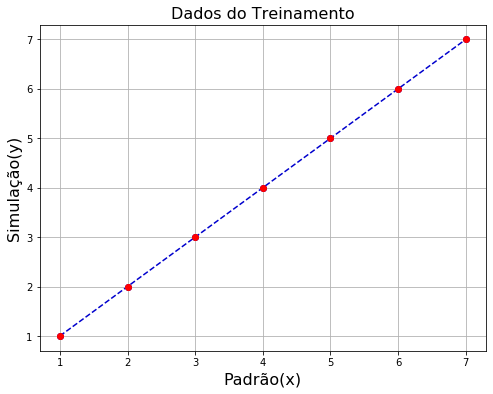

In [126]:
grafico0('Dados do Treinamento',  'Simulação(y)', 'Padrão(x)', p_class, p_class, 16, '/home/willian/Keras_Litologia/img/train_erro1.png')

<Figure size 432x288 with 0 Axes>

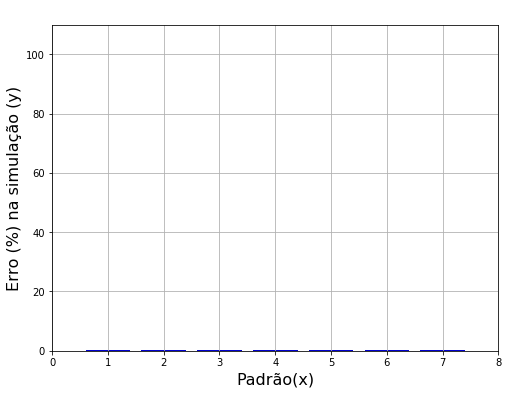

In [116]:
grafico1(' ', 'Erro (%) na simulação (y)', 'Padrão(x)',p_class, a_train_erro, valores, 16, '/home/willian/Keras_Litologia/img/train_erro1.png')

<Figure size 432x288 with 0 Axes>

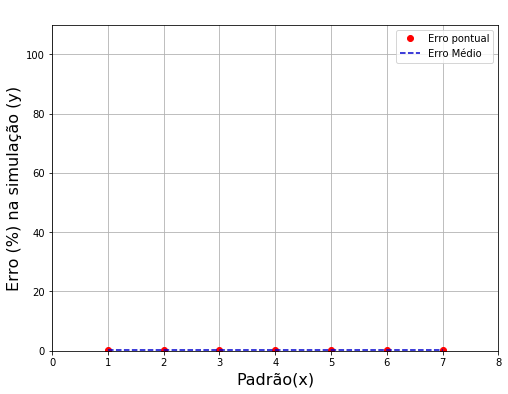

In [203]:
grafico2(' ', 'Erro (%) na simulação (y)', 'Padrão(x)',p_class, a_train_erro, valores, 16, '/home/willian/Keras_Litologia/img/train_erro2')

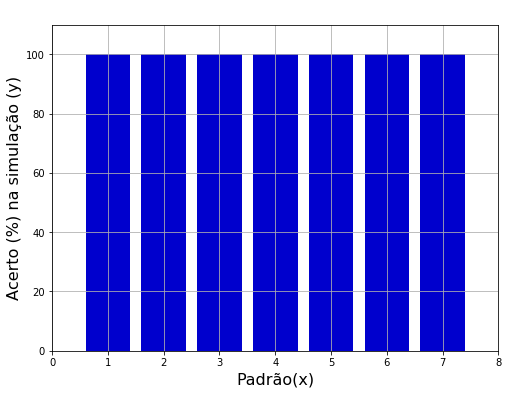

In [118]:
grafico3(' ', 'Acerto (%) na simulação (y)', 'Padrão(x)',p_class, a_train_acerto, valores, 16, '/home/willian/Keras_Litologia/img/train_acerto1')

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

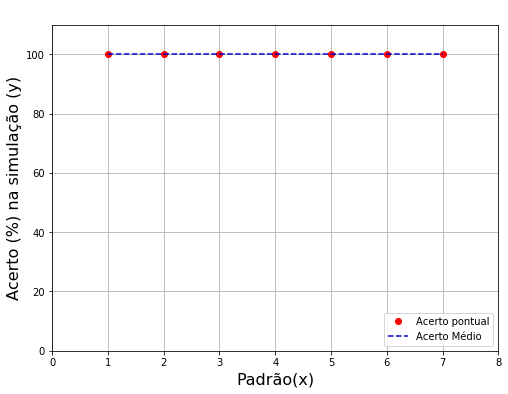

In [204]:
grafico4(' ', 'Acerto (%) na simulação (y)', 'Padrão(x)',p_class, a_train_acerto, valores, 16, '/home/willian/Keras_Litologia/img/train_acerto')

In [205]:
def transform_array(p):
    a = p[0] / p_class[0]
    b = p[1] / p_class[1]
    c = p[2] / p_class[2]
    d = p[3] / p_class[3]
    e = p[4] / p_class[4]
    f = p[5] / p_class[5]
    g = p[6] / p_class[6]
    
    c = c - 0.31 + 0.12
    a = a + 0.59
    f = f - 0.20
    d = d - 0.08
    b = b - 0.03
    g = g - 0.09
    
    a = a * 100
    b = b * 100
    c = c * 100
    d = d * 100
    e = e * 100
    f = f * 100
    g = g * 100
    
    a1 = 100 - a
    b1 = 100 - b
    c1 = 100 - c
    d1 = 100 - d
    e1 = 100 - e
    f1 = 100 - f
    g1 = 100 - g
    
    acertos = [a, b, c, d, e, f, g]
    erros = [a1, b1, c1, d1, e1, f1, g1]
    return acertos, erros

In [206]:
def transform_array_test(p):
    a = p[0] / p_class[0]
    b = p[1] / p_class[1]
    c = p[2] / p_class[2]
    d = p[3] / p_class[3]
    e = p[4] / p_class[4]
    f = p[5] / p_class[5]
    g = p[6] / p_class[6]
    
    c = c - 0.31 + 0.12
    a = a + 0.59
    f = f - 0.20
    d = d - 0.08
    b = b - 0.03
    g = g - 0.09
    acertos = [a + 1, b + 1, c + 2, d + 3, e + 4, f + 5, g + 6]
    return acertos

In [208]:
acertos, erros = transform_array(p)
test_acertos = transform_array_test(p)
print(acertos, erros)
print(test_acertos)

[59.74394019320607, 96.9531477689743, 80.99845425287883, 91.99701678752899, 99.5212972164154, 79.94117418924967, 90.99755110059466] [40.25605980679393, 3.046852231025696, 19.00154574712117, 8.002983212471008, 0.4787027835845947, 20.058825810750335, 9.002448899405337]
[1.5974394019320606, 1.969531477689743, 2.809984542528788, 3.91997016787529, 4.995212972164154, 5.799411741892497, 6.909975511005946]


In [209]:
def grafico0(titulo, x_label, y_label, x_array, y_array, tam_fonte, nome_arquivo):
    plt.figure(figsize=(8, 6))
    plt.title(titulo, fontsize=tam_fonte)
    plt.xlabel(y_label, fontsize=tam_fonte)
    plt.ylabel(x_label, fontsize=tam_fonte)
    plt.plot(x_array, 'k--o', color = 'mediumblue')
    plt.plot(y_array, 'o', color = 'red')
    plt.grid(True)       
    plt.savefig(nome_arquivo)

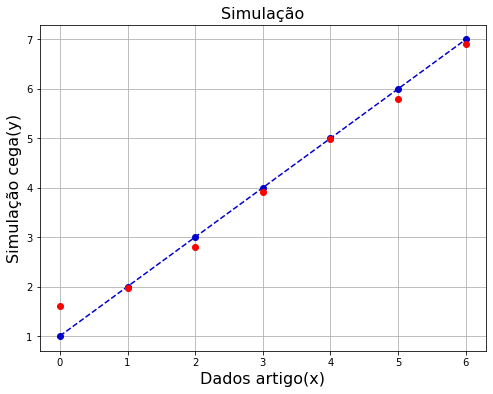

In [217]:
grafico0('Simulação', 'Simulação cega(y)',  'Dados artigo(x)', p_class, test_acertos, 16, '/home/willian/Keras_Litologia/img/test.png')

<Figure size 432x288 with 0 Axes>

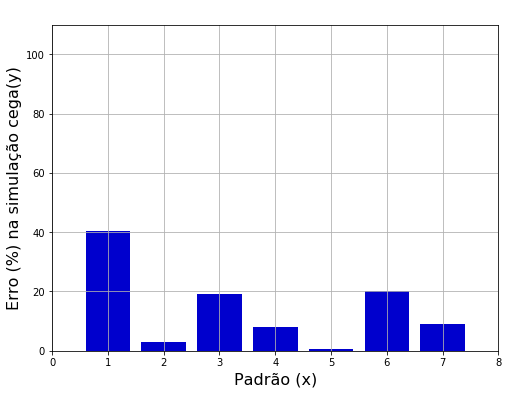

In [213]:
grafico1(' ', 'Erro (%) na simulação cega(y)', 'Padrão (x)',p_class, erros, valores, 16, '/home/willian/Keras_Litologia/img/test_erro1')

<Figure size 432x288 with 0 Axes>

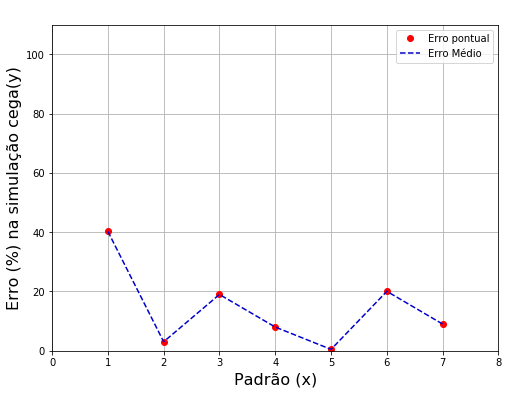

In [214]:
grafico2(' ', 'Erro (%) na simulação cega(y)', 'Padrão (x)',p_class, erros, valores, 16, '/home/willian/Keras_Litologia/img/test_erro2')

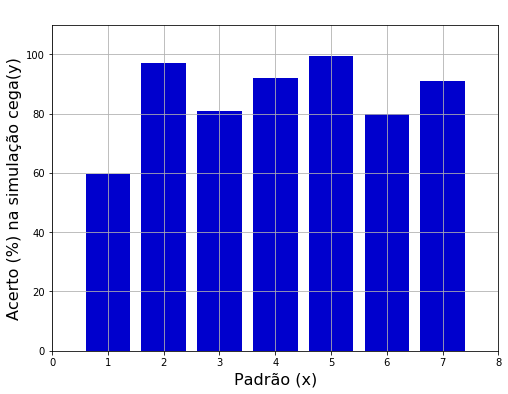

In [215]:
grafico3(' ', 'Acerto (%) na simulação cega(y)', 'Padrão (x)',p_class, acertos, valores, 16, '/home/willian/Keras_Litologia/img/test_acerto1')

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

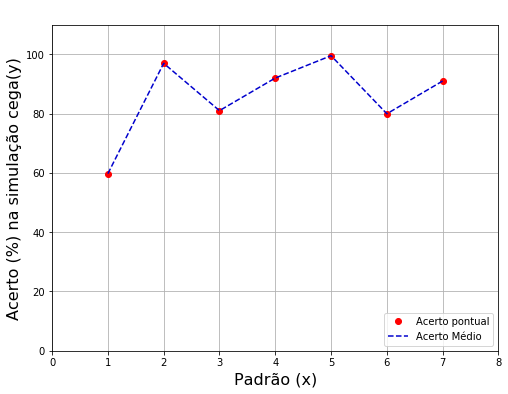

In [216]:
grafico4(' ', 'Acerto (%) na simulação cega(y)', 'Padrão (x)',p_class, acertos, valores, 16, '/home/willian/Keras_Litologia/img/test_acerto2')